## Juliette Cornet 03/14/2022
# Sentiment Analysis of Taylor Swift's Albums

## Part 1: Introduction 

#### As a comparative literature major, close-reader textual analysis is some thing I'm particularly interested in. Therefore, when we begun doing textual analysis via data science, I knew this was what I wanted to do my final project on. Considering Taylor Swift has recently been making a comeback, I thought it would intersting to look into her music and her persona which is where I got the inspiration for this project.

#### Taylor swift is known for constantly re-inventing herself. Her ever-changing persona is known to be split up into different "eras." While this is very apparent in the changes of her physial appearance and in her music videos and concert performances, I am curious to see if these shifts are identifiable from the lyrics in all her albums alone.Through data and textual analysis, I want to see if certain trends in her lyrics give us insight into the different changes she has undergone over the years. Therefore, through a combination of data science and textual analysis, is it possible to indenity different trends in Taylor Swift's lyrics throughout her albums?

The dataset I will be using is from Github and has every lyric from every song form her first eight albums: https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-09-29/taylor_swift_lyrics.csv .

## Part 2: Methods

I will begin by importing the data frame using pandas. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-29/taylor_swift_lyrics.csv')

Here is the imported data frame: 

In [4]:
df

,Artist,Album,Title,Lyrics
0,Taylor Swift,Taylor Swift,Tim McGraw,He said the way my blue eyes shinx\nPut those ...
1,Taylor Swift,Taylor Swift,Picture to Burn,"State the obvious, I didn't get my perfect fan..."
2,Taylor Swift,Taylor Swift,Teardrops on my Guitar,"Drew looks at me,\nI fake a smile so he won't ..."
3,Taylor Swift,Taylor Swift,A Place in This World,"I don't know what I want, so don't ask me\n'Ca..."
4,Taylor Swift,Taylor Swift,Cold As You,You have a way of coming easily to me\nAnd whe...
...,...,...,...,...
127,Taylor Swift,folklore,mad woman,What did you think I'd say to that?\nDoes a sc...
128,Taylor Swift,folklore,epiphany,"Keep your helmet\nKeep your life, son\nJust a ..."
129,Taylor Swift,folklore,betty,"Betty, I won't make assumptions about why you ..."
130,Taylor Swift,folklore,peace,Our coming of age has come and gone\nSuddenly ...


## Part 3: Results 

### Cleaning up the data so it's easier to use
As you can see, it is split up into 4 different columns: Artist, Album, Title, Lyrics. Since I want to be doing a textual analysis of how her lyrics have changed  between her albums, the two columns that are important to my research are the Album column and the Lyrics columns. 
For my analysis, I want to seperate all the albums and add combine the lyrics from all songs under one album title to make to text analysis procress easier. Therefore, below I turn the lyrics into lists based on the album they correspond to. I do this using a for loop. 

In [75]:
taylor_swift = []
fearless = []
speak_now = []
red = []
album_1989 = []
reputation = []
lover = []
folklore = []

num_rows = len(df)
# print(num_rows)

for i in range(num_rows):
    if df.loc[i,"Album"] == "Taylor Swift ":
        taylor_swift.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Fearless":
        fearless.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Speak Now ": 
        speak_now.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Red":
        red.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "1989": 
        album_1989.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "reputation ":
        reputation.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "Lover ":
        lover.append(df.loc[i,"Lyrics"])
    elif df.loc[i,"Album"] == "folklore ":
        folklore.append(df.loc[i,"Lyrics"])

Tokenizing and removing stopwords from each of the album lists.  

In [6]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#turning my album lyric lists into strings
taylor_swift_album = " ".join(taylor_swift)
fearless_album = " ".join(fearless)
red_album = " ".join(red)
album_1989_album = " ".join(album_1989)
reputation_album = " ".join(reputation)
lover_album = " ".join(lover)
folklore_album = " ".join(folklore)
speak_now_album = " ".join(speak_now)

In [8]:
#tokenizing
#taylor_swift
ts_sentences = sent_tokenize(taylor_swift_album)
ts_words = word_tokenize(taylor_swift_album.lower())
#fearless
f_sentences = sent_tokenize(fearless_album)
f_words = word_tokenize(fearless_album.lower())
#speaknow
s_sentences = sent_tokenize(speak_now_album)
s_words = word_tokenize(speak_now_album.lower())
#red
r_sentences = sent_tokenize(red_album)
r_words = word_tokenize(red_album.lower())
#1989
nine_sentences = sent_tokenize(album_1989_album)
nine_words = word_tokenize(album_1989_album.lower())
#reputation
rep_sentences = sent_tokenize(reputation_album)
rep_words = word_tokenize(reputation_album.lower())
#lover
l_sentences = sent_tokenize(lover_album)
l_words = word_tokenize(lover_album.lower())
#folklore
fo_sentences = sent_tokenize(folklore_album)
fo_words = word_tokenize(folklore_album.lower())

In [9]:
#removing stopwords
extrastopwords = ['``', "'s", "''", '``',"n't", "'m", 'oh',"'ll",'mmm',"'wo","'re'", 'ai', "'re","'ve", 'na','wan','would','said', "'cause", "'d", "oh-oh", "ha", "ooh", "ca", "yeah", "gon", "get"]    
myStopWords = list(punctuation) + stopwords.words('english') + extrastopwords

In [10]:
tsNoStopWords = [w for w in ts_words if w not in myStopWords]
fNoStopWords = [w for w in f_words if w not in myStopWords]
sNoStopWords = [w for w in s_words if w not in myStopWords]
rNoStopWords = [w for w in r_words if w not in myStopWords]
nineNoStopWords = [w for w in nine_words if w not in myStopWords]
repNoStopWords = [w for w in rep_words if w not in myStopWords]
lNoStopWords = [w for w in l_words if w not in myStopWords]
foNoStopWords = [w for w in fo_words if w not in myStopWords]


### Word Frequency Analysis 

Now that I've cleaned up the data by tokenizing the lyrics and removing the stopwords, I can begin analyzing her lyrics per album. I'll begin by first looking at the most frequently used words per album to see if we can being identifying differences. 

#### Taylor Swift

In [11]:
freq_ts = FreqDist(tsNoStopWords)

In [12]:
for i in sorted(freq_ts, key=freq_ts.get, reverse=True)[:20]:
    print(i,freq_ts[i])

know 35
think 26
never 25
back 23
love 20
see 18
one 17
like 17
beautiful 17
way 15
song 15
baby 15
time 14
take 14
hope 13
still 13
could 12
let 12
everything 12
got 12


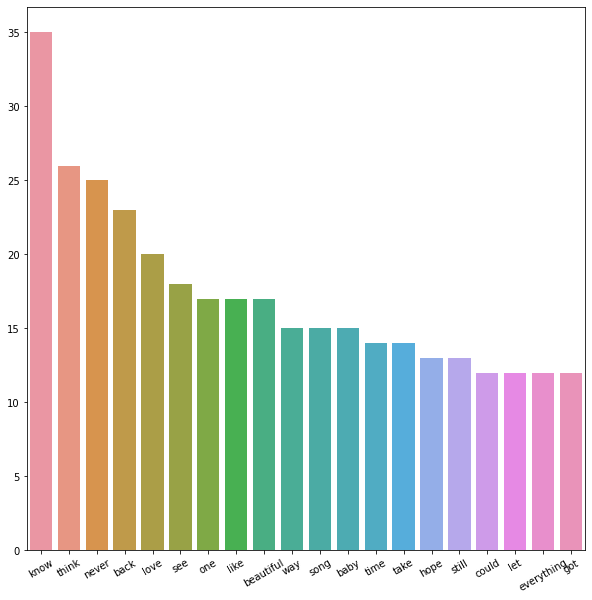

In [13]:
## Creating FreqDist for keeping the 20 most common words
ts_fdist = FreqDist(tsNoStopWords).most_common(20)
# Creating barplot
ts_fdist = pd.Series(dict(ts_fdist))
fig, ax = plt.subplots(figsize=(10,10))
all_plot = sns.barplot(x=ts_fdist.index, y=ts_fdist.values, ax=ax)
plt.xticks(rotation=30);

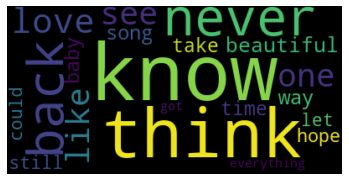

In [14]:
wcloud = WordCloud().generate_from_frequencies(ts_fdist)
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Based on the most frequently used lyrics from her first album, the tone appears hope and romantic based on the frequent use of words like "love", "hope", "beauitful", "song" and "baby". However, based on the results from this very first album, it doesn't seem that analysing exclusively word frequency is enough to analyze these differences. Nevertheless, let's continue with each of the albums. 

#### Fearless

In [15]:
freq_f = FreqDist(fNoStopWords)

In [16]:
for i in sorted(freq_f, key=freq_f.get, reverse=True)[:20]:
    print(i,freq_f[i])

know 72
like 41
come 41
never 31
say 30
feel 27
see 26
time 25
baby 25
one 24
back 24
way 23
love 23
fall 22
could 22
got 20
tell 20
help 20
night 18
little 16


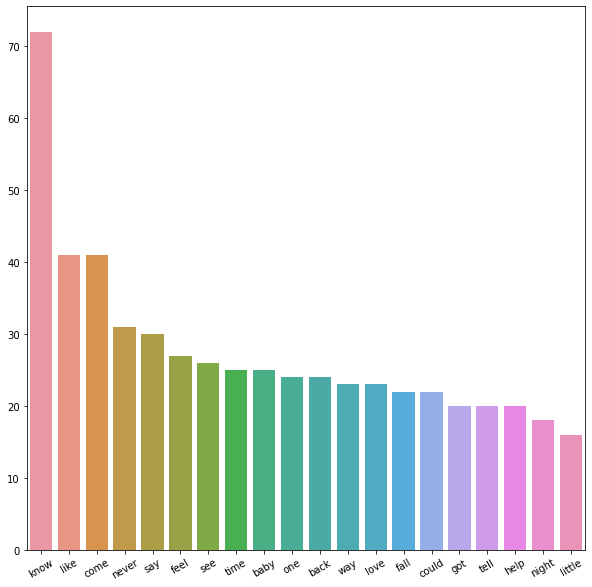

In [17]:
f_fdist = FreqDist(fNoStopWords).most_common(20)
f_fdist = pd.Series(dict(f_fdist))
fig, ax = plt.subplots(figsize=(10,10))
f_plot = sns.barplot(x=f_fdist.index, y=f_fdist.values, ax=ax)
plt.xticks(rotation=30);

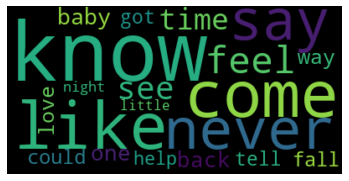

In [18]:
wcloud2 = WordCloud().generate_from_frequencies(f_fdist)
# Plotting the wordcloud
plt.imshow(wcloud2, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

For Fearless, there are a lot of recurring words from her previous album she still enjoys using: "know", "never", "like", "baby". However, the tone of this album feels a little less hopeful than the last one with words like "fall" and "night". However, romantic undertones are present with "love", "baby" and "feel". 

#### Speak Now 

In [19]:
freq_s = FreqDist(sNoStopWords)
for i in sorted(freq_s, key=freq_s.get, reverse=True)[:20]:
    print(i,freq_s[i])

back 63
like 58
know 42
come 39
ever 35
go 33
never 32
see 32
say 30
time 29
love 23
around 23
away 22
still 22
mean 22
mind 21
could 20
grow 20
got 19
think 18


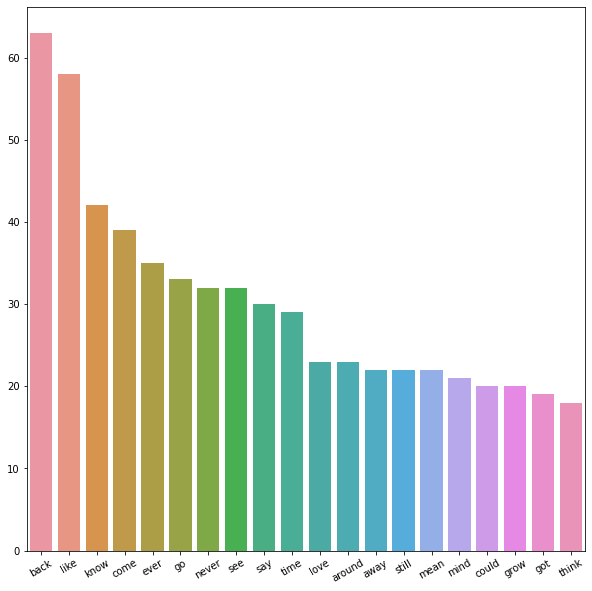

In [20]:
s_fdist = FreqDist(sNoStopWords).most_common(20)
s_fdist = pd.Series(dict(s_fdist))
fig, ax = plt.subplots(figsize=(10,10))
s_plot = sns.barplot(x=s_fdist.index, y=s_fdist.values, ax=ax)
plt.xticks(rotation=30);

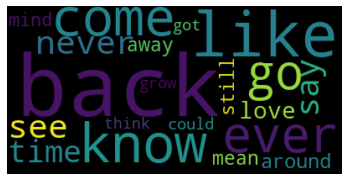

In [21]:
wcloud3 = WordCloud().generate_from_frequencies(s_fdist)
# Plotting the wordcloud
plt.imshow(wcloud3, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Once again, Taylor's frewuntly used "like" and "know" are in the frequency list. However, there seems to be come growth with words like "grow" and "away" and "back". The word "love"'s frequency is also losing stamina. In the first album, "love" fell into the yellow part of the gradient on the bar plot which made it of the most freuqntly used words. However, in the last two albums, "love" has fallen into the blue part of the gradient on the barplot meaning that she is using it less. Therefore, romantic feelings are still present but less so than originally. 

#### Red

In [22]:
freq_r = FreqDist(rNoStopWords)
for i in sorted(freq_r, key=freq_r.get, reverse=True)[:20]:
    print(i,freq_r[i])

like 92
know 83
time 66
never 53
red 46
back 43
ever 35
one 33
stay 32
trouble 32
last 32
got 30
asking 25
home 25
everybody 25
love 24
better 24
tell 23
think 23
knows 23


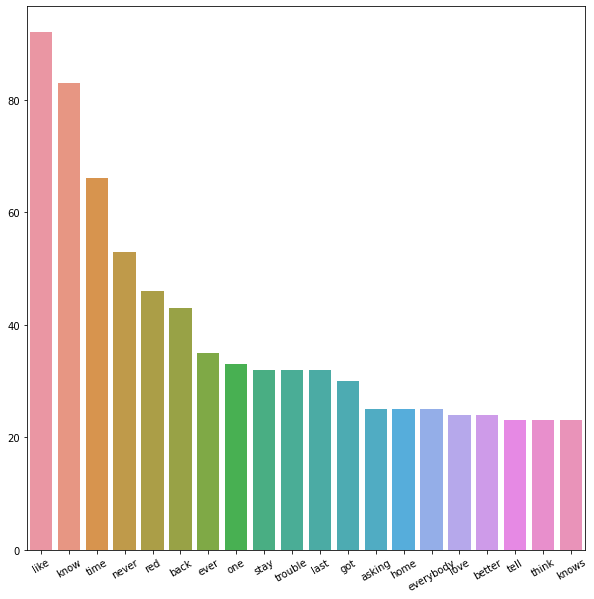

In [23]:
r_fdist = FreqDist(rNoStopWords).most_common(20)
r_fdist = pd.Series(dict(r_fdist))
fig, ax = plt.subplots(figsize=(10,10))
r_plot = sns.barplot(x=r_fdist.index, y=r_fdist.values, ax=ax)
plt.xticks(rotation=30);

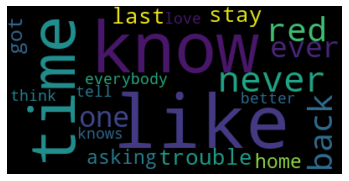

In [24]:
wcloud4 = WordCloud().generate_from_frequencies(r_fdist)
# Plotting the wordcloud
plt.imshow(wcloud4, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Once againm "know" and "like" top this list. However, interesing to see that "red" which is the title of the album is also a frequently used word here. That is the first time this has happened in her albums. Words like "back", "home", "time" and "everybody" make it seem like there is a return to her roots. However, the frequency of the word "trouble" is the first time a word with an obviously negative connotation has entered word frequency top 20 list. Interesting to see that it is used even more than "love". Seems that romance has been replaced with some turmoil. 

#### 1989

In [25]:
freq_nine = FreqDist(nineNoStopWords)
for i in sorted(freq_nine, key=freq_nine.get, reverse=True)[:20]:
    print(i,freq_nine[i])

wish 85
love 84
shake 70
yet 65
got 55
new 45
back 44
like 42
baby 41
never 39
go 39
woods 38
clear 37
know 36
say 34
could 33
stay 32
york 30
welcome 29
girl 25


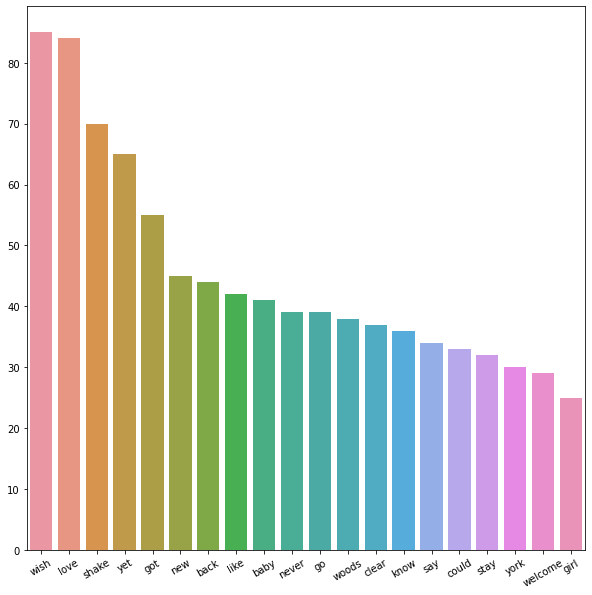

In [26]:
nine_fdist = FreqDist(nineNoStopWords).most_common(20)
nine_fdist = pd.Series(dict(nine_fdist))
fig, ax = plt.subplots(figsize=(10,10))
nine_plot = sns.barplot(x=nine_fdist.index, y=nine_fdist.values, ax=ax)
plt.xticks(rotation=30);

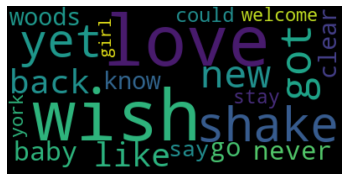

In [27]:
wcloud5 = WordCloud().generate_from_frequencies(nine_fdist)
# Plotting the wordcloud
plt.imshow(wcloud5, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

This albums seems to mark a shift. "Love" is suddently right near the top alongside "wish" replacing "like' and "know" that are always near the top. Words like "shake", "wish", "love" and "welcome" imply a more fun and lively spirit in her music. Also interesting to note that "new" "york" make the frequency list since it clearly shows that New York, a place, plays an important role in her album. 

#### Reputation

In [28]:
freq_rep = FreqDist(repNoStopWords)
for i in sorted(freq_rep, key=freq_rep.get, reverse=True)[:20]:
    print(i,freq_rep[i])

like 51
made 51
look 46
want 38
baby 37
time 34
know 32
bad 29
never 27
take 27
say 27
first 26
one 26
call 26
could 26
good 24
things 23
hands 23
got 22
getaway 21


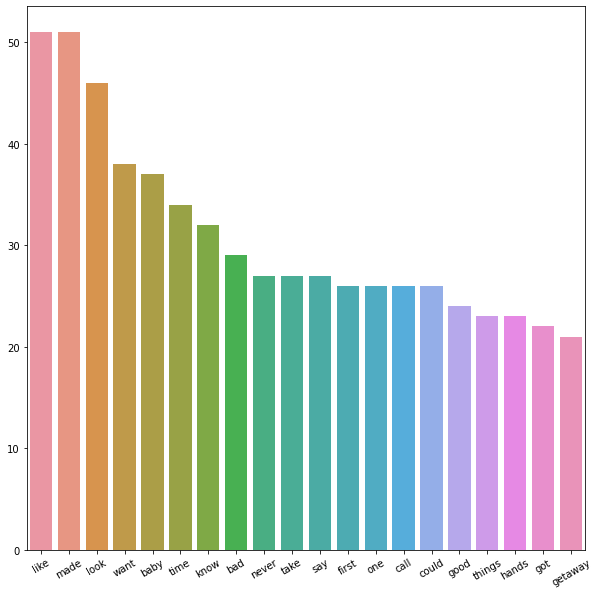

In [29]:
rep_fdist = FreqDist(repNoStopWords).most_common(20)
rep_fdist = pd.Series(dict(rep_fdist))
fig, ax = plt.subplots(figsize=(10,10))
rep_plot = sns.barplot(x=rep_fdist.index, y=rep_fdist.values, ax=ax)
plt.xticks(rotation=30);

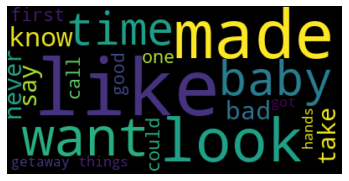

In [30]:
wcloud6 = WordCloud().generate_from_frequencies(rep_fdist)
# Plotting the wordcloud
plt.imshow(wcloud6, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Reputation is an interesting album to compare to its predecessor since "love" is completely removed from the list. Instead, "like" and "know" are back at the top. There also seems to be a contrast between "good" and "bad", with bad winning since it is used more frequently. Words likes "take" and "want" also imply a sort of assertiveness. 

#### Lover

In [31]:
freq_l = FreqDist(lNoStopWords)
for i in sorted(freq_l, key=freq_l.get, reverse=True)[:20]:
    print(i,freq_l[i])

like 67
want 49
love 44
one 43
never 43
see 42
daylight 40
know 38
right 28
go 27
man 27
baby 26
say 23
street 23
think 22
could 21
got 20
still 20
walk 19
need 19


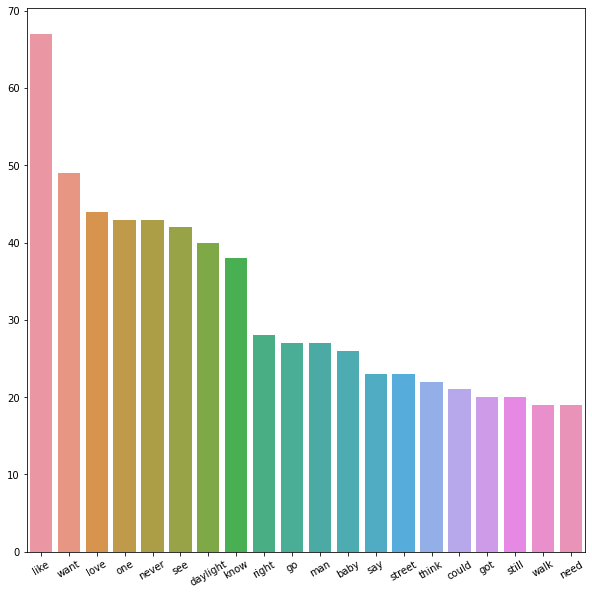

In [32]:
l_fdist = FreqDist(lNoStopWords).most_common(20)
l_fdist = pd.Series(dict(l_fdist))
fig, ax = plt.subplots(figsize=(10,10))
l_plot = sns.barplot(x=l_fdist.index, y=l_fdist.values, ax=ax)
plt.xticks(rotation=30);

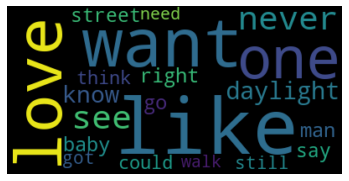

In [33]:
wcloud7 = WordCloud().generate_from_frequencies(l_fdist)
# Plotting the wordcloud
plt.imshow(wcloud7, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Lover marks another shift. Romantic feelings return with "love" being back on the list and high up. Interesting to see that "daylight" is high up on the list since it not only gives a period of time but is also a physical attribute. Daylight is often associated with brightness and happiness. Also intersting to see that "street" makes the list since it's a noun to describe a place that is pretty common and pretty vague. 

#### Folklore

In [34]:
freq_fo = FreqDist(foNoStopWords)
for i in sorted(freq_fo, key=freq_fo.get, reverse=True)[:20]:
    print(i,freq_fo[i])

never 44
know 42
time 38
like 38
think 21
one 19
knew 18
gave 17
love 17
around 16
could 15
see 15
still 15
back 13
mad 13
come 12
seen 12
give 12
showed 11
woman 11


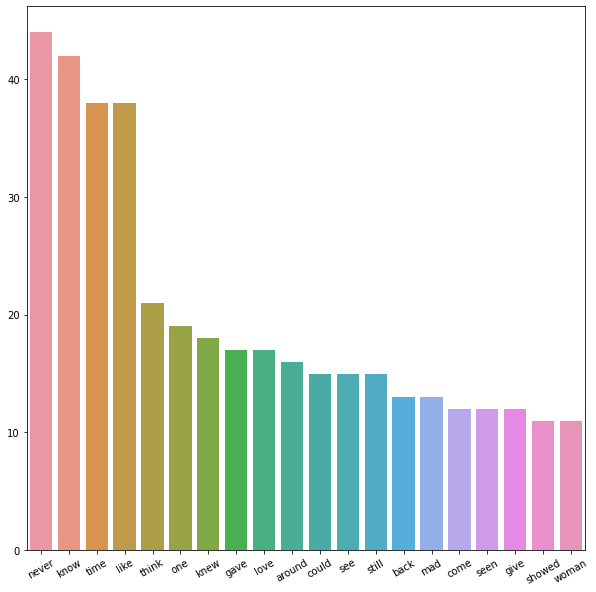

In [35]:
fo_fdist = FreqDist(foNoStopWords).most_common(20)
fo_fdist = pd.Series(dict(fo_fdist))
fig, ax = plt.subplots(figsize=(10,10))
fo_plot = sns.barplot(x=fo_fdist.index, y=fo_fdist.values, ax=ax)
plt.xticks(rotation=30);

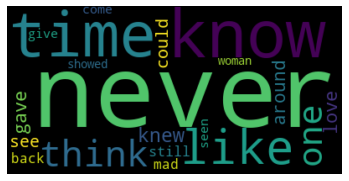

In [36]:
wcloud8 = WordCloud().generate_from_frequencies(fo_fdist)
# Plotting the wordcloud
plt.imshow(wcloud8, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Folklore doesn't reveal too much since commonly popular words Taylor uses like "never", "know", "like", "time" and "think" are at the top and are not the most revealing words. However, two words that stand out are "mad" and "woman" since they don't appear on any of the other lists. 

Overall,it doesn't seem that word frequency is the most efficient way to get a sense of changing tones or attitude in her albums. A slight shift is apparent for certain albums like between 1989 and Reputation. Otherwise, changes are not easily identifiable. However, throughout my analsysis, I realized that pinpointing certain words (namely "love") helped give me a better sense of changes in the albums. Therefore, to continue, I think looking at word frequency again could be interesting but by only looking a specific type of word: nouns. 

### Noun Frequency Analysis

In this section, in order to narrow my analysis, I will concentrating on the 10 most frequent nouns in each of her albums to see if that gives us a better sense of a shift in tone and style throughout her albums. 

In [37]:
#hide
#tagging the nouns for all the albums
#taylorswift
tstagged = nltk.pos_tag(tsNoStopWords)
#Fearless
ftagged = nltk.pos_tag(fNoStopWords)
#speaknow
stagged = nltk.pos_tag(sNoStopWords)
#red
rtagged = nltk.pos_tag(rNoStopWords)
#1989
ninetagged = nltk.pos_tag(nineNoStopWords)
#reputation
reptagged = nltk.pos_tag(repNoStopWords)
#lover
ltagged = nltk.pos_tag(lNoStopWords)
#folklore
fotagged = nltk.pos_tag(foNoStopWords)

In [38]:
#hide
#making lists for all albums
tslist = [[('way', 'NN'), ('blue', 'JJ'), ('eyes', 'NNS'), ('shinx', 'VBP'), ('put', 'VBN'), ('georgia', 'JJ'), ('stars', 'NNS'), ('shame', 'JJ'), ('night', 'NN'), ('lie', 'NN'), ('boy', 'NN'), ('chevy', 'JJ'), ('truck', 'NN'), ('tendency', 'NN'), ('gettin', 'VBD'), ('stuck', 'VBN'), ('back', 'RB'), ('roads', 'NNS'), ('night', 'NN'), ('right', 'RB'), ('beside', 'RB'), ('summer', 'NN'), ('long', 'JJ'), ('time', 'NN'), ('woke', 'VBD'), ('find', 'VB'), ('summer', 'NN'), ('gone', 'VBN'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VBP'), ('favorite', 'JJ'), ('song', 'NN'), ('one', 'CD'), ('danced', 'VBD'), ('night', 'NN'), ('long', 'RB'), ('moon', 'RB'), ('like', 'IN'), ('spotlight', 'JJ'), ('lake', 'NN'), ('think', 'VBP'), ('happiness', 'JJ'), ('hope', 'NN'), ('think', 'VBP'), ('little', 'JJ'), ('black', 'JJ'), ('dress', 'NN'), ('think', 'VBP'), ('head', 'NN'), ('chest', 'VBP'), ('old', 'JJ'), ('faded', 'VBN'), ('blue', 'JJ'), ('jeans', 'NNS'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VBP'), ('september', 'JJ'), ('saw', 'JJ'), ('month', 'NN'), ('tears', 'NNS'), ('thankin', 'VBP'), ('god', 'JJ'), ('see', 'VBP'), ('like', 'IN'), ('box', 'NN'), ('beneath', 'NN'), ('bed', 'VBD'), ('letter', 'NN'), ('never', 'RB'), ('read', 'VBD'), ('three', 'CD'), ('summers', 'NNS'), ('back', 'RB'), ('hard', 'JJ'), ('find', 'NN'), ('little', 'JJ'), ('bitter', 'JJ'), ('sweet', 'NN'), ('lookin', 'FW'), ('back', 'RB'), ('nice', 'JJ'), ('believe', 'VBP'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VBP'), ('favorite', 'JJ'), ('song', 'NN'), ('one', 'CD'), ('danced', 'VBD'), ('night', 'NN'), ('long', 'RB'), ('moon', 'RB'), ('like', 'IN'), ('spotlight', 'JJ'), ('lake', 'NN'), ('think', 'VBP'), ('happiness', 'JJ'), ('hope', 'NN'), ('think', 'VBP'), ('little', 'JJ'), ('black', 'JJ'), ('dress', 'NN'), ('think', 'VBP'), ('head', 'NN'), ('chest', 'VBP'), ('old', 'JJ'), ('faded', 'VBN'), ('blue', 'JJ'), ('jeans', 'NNS'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VB'), ('back', 'RB'), ('first', 'JJ'), ('time', 'NN'), ('since', 'IN'), ('standin', 'JJ'), ('street', 'NN'), ('letter', 'NN'), ('left', 'VBD'), ('doorstep', 'NN'), ('first', 'JJ'), ('thing', 'NN'), ('read', 'NN'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VBP'), ('favorite', 'JJ'), ('song', 'NN'), ('someday', 'RB'), ('turn', 'VB'), ('radio', 'NN'), ('hope', 'NN'), ('takes', 'VBZ'), ('back', 'RB'), ('place', 'NN'), ('think', 'NN'), ('happiness', 'NN'), ('hope', 'VBP'), ('think', 'VB'), ('little', 'JJ'), ('black', 'JJ'), ('dress', 'NN'), ('think', 'VBP'), ('head', 'NN'), ('chest', 'VBP'), ('old', 'JJ'), ('faded', 'VBN'), ('blue', 'JJ'), ('jeans', 'NNS'), ('think', 'VBP'), ('tim', 'JJ'), ('mcgraw', 'NNS'), ('hope', 'VBP'), ('think', 'VBP'), ('think', 'VB'), ('way', 'NN'), ('blue', 'JJ'), ('eyes', 'NNS'), ('shined', 'VBD'), ('put', 'VBD'), ('georgia', 'JJ'), ('stars', 'NNS'), ('shame', 'JJ'), ('night', 'NN'), ('lie', 'NN'), ('state', 'NN'), ('obvious', 'JJ'), ('get', 'NN'), ('perfect', 'JJ'), ('fantasy', 'NN'), ('realize', 'VB'), ('love', 'NN'), ('could', 'MD'), ('ever', 'RB'), ('love', 'VB'), ('go', 'VB'), ('tell', 'JJ'), ('friends', 'NNS'), ('obsessive', 'JJ'), ('crazy', 'JJ'), ('fine', 'NN'), ('wo', 'MD'), ('mind', 'VB'), ('say', 'JJ'), ('way', 'NN'), ('hate', 'NN'), ('stupid', 'JJ'), ('old', 'JJ'), ('pickup', 'NN'), ('truck', 'NN'), ('never', 'RB'), ('let', 'VB'), ('drive', 'JJ'), ('redneck', 'VB'), ('heartbreak', 'JJ'), ('really', 'RB'), ('bad', 'JJ'), ('lying', 'VBG'), ('watch', 'NN'), ('strike', 'NN'), ('match', 'NN'), ('wasted', 'VBD'), ('time', 'NN'), ('far', 'RB'), ('concerned', 'JJ'), ('another', 'DT'), ('picture', 'NN'), ('burn', 'NN'), ('time', 'NN'), ('tears', 'NNS'), ('sitting', 'VBG'), ('planning', 'VBG'), ('revenge', 'NN'), ('nothing', 'NN'), ('stopping', 'VBG'), ('going', 'VBG'), ('best', 'JJS'), ('friends', 'NNS'), ('come', 'VBP'), ('around', 'IN'), ('saying', 'VBG'), ('sorry', 'NN'), ('daddy', 'NN'), ('show', 'NN'), ('sorry', 'JJ'), ('hate', 'NN'), ('stupid', 'JJ'), ('old', 'JJ'), ('pickup', 'NN'), ('truck', 'NN'), ('never', 'RB'), ('let', 'VB'), ('drive', 'JJ'), ('redneck', 'VB'), ('heartbreak', 'JJ'), ('really', 'RB'), ('bad', 'JJ'), ('lying', 'VBG'), ('watch', 'NN'), ('strike', 'NN'), ('match', 'NN'), ('wasted', 'VBD'), ('time', 'NN'), ('far', 'RB'), ('concerned', 'JJ'), ('another', 'DT'), ('picture', 'NN'), ('burn', 'VBP'), ('missing', 'VBG'), ('better', 'JJR'), ('keep', 'VB'), ('coming', 'VBG'), ('back', 'RB'), ('around', 'IN'), ('bad', 'JJ'), ('health', 'NN'), ('hate', 'NN'), ('stupid', 'JJ'), ('old', 'JJ'), ('pickup', 'NN'), ('truck', 'NN'), ('never', 'RB'), ('let', 'VB'), ('drive', 'JJ'), ('redneck', 'VB'), ('heartbreak', 'JJ'), ('really', 'RB'), ('bad', 'JJ'), ('lying', 'VBG'), ('watch', 'NN'), ('strike', 'NN'), ('match', 'NN'), ('wasted', 'VBD'), ('time', 'NN'), ('case', 'NN'), ('heard', 'VBN'), ('really', 'RB'), ('really', 'RB'), ('hate', 'VB'), ('stupid', 'JJ'), ('old', 'JJ'), ('pickup', 'NN'), ('truck', 'NN'), ('never', 'RB'), ('let', 'VB'), ('drive', 'JJ'), ('redneck', 'VB'), ('heartbreak', 'JJ'), ('really', 'RB'), ('bad', 'JJ'), ('lying', 'VBG'), ('watch', 'NN'), ('strike', 'NN'), ('match', 'NN'), ('wasted', 'VBD'), ('time', 'NN'), ('far', 'RB'), ('concerned', 'JJ'), ('another', 'DT'), ('picture', 'NN'), ('burn', 'VBP'), ('burn', 'NN'), ('burn', 'VBP'), ('burn', 'NN'), ('baby', 'NN'), ('burn', 'VBP'), ('another', 'DT'), ('picture', 'NN'), ('burn', 'VBP'), ('baby', 'NN'), ('burn', 'NN'), ('drew', 'VBD'), ('looks', 'NNS'), ('fake', 'VBP'), ('smile', 'JJ'), ('wo', 'MD'), ('see', 'VB'), ('want', 'JJ'), ('need', 'NN'), ('everything', 'NN'), ('bet', 'VB'), ('beautiful', 'JJ'), ('girl', 'NN'), ('talks', 'NNS'), ('got', 'VBD'), ('everything', 'NN'), ('live', 'NN'), ('without', 'IN'), ('drew', 'JJ'), ('talks', 'NNS'), ('andi', 'VBP'), ('laugh', 'IN'), ('funny', 'JJ'), ('even', 'RB'), ('see', 'VBP'), ('anyone', 'NN'), ('says', 'VBZ'), ('love', 'VB'), ('finally', 'RB'), ('got', 'VBD'), ('right', 'JJ'), ('wonder', 'NN'), ('knows', 'VBZ'), ('think', 'VBP'), ('night', 'NN'), ('reason', 'NN'), ('teardrops', 'NNS'), ('guitar', 'VBP'), ('thing', 'NN'), ('keeps', 'NNS'), ('wishing', 'VBG'), ('wishing', 'VBG'), ('star', 'NN'), ('song', 'NN'), ('car', 'NN'), ('keep', 'NN'), ('singing', 'NN'), ('know', 'VBP'), ('drew', 'JJ'), ('walks', 'NNS'), ('tell', 'VBP'), ('breathe', 'NN'), ('goes', 'VBZ'), ('perfectly', 'RB'), ('kind', 'NN'), ('flawless', 'JJ'), ('wish', 'NN'), ('could', 'MD'), ('better', 'VB'), ('hold', 'VB'), ('tight', 'JJ'), ('give', 'VB'), ('love', 'VB'), ('look', 'NN'), ('beautiful', 'JJ'), ('eyes', 'NNS'), ('know', 'VBP'), ('lucky', 'JJ'), ('reason', 'NN'), ('teardrops', 'NNS'), ('guitar', 'VBP'), ('thing', 'NN'), ('keeps', 'NNS'), ('wishing', 'VBG'), ('wishing', 'VBG'), ('star', 'NN'), ('song', 'NN'), ('car', 'NN'), ('keep', 'NN'), ('singing', 'NN'), ('know', 'VBP'), ('drive', 'JJ'), ('home', 'NN'), ('alone', 'RB'), ('turn', 'JJ'), ('light', 'JJ'), ('put', 'VBN'), ('picture', 'NN'), ('maybe', 'RB'), ('get', 'VB'), ('sleep', 'JJ'), ('tonight', 'NN'), ('reason', 'NN'), ('teardrops', 'NNS'), ('guitar', 'VBP'), ('one', 'CD'), ('got', 'VBD'), ('enough', 'RB'), ('break', 'JJ'), ('heart', 'NN'), ('song', 'NN'), ('car', 'NN'), ('keep', 'NN'), ('singing', 'NN'), ('know', 'JJ'), ('time', 'NN'), ('taken', 'VBN'), ('never', 'RB'), ('enough', 'RB'), ('need', 'JJ'), ('fall', 'NN'), ('drew', 'VBD'), ('looks', 'NNS'), ('fake', 'VBP'), ('smile', 'JJ'), ('wo', 'MD'), ('see', 'VB'), ('know', 'JJ'), ('want', 'VBP'), ('ask', 'NN'), ('still', 'RB'), ('trying', 'VBG'), ('figure', 'NN'), ('know', 'VBP'), ('road', 'NN'), ('walking', 'VBG'), ('trying', 'VBG'), ('see', 'JJ'), ('rain', 'NN'), ('coming', 'VBG'), ('even', 'RB'), ('though', 'IN'), ('one', 'CD'), ('feels', 'JJ'), ('way', 'NN'), ('alone', 'RB'), ('know', 'VBP'), ('strong', 'JJ'), ('wrong', 'JJ'), ('life', 'NN'), ('goes', 'VBZ'), ('girl', 'JJ'), ('trying', 'VBG'), ('find', 'JJ'), ('place', 'NN'), ('world', 'NN'), ('got', 'VBD'), ('radio', 'JJ'), ('old', 'JJ'), ('blue', 'NN'), ('jeans', 'NNS'), ('wearing', 'VBG'), ('heart', 'NN'), ('sleeve', 'VBP'), ('feeling', 'VBG'), ('lucky', 'JJ'), ('today', 'NN'), ('got', 'VBD'), ('sunshine', 'NN'), ('could', 'MD'), ('tell', 'VB'), ('need', 'VB'), ('tomorrow', 'NN'), ('mystery', 'NN'), ('okay', 'IN'), ('alone', 'RB'), ('know', 'VB'), ('strong', 'JJ'), ('wrong', 'JJ'), ('life', 'NN'), ('goes', 'VBZ'), ('girl', 'JJ'), ('trying', 'VBG'), ('find', 'JJ'), ('place', 'NN'), ('world', 'NN'), ('maybe', 'RB'), ('girl', 'JJ'), ('mission', 'NN'), ('ready', 'JJ'), ('fly', 'VB'), ('alone', 'RB'), ('know', 'VB'), ('strong', 'JJ'), ('wrong', 'JJ'), ('life', 'NN'), ('goes', 'VBZ'), ('alone', 'RB'), ('know', 'JJ'), ('girl', 'NNS'), ('trying', 'VBG'), ('find', 'VB'), ('place', 'JJ'), ('world', 'NN'), ('girl', 'NN'), ('girl', 'NN'), ('girl', 'JJ'), ('way', 'NN'), ('coming', 'VBG'), ('easily', 'RB'), ('take', 'VB'), ('take', 'NN'), ('best', 'JJS'), ('start', 'NN'), ('fight', 'NN'), ('need', 'VBP'), ('feel', 'VB'), ("somethin'", 'JJ'), ('want', 'NN'), ('wanted', 'VBD'), ('shame', 'NN'), ('rainy', 'NN'), ('ending', 'VBG'), ('given', 'VBN'), ('perfect', 'JJ'), ('day', 'NN'), ('walk', 'VB'), ('away', 'RB'), ('use', 'IN'), ('defending', 'VBG'), ('words', 'NNS'), ('never', 'RB'), ('say', 'VBP'), ('sittin', 'JJ'), ('thinkin', 'NN'), ('never', 'RB'), ('anywhere', 'RB'), ('cold', 'JJ'), ('put', 'NN'), ('walls', 'NNS'), ('paint', 'VBP'), ('shade', 'JJ'), ('gray', 'JJ'), ('stood', 'VBD'), ('loving', 'VBG'), ('wished', 'VBN'), ('away', 'RB'), ('come', 'VBN'), ('away', 'RB'), ('great', 'JJ'), ('little', 'JJ'), ('story', 'NN'), ('mess', 'NN'), ('dreamer', 'NN'), ('nerve', 'NN'), ('adore', 'RB'), ('shame', 'JJ'), ('rainy', 'JJ'), ('ending', 'VBG'), ('given', 'VBN'), ('perfect', 'JJ'), ('day', 'NN'), ('walk', 'VB'), ('away', 'RB'), ('use', 'IN'), ('defending', 'VBG'), ('words', 'NNS'), ('never', 'RB'), ('say', 'VBP'), ('sittin', 'JJ'), ('thinkin', 'NN'), ('never', 'RB'), ('anywhere', 'RB'), ('cold', 'JJ'), ('never', 'RB'), ('give', 'VBP'), ('damn', 'JJ'), ('thing', 'NN'), ('honey', 'NN'), ('cried', 'VBN'), ('cried', 'VBN'), ('know', 'VBP'), ('told', 'VBN'), ('nobody', 'NN'), ('died', 'VBD'), ('died', 'VBD'), ('died', 'JJ'), ('shame', 'NN'), ('rainy', 'NN'), ('ending', 'VBG'), ('given', 'VBN'), ('perfect', 'JJ'), ('day', 'NN'), ('every', 'DT'), ('smile', 'NN'), ('fake', 'VBP'), ('condescending', 'VBG'), ('countin', 'NN'), ('scars', 'NNS'), ('made', 'VBD'), ('sittin', 'JJ'), ('thinkin', 'JJ'), ('never', 'RB'), ('anywhere', 'RB'), ('cold', 'JJ'), ('know', 'VBP'), ('find', 'VBP'), ('went', 'VBD'), ('lookin', 'JJ'), ('reason', 'NN'), ('know', 'VBP'), ('read', 'VBN'), ('lines', 'NNS'), ('baby', 'NNS'), ('got', 'VBD'), ('nowhere', 'RB'), ('go', 'VB'), ('tried', 'JJ'), ('take', 'VB'), ('road', 'NN'), ('less', 'JJR'), ('traveled', 'JJ'), ('nothin', 'NN'), ('seems', 'VBZ'), ('work', 'NN'), ('first', 'RB'), ('times', 'RB'), ('right', 'JJ'), ('ever', 'RB'), ('try', 'VBP'), ('better', 'RBR'), ('nobody', 'NN'), ('ever', 'RB'), ('lets', 'VBZ'), ('still', 'RB'), ('see', 'VB'), ('best', 'JJS'), ('view', 'NN'), ('outside', 'IN'), ('lookin', 'NN'), ('lot', 'NN'), ('lonely', 'RB'), ('places', 'VBZ'), ('never', 'RB'), ('outside', 'JJ'), ('saw', 'VBD'), ('never', 'RB'), ('knew', 'VBN'), ('give', 'JJ'), ('part', 'NN'), ('part', 'NN'), ('late', 'JJ'), ('see', 'NN'), ('could', 'MD'), ('helped', 'VB'), ('wanted', 'VBD'), ('one', 'CD'), ('notices', 'NNS'), ('late', 'JJ'), ('anything', 'NN'), ('could', 'MD'), ('ever', 'RB'), ('try', 'VB'), ('better', 'RBR'), ('nobody', 'NN'), ('ever', 'RB'), ('lets', 'VBZ'), ('still', 'RB'), ('see', 'VB'), ('best', 'JJS'), ('view', 'NN'), ('outside', 'IN'), ('lookin', 'NN'), ('lot', 'NN'), ('lonely', 'RB'), ('places', 'VBZ'), ('never', 'RB'), ('outside', 'JJ'), ('ever', 'RB'), ('try', 'VBP'), ('better', 'RBR'), ('nobody', 'NN'), ('ever', 'RB'), ('lets', 'VBZ'), ('still', 'RB'), ('see', 'VB'), ('best', 'JJS'), ('view', 'NN'), ('outside', 'IN'), ('lookin', 'NN'), ('lot', 'NN'), ('lonely', 'RB'), ('places', 'VBZ'), ('never', 'RB'), ('outside', 'JJ'), ('seems', 'VBZ'), ('one', 'CD'), ('see', 'NN'), ('beauty', 'NN'), ('face', 'NN'), ('mirror', 'NN'), ('looking', 'VBG'), ('back', 'RB'), ('walk', 'NN'), ('around', 'IN'), ('thinking', 'VBG'), ('pretty', 'RB'), ('true', 'JJ'), ('know', 'VBP'), ('hold', 'VBP'), ('baby', 'NN'), ('losing', 'VBG'), ('water', 'NN'), ('high', 'JJ'), ('jumping', 'NN'), ('letting', 'VBG'), ('go', 'VB'), ('one', 'CD'), ('knows', 'VBZ'), ('cry', 'NN'), ('tell', 'VB'), ('anyone', 'NN'), ('might', 'MD'), ('golden', 'JJ'), ('one', 'CD'), ('tied', 'VBN'), ('together', 'RB'), ('smile', 'JJ'), ('coming', 'VBG'), ('undone', 'JJ'), ('guess', 'NN'), ('true', 'JJ'), ('love', 'NN'), ('wanted', 'VBD'), ('givin', 'JJ'), ('away', 'RB'), ('like', 'IN'), ('extra', 'JJ'), ('change', 'NN'), ('hoping', 'VBG'), ('end', 'NN'), ('pocket', 'NN'), ('leaves', 'VBZ'), ('like', 'IN'), ('penny', 'NN'), ('rain', 'NN'), ('price', 'NN'), ('pay', 'NN'), ('price', 'NN'), ('pay', 'NN'), ('hold', 'VBP'), ('baby', 'NN'), ('losing', 'VBG'), ('water', 'NN'), ('high', 'JJ'), ('jumping', 'NN'), ('letting', 'VBG'), ('go', 'VB'), ('one', 'CD'), ('knows', 'VBZ'), ('cry', 'NN'), ('tell', 'VB'), ('anyone', 'NN'), ('might', 'MD'), ('golden', 'JJ'), ('one', 'CD'), ('tied', 'VBN'), ('together', 'RB'), ('smile', 'JJ'), ('coming', 'VBG'), ('undone', 'JJ'), ('hold', 'NN'), ('baby', 'NN'), ('losing', 'VBG'), ('water', 'NN'), ('high', 'JJ'), ('jumping', 'NN'), ('letting', 'VBG'), ('go', 'VB'), ('one', 'CD'), ('knows', 'VBZ'), ('cry', 'NN'), ('tell', 'VB'), ('anyone', 'NN'), ('might', 'MD'), ('golden', 'JJ'), ('one', 'CD'), ('tied', 'VBN'), ('together', 'RB'), ('smile', 'JJ'), ('coming', 'VBG'), ('undone', 'RB'), ('tied', 'VBN'), ('together', 'RB'), ('smile', 'JJ'), ('coming', 'VBG'), ('undone', 'JJ'), ('goodbye', 'NN'), ('baby', 'NN'), ('smile', 'NN'), ('baby', 'NN'), ('baby', 'NN'), ('cory', 'JJ'), ('eyes', 'NNS'), ('like', 'IN'), ('jungle', 'NN'), ('smiles', 'NNS'), ('like', 'IN'), ('radio', 'NN'), ('whispers', 'NNS'), ('songs', 'NNS'), ('window', 'VBP'), ('words', 'NNS'), ('nobody', 'NN'), ('knows', 'VBZ'), ('pretty', 'RB'), ('girls', 'JJ'), ('every', 'DT'), ('corner', 'NN'), ('watch', 'NN'), ('walking', 'VBG'), ('home', 'NN'), ('saying', 'VBG'), ('know', 'JJ'), ('ever', 'RB'), ('know', 'VBP'), ('beautiful', 'JJ'), ('every', 'DT'), ('little', 'JJ'), ('piece', 'NN'), ('love', 'NN'), ('know', 'VBP'), ('really', 'RB'), ('someone', 'NN'), ('ask', 'NN'), ('anyone', 'NN'), ('find', 'VBP'), ('everything', 'NN'), ('looked', 'VBD'), ('hope', 'NN'), ('love', 'NN'), ('leads', 'VBZ'), ('back', 'RB'), ('door', 'JJ'), ('stay', 'NN'), ('beautiful', 'JJ'), ('cory', 'NN'), ('finds', 'VBZ'), ('another', 'DT'), ('way', 'NN'), ('highlight', 'JJ'), ('day', 'NN'), ('taking', 'VBG'), ('pictures', 'NNS'), ('mind', 'VBP'), ('save', 'JJ'), ('rainy', 'JJ'), ('day', 'NN'), ('hard', 'JJ'), ('make', 'NN'), ('conversation', 'NN'), ('taking', 'VBG'), ('breath', 'JJ'), ('away', 'RB'), ('say', 'VBP'), ('hey', 'JJ'), ('way', 'NN'), ('beautiful', 'JJ'), ('every', 'DT'), ('little', 'JJ'), ('piece', 'NN'), ('love', 'NN'), ('know', 'VBP'), ('really', 'RB'), ('someone', 'NN'), ('ask', 'NN'), ('anyone', 'NN'), ('find', 'VBP'), ('everything', 'NN'), ('looked', 'VBD'), ('hope', 'NN'), ('love', 'NN'), ('leads', 'VBZ'), ('back', 'RB'), ('door', 'JJ'), ('stay', 'NN'), ('beautiful', 'JJ'), ('story', 'NN'), ('never', 'RB'), ('gets', 'VBZ'), ('told', 'JJ'), ('daydream', 'NN'), ('never', 'RB'), ('get', 'VB'), ('hold', 'JJ'), ('least', 'JJS'), ('know', 'JJ'), ('beautiful', 'JJ'), ('every', 'DT'), ('little', 'JJ'), ('piece', 'NN'), ('love', 'NN'), ('know', 'VBP'), ('really', 'RB'), ('someone', 'NN'), ('ask', 'NN'), ('anyone', 'NN'), ('find', 'VBP'), ('everything', 'NN'), ('looked', 'VBD'), ('hope', 'NN'), ('love', 'NN'), ('leads', 'VBZ'), ('back', 'RB'), ('front', 'JJ'), ('door', 'NN'), ('stay', 'NN'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('stay', 'NN'), ('beautiful', 'JJ'), ('stay', 'NN'), ('beautiful', 'JJ'), ('strange', 'JJ'), ('think', 'NN'), ('songs', 'NNS'), ('used', 'VBD'), ('sing', 'VBG'), ('smiles', 'JJ'), ('flowers', 'NNS'), ('everything', 'NN'), ('gone', 'VBN'), ('yesterday', 'NN'), ('found', 'VBD'), ('even', 'RB'), ('looking', 'VBG'), ('feels', 'NNS'), ('wrong', 'JJ'), ('say', 'VBP'), ('take', 'VB'), ('back', 'RB'), ('given', 'VBN'), ('one', 'CD'), ('chance', 'NN'), ('moment', 'NN'), ('weakness', 'NN'), ('yes', 'UH'), ('gone', 'VBN'), ('home', 'NN'), ('thought', 'NN'), ('twice', 'RB'), ('let', 'VBD'), ('go', 'VB'), ('know', 'VB'), ('word', 'NN'), ('bout', 'IN'), ('get', 'NN'), ('back', 'RB'), ('back', 'RB'), ('mind', 'NN'), ('asking', 'VBG'), ('begging', 'VBG'), ('forgiveness', 'JJ'), ('feet', 'NNS'), ('baby', 'NN'), ('might', 'MD'), ('still', 'RB'), ('see', 'VB'), ('crying', 'VBG'), ('baby', 'NNS'), ('know', 'VBP'), ('right', 'JJ'), ('things', 'NNS'), ('say', 'VBP'), ('honestly', 'RB'), ('expect', 'VBP'), ('believe', 'NNS'), ('could', 'MD'), ('ever', 'RB'), ('say', 'VB'), ('past', 'IN'), ('past', 'JJ'), ('need', 'NN'), ('one', 'CD'), ('chance', 'NN'), ('moment', 'NN'), ('weakness', 'NN'), ('yes', 'UH'), ('gone', 'VBN'), ('home', 'NN'), ('thought', 'NN'), ('twice', 'RB'), ('let', 'VBD'), ('go', 'VB'), ('know', 'VB'), ('word', 'NN'), ('bout', 'IN'), ('get', 'NN'), ('back', 'RB'), ('back', 'RB'), ('mind', 'NN'), ('asking', 'VBG'), ('begging', 'VBG'), ('forgiveness', 'JJ'), ('feet', 'NNS'), ('baby', 'NN'), ('might', 'MD'), ('still', 'RB'), ('resist', 'VB'), ('go', 'VB'), ('tell', 'RB'), ('worth', 'JJ'), ('worth', 'NN'), ('gone', 'VBN'), ('home', 'NN'), ('thought', 'NN'), ('twice', 'RB'), ('let', 'VBD'), ('go', 'VB'), ('know', 'VB'), ('word', 'NN'), ('bout', 'IN'), ('get', 'NN'), ('back', 'RB'), ('back', 'RB'), ('mind', 'NN'), ('asking', 'VBG'), ('begging', 'VBG'), ('forgiveness', 'JJ'), ('feet', 'NNS'), ('baby', 'NN'), ('might', 'MD'), ('still', 'RB'), ('seven', 'CD'), ('nine', 'CD'), ('looked', 'VBN'), ('like', 'IN'), ('stars', 'NNS'), ('shined', 'VBD'), ('sky', 'JJ'), ('pretty', 'JJ'), ('lights', 'NNS'), ('daddies', 'NNS'), ('used', 'VBN'), ('joke', 'NN'), ('two', 'CD'), ('us', 'PRP'), ('growing', 'VBG'), ('fallin', 'JJ'), ('love', 'NN'), ('mamas', 'NN'), ('smiled', 'VBD'), ('rolled', 'JJ'), ('eyes', 'NNS'), ('take', 'VBP'), ('back', 'RB'), ('house', 'NN'), ('backyard', 'NN'), ('tree', 'NN'), ('beat', 'NN'), ('bigger', 'JJR'), ('never', 'RB'), ('never', 'RB'), ('take', 'VBP'), ('back', 'RP'), ('world', 'NN'), ('one', 'CD'), ('block', 'NN'), ('wide', 'JJ'), ('dared', 'VBD'), ('kiss', 'JJ'), ('ran', 'NN'), ('tried', 'VBD'), ('two', 'CD'), ('kids', 'NNS'), ('well', 'RB'), ('sixteen', 'JJ'), ('suddenly', 'RB'), ('little', 'JJ'), ('girl', 'NN'), ('used', 'VBN'), ('see', 'VB'), ('eyes', 'NNS'), ('still', 'RB'), ('shined', 'VBD'), ('like', 'IN'), ('pretty', 'JJ'), ('lights', 'NNS'), ('daddies', 'NNS'), ('used', 'VBN'), ('joke', 'NN'), ('two', 'CD'), ('us', 'PRP'), ('never', 'RB'), ('believed', 'VBD'), ('really', 'RB'), ('fall', 'JJ'), ('love', 'NN'), ('mamas', 'NN'), ('smiled', 'VBD'), ('rolled', 'JJ'), ('eyes', 'NNS'), ('take', 'VBP'), ('back', 'RP'), ('creek', 'JJ'), ('beds', 'NNS'), ('turned', 'VBD'), ('two', 'CD'), ('ridin', 'JJ'), ('truck', 'NN'), ('need', 'VBP'), ('next', 'JJ'), ('take', 'VB'), ('back', 'RP'), ('time', 'NN'), ('first', 'JJ'), ('fight', 'RB'), ('slammin', 'NN'), ('doors', 'NNS'), ("'stead", 'VBP'), ('kissin', 'VB'), ('goodnight', 'JJ'), ('stayed', 'VBN'), ('outside', 'JJ'), ('till', 'NN'), ('morning', 'NN'), ('light', 'JJ'), ('years', 'NNS'), ('gone', 'VBN'), ('come', 'VBP'), ('around', 'IN'), ('sittin', 'JJ'), ('favorite', 'JJ'), ('spot', 'NN'), ('town', 'NN'), ('looked', 'VBD'), ('got', 'VBD'), ('one', 'CD'), ('knee', 'NN'), ('take', 'VB'), ('back', 'RP'), ('time', 'NN'), ('walked', 'JJ'), ('aisle', 'JJ'), ('whole', 'JJ'), ('town', 'NN'), ('came', 'VBD'), ('mamas', 'RB'), ('cried', 'JJ'), ('take', 'VBP'), ('home', 'NN'), ('met', 'VBD'), ('many', 'JJ'), ('years', 'NNS'), ('rock', 'VBP'), ('babies', 'NNS'), ('front', 'VBP'), ('porch', 'JJ'), ('time', 'NN'), ('eighty-seven', 'JJ'), ('eighty-nine', 'NN'), ('still', 'RB'), ('look', 'VBP'), ('like', 'IN'), ('stars', 'NNS'), ('shine', 'VBP'), ('sky', 'JJ'), ('riding', 'VBG'), ('shotgun', 'JJ'), ('hair', 'NN'), ('undone', 'JJ'), ('front', 'JJ'), ('seat', 'NN'), ('car', 'NN'), ('got', 'VBD'), ('one-hand', 'JJ'), ('feel', 'NN'), ('steering', 'VBG'), ('wheel', 'JJ'), ('heart', 'NN'), ('look', 'NN'), ('around', 'IN'), ('turn', 'NN'), ('radio', 'NN'), ('says', 'VBZ'), ('baby', 'NN'), ('something', 'NN'), ('wrong', 'JJ'), ('say', 'VBP'), ('nothing', 'NN'), ('thinking', 'NN'), ('song', 'NN'), ('says', 'VBZ'), ('song', 'NN'), ('slamming', 'VBG'), ('screen', 'JJ'), ('door', 'NN'), ('sneaking', 'VBG'), ('late', 'JJ'), ('tapping', 'NN'), ('window', 'NN'), ('phone', 'NN'), ('talk', 'NN'), ('real', 'JJ'), ('slow', 'JJ'), ('late', 'JJ'), ('mama', 'NN'), ('know', 'VBP'), ('song', 'JJ'), ('way', 'NN'), ('laugh', 'IN'), ('first', 'JJ'), ('date', 'NN'), ('man', 'NN'), ('kiss', 'VBZ'), ('got', 'VBD'), ('home', 'NN'), ('amen', 'NNS'), ('asking', 'VBG'), ('god', 'NN'), ('could', 'MD'), ('play', 'VB'), ('walking', 'VBG'), ('front', 'JJ'), ('porch', 'JJ'), ('steps', 'NNS'), ('everything', 'NN'), ('day', 'NN'), ('gone', 'VBN'), ('wrong', 'RB'), ('trampled', 'VBN'), ('lost', 'VBN'), ('thrown', 'RP'), ('away', 'RB'), ('got', 'VBD'), ('hallway', 'RB'), ('well', 'RB'), ('way', 'NN'), ('lovin', 'NN'), ('bed', 'VBD'), ('almost', 'RB'), ('notice', 'JJ'), ('roses', 'NNS'), ('note', 'VBP'), ('song', 'JJ'), ('slamming', 'VBG'), ('screen', 'JJ'), ('door', 'NN'), ('sneaking', 'VBG'), ('late', 'JJ'), ('tapping', 'NN'), ('window', 'NN'), ('phone', 'NN'), ('talk', 'NN'), ('real', 'JJ'), ('slow', 'JJ'), ('late', 'JJ'), ('mama', 'NN'), ('know', 'VBP'), ('song', 'JJ'), ('way', 'NN'), ('laugh', 'IN'), ('first', 'JJ'), ('date', 'NN'), ('man', 'NN'), ('kiss', 'VBZ'), ('got', 'VBD'), ('home', 'NN'), ('amen', 'NNS'), ('asking', 'VBG'), ('god', 'NN'), ('could', 'MD'), ('play', 'VB'), ('heard', 'RB'), ('every', 'DT'), ('album', 'NN'), ('listened', 'VBD'), ('radio', 'NN'), ('waiting', 'VBG'), ('something', 'NN'), ('come', 'VBN'), ('along', 'RB'), ('good', 'JJ'), ('song', 'NN'), ('song', 'NN'), ('slamming', 'VBG'), ('screen', 'JJ'), ('door', 'NN'), ('sneaking', 'VBG'), ('late', 'JJ'), ('tapping', 'NN'), ('window', 'NN'), ('phone', 'NN'), ('talks', 'NNS'), ('real', 'JJ'), ('slow', 'JJ'), ('late', 'JJ'), ('mama', 'NN'), ('know', 'VBP'), ('song', 'JJ'), ('way', 'NN'), ('laughs', 'VBZ'), ('first', 'JJ'), ('date', 'NN'), ('man', 'NN'), ('kiss', 'VBZ'), ('got', 'VBD'), ('home', 'NN'), ('amen', 'NNS'), ('asking', 'VBG'), ('god', 'NN'), ('could', 'MD'), ('play', 'VB'), ('riding', 'VBG'), ('shotgun', 'JJ'), ('hair', 'NN'), ('undone', 'JJ'), ('front', 'JJ'), ('seat', 'NN'), ('car', 'NN'), ('grabbed', 'VBD'), ('pen', 'JJ'), ('old', 'JJ'), ('napkin', 'JJ'), ('wrote', 'VBD'), ('song', 'JJ'), ('friday', 'JJ'), ('night', 'NN'), ('beneath', 'NN'), ('stars', 'NNS'), ('field', 'NN'), ('behind', 'IN'), ('yard', 'JJ'), ('painting', 'VBG'), ('pictures', 'NNS'), ('sky', 'JJ'), ('sometimes', 'RB'), ('say', 'VBP'), ('thing', 'NN'), ('listen', 'JJ'), ('crickets', 'NNS'), ('sing', 'VBG'), ('everything', 'NN'), ('need', 'NN'), ('right', 'JJ'), ('side', 'NN'), ('know', 'VBP'), ('everything', 'NN'), ('live', 'VBP'), ('without', 'IN'), ('fly', 'NNS'), ('still', 'RB'), ('ground', 'VBP'), ('like', 'IN'), ('matter', 'NN'), ('well', 'RB'), ('drive', 'JJ'), ('crazy', 'JJ'), ('half', 'NN'), ('time', 'NN'), ('half', 'NN'), ('trying', 'VBG'), ('let', 'NN'), ('know', 'VB'), ('feel', 'VB'), ('true', 'JJ'), ('small-town', 'JJ'), ('boy', 'NN'), ('girl', 'NN'), ('living', 'VBG'), ('crazy', 'JJ'), ('world', 'NN'), ('trying', 'VBG'), ('figure', 'NN'), ('true', 'JJ'), ('try', 'NN'), ('hide', 'NN'), ('tears', 'NNS'), ('secrets', 'VBZ'), ('deepest', 'JJS'), ('fears', 'NNS'), ('nobody', 'JJ'), ('gets', 'VBZ'), ('like', 'IN'), ('know', 'NN'), ('everything', 'NN'), ('say', 'VBP'), ('live', 'CD'), ('without', 'IN'), ('fly', 'NNS'), ('still', 'RB'), ('ground', 'VBP'), ('like', 'IN'), ('matter', 'NN'), ('well', 'RB'), ('drive', 'JJ'), ('crazy', 'JJ'), ('half', 'NN'), ('time', 'NN'), ('half', 'NN'), ('trying', 'VBG'), ('let', 'NN'), ('know', 'VB'), ('feel', 'VB'), ('true', 'JJ'), ('anybody', 'NN'), ('else', 'RB'), ('hard', 'RB'), ('tell', 'VBP'), ('fly', 'NNS'), ('still', 'RB'), ('ground', 'VBP'), ('like', 'IN'), ('matter', 'NN'), ('well', 'RB'), ('drive', 'JJ'), ('crazy', 'JJ'), ('half', 'NN'), ('time', 'NN'), ('half', 'NN'), ('trying', 'VBG'), ('let', 'NN'), ('know', 'VB'), ('feel', 'VB'), ('true', 'JJ'), ('see', 'VB'), ('way', 'NN'), ('eyes', 'NNS'), ('light', 'VBD'), ('smile', 'JJ'), ('never', 'RB'), ('notice', 'RB'), ('stop', 'JJ'), ('stare', 'NN'), ('whenever', 'WRB'), ('walks', 'NNS'), ('see', 'VBP'), ('wantin', 'JJ'), ('way', 'NN'), ('want', 'VBP'), ('everything', 'NN'), ('show', 'VB'), ('even', 'RB'), ('know', 'VBP'), ('never', 'RB'), ('love', 'VBP'), ('like', 'IN'), ('want', 'VBP'), ('see', 'VB'), ('right', 'JJ'), ('knew', 'NNS'), ('could', 'MD'), ('beautiful', 'VB'), ('miracle', 'RBS'), ('unbelievable', 'JJ'), ('instead', 'RB'), ('invisible', 'JJ'), ('fire', 'NN'), ('inside', 'IN'), ('help', 'NN'), ('shine', 'VB'), ('never', 'RB'), ('see', 'VB'), ('light', 'JJ'), ('matter', 'NN'), ('think', 'VBP'), ('make', 'VB'), ('think', 'VBP'), ('everything', 'NN'), ('could', 'MD'), ('show', 'VB'), ('even', 'RB'), ('know', 'VBP'), ('never', 'RB'), ('love', 'VBP'), ('like', 'IN'), ('want', 'VBP'), ('see', 'VB'), ('right', 'JJ'), ('knew', 'NNS'), ('could', 'MD'), ('beautiful', 'VB'), ('miracle', 'RBS'), ('unbelievable', 'JJ'), ('instead', 'RB'), ('invisible', 'JJ'), ('like', 'IN'), ('shadows', 'NNS'), ('faded', 'VBD'), ('light', 'JJ'), ('invisible', 'JJ'), ('open', 'JJ'), ('eyes', 'NNS'), ('make', 'VBP'), ('realize', 'NN'), ('want', 'VBP'), ('show', 'NN'), ('even', 'RB'), ('know', 'VBP'), ('baby', 'JJ'), ('let', 'VB'), ('love', 'VB'), ('let', 'VB'), ('want', 'VB'), ('see', 'VB'), ('way', 'NN'), ('eyes', 'NNS'), ('light', 'VBD'), ('smile', 'JJ'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('take', 'VB'), ('love', 'NN'), ('tear', 'IN'), ('apart', 'RB'), ('make', 'VB'), ('first', 'JJ'), ('scar', 'NN'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('maybe', 'RB'), ('seen', 'VBN'), ('signs', 'NNS'), ('read', 'VBP'), ('writing', 'VBG'), ('wall', 'NN'), ('realized', 'VBN'), ('distance', 'NN'), ('eyes', 'NNS'), ('one', 'CD'), ('fall', 'NN'), ('matter', 'NN'), ('say', 'VBP'), ('still', 'RB'), ('believe', 'VBP'), ('walk', 'VBP'), ('away', 'RB'), ('make', 'VBP'), ('sense', 'NN'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('take', 'VB'), ('love', 'NN'), ('tear', 'IN'), ('apart', 'RB'), ('make', 'VB'), ('first', 'JJ'), ('scar', 'NN'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('unbroken', 'VBZ'), ('anymore', 'RB'), ('get', 'VB'), ('back', 'RP'), ('way', 'NN'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('take', 'VB'), ('love', 'NN'), ('tear', 'IN'), ('apart', 'RB'), ('make', 'VB'), ('first', 'JJ'), ('scar', 'NN'), ('break', 'NN'), ('break', 'JJ'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN'), ('take', 'VB'), ('love', 'NN'), ('tear', 'IN'), ('apart', 'RB'), ('make', 'VB'), ('first', 'JJ'), ('scar', 'NN'), ('break', 'NN'), ('perfectly', 'RB'), ('good', 'JJ'), ('heart', 'NN')]]

In [39]:
#hide
flist = [[('like', 'IN'), ('way', 'NN'), ('sound', 'JJ'), ('morning', 'NN'), ('phone', 'NN'), ('without', 'IN'), ('warning', 'VBG'), ('realize', 'VB'), ('laugh', 'JJ'), ('best', 'JJS'), ('sound', 'NN'), ('ever', 'RB'), ('heard', 'VBN'), ('like', 'IN'), ('way', 'NN'), ('keep', 'JJ'), ('focus', 'NN'), ('watch', 'NN'), ('talk', 'NN'), ('notice', 'IN'), ('hear', 'JJ'), ('words', 'NNS'), ('think', 'VBP'), ('together', 'RB'), ('every', 'DT'), ('time', 'NN'), ('smile', 'NN'), ('smile', 'NN'), ('every', 'DT'), ('time', 'NN'), ('shine', 'JJ'), ('shine', 'NN'), ('whoa', 'NN'), ('feeling', 'VBG'), ('baby', 'NN'), ('afraid', 'JJ'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('baby', 'NN'), ('never', 'RB'), ('leave', 'VBP'), ('say', 'VBP'), ('cuz', 'NN'), ("i'ma", 'NN'), ('stay', 'VBP'), ('jump', 'NN'), ('fall', 'RB'), ('well', 'RB'), ('like', 'IN'), ('way', 'NN'), ('hair', 'NN'), ('falls', 'VBZ'), ('face', 'NN'), ('got', 'VBD'), ('keys', 'NNS'), ('love', 'VB'), ('freckle', 'RB'), ('face', 'NN'), ('never', 'RB'), ('wrapped', 'VBD'), ('honey', 'NN'), ('like', 'IN'), ('way', 'NN'), ('everything', 'NN'), ('ever', 'RB'), ('wanted', 'VBD'), ('time', 'NN'), ('think', 'NNS'), ('say', 'VBP'), ('come', 'VBN'), ('closer', 'NNS'), ('take', 'VBP'), ('deep', 'JJ'), ('breath', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('every', 'DT'), ('time', 'NN'), ('smile', 'NN'), ('smile', 'NN'), ('every', 'DT'), ('time', 'NN'), ('shine', 'JJ'), ('shine', 'NN'), ('whoa', 'NN'), ('feeling', 'VBG'), ('baby', 'NN'), ('afraid', 'JJ'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('baby', 'NN'), ('never', 'RB'), ('leave', 'VBP'), ('say', 'VBP'), ("i'ma", 'JJ'), ('stay', 'JJ'), ('jump', 'NN'), ('fall', 'NN'), ('bottoms', 'VBZ'), ('drop', 'JJ'), ('feet', 'NNS'), ('catch', 'VB'), ('catch', 'NN'), ('people', 'NNS'), ('say', 'VBP'), ('things', 'NNS'), ('bring', 'VBP'), ('knees', 'NNS'), ('catch', 'VB'), ('time', 'NN'), ('come', 'VBN'), ('mad', 'NNS'), ('could', 'MD'), ('cry', 'VB'), ('hold', 'VB'), ('night', 'NN'), ('smile', 'NN'), ('whoa', 'VBD'), ('need', 'MD'), ('baby', 'VB'), ('afraid', 'JJ'), ('please', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('baby', 'NN'), ('never', 'RB'), ('leave', 'VBP'), ('say', 'VBP'), ("i'ma", 'JJ'), ('stay', 'JJ'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('baby', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('every', 'DT'), ('time', 'NN'), ('smile', 'NN'), ('smile', 'NN'), ('every', 'DT'), ('time', 'NN'), ('shine', 'JJ'), ('shine', 'NN'), ('every', 'DT'), ('time', 'NN'), ('baby', 'NN'), ('show', 'VB'), ('show', 'JJ'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('jump', 'NN'), ('fall', 'NN'), ('untouchable', 'JJ'), ('like', 'IN'), ('distant', 'JJ'), ('diamond', 'NN'), ('sky', 'NN'), ('reaching', 'VBG'), ('tell', 'NN'), ('caught', 'VBD'), ('caught', 'VBN'), ('untouchable', 'JJ'), ('burning', 'NN'), ('brighter', 'NN'), ('sun', 'NN'), ('close', 'JJ'), ('feel', 'NN'), ('like', 'IN'), ('coming', 'VBG'), ('undone', 'RB'), ('middle', 'JJ'), ('night', 'NN'), ('dream', 'NN'), ('like', 'IN'), ('million', 'CD'), ('little', 'JJ'), ('stars', 'NNS'), ('spelling', 'VBG'), ('name', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('come', 'JJ'), ('come', 'NNS'), ('say', 'VBP'), ('together', 'RB'), ('come', 'VBN'), ('come', 'JJ'), ('little', 'JJ'), ('taste', 'NN'), ('heaven', 'RB'), ('half', 'DT'), ('full', 'JJ'), ('wo', 'MD'), ('wait', 'VB'), ('day', 'NN'), ('know', 'VB'), ('saying', 'VBG'), ('anyway', 'RB'), ('untouchable', 'JJ'), ('burning', 'VBG'), ('brighter', 'NN'), ('sun', 'NN'), ('close', 'JJ'), ('feel', 'NN'), ('like', 'IN'), ('coming', 'VBG'), ('undone', 'RB'), ('middle', 'JJ'), ('night', 'NN'), ('dream', 'NN'), ('like', 'IN'), ('million', 'CD'), ('little', 'JJ'), ('stars', 'NNS'), ('spelling', 'VBG'), ('name', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('come', 'JJ'), ('come', 'NNS'), ('say', 'VBP'), ('together', 'RB'), ('come', 'VBN'), ('come', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('could', 'MD'), ('form', 'VB'), ('dream', 'NN'), ('feel', 'VB'), ('side', 'RB'), ('standing', 'VBG'), ('next', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('come', 'JJ'), ('come', 'NNS'), ('say', 'VBP'), ('together', 'RB'), ('come', 'VBN'), ('come', 'JJ'), ('little', 'JJ'), ('taste', 'NN'), ('heaven', 'RB'), ('caught', 'VBD'), ('untouchable', 'JJ'), ('burning', 'NN'), ('brighter', 'NN'), ('sun', 'NN'), ('close', 'JJ'), ('feel', 'NN'), ('like', 'IN'), ('coming', 'VBG'), ('undone', 'RB'), ('middle', 'JJ'), ('night', 'NN'), ('dream', 'NN'), ('like', 'IN'), ('million', 'CD'), ('little', 'JJ'), ('stars', 'NNS'), ('spelling', 'VBG'), ('name', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('come', 'JJ'), ('come', 'NNS'), ('say', 'VBP'), ('together', 'RB'), ('come', 'VBN'), ('come', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('dream', 'NN'), ('like', 'IN'), ('million', 'CD'), ('little', 'JJ'), ('stars', 'NNS'), ('spelling', 'VBG'), ('name', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('come', 'JJ'), ('come', 'NNS'), ('say', 'VBP'), ('together', 'RB'), ('come', 'VBN'), ('come', 'JJ'), ('little', 'JJ'), ('taste', 'NN'), ('heaven', 'VBN'), ('upon', 'IN'), ('time', 'NN'), ('believe', 'VBP'), ('tuesday', 'NN'), ('caught', 'VBD'), ('eye', 'NN'), ('caught', 'NN'), ('onto', 'IN'), ('something', 'NN'), ('hold', 'VBP'), ('onto', 'IN'), ('night', 'NN'), ('looked', 'VBD'), ('eye', 'NN'), ('told', 'VBD'), ('loved', 'JJ'), ('kidding', 'NN'), ('seems', 'VBZ'), ('thing', 'NN'), ('breaking', 'VBG'), ('almost', 'RB'), ('never', 'RB'), ('speak', 'VBP'), ('feel', 'JJ'), ('welcome', 'JJ'), ('anymore', 'RB'), ('baby', 'NN'), ('happened', 'VBD'), ('please', 'NN'), ('tell', 'VB'), ('one', 'CD'), ('second', 'JJ'), ('perfect', 'JJ'), ('halfway', 'NN'), ('door', 'NN'), ('stare', 'NN'), ('phone', 'NN'), ('still', 'RB'), ('called', 'VBD'), ('feel', 'NN'), ('low', 'JJ'), ('cant', 'NN'), ('feel', 'NN'), ('nothing', 'NN'), ('flashback', 'NN'), ('forever', 'NN'), ('always', 'RB'), ('rains', 'VBZ'), ('bedroom', 'NN'), ('everything', 'NN'), ('wrong', 'JJ'), ('rains', 'NNS'), ('rains', 'VBZ'), ('gone', 'VBN'), ('forever', 'RB'), ('always', 'RB'), ('line', 'NN'), ('say', 'VBP'), ('something', 'NN'), ('way', 'NN'), ('honest', 'JJS'), ('made', 'VBN'), ('run', 'VBP'), ('hide', 'RB'), ('like', 'IN'), ('scared', 'JJ'), ('little', 'JJ'), ('boy', 'NN'), ('looked', 'VBD'), ('eyes', 'NNS'), ('thought', 'VBN'), ('knew', 'RB'), ('minute', 'JJ'), ('sure', 'JJ'), ('everything', 'NN'), ('coming', 'VBG'), ('nothing', 'NN'), ('silence', 'NN'), ('cuts', 'NNS'), ('core', 'VBP'), ('going', 'VBG'), ('thought', 'VBD'), ('knew', 'VB'), ('minute', 'NN'), ('anymore', 'RB'), ('stare', 'JJ'), ('phone', 'NN'), ('still', 'RB'), ('called', 'VBD'), ('feel', 'NN'), ('low', 'JJ'), ('cant', 'NN'), ('feel', 'NN'), ('nothing', 'NN'), ('flashback', 'NN'), ('forever', 'NN'), ('always', 'RB'), ('rains', 'VBZ'), ('bedroom', 'NN'), ('everything', 'NN'), ('wrong', 'JJ'), ('rains', 'NNS'), ('rains', 'VBZ'), ('gone', 'VBN'), ('forever', 'RB'), ('always', 'RB'), ('mean', 'VB'), ('baby', 'NN'), ('think', 'VBP'), ('back', 'RB'), ('baby', 'VBP'), ('back', 'RB'), ('forget', 'VB'), ('everything', 'NN'), ('back', 'RB'), ('baby', 'NN'), ('back', 'RP'), ('forget', 'NN'), ('everything', 'NN'), ('rains', 'VBZ'), ('bedroom', 'RP'), ('everything', 'NN'), ('wrong', 'JJ'), ('rains', 'NNS'), ('rains', 'VBZ'), ('gone', 'VBN'), ('forever', 'RB'), ('always', 'RB'), ('stare', 'VB'), ('phone', 'NN'), ('still', 'RB'), ('called', 'VBD'), ('feel', 'NN'), ('low', 'JJ'), ('cant', 'NN'), ('feel', 'NN'), ('nothing', 'NN'), ('flashback', 'NN'), ('forever', 'NN'), ('always', 'RB'), ('rains', 'VBZ'), ('bedroom', 'NN'), ('everything', 'NN'), ('wrong', 'JJ'), ('rains', 'NNS'), ('rains', 'VBZ'), ('gone', 'VBN'), ('forever', 'RB'), ('always', 'RB'), ('mean', 'VB'), ('baby', 'NN'), ('forever', 'NN'), ('always', 'RB'), ('could', 'MD'), ('go', 'VB'), ('back', 'RB'), ('every', 'DT'), ('laugh', 'NN'), ('go', 'VBP'), ('anymore', 'RB'), ('know', 'JJ'), ('steps', 'NNS'), ('door', 'RB'), ('go', 'VBP'), ('anymore', 'RB'), ('talk', 'NN'), ('wind', 'IN'), ('talk', 'NN'), ('sky', 'NN'), ('talk', 'NN'), ('man', 'NN'), ('reasons', 'NNS'), ('let', 'VBP'), ('know', 'VB'), ('find', 'VB'), ('leave', 'JJ'), ('window', 'NN'), ('open', 'JJ'), ('tired', 'VBD'), ('tonight', 'JJ'), ('call', 'NN'), ('name', 'NN'), ('know', 'VB'), ('right', 'RB'), ('hoping', 'VBG'), ('come', 'VBN'), ('rain', 'NN'), ('could', 'MD'), ('stand', 'VB'), ('sing', 'VBG'), ('song', 'NN'), ('go', 'VBP'), ('far', 'RB'), ('got', 'RB'), ('know', 'JJ'), ('heart', 'NN'), ('even', 'RB'), ('know', 'VB'), ('start', 'NN'), ('talk', 'NN'), ('talk', 'NN'), ('tears', 'VBZ'), ('talk', 'NN'), ('man', 'NN'), ('put', 'VBD'), ('wait', 'JJ'), ('sky', 'NN'), ('clear', 'JJ'), ('leave', 'VBP'), ('window', 'VBN'), ('open', 'JJ'), ('tired', 'VBD'), ('tonight', 'JJ'), ('call', 'NN'), ('name', 'NN'), ('know', 'VB'), ('right', 'RB'), ('hoping', 'VBG'), ('come', 'VBN'), ('rain', 'NN'), ('watched', 'VBD'), ('long', 'RB'), ('screamed', 'VBN'), ('name', 'NN'), ('know', 'JJ'), ('else', 'RB'), ('say', 'VBP'), ('leave', 'VBP'), ('window', 'JJ'), ('open', 'JJ'), ('tired', 'VBD'), ('night', 'NN'), ('games', 'NNS'), ('know', 'VBP'), ('right', 'JJ'), ('hoping', 'VBG'), ('come', 'JJ'), ('rain', 'NN'), ('could', 'MD'), ('go', 'VB'), ('back', 'RB'), ('every', 'DT'), ('laugh', 'NN'), ('go', 'VBP'), ('anymore', 'RB'), ('wrong', 'JJ'), ('help', 'NN'), ('feel', 'VB'), ('like', 'IN'), ('nothing', 'NN'), ('right', 'RB'), ('babe', 'NN'), ('misty', 'JJ'), ('morning', 'NN'), ('comes', 'VBZ'), ("can't", 'VB'), ('help', 'NN'), ('wish', 'VB'), ('could', 'MD'), ('see', 'VB'), ('face', 'NN'), ('knew', 'VBD'), ('first', 'JJ'), ('note', 'NN'), ('played', 'VBD'), ('breaking', 'NN'), ('rules', 'NNS'), ('see', 'VBP'), ('smile', 'JJ'), ('beautiful', 'JJ'), ('smile', 'JJ'), ('girls', 'NNS'), ('front', 'JJ'), ('row', 'NN'), ('scream', 'NN'), ('name', 'NN'), ('dim', 'JJ'), ('spotlight', 'NN'), ('tell', 'VBP'), ('things', 'NNS'), ('like', 'IN'), ('take', 'VB'), ('eyes', 'NNS'), ('one', 'CD'), ('special', 'JJ'), ('another', 'DT'), ('wide-eyed', 'JJ'), ('girl', 'NN'), ('desperately', 'RB'), ('love', 'RBR'), ('give', 'JJ'), ('photograph', 'NN'), ('hang', 'NN'), ('wall', 'NN'), ('superstar', 'NN'), ('good', 'JJ'), ('morning', 'NN'), ('loneliness', 'NN'), ('comes', 'VBZ'), ('around', 'IN'), ('dreaming', 'VBG'), ('world', 'NN'), ('wakes', 'NNS'), ('today', 'NN'), ('another', 'DT'), ('town', 'NN'), ('knew', 'VBD'), ('saw', 'JJ'), ('face', 'NN'), ('counting', 'VBG'), ('ways', 'NNS'), ('see', 'VBP'), ('smile', 'JJ'), ('beautiful', 'JJ'), ('smile', 'JJ'), ('girls', 'NNS'), ('front', 'JJ'), ('row', 'NN'), ('scream', 'NN'), ('name', 'NN'), ('dim', 'JJ'), ('spotlight', 'NN'), ('tell', 'VBP'), ('things', 'NNS'), ('like', 'IN'), ('take', 'VB'), ('eyes', 'NNS'), ('one', 'CD'), ('special', 'JJ'), ('another', 'DT'), ('wide-eyed', 'JJ'), ('girl', 'NN'), ('desperately', 'RB'), ('love', 'RBR'), ('give', 'JJ'), ('photograph', 'NN'), ('hang', 'NN'), ('wall', 'NN'), ('superstar', 'NN'), ('played', 'VBD'), ('bars', 'NNS'), ('play', 'VBP'), ('guitar', 'NN'), ('invisible', 'JJ'), ('everyone', 'NN'), ('knows', 'VBZ'), ('never', 'RB'), ('see', 'VB'), ('sing', 'VBG'), ('sleep', 'JJ'), ('every', 'DT'), ('night', 'NN'), ('radio', 'NN'), ('dim', 'NN'), ('spotlight', 'VBD'), ('tell', 'JJ'), ('things', 'NNS'), ('like', 'IN'), ('take', 'VB'), ('eyes', 'NNS'), ('one', 'CD'), ('special', 'JJ'), ('another', 'DT'), ('wide-eyed', 'JJ'), ('girl', 'NN'), ('desperately', 'RB'), ('love', 'RBR'), ('give', 'JJ'), ('photograph', 'NN'), ('hang', 'NN'), ('wall', 'NN'), ('superstar', 'NN'), ('sweet', 'JJ'), ('sweet', 'JJ'), ('superstar', 'NN'), ('superstar', 'NN'), ('heat', 'NN'), ('fight', 'NN'), ('walked', 'VBD'), ('away', 'RB'), ('ignoring', 'VBG'), ('words', 'NNS'), ('saying', 'VBG'), ('trying', 'VBG'), ('make', 'VB'), ('stay', 'VB'), ("'this", 'JJ'), ('time', 'NN'), ("enough'", 'NN'), ('called', 'VBN'), ('hundred', 'CD'), ('times', 'NNS'), ('picking', 'VBG'), ('cause', 'NN'), ('mad', 'NN'), ('might', 'MD'), ('tell', 'VB'), ('look', 'VB'), ('little', 'JJ'), ('closer', 'NNS'), ('leave', 'VBP'), ('really', 'RB'), ('want', 'JJ'), ('stand', 'NN'), ('outside', 'IN'), ('window', 'NN'), ('throwing', 'VBG'), ('pebbles', 'NNS'), ('screaming', 'VBG'), ('love', 'NN'), ("you'", 'NN'), ('wait', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('come', 'VB'), ('back', 'RB'), ('leave', 'JJ'), ('cause', 'NN'), ('know', 'VBP'), ('need', 'MD'), ('side', 'VB'), ('door', 'VB'), ('stupid', 'JJ'), ('pride', 'NN'), ('sitting', 'VBG'), ('alone', 'RB'), ('going', 'VBG'), ('photographs', 'JJ'), ('staring', 'VBG'), ('phone', 'NN'), ('keep', 'NN'), ('going', 'VBG'), ('back', 'RB'), ('things', 'NNS'), ('remember', 'VBP'), ('slamming', 'VBG'), ('door', 'NN'), ('things', 'NNS'), ('misread', 'VBP'), ('babe', 'RB'), ('know', 'VBP'), ('everything', 'NN'), ('tell', 'NN'), ('could', 'MD'), ('see', 'VB'), ('left', 'RB'), ('wanted', 'JJ'), ('chase', 'NN'), ('leave', 'VBP'), ('really', 'RB'), ('want', 'JJ'), ('stand', 'NN'), ('outside', 'IN'), ('window', 'NN'), ('throwing', 'VBG'), ('pebbles', 'NNS'), ('screaming', 'VBG'), ('love', 'NN'), ("you'", 'NN'), ('wait', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('come', 'VB'), ('back', 'RB'), ('leave', 'JJ'), ('cause', 'NN'), ('know', 'VBP'), ('need', 'MD'), ('side', 'VB'), ('door', 'JJ'), ('scream', 'NN'), ('window', 'VBD'), ('even', 'RB'), ('look', 'JJR'), ('need', 'VBP'), ('say', 'VBP'), ('nothing', 'NN'), ('say', 'VBP'), ('make', 'VB'), ('right', 'JJ'), ('mean', 'NN'), ('mean', 'JJ'), ('mean', 'NN'), ('leave', 'VBP'), ('baby', 'NN'), ('want', 'VBP'), ('stand', 'NN'), ('outside', 'IN'), ('window', 'NN'), ('throwing', 'VBG'), ('pebbles', 'NNS'), ('screaming', 'VBG'), ('love', 'NN'), ("you'", 'NN'), ('wait', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('come', 'VB'), ('back', 'RB'), ('leave', 'JJ'), ('cause', 'NN'), ('know', 'VBP'), ('need', 'MD'), ('side', 'VB'), ('door', 'JJ'), ('face', 'NN'), ('beautiful', 'JJ'), ('eyes', 'NNS'), ('conversation', 'NN'), ('little', 'JJ'), ('white', 'JJ'), ('lies', 'NNS'), ('faded', 'VBD'), ('picture', 'NN'), ('beautiful', 'JJ'), ('night', 'NN'), ('carry', 'NN'), ('car', 'NN'), ('stairs', 'NNS'), ('broke', 'VBD'), ('crying', 'VBG'), ('worth', 'JJ'), ('mess', 'NN'), ('everything', 'NN'), ('little', 'JJ'), ('black', 'JJ'), ('dress', 'NN'), ('everything', 'NN'), ('must', 'MD'), ('confess', 'VB'), ('need', 'NN'), ('somethin', 'NNS'), ('bout', 'IN'), ('way', 'NN'), ('street', 'NN'), ('looks', 'NNS'), ('rained', 'VBD'), ('glow', 'JJ'), ('pavement', 'NN'), ('walk', 'NN'), ('car', 'NN'), ('know', 'VBP'), ('ask', 'NN'), ('dance', 'NN'), ('right', 'NN'), ('middle', 'NN'), ('parking', 'VBG'), ('lot', 'NN'), ('drivin', 'NN'), ('road', 'NN'), ('wonder', 'NN'), ('know', 'VBP'), ('tryin', 'RB'), ('hard', 'JJ'), ('get', 'NN'), ('caught', 'VBD'), ('cool', 'JJ'), ('run', 'NN'), ('hands', 'NNS'), ('hair', 'JJ'), ('absent', 'JJ'), ('mindedly', 'RB'), ('makin', 'JJ'), ('want', 'VBP'), ('know', 'JJ'), ('gets', 'VBZ'), ('better', 'JJR'), ('take', 'NN'), ('hand', 'NN'), ('drag', 'VBP'), ('head', 'NN'), ('first', 'RB'), ('fearless', 'RB'), ('know', 'VB'), ('dance', 'NN'), ('storm', 'NN'), ('best', 'JJS'), ('dress', 'NN'), ('fearless', 'NN'), ('baby', 'NN'), ('drive', 'NN'), ('slow', 'JJ'), ('til', 'NN'), ('run', 'VB'), ('road', 'NN'), ('one', 'CD'), ('horse', 'NN'), ('town', 'NN'), ('stay', 'VB'), ('right', 'JJ'), ('passenger', 'NN'), ('seat', 'NN'), ('put', 'VBD'), ('eyes', 'NNS'), ('moment', 'NN'), ('capture', 'NN'), ('remember', 'VB'), ('know', 'JJ'), ('gets', 'VBZ'), ('better', 'JJR'), ('take', 'NN'), ('hand', 'NN'), ('drag', 'VBP'), ('head', 'NN'), ('first', 'RB'), ('fearless', 'RB'), ('know', 'VB'), ('dance', 'NN'), ('storm', 'NN'), ('best', 'JJS'), ('dress', 'NN'), ('fearless', 'NN'), ('well', 'RB'), ('stood', 'VBD'), ('doorway', 'JJ'), ('hands', 'NNS'), ('shake', 'VBP'), ('usually', 'RB'), ('way', 'NN'), ('pull', 'JJ'), ('little', 'JJ'), ('brave', 'NN'), ('first', 'RB'), ('kiss', 'JJ'), ('flawless', 'NN'), ('really', 'RB'), ('something', 'NN'), ('fearless', 'NN'), ('know', 'VBP'), ('gets', 'VBZ'), ('better', 'JJR'), ('take', 'NN'), ('hand', 'NN'), ('drag', 'VBP'), ('head', 'NN'), ('first', 'RB'), ('fearless', 'RB'), ('know', 'VB'), ('dance', 'NN'), ('storm', 'NN'), ('best', 'JJS'), ('dress', 'NN'), ('fearless', 'NN'), ('take', 'VB'), ('deep', 'JJ'), ('breath', 'NN'), ('walk', 'NN'), ('doors', 'NNS'), ('morning', 'NN'), ('first', 'JJ'), ('day', 'NN'), ('say', 'VBP'), ('hi', 'NN'), ('friends', 'NNS'), ('seen', 'VBN'), ('awhile', 'JJ'), ('try', 'NN'), ('stay', 'VB'), ('everybody', 'JJ'), ('way', 'NN'), ('freshman', 'JJ'), ('year', 'NN'), ('next', 'IN'), ('four', 'CD'), ('years', 'NNS'), ('town', 'NN'), ('hoping', 'VBG'), ('one', 'CD'), ('senior', 'JJ'), ('boys', 'NNS'), ('wink', 'VBP'), ('say', 'VBP'), ('know', 'VBP'), ('seen', 'VBN'), ('around', 'IN'), ('fifteen', 'JJ'), ('somebody', 'NN'), ('tells', 'NNS'), ('love', 'VBP'), ('believe', 'VBP'), ('fifteen', 'JJ'), ('feeling', 'VBG'), ('like', 'IN'), ('nothing', 'NN'), ('figure', 'NN'), ('count', 'NN'), ('ten', 'NNS'), ('take', 'VBP'), ('life', 'NN'), ('know', 'VBP'), ('fifteen', 'JJ'), ('sit', 'JJ'), ('class', 'NN'), ('next', 'IN'), ('red-head', 'NN'), ('named', 'VBN'), ('abigail', 'JJ'), ('soon', 'RB'), ('enough', 'RB'), ('best', 'JJS'), ('friends', 'NNS'), ('laughing', 'VBG'), ('girls', 'NNS'), ('think', 'VBP'), ('cool', 'JJ'), ('soon', 'RB'), ('first', 'JJ'), ('date', 'NN'), ('got', 'VBD'), ('car', 'NN'), ('feeling', 'NN'), ('like', 'IN'), ('flying', 'VBG'), ('mama', 'NN'), ('waiting', 'VBG'), ('thinking', 'VBG'), ('one', 'CD'), ('dancing', 'VBG'), ('around', 'RB'), ('room', 'NN'), ('night', 'NN'), ('ends', 'VBZ'), ('night', 'NN'), ('ends', 'NNS'), ('fifteen', 'JJ'), ('somebody', 'NN'), ('tells', 'NNS'), ('love', 'VBP'), ('believe', 'VBP'), ('fifteen', 'JJ'), ('first', 'JJ'), ('kiss', 'NN'), ('makes', 'VBZ'), ('head', 'NN'), ('spin', 'NN'), ('around', 'IN'), ('life', 'NN'), ('things', 'NNS'), ('greater', 'JJR'), ('dating', 'VBG'), ('boy', 'NN'), ('football', 'NN'), ('team', 'NN'), ('know', 'VBP'), ('fifteen', 'RB'), ('wanted', 'VBN'), ('wanted', 'VBD'), ('wish', 'NN'), ('could', 'MD'), ('go', 'VB'), ('back', 'RB'), ('tell', 'NN'), ('know', 'VBP'), ('back', 'RB'), ('swore', 'RB'), ('marry', 'NN'), ('someday', 'RB'), ('realized', 'VBN'), ('bigger', 'JJR'), ('dreams', 'NNS'), ('mine', 'VBP'), ('abigail', 'JJ'), ('gave', 'VBD'), ('everything', 'NN'), ('boy', 'NN'), ('changed', 'VBD'), ('mind', 'NN'), ('cried', 'VBD'), ('fifteen', 'JJ'), ('somebody', 'NN'), ('tells', 'NNS'), ('love', 'VBP'), ('believe', 'VBP'), ('fifteen', 'JJ'), ('forget', 'NN'), ('look', 'VB'), ('fall', 'NN'), ('found', 'VBD'), ('time', 'NN'), ('heal', 'NN'), ('anything', 'NN'), ('might', 'MD'), ('find', 'VB'), ('supposed', 'VBN'), ('know', 'NNS'), ('supposed', 'VBN'), ('fifteen', 'JJ'), ('la', 'NN'), ('la', 'FW'), ('la', 'FW'), ('la', 'FW'), ('la', 'FW'), ('first', 'JJ'), ('day', 'NN'), ('take', 'VB'), ('deep', 'JJ'), ('breath', 'NN'), ('girl', 'NNS'), ('take', 'VBP'), ('deep', 'JJ'), ('breath', 'NN'), ('walk', 'NN'), ('doors', 'NNS'), ('young', 'JJ'), ('first', 'RB'), ('saw', 'VBD'), ('close', 'JJ'), ('eyes', 'NNS'), ('flashback', 'NN'), ('starts', 'VBZ'), ('standin', 'NN'), ('balcony', 'NN'), ('summer', 'NN'), ('air', 'NN'), ('see', 'VBP'), ('lights', 'NNS'), ('see', 'VBP'), ('party', 'NN'), ('ball', 'NN'), ('gowns', 'NNS'), ('see', 'VBP'), ('make', 'JJ'), ('way', 'NN'), ('crowd', 'NNS'), ('say', 'VBP'), ('hello', 'JJ'), ('little', 'RB'), ('know', 'VBP'), ('romeo', 'JJ'), ('throwin', 'NN'), ('pebbles', 'NNS'), ('daddy', 'VBP'), ('stay', 'VB'), ('away', 'RB'), ('juliet', 'JJ'), ('cryin', 'JJ'), ('staircase', 'NN'), ('beggin', 'NN'), ('please', 'NN'), ('go', 'VB'), ('romeo', 'JJ'), ('take', 'VB'), ('somewhere', 'RB'), ('alone', 'RB'), ('waiting', 'VBG'), ('left', 'VBN'), ('run', 'JJ'), ('prince', 'NN'), ('princess', 'NN'), ('love', 'IN'), ('story', 'NN'), ('baby', 'NNS'), ('say', 'VBP'), ('yes', 'UH'), ('sneak', 'JJ'), ('garden', 'NN'), ('see', 'VBP'), ('keep', 'JJ'), ('quiet', 'JJ'), ('dead', 'JJ'), ('knew', 'VBD'), ('close', 'JJ'), ('eyes', 'NNS'), ('escape', 'VBP'), ('town', 'NN'), ('little', 'JJ'), ('romeo', 'JJ'), ('scarlet', 'NN'), ('letter', 'NN'), ('daddy', 'NN'), ('stay', 'VB'), ('away', 'RB'), ('juliet', 'JJ'), ('everything', 'NN'), ('beggin', 'NN'), ('please', 'NN'), ('go', 'VB'), ('romeo', 'JJ'), ('take', 'VB'), ('somewhere', 'RB'), ('alone', 'RB'), ('waiting', 'VBG'), ('left', 'VBN'), ('run', 'JJ'), ('prince', 'NN'), ('princess', 'NN'), ('love', 'IN'), ('story', 'NN'), ('baby', 'NNS'), ('say', 'VBP'), ('yes', 'UH'), ('romeo', 'NNS'), ('save', 'VBP'), ('tryna', 'VBN'), ('tell', 'VBP'), ('feel', 'VB'), ('love', 'RB'), ('difficult', 'JJ'), ('real', 'JJ'), ('afraid', 'JJ'), ('make', 'NN'), ('mess', 'NN'), ('love', 'IN'), ('story', 'NN'), ('baby', 'NNS'), ('say', 'VBP'), ('yes', 'NNS'), ('got', 'VBD'), ('tired', 'JJ'), ('waiting', 'VBG'), ('wonderin', 'NN'), ('ever', 'RB'), ('comin', 'VBZ'), ('around', 'IN'), ('faith', 'NN'), ('fading', 'NN'), ('met', 'VBD'), ('outskirts', 'NNS'), ('town', 'NN'), ('romeo', 'NN'), ('save', 'VBP'), ('feeling', 'VBG'), ('alone', 'RB'), ('keep', 'VB'), ('waiting', 'VBG'), ('never', 'RB'), ('come', 'VBN'), ('head', 'NN'), ('know', 'VBP'), ('think', 'VBP'), ('knelt', 'VBN'), ('ground', 'NN'), ('pulled', 'VBD'), ('ring', 'VBG'), ('marry', 'NN'), ('juliet', 'JJ'), ('never', 'RB'), ('alone', 'RB'), ('love', 'VB'), ('really', 'RB'), ('know', 'VB'), ('talked', 'JJ'), ('dad', 'NNS'), ('go', 'VBP'), ('pick', 'JJ'), ('white', 'JJ'), ('dress', 'NN'), ('love', 'NN'), ('story', 'NN'), ('baby', 'NNS'), ('say', 'VBP'), ('yes', 'RB'), ('young', 'JJ'), ('first', 'RB'), ('saw', 'VBD'), ('hey', 'JJ'), ('stephen', 'NN'), ('know', 'VBP'), ('looks', 'VBZ'), ('deceiving', 'VBG'), ('know', 'VB'), ('saw', 'JJ'), ('light', 'NN'), ('walked', 'VBD'), ('talk', 'NNS'), ('say', 'VBP'), ('half', 'JJ'), ('things', 'NNS'), ('wanted', 'VBD'), ('girls', 'NNS'), ('tossing', 'VBG'), ('rocks', 'NNS'), ('window', 'VBP'), ('one', 'CD'), ('waiting', 'VBG'), ('even', 'RB'), ('cold', 'JJ'), ('hey', 'NN'), ('stephen', 'VBD'), ('boy', 'NN'), ('might', 'MD'), ('believing', 'VB'), ('always', 'RB'), ('alone', 'RB'), ('help', 'JJ'), ('look', 'VB'), ('like', 'IN'), ('angel', 'NN'), ('help', 'NN'), ('kiss', 'VB'), ('rain', 'NN'), ('come', 'JJ'), ('feel', 'NN'), ('magic', 'IN'), ('feeling', 'VBG'), ('since', 'IN'), ('met', 'VBN'), ('help', 'NN'), ('one', 'CD'), ('else', 'RB'), ('help', 'NN'), ('hey', 'VB'), ('stephen', 'JJ'), ('holding', 'VBG'), ('back', 'RP'), ('feeling', 'VBG'), ('got', 'VBD'), ('things', 'NNS'), ('say', 'VBP'), ('seen', 'VBN'), ('thought', 'VBN'), ('never', 'RB'), ('seen', 'VBN'), ('nobody', 'NN'), ('shine', 'JJ'), ('way', 'NN'), ('way', 'NN'), ('walk', 'VBP'), ('way', 'NN'), ('talk', 'NN'), ('way', 'NN'), ('say', 'VBP'), ('name', 'NN'), ('beautiful', 'JJ'), ('wonderful', 'JJ'), ('ever', 'RB'), ('change', 'VBP'), ('hey', 'JJ'), ('stephen', 'VBP'), ('people', 'NNS'), ('always', 'RB'), ('leaving', 'VBG'), ('think', 'VBP'), ('stay', 'NN'), ('cause', 'NN'), ('help', 'NN'), ('look', 'VB'), ('like', 'IN'), ('angel', 'NN'), ('help', 'NN'), ('kiss', 'VB'), ('rain', 'NN'), ('come', 'JJ'), ('feel', 'NN'), ('magic', 'IN'), ('feeling', 'VBG'), ('since', 'IN'), ('met', 'VBN'), ('help', 'NN'), ('one', 'CD'), ('else', 'RB'), ('help', 'NN'), ('dimming', 'VBG'), ('street', 'NN'), ('lights', 'NNS'), ('perfect', 'VBP'), ('tonight', 'JJ'), ('waiting', 'VBG'), ('alone', 'RB'), ('come', 'VBN'), ('come', 'JJ'), ('pull', 'NN'), ('near', 'IN'), ('shine', 'JJ'), ('shine', 'NN'), ('shine', 'NN'), ('hey', 'NN'), ('stephen', 'NN'), ('could', 'MD'), ('give', 'VB'), ('fifty', 'JJ'), ('reasons', 'NNS'), ('one', 'CD'), ('choose', 'NN'), ('girls', 'NNS'), ('well', 'RB'), ('beautiful', 'JJ'), ('write', 'NN'), ('song', 'NN'), ('cause', 'NN'), ('help', 'NN'), ('look', 'VB'), ('like', 'IN'), ('angel', 'NN'), ('help', 'NN'), ('kiss', 'VB'), ('rain', 'NN'), ('come', 'JJ'), ('feel', 'NN'), ('magic', 'IN'), ('feeling', 'VBG'), ('since', 'IN'), ('met', 'VBN'), ('help', 'NN'), ('one', 'CD'), ('else', 'RB'), ('help', 'VB'), ('look', 'VB'), ('like', 'IN'), ('angel', 'NN'), ('help', 'NN'), ('kiss', 'VB'), ('rain', 'NN'), ('come', 'JJ'), ('feel', 'NN'), ('magic', 'IN'), ('feeling', 'VBG'), ('since', 'IN'), ('met', 'VBN'), ('help', 'NN'), ('one', 'CD'), ('else', 'RB'), ('help', 'NN'), ('mm', 'VB'), ('help', 'NN'), ('help', 'VB'), ('mm', 'VB'), ('mm', 'NNS'), ('say', 'VBP'), ('sorry', 'JJ'), ('face', 'NN'), ('angel', 'NN'), ('comes', 'VBZ'), ('need', 'VBP'), ('paced', 'VBN'), ('back', 'RB'), ('forth', 'JJ'), ('time', 'NN'), ('honestly', 'RB'), ('believed', 'VBD'), ('holding', 'VBG'), ('days', 'NNS'), ('drag', 'VBP'), ('stupid', 'JJ'), ('girl', 'NN'), ('known', 'VBN'), ('known', 'JJ'), ('princess', 'NN'), ('fairy', 'NN'), ('tale', 'NN'), ('one', 'CD'), ('sweep', 'NN'), ('feet', 'NNS'), ('lead', 'VBP'), ('stairwell', 'RB'), ('hollywood', 'RB'), ('small', 'JJ'), ('town', 'NN'), ('dreamer', 'NN'), ('went', 'VBD'), ('let', 'VB'), ('late', 'JJ'), ('white', 'JJ'), ('horse', 'NN'), ('come', 'NN'), ('around', 'IN'), ('maybe', 'RB'), ('naive', 'JJ'), ('got', 'VBD'), ('lost', 'VBN'), ('eyes', 'NNS'), ('never', 'RB'), ('really', 'RB'), ('chance', 'NN'), ('mistake', 'NN'), ('know', 'VBP'), ('love', 'VB'), ('fight', 'JJ'), ('upper', 'JJ'), ('hand', 'NN'), ('many', 'JJ'), ('dreams', 'NNS'), ('happy', 'JJ'), ('endings', 'NNS'), ('know', 'VBP'), ('princess', 'JJ'), ('fairy', 'JJ'), ('tale', 'NN'), ('one', 'CD'), ('sweep', 'NN'), ('feet', 'NNS'), ('lead', 'VBP'), ('stairwell', 'RB'), ('hollywood', 'RB'), ('small', 'JJ'), ('town', 'NN'), ('dreamer', 'NN'), ('went', 'VBD'), ('let', 'VB'), ('late', 'JJ'), ('white', 'JJ'), ('horse', 'NN'), ('come', 'NN'), ('around', 'IN'), ('knees', 'NNS'), ('begging', 'VBG'), ('forgiveness', 'RB'), ('begging', 'VBG'), ('like', 'IN'), ('always', 'RB'), ('wanted', 'VBN'), ('sorry', 'NN'), ('princess', 'JJ'), ('fairytale', 'JJ'), ('find', 'VBP'), ('someone', 'NN'), ('someday', 'NN'), ('might', 'MD'), ('actually', 'RB'), ('treat', 'VB'), ('well', 'RB'), ('big', 'JJ'), ('world', 'NN'), ('small', 'JJ'), ('town', 'NN'), ('rear', 'JJ'), ('view', 'NN'), ('mirror', 'NN'), ('disappearing', 'VBG'), ('late', 'JJ'), ('white', 'JJ'), ('horse', 'NN'), ('late', 'JJ'), ('white', 'JJ'), ('horse', 'NN'), ('catch', 'NN'), ('whoa', 'NN'), ('whoa', 'NN'), ('whoa', 'NN'), ('try', 'VB'), ('catch', 'NN'), ('late', 'JJ'), ('catch', 'NN'), ('phone', 'NN'), ('girlfriend', 'NN'), ('upset', 'JJ'), ('goin', 'NN'), ('somethin', 'JJ'), ('get', 'VB'), ('humor', 'NN'), ('like', 'IN'), ('room', 'NN'), ('typical', 'JJ'), ('tuesday', 'NN'), ('night', 'NN'), ('listenin', 'NN'), ('kind', 'NN'), ('music', 'NN'), ('like', 'IN'), ('never', 'RB'), ('know', 'VBP'), ('story', 'NN'), ('like', 'IN'), ('wears', 'NNS'), ('short', 'JJ'), ('skirts', 'NNS'), ('wear', 'IN'), ('t-shirts', 'NNS'), ('cheer', 'NN'), ('captain', 'NN'), ('bleachers', 'NNS'), ('dreamin', 'VBP'), ("'bout", 'IN'), ('day', 'NN'), ('wake', 'VB'), ('find', 'IN'), ('looking', 'VBG'), ('whole', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('see', 'VB'), ('one', 'CD'), ('understands', 'VBZ'), ('along', 'IN'), ('see', 'NN'), ('belong', 'IN'), ('belong', 'JJ'), ('walkin', 'JJ'), ('streets', 'NNS'), ('worn-out', 'JJ'), ('jeans', 'NNS'), ('help', 'VBP'), ('thinkin', 'VB'), ('ought', 'MD'), ('laughin', 'VB'), ('park', 'NN'), ('bench', 'NN'), ('thinkin', 'IN'), ('hey', 'NN'), ('easy', 'JJ'), ('got', 'VBD'), ('smile', 'JJ'), ('could', 'MD'), ('light', 'JJ'), ('whole', 'JJ'), ('town', 'NN'), ('seen', 'VBN'), ('since', 'IN'), ('brought', 'VBN'), ('say', 'VBP'), ('fine', 'NN'), ('know', 'VBP'), ('better', 'JJR'), ('hey', 'NN'), ('doin', 'VBP'), ('girl', 'NNS'), ('like', 'IN'), ('wears', 'NNS'), ('high', 'JJ'), ('heels', 'NNS'), ('wear', 'VBP'), ('sneakers', 'NNS'), ('cheer', 'VBP'), ('captain', 'NN'), ('bleachers', 'NNS'), ('dreamin', 'VBP'), ("'bout", 'IN'), ('day', 'NN'), ('wake', 'VB'), ('find', 'IN'), ('looking', 'VBG'), ('whole', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('see', 'VB'), ('one', 'CD'), ('understands', 'VBZ'), ('along', 'IN'), ('see', 'NN'), ('belong', 'JJ'), ('standin', 'NN'), ('waitin', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('know', 'VB'), ('baby', 'RB'), ('belong', 'JJ'), ('belong', 'JJ'), ('remember', 'VB'), ('drivin', 'JJ'), ('house', 'NN'), ('middle', 'VBD'), ('night', 'NN'), ('one', 'CD'), ('makes', 'VBZ'), ('laugh', 'NN'), ('know', 'VB'), ("'bout", 'IN'), ('cry', 'NN'), ('know', 'VBP'), ('favorite', 'JJ'), ('songs', 'NNS'), ('tell', 'VBP'), ("'bout", 'IN'), ('dreams', 'NNS'), ('think', 'VBP'), ('know', 'VBP'), ('belong', 'RB'), ('think', 'VBP'), ('know', 'VB'), ('see', 'VBP'), ('one', 'CD'), ('understands', 'VBZ'), ('along', 'IN'), ('see', 'NN'), ('belong', 'JJ'), ('standin', 'NN'), ('waitin', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('know', 'VB'), ('baby', 'RB'), ('belong', 'JJ'), ('belong', 'NN'), ('belong', 'IN'), ('ever', 'RB'), ('thought', 'VBN'), ('maybe', 'RB'), ('belong', 'JJ'), ('belong', 'JJ'), ('see', 'NN'), ('face', 'NN'), ('mind', 'VBP'), ('drive', 'JJ'), ('away', 'RB'), ('none', 'NN'), ('us', 'PRP'), ('thought', 'VBD'), ('end', 'VB'), ('way', 'NN'), ('people', 'NNS'), ('people', 'NNS'), ('sometimes', 'RB'), ('change', 'VBP'), ('minds', 'NNS'), ('killing', 'VBG'), ('see', 'NN'), ('go', 'VBP'), ('time', 'NN'), ('music', 'NN'), ('starts', 'VBZ'), ('playin', 'NN'), ('like', 'IN'), ('end', 'NN'), ('sad', 'JJ'), ('movie', 'NN'), ('kinda', 'NN'), ('ending', 'VBG'), ('really', 'RB'), ('see', 'VB'), ('tragedy', 'JJ'), ('bring', 'NN'), ('know', 'VB'), ('without', 'IN'), ('around', 'IN'), ('know', 'FW'), ('never', 'RB'), ('simple', 'JJ'), ('never', 'RB'), ('easy', 'VBP'), ('never', 'RB'), ('clean', 'JJ'), ('break', 'VBP'), ('one', 'CD'), ('save', 'JJ'), ('thing', 'NN'), ('know', 'VBP'), ('like', 'IN'), ('back', 'JJ'), ('hand', 'NN'), ('breathe', 'NN'), ('without', 'IN'), ('breathe', 'NN'), ('without', 'IN'), ('never', 'RB'), ('wanted', 'VBD'), ('never', 'RB'), ('see', 'VBN'), ('hurt', 'VBN'), ('every', 'DT'), ('little', 'JJ'), ('bump', 'NN'), ('road', 'NN'), ('tried', 'VBD'), ('swerve', 'JJ'), ('people', 'NNS'), ('people', 'NNS'), ('sometimes', 'RB'), ('work', 'VBP'), ('nothing', 'NN'), ('say', 'VBP'), ('save', 'VBP'), ('us', 'PRP'), ('fall', 'VB'), ('know', 'VBP'), ('never', 'RB'), ('simple', 'JJ'), ('never', 'RB'), ('easy', 'VBP'), ('never', 'RB'), ('clean', 'JJ'), ('break', 'VBP'), ('one', 'CD'), ('save', 'JJ'), ('thing', 'NN'), ('know', 'VBP'), ('like', 'IN'), ('back', 'JJ'), ('hand', 'NN'), ('breathe', 'NN'), ('without', 'IN'), ('breathe', 'NN'), ('without', 'IN'), ('two', 'CD'), ('feelin', 'NNS'), ('like', 'IN'), ('lost', 'VBN'), ('friend', 'VBP'), ('hope', 'NN'), ('know', 'VBP'), ('easy', 'JJ'), ('easy', 'JJ'), ('two', 'CD'), ('feelin', 'VBP'), ('like', 'IN'), ('lost', 'VBN'), ('friend', 'VBP'), ('hope', 'NN'), ('know', 'VBP'), ('easy', 'JJ'), ('easy', 'JJ'), ('know', 'VBP'), ('never', 'RB'), ('simple', 'JJ'), ('never', 'RB'), ('easy', 'VBP'), ('never', 'RB'), ('clean', 'JJ'), ('break', 'VBP'), ('one', 'CD'), ('save', 'VBP'), ('breathe', 'VBN'), ('without', 'IN'), ('breathe', 'NN'), ('without', 'IN'), ('breathe', 'NN'), ('without', 'IN'), ('sorry', 'JJ'), ('sorry', 'NN'), ('sorry', 'NN'), ('sorry', 'VBP'), ('sorry', 'JJ'), ('sorry', 'NN'), ('took', 'VBD'), ('chance', 'NN'), ('took', 'VBD'), ('shot', 'NN'), ('might', 'MD'), ('think', 'VB'), ('bulletproof', 'JJ'), ('took', 'VBD'), ('swing', 'VBG'), ('took', 'VBD'), ('hard', 'JJ'), ('ground', 'NN'), ('see', 'VBP'), ('sick', 'RB'), ('tired', 'VBN'), ('attitude', 'RP'), ('feeling', 'VBG'), ('like', 'IN'), ('know', 'NNP'), ('tell', 'VBP'), ('love', 'VB'), ('cut', 'NN'), ('need', 'VBP'), ('like', 'IN'), ('heartbeat', 'NN'), ('know', 'VBP'), ('got', 'VBN'), ('mean', 'JJ'), ('streak', 'NN'), ('makes', 'VBZ'), ('run', 'VBN'), ('cover', 'RB'), ('around', 'IN'), ('temper', 'JJ'), ('yes', 'NNS'), ('remember', 'VB'), ('last', 'JJ'), ('night', 'NN'), ('know', 'VBD'), ('see', 'VBP'), ('tell', 'NN'), ('could', 'MD'), ('write', 'VB'), ('book', 'NN'), ('ruin', 'NN'), ('someone', 'NN'), ('perfect', 'JJ'), ('day', 'NN'), ('well', 'RB'), ('get', 'VB'), ('confused', 'VBN'), ('frustrated', 'JJ'), ('forget', 'NN'), ('trying', 'VBG'), ('say', 'VBP'), ('sick', 'JJ'), ('tired', 'JJ'), ('reasons', 'NNS'), ('got', 'VBD'), ('one', 'CD'), ('believe', 'VBP'), ('tell', 'NN'), ('want', 'VBP'), ('push', 'NN'), ('around', 'RB'), ('need', 'MD'), ('like', 'VB'), ('heartbeat', 'NN'), ('know', 'VBP'), ('got', 'VBN'), ('mean', 'JJ'), ('streak', 'NN'), ('makes', 'VBZ'), ('run', 'VBN'), ('cover', 'RB'), ('around', 'IN'), ('temper', 'JJ'), ('yes', 'NNS'), ('remember', 'VB'), ('last', 'JJ'), ('night', 'NN'), ('know', 'VBD'), ('see', 'VBP'), ('tell', 'JJ'), ('make', 'VB'), ('feel', 'VB'), ('small', 'JJ'), ('feel', 'VB'), ('whole', 'JJ'), ('inside', 'IN'), ('put', 'VBN'), ('dreams', 'NNS'), ('thing', 'NN'), ('mind', 'NN'), ('well', 'RB'), ('sick', 'RB'), ('tired', 'VBN'), ('attitude', 'RP'), ('feeling', 'VBG'), ('like', 'IN'), ('know', 'NNS'), ('tell', 'VBP'), ('want', 'JJ'), ('cut', 'NN'), ('sick', 'NN'), ('tired', 'VBD'), ('reasons', 'NNS'), ('got', 'VBD'), ('one', 'CD'), ('believe', 'NN'), ('ask', 'NN'), ('love', 'VBD'), ('push', 'NN'), ('around', 'RB'), ('temper', 'IN'), ('yes', 'UH'), ('remember', 'VB'), ('last', 'JJ'), ('night', 'NN'), ('know', 'VBD'), ('see', 'VBP'), ('tell', 'JJ'), ('tell', 'VB'), ('take', 'VB'), ('step', 'NN'), ('back', 'RB'), ('let', 'NN'), ('go', 'VB'), ('told', 'JJ'), ('bulletproof', 'NN'), ('know', 'VBP'), ('time', 'NN'), ('wasting', 'VBG'), ('hoping', 'VBG'), ('come', 'VBN'), ('around', 'IN'), ('giving', 'VBG'), ('chances', 'NNS'), ('every', 'DT'), ('time', 'NN'), ('let', 'VB'), ('taking', 'VBG'), ('long', 'JJ'), ('baby', 'NN'), ('figured', 'VBD'), ('thinking', 'VBG'), ('fine', 'JJ'), ('time', 'NN'), ('around', 'IN'), ('call', 'NN'), ('anymore', 'RB'), ('wo', 'MD'), ('pick', 'VB'), ('phone', 'NN'), ('last', 'JJ'), ('straw', 'JJ'), ('hurt', 'NN'), ('anymore', 'RB'), ('tell', 'VBP'), ('sorry', 'JJ'), ('believe', 'VBP'), ('baby', 'NN'), ('like', 'IN'), ('sorry', 'NN'), ('looking', 'VBG'), ('innocent', 'JJ'), ('might', 'MD'), ('believe', 'VB'), ('know', 'NN'), ('could', 'MD'), ('loved', 'VB'), ('life', 'NN'), ('left', 'VBD'), ('waiting', 'VBG'), ('cold', 'NN'), ('got', 'VBD'), ('share', 'NN'), ('secrets', 'NNS'), ('tired', 'VBD'), ('last', 'JJ'), ('know', 'JJ'), ('asking', 'VBG'), ('listen', 'JJ'), ('cause', 'NN'), ('worked', 'VBD'), ('time', 'NN'), ('call', 'NN'), ('anymore', 'RB'), ('wo', 'MD'), ('pick', 'VB'), ('phone', 'NN'), ('last', 'JJ'), ('straw', 'JJ'), ('hurt', 'NN'), ('anymore', 'RB'), ('tell', 'VBP'), ('sorry', 'JJ'), ('believe', 'VBP'), ('baby', 'NN'), ('like', 'IN'), ('sorry', 'NN'), ('sorry', 'VBP'), ('crawling', 'VBG'), ('honey', 'NN'), ('never', 'RB'), ('gone', 'VBN'), ('away', 'RB'), ('used', 'VBN'), ('shine', 'NN'), ('bright', 'NN'), ('watched', 'VBD'), ('fade', 'NN'), ('call', 'NN'), ('anymore', 'RB'), ('wo', 'MD'), ('pick', 'VB'), ('phone', 'NN'), ('last', 'JJ'), ('straw', 'JJ'), ('nothing', 'NN'), ('left', 'VBD'), ('beg', 'NN'), ('tell', 'NN'), ('sorry', 'NN'), ('believe', 'VBP'), ('baby', 'NN'), ('like', 'IN'), ('sorry', 'NN'), ('sorry', 'VBP'), ('sensible', 'JJ'), ('incredible', 'JJ'), ('single', 'JJ'), ('friends', 'NNS'), ('jealous', 'JJ'), ('says', 'VBZ'), ('everything', 'NN'), ('need', 'NN'), ('hear', 'VBP'), ('like', 'IN'), ('could', 'MD'), ('ask', 'VB'), ('anything', 'NN'), ('better', 'JJR'), ('opens', 'VBZ'), ('door', 'NN'), ('get', 'NN'), ('car', 'NN'), ('says', 'VBZ'), ('look', 'VBP'), ('beautiful', 'JJ'), ('tonight', 'JJ'), ('feel', 'NN'), ('perfectly', 'RB'), ('fine', 'JJ'), ('miss', 'NN'), ('screamin', 'NN'), ("fightin'", 'NN'), ('kissin', 'NN'), ('rain', 'NN'), ('two', 'CD'), ('a.m.', 'NN'), ('cursin', 'NN'), ('name', 'NN'), ('love', 'NNP'), ('act', 'NN'), ('insane', 'NN'), ('way', 'NN'), ('loved', 'VBD'), ('breakin', 'JJ'), ('comin', 'NN'), ('undone', 'JJ'), ('roller-coaster', 'JJ'), ('kinda', 'NN'), ('rush', 'NN'), ('never', 'RB'), ('knew', 'VBD'), ('could', 'MD'), ('feel', 'VB'), ('much', 'JJ'), ('way', 'NN'), ('loved', 'VBD'), ('respects', 'NNS'), ('space', 'NN'), ('never', 'RB'), ('makes', 'VBZ'), ('wait', 'NN'), ('calls', 'NNS'), ('exactly', 'RB'), ('says', 'VBZ'), ('close', 'JJ'), ('mother', 'NN'), ('talks', 'NNS'), ('business', 'NN'), ('father', 'RB'), ('charming', 'VBG'), ('endearing', 'VBG'), ('comfortable', 'JJ'), ('miss', 'JJ'), ('screamin', 'NN'), ("fightin'", 'NN'), ('kissin', 'NN'), ('rain', 'NN'), ('two', 'CD'), ('a.m.', 'NN'), ('cursin', 'NN'), ('name', 'NN'), ('love', 'NNP'), ('act', 'NN'), ('insane', 'NN'), ('way', 'NN'), ('loved', 'VBD'), ('breakin', 'JJ'), ('comin', 'NN'), ('undone', 'JJ'), ('roller-coaster', 'JJ'), ('kinda', 'NN'), ('rush', 'NN'), ('never', 'RB'), ('knew', 'VBD'), ('could', 'MD'), ('feel', 'VB'), ('much', 'JJ'), ('way', 'NN'), ('loved', 'VBD'), ('see', 'VBP'), ('smile', 'JJ'), ("fakin'", 'JJ'), ('heart', 'NN'), ("breakin'", 'NN'), ('feelin', 'VBD'), ('anything', 'NN'), ('wild', 'JJ'), ('crazy', 'JJ'), ('frustrating', 'VBG'), ('intoxicating', 'VBG'), ('complicated', 'VBN'), ('got', 'VBD'), ('away', 'RB'), ('mistake', 'JJ'), ('screamin', 'NN'), ("fightin'", 'NN'), ('kissin', 'NN'), ('rain', 'NN'), ('two', 'CD'), ('a.m.', 'NN'), ('cursin', 'NN'), ('name', 'NN'), ('love', 'NN'), ('acted', 'VBD'), ('insane', 'JJ'), ('way', 'NN'), ('loved', 'VBD'), ('breakin', 'JJ'), ('comin', 'NN'), ('undone', 'JJ'), ('roller-coaster', 'JJ'), ('kinda', 'NN'), ('rush', 'NN'), ('never', 'RB'), ('knew', 'VBD'), ('could', 'MD'), ('feel', 'VB'), ('much', 'JJ'), ('way', 'NN'), ('loved', 'VBD'), ('way', 'NN'), ('loved', 'VBD'), ('never', 'RB'), ('knew', 'VBN'), ('could', 'MD'), ('feel', 'VB'), ('much', 'JJ'), ('way', 'NN'), ('loved', 'VBD'), ('five', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('getting', 'VBG'), ('cold', 'JJ'), ('got', 'VBD'), ('big', 'JJ'), ('coat', 'NN'), ('hear', 'VBP'), ('laugh', 'IN'), ('look', 'NN'), ('smiling', 'VBG'), ('run', 'VB'), ('run', 'VBN'), ('past', 'RB'), ('pumpkin', 'JJ'), ('patch', 'NN'), ('tractor', 'NN'), ('rides', 'NNS'), ('look', 'VBP'), ('sky', 'JJ'), ('gold', 'NN'), ('hug', 'NN'), ('legs', 'VBZ'), ('fall', 'JJ'), ('asleep', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('know', 'VBP'), ('trees', 'NNS'), ('change', 'VBP'), ('fall', 'NN'), ('know', 'VBP'), ('scared', 'VBN'), ('anything', 'NN'), ('know', 'JJ'), ('snow', 'JJ'), ('white', 'JJ'), ('house', 'NN'), ('near', 'IN'), ('far', 'RB'), ('away', 'RB'), ('know', 'JJ'), ('best', 'JJS'), ('day', 'NN'), ('today', 'NN'), ('thirteen', 'VBP'), ('know', 'VB'), ('friends', 'NNS'), ('could', 'MD'), ('mean', 'VB'), ('come', 'VB'), ('home', 'NN'), ('crying', 'NN'), ('hold', 'VB'), ('tight', 'JJ'), ('grab', 'NNS'), ('keys', 'NNS'), ('drive', 'VBP'), ('drive', 'JJ'), ('find', 'VBP'), ('town', 'NN'), ('far', 'RB'), ('enough', 'RB'), ('away', 'RB'), ('talk', 'VB'), ('window', 'NN'), ('shop', 'NN'), ("'till", 'POS'), ('forgotten', 'JJ'), ('names', 'NNS'), ('know', 'VBP'), ('talk', 'NN'), ('school', 'NN'), ('know', 'VBP'), ('laughing', 'VBG'), ('car', 'NN'), ('ride', 'NN'), ('home', 'NN'), ('know', 'VBP'), ('long', 'RB'), ('take', 'VBP'), ('feel', 'NN'), ('okay', 'RB'), ('know', 'JJ'), ('best', 'JJS'), ('day', 'NN'), ('today', 'NN'), ('excellent', 'VBD'), ('father', 'JJR'), ('strength', 'NN'), ('making', 'NN'), ('stronger', 'JJR'), ('god', 'JJ'), ('smiles', 'VBZ'), ('little', 'RB'), ('brother', 'JJ'), ('inside', 'IN'), ('better', 'JJR'), ('grew', 'VBD'), ('pretty', 'RB'), ('house', 'NN'), ('got', 'VBD'), ('space', 'NN'), ('run', 'VB'), ('hide', 'RB'), ('best', 'JJS'), ('days', 'NNS'), ('video', 'NN'), ('found', 'VBD'), ('back', 'RB'), ('three', 'CD'), ('set', 'NN'), ('paint', 'NN'), ('set', 'VBN'), ('kitchen', 'NN'), ('talking', 'VBG'), ('age', 'NN'), ('princesses', 'NNS'), ('pirate', 'VBP'), ('ships', 'NNS'), ('seven', 'CD'), ('dwarfs', 'NNS'), ('daddy', 'JJ'), ('smart', 'JJ'), ('prettiest', 'NN'), ('lady', 'NN'), ('whole', 'JJ'), ('wide', 'JJ'), ('world', 'NN'), ('know', 'VBP'), ('trees', 'NNS'), ('change', 'VBP'), ('fall', 'NN'), ('know', 'VBP'), ('side', 'RB'), ('even', 'RB'), ('wrong', 'JJ'), ('love', 'NN'), ('giving', 'VBG'), ('eyes', 'NNS'), ('staying', 'VBG'), ('back', 'RB'), ('watching', 'VBG'), ('shine', 'NN'), ('know', 'VBP'), ('knew', 'NN'), ('taking', 'VBG'), ('chance', 'NN'), ('say', 'VBP'), ('best', 'JJS'), ('day', 'NN'), ('today', 'NN'), ('sad', 'JJ'), ('picture', 'NN'), ('final', 'JJ'), ('blow', 'NN'), ('hits', 'NNS'), ('somebody', 'NN'), ('else', 'JJ'), ('gets', 'VBZ'), ('wanted', 'VBN'), ('know', 'VB'), ('another', 'DT'), ('time', 'NN'), ('place', 'NN'), ('repeating', 'VBG'), ('history', 'NN'), ('getting', 'VBG'), ('sick', 'JJ'), ('believe', 'VBP'), ('whatever', 'WDT'), ('anything', 'NN'), ('see', 'JJ'), ('things', 'NNS'), ('change', 'VBP'), ('feel', 'VB'), ('walls', 'NNS'), ('put', 'VBN'), ('hold', 'VBP'), ('us', 'PRP'), ('back', 'RB'), ('fall', 'VB'), ('revolution', 'NN'), ('time', 'NN'), ('come', 'VB'), ('us', 'PRP'), ('finally', 'RB'), ('win', 'VBP'), ('sing', 'VBG'), ('hallelujah', 'NN'), ('sing', 'VBG'), ('hallelujah', 'NN'), ('outnumbered', 'VBD'), ('raided', 'VBN'), ('cornered', 'JJ'), ('hard', 'JJ'), ('fight', 'NN'), ('fight', 'NN'), ('fair', 'NN'), ('getting', 'VBG'), ('stronger', 'JJR'), ('find', 'VB'), ('things', 'NNS'), ('never', 'RB'), ('found', 'VBD'), ('might', 'MD'), ('bigger', 'JJR'), ('faster', 'RBR'), ('never', 'RB'), ('scared', 'VBN'), ('walk', 'NN'), ('away', 'RB'), ('say', 'VBP'), ('need', 'VBP'), ('something', 'NN'), ('eyes', 'NNS'), ('says', 'VBZ'), ('beat', 'JJ'), ('things', 'NNS'), ('change', 'VBP'), ('feel', 'VB'), ('walls', 'NNS'), ('put', 'VBN'), ('hold', 'VBP'), ('us', 'PRP'), ('back', 'RB'), ('fall', 'VB'), ('revolution', 'NN'), ('time', 'NN'), ('come', 'VB'), ('us', 'PRP'), ('finally', 'RB'), ('win', 'VBP'), ('sing', 'VBG'), ('hallelujah', 'NN'), ('sing', 'VBG'), ('hallelujah', 'NN'), ('tonight', 'NN'), ('stand', 'VBP'), ('get', 'VB'), ('knees', 'NNS'), ('fight', 'VBN'), ('worked', 'CD'), ('years', 'NNS'), ('battle', 'NN'), ('long', 'RB'), ('fight', 'JJ'), ('lives', 'NNS'), ('stand', 'VBP'), ('champions', 'NNS'), ('tonight', 'VBD'), ('night', 'NN'), ('things', 'NNS'), ('changed', 'VBD'), ('see', 'VBP'), ('walls', 'NNS'), ('put', 'VBD'), ('hold', 'VBP'), ('us', 'PRP'), ('back', 'RB'), ('fell', 'VBD'), ('revolution', 'NN'), ('throw', 'NN'), ('hands', 'VBZ'), ('never', 'RB'), ('gave', 'VBD'), ('sing', 'VBG'), ('hallelujah', 'NN'), ('sang', 'NN'), ('hallelujah', 'NN'), ('hallelujah', 'NN')]]

In [40]:
#hide
slist = [[('college', 'NN'), ('working', 'VBG'), ('part-time', 'JJ'), ('waiting', 'VBG'), ('tables', 'NNS'), ('left', 'VBD'), ('small', 'JJ'), ('town', 'NN'), ('never', 'RB'), ('looked', 'VBD'), ('back', 'RB'), ('flight', 'NN'), ('risk', 'NN'), ('fear', 'NN'), ("fallin'", 'NN'), ('wondering', 'VBG'), ('bother', 'CC'), ('love', 'VB'), ('never', 'RB'), ('lasts', 'NNS'), ('say', 'VBP'), ('believe', 'VBP'), ('lyin', 'JJ'), ('couch', 'JJ'), ('moment', 'NN'), ('see', 'VB'), ('yes', 'JJ'), ('yes', 'NNS'), ('see', 'VBP'), ('remember', 'VB'), ('sittin', 'JJ'), ('water', 'NN'), ('put', 'VBD'), ('arm', 'NN'), ('around', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('made', 'VBN'), ('rebel', 'NN'), ('careless', 'NN'), ('man', 'NN'), ('careful', 'JJ'), ('daughter', 'NN'), ('best', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('mine', 'JJ'), ('flash', 'NN'), ('forward', 'RB'), ('takin', 'JJ'), ('world', 'NN'), ('together', 'RB'), ('drawer', 'JJR'), ('things', 'NNS'), ('place', 'NN'), ('learn', 'VBP'), ('secrets', 'NNS'), ('figure', 'NN'), ('guarded', 'VBN'), ('say', 'VBP'), ('never', 'RB'), ('make', 'VBP'), ('parents', 'NNS'), ('mistakes', 'NNS'), ('got', 'VBD'), ('bills', 'NNS'), ('pay', 'VBP'), ('got', 'VBD'), ('nothin', 'RB'), ('figured', 'VBN'), ('hard', 'JJ'), ('take', 'VB'), ('yes', 'NNS'), ('yes', 'RB'), ('thought', 'VBD'), ('remember', 'VB'), ('sittin', 'JJ'), ('water', 'NN'), ('put', 'VBD'), ('arm', 'NN'), ('around', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('made', 'VBN'), ('rebel', 'NN'), ('careless', 'NN'), ('man', 'NN'), ('careful', 'JJ'), ('daughter', 'NN'), ('best', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('mine', 'JJ'), ('remember', 'VBP'), ('city', 'NN'), ('lights', 'NNS'), ('water', 'NN'), ('saw', 'VBD'), ('start', 'RB'), ('believe', 'VB'), ('first', 'JJ'), ('time', 'NN'), ('made', 'VBN'), ('rebel', 'NN'), ('careless', 'NN'), ('man', 'NN'), ('careful', 'JJ'), ('daughter', 'NN'), ('best', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('mine', 'JJ'), ('remember', 'VB'), ('fight', 'JJ'), ('two-thirty', 'JJ'), ('a.m.', 'NN'), ('everything', 'NN'), ('slipping', 'VBG'), ('right', 'JJ'), ('hands', 'NNS'), ('ran', 'VBD'), ('crying', 'VBG'), ('followed', 'VBN'), ('street', 'NN'), ('braced', 'VBD'), ('goodbye', 'JJ'), ('ever', 'RB'), ('known', 'VBN'), ('took', 'VBD'), ('surprise', 'NN'), ('never', 'RB'), ('leave', 'VBP'), ('alone', 'JJ'), ('remember', 'NN'), ('felt', 'VBD'), ('sitting', 'JJ'), ('water', 'NN'), ('every', 'DT'), ('time', 'NN'), ('look', 'NN'), ('like', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('fell', 'VBD'), ('love', 'RB'), ('careless', 'JJ'), ('man', 'NN'), ('careful', 'JJ'), ('daughter', 'NN'), ('best', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('mine', 'PRP'), ('made', 'VBD'), ('rebel', 'NN'), ('careless', 'NN'), ('man', 'NN'), ('careful', 'JJ'), ('daughter', 'NN'), ('best', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('mine', 'JJ'), ('believe', 'VBP'), ('make', 'VBP'), ('see', 'VB'), ('way', 'NN'), ('move', 'IN'), ('like', 'IN'), ('full', 'JJ'), ('rainstorm', 'NN'), ('house', 'NN'), ('cards', 'NNS'), ('kind', 'NN'), ('reckless', 'JJ'), ('send', 'NN'), ('running', 'VBG'), ('kinda', 'NN'), ('know', 'VBP'), ('wo', 'MD'), ('get', 'VB'), ('far', 'RB'), ('stood', 'JJ'), ('front', 'JJ'), ('close', 'RB'), ('enough', 'RB'), ('touch', 'JJ'), ('close', 'RB'), ('enough', 'JJ'), ('hope', 'NN'), ('could', 'MD'), ('see', 'VB'), ('thinking', 'VBG'), ('drop', 'VB'), ('everything', 'NN'), ('meet', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('kiss', 'JJ'), ('sidewalk', 'NN'), ('take', 'VB'), ('away', 'RP'), ('pain', 'NN'), ('see', 'VBP'), ('sparks', 'NNS'), ('fly', 'VBP'), ('whenever', 'RB'), ('smile', 'JJ'), ('get', 'NN'), ('green', 'JJ'), ('eyes', 'NNS'), ('baby', 'NN'), ('lights', 'NNS'), ('go', 'VBP'), ('gim', 'JJ'), ('something', 'NN'), ('haunt', 'NN'), ('whenever', 'WRB'), ('around', 'IN'), ('see', 'NN'), ('sparks', 'NNS'), ('fly', 'VBP'), ('smile', 'JJ'), ('mind', 'NN'), ('forgets', 'NNS'), ('remind', 'VBP'), ('bad', 'JJ'), ('idea', 'NN'), ('touch', 'NN'), ('really', 'RB'), ('something', 'NN'), ('find', 'VB'), ('even', 'RB'), ('better', 'RBR'), ('imagined', 'JJ'), ('guard', 'NN'), ('rest', 'NN'), ('world', 'NN'), ('know', 'VBP'), ('good', 'NN'), ('could', 'MD'), ('wait', 'VB'), ('patiently', 'RB'), ('really', 'RB'), ('wish', 'JJ'), ('drop', 'NN'), ('everything', 'NN'), ('meet', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('kiss', 'JJ'), ('sidewalk', 'NN'), ('take', 'VB'), ('away', 'RP'), ('pain', 'NN'), ('see', 'VBP'), ('sparks', 'NNS'), ('fly', 'VBP'), ('whenever', 'RB'), ('smile', 'JJ'), ('get', 'NN'), ('green', 'JJ'), ('eyes', 'NNS'), ('baby', 'NN'), ('lights', 'NNS'), ('go', 'VBP'), ('gim', 'JJ'), ('something', 'NN'), ('haunt', 'NN'), ('around', 'IN'), ('see', 'NN'), ('sparks', 'NNS'), ('fly', 'VBP'), ('whenever', 'RB'), ('smile', 'JJ'), ('run', 'NN'), ('fingers', 'NNS'), ('hair', 'VBP'), ('watch', 'VB'), ('lights', 'NNS'), ('go', 'VB'), ('wild', 'JJ'), ('keep', 'VB'), ('keeping', 'VBG'), ('eyes', 'NNS'), ('wrong', 'JJ'), ('enough', 'RB'), ('make', 'VBP'), ('feel', 'VB'), ('right', 'JJ'), ('lead', 'NN'), ('staircase', 'NN'), ('wo', 'MD'), ('whisper', 'VB'), ('soft', 'JJ'), ('slow', 'NNS'), ('captivated', 'VBD'), ('baby', 'NN'), ('like', 'IN'), ('fireworks', 'NNS'), ('show', 'VBP'), ('drop', 'NN'), ('everything', 'NN'), ('meet', 'NN'), ('pouring', 'VBG'), ('rain', 'NN'), ('kiss', 'JJ'), ('sidewalk', 'NN'), ('take', 'VB'), ('away', 'RP'), ('pain', 'NN'), ('see', 'VBP'), ('sparks', 'NNS'), ('fly', 'VBP'), ('whenever', 'RB'), ('smile', 'JJ'), ('get', 'NN'), ('green', 'JJ'), ('eyes', 'NNS'), ('baby', 'NN'), ('lights', 'NNS'), ('go', 'VBP'), ('gim', 'JJ'), ('something', 'NN'), ('haunt', 'NN'), ('around', 'IN'), ('see', 'NN'), ('sparks', 'NNS'), ('fly', 'VBP'), ('whenever', 'RB'), ('smile', 'JJ'), ('sparks', 'NNS'), ('fly', 'VBP'), ('baby', 'NN'), ('smile', 'NN'), ('sparks', 'NNS'), ('fly', 'VBP'), ('glad', 'JJ'), ('made', 'VBN'), ('time', 'NN'), ('see', 'VB'), ('life', 'NN'), ('tell', 'VB'), ('family', 'NN'), ('seen', 'VBN'), ('good', 'JJ'), ('busier', 'NN'), ('ever', 'RB'), ('small', 'JJ'), ('talk', 'NN'), ('work', 'NN'), ('weather', 'RB'), ('guard', 'RB'), ('know', 'VB'), ('last', 'JJ'), ('time', 'NN'), ('saw', 'VBD'), ('still', 'RB'), ('burned', 'VBN'), ('back', 'RP'), ('mind', 'NN'), ('gave', 'VBD'), ('roses', 'NNS'), ('left', 'VBD'), ('die', 'RP'), ('swallowing', 'VBG'), ('pride', 'IN'), ('standing', 'VBG'), ('front', 'JJ'), ('saying', 'VBG'), ('sorry', 'JJ'), ('night', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'JJ'), ('time', 'NN'), ('turns', 'VBZ'), ('freedom', 'RB'), ('nothing', 'NN'), ('missing', 'VBG'), ('wishing', 'VBG'), ('realized', 'VBN'), ('mine', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'RB'), ('turn', 'NN'), ('around', 'RP'), ('make', 'VB'), ('right', 'JJ'), ('go', 'VB'), ('back', 'RB'), ('december', 'JJ'), ('time', 'NN'), ('days', 'NNS'), ('sleeping', 'VBG'), ('staying', 'VBG'), ('playing', 'VBG'), ('back', 'RB'), ('leaving', 'VBG'), ('birthday', 'NN'), ('passed', 'VBD'), ('call', 'NN'), ('think', 'NN'), ('summer', 'NN'), ('beautiful', 'JJ'), ('times', 'NNS'), ('watched', 'VBD'), ('laughing', 'VBG'), ('passenger', 'NN'), ('side', 'NN'), ('realized', 'VBD'), ('loved', 'JJ'), ('fall', 'NN'), ('cold', 'NN'), ('came', 'VBD'), ('dark', 'JJ'), ('days', 'NNS'), ('fear', 'VBP'), ('crept', 'JJ'), ('mind', 'NN'), ('gave', 'VBD'), ('love', 'NNS'), ('gave', 'VBD'), ('goodbye', 'JJ'), ('swallowing', 'JJ'), ('pride', 'NN'), ('standing', 'VBG'), ('front', 'JJ'), ('saying', 'VBG'), ('sorry', 'JJ'), ('night', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'JJ'), ('time', 'NN'), ('turns', 'VBZ'), ('freedom', 'RB'), ('nothing', 'NN'), ('missing', 'VBG'), ('wishing', 'VBG'), ('realized', 'VBN'), ('mine', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'RB'), ('turn', 'NN'), ('around', 'RP'), ('change', 'NN'), ('mind', 'NN'), ('go', 'VBP'), ('back', 'RB'), ('december', 'JJ'), ('time', 'NN'), ('miss', 'JJ'), ('tan', 'NN'), ('skin', 'NN'), ('sweet', 'NN'), ('smile', 'RB'), ('good', 'JJ'), ('right', 'JJ'), ('held', 'NN'), ('arms', 'NNS'), ('september', 'VBP'), ('night', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('ever', 'RB'), ('saw', 'VBD'), ('cry', 'NN'), ('maybe', 'RB'), ('wishful', 'JJ'), ('thinking', 'NN'), ('probably', 'RB'), ('mindless', 'RBR'), ('dreaming', 'VBG'), ('loved', 'VBN'), ('swear', 'JJ'), ('love', 'NN'), ('right', 'NN'), ('go', 'VB'), ('back', 'RB'), ('time', 'NN'), ('change', 'NN'), ("can't", 'NN'), ('chain', 'NN'), ('door', 'NN'), ('understand', 'VBP'), ('swallowing', 'VBG'), ('pride', 'NN'), ('standing', 'VBG'), ('front', 'JJ'), ('saying', 'VBG'), ('sorry', 'JJ'), ('night', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'NN'), ('turns', 'VBZ'), ('freedom', 'RB'), ('nothing', 'NN'), ('missing', 'VBG'), ('wishing', 'VBG'), ('realized', 'VBN'), ('mine', 'NN'), ('go', 'VB'), ('back', 'RB'), ('december', 'RB'), ('turn', 'NN'), ('around', 'RP'), ('make', 'VB'), ('right', 'JJ'), ('go', 'VB'), ('back', 'RB'), ('december', 'RB'), ('turn', 'NN'), ('around', 'RP'), ('change', 'NN'), ('mind', 'NN'), ('go', 'VBP'), ('back', 'RB'), ('december', 'JJ'), ('time', 'NN'), ('time', 'NN'), ('kind', 'NN'), ('girl', 'NN'), ('rudely', 'RB'), ('bargin', 'JJ'), ('white', 'JJ'), ('veil', 'NN'), ('occasion', 'NN'), ('kind', 'NN'), ('boy', 'NN'), ('marryin', 'NN'), ('wrong', 'JJ'), ('girl', 'JJ'), ('sneak', 'NN'), ('see', 'VB'), ('friends', 'NNS'), ('snotty', 'JJ'), ('little', 'JJ'), ('family', 'NN'), ('dressed', 'VBD'), ('pastel', 'NN'), ('yelling', 'NN'), ('bridesmaid', 'NN'), ('somewhere', 'RB'), ('back', 'RB'), ('inside', 'JJ'), ('room', 'NN'), ('wearing', 'VBG'), ('gown', 'JJ'), ('shaped', 'VBN'), ('like', 'IN'), ('pastry', 'NN'), ('surely', 'RB'), ('thought', 'VBD'), ('lose', 'JJ'), ('daydream', 'NN'), ('stand', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('yes', 'NNS'), ('run', 'VB'), ('away', 'RB'), ('meet', 'JJ'), ('church', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('wait', 'NNS'), ('say', 'VBP'), ('single', 'JJ'), ('vow', 'NNS'), ('need', 'VBP'), ('hear', 'JJ'), ('speak', 'JJ'), ('fond', 'NN'), ('gestures', 'NNS'), ('exchanged', 'VBD'), ('organ', 'JJ'), ('starts', 'NNS'), ('play', 'VBP'), ('song', 'JJ'), ('sounds', 'NNS'), ('like', 'IN'), ('death', 'NN'), ('march', 'NN'), ('hiding', 'NN'), ('curtains', 'NNS'), ('seems', 'VBZ'), ('uninvited', 'JJ'), ('lovely', 'RB'), ('bride-to-be', 'JJ'), ('floats', 'NNS'), ('aisle', 'VBP'), ('like', 'IN'), ('pageant', 'NN'), ('queen', 'NN'), ('know', 'VBP'), ('wish', 'JJ'), ('wish', 'JJ'), ('say', 'VBP'), ('yes', 'NNS'), ('run', 'VB'), ('away', 'RB'), ('meet', 'JJ'), ('church', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('wait', 'NNS'), ('say', 'VBP'), ('single', 'JJ'), ('vow', 'NNS'), ('need', 'VBP'), ('hear', 'JJ'), ('speak', 'JJ'), ('say', 'VBP'), ('yes', 'NNS'), ('run', 'VB'), ('away', 'RB'), ('meet', 'JJ'), ('church', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('wait', 'NNS'), ('say', 'VBP'), ('single', 'JJ'), ('vow', 'JJ'), ('time', 'NN'), ('running', 'VBG'), ('speak', 'JJ'), ('hear', 'JJ'), ('preacher', 'NNS'), ('say', 'VBP'), ('speak', 'VBP'), ('forever', 'RB'), ('hold', 'VB'), ('peace', 'NN'), ('silence', 'NN'), ('last', 'JJ'), ('chance', 'NN'), ('stand', 'NN'), ('shaking', 'VBG'), ('hands', 'NNS'), ('eyes', 'NNS'), ('horrified', 'VBD'), ('looks', 'VBZ'), ('everyone', 'NN'), ('room', 'NN'), ('lookin', 'FW'), ('kind', 'NN'), ('girl', 'NN'), ('rudely', 'RB'), ('bargin', 'JJ'), ('white', 'JJ'), ('veil', 'NN'), ('occasion', 'NN'), ('kind', 'NN'), ('boy', 'NN'), ('marryin', 'NN'), ('wrong', 'JJ'), ('girl', 'NNS'), ('say', 'VBP'), ('yes', 'NNS'), ('run', 'VB'), ('away', 'RB'), ('meet', 'JJ'), ('church', 'NN'), ('back', 'RB'), ('door', 'JJ'), ('wait', 'NNS'), ('say', 'VBP'), ('single', 'JJ'), ('vow', 'NNS'), ('need', 'VBP'), ('hear', 'JJ'), ('speak', 'NNS'), ('say', 'VBP'), ('let', 'VB'), ('run', 'VB'), ('away', 'RP'), ('meet', 'NN'), ('tux', 'JJ'), ('back', 'RB'), ('door', 'NN'), ('baby', 'NNS'), ('say', 'VBP'), ('vow', 'JJ'), ('glad', 'NN'), ('around', 'IN'), ('speak', 'NN'), ('long', 'JJ'), ('nights', 'NNS'), ('days', 'NNS'), ('revolved', 'VBD'), ('around', 'IN'), ('counting', 'VBG'), ('footsteps', 'NNS'), ('praying', 'VBG'), ('floor', 'NN'), ('wo', 'MD'), ('fall', 'VB'), ('mother', 'NN'), ('accused', 'VBN'), ('losing', 'VBG'), ('mind', 'NN'), ('swore', 'NN'), ('fine', 'JJ'), ('paint', 'NN'), ('blue', 'NN'), ('sky', 'NN'), ('go', 'VBP'), ('back', 'RB'), ('turn', 'VBP'), ('rain', 'NN'), ('lived', 'VBD'), ('chess', 'JJ'), ('game', 'NN'), ('changed', 'VBD'), ('rules', 'NNS'), ('every', 'DT'), ('day', 'NN'), ('wondering', 'VBG'), ('version', 'NN'), ('might', 'MD'), ('get', 'VB'), ('phone', 'NN'), ('tonight', 'NN'), ('well', 'RB'), ('stopped', 'VBD'), ('picking', 'VBG'), ('song', 'JJ'), ('let', 'NN'), ('know', 'VB'), ('dear', 'JJ'), ('john', 'NN'), ('see', 'VBP'), ('gone', 'VBN'), ('think', 'VBP'), ('young', 'JJ'), ('messed', 'VBN'), ('girl', 'JJ'), ('dress', 'NN'), ('cried', 'VBD'), ('whole', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('known', 'VBN'), ('well', 'RB'), ('maybe', 'RB'), ('blind', 'IN'), ('optimism', 'NN'), ('blame', 'NN'), ('maybe', 'RB'), ('sick', 'JJ'), ('need', 'VBP'), ('give', 'JJ'), ('love', 'VB'), ('take', 'VB'), ('away', 'RP'), ('add', 'VB'), ('name', 'NN'), ('long', 'JJ'), ('list', 'NN'), ('traitors', 'NNS'), ('understand', 'VBP'), ('look', 'VB'), ('back', 'RB'), ('regret', 'NN'), ('ignored', 'VBD'), ('run', 'VBN'), ('fast', 'RB'), ('dear', 'JJ'), ('john', 'NN'), ('see', 'VBP'), ('gone', 'VBN'), ('think', 'VBP'), ('young', 'JJ'), ('messed', 'VBN'), ('girl', 'JJ'), ('dress', 'NN'), ('cried', 'VBD'), ('whole', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('dear', 'VBP'), ('john', 'NN'), ('see', 'VBP'), ('wrong', 'JJ'), ('think', 'VBP'), ('nineteen', 'JJ'), ('young', 'JJ'), ('played', 'VBN'), ('dark', 'NN'), ('twisted', 'JJ'), ('games', 'NNS'), ('loved', 'VBD'), ('known', 'VBN'), ('expert', 'JJ'), ('sorry', 'NN'), ('keeping', 'VBG'), ('lines', 'NNS'), ('blurry', 'RB'), ('never', 'RB'), ('impressed', 'JJ'), ('acing', 'VBG'), ('tests', 'NNS'), ('girls', 'NNS'), ('run', 'VBP'), ('dry', 'RB'), ('tired', 'JJ'), ('lifeless', 'JJ'), ('eyes', 'NNS'), ('burned', 'VBD'), ('took', 'VBD'), ('matches', 'NNS'), ('fire', 'NN'), ('could', 'MD'), ('catch', 'VB'), ('look', 'VB'), ('shining', 'VBG'), ('like', 'IN'), ('fireworks', 'NNS'), ('sad', 'JJ'), ('empty', 'JJ'), ('town', 'NN'), ('dear', 'JJ'), ('john', 'NN'), ('see', 'VBP'), ('gone', 'VBN'), ('think', 'VBP'), ('young', 'JJ'), ('messed', 'VBN'), ('girl', 'JJ'), ('dress', 'NN'), ('cried', 'VBD'), ('whole', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('see', 'VBP'), ('gone', 'VBN'), ('think', 'VBP'), ('young', 'JJ'), ('messed', 'VBN'), ('girl', 'NN'), ('dress', 'NN'), ('wrote', 'VBD'), ('song', 'JJ'), ('known', 'VBN'), ('known', 'VBN'), ('think', 'VBP'), ('young', 'JJ'), ('known', 'VBN'), ('words', 'NNS'), ('like', 'IN'), ('knives', 'NNS'), ('swords', 'NNS'), ('weapons', 'NNS'), ('use', 'VBP'), ('knocked', 'VBN'), ('feet', 'NNS'), ('got', 'VBD'), ('feeling', 'VBG'), ('like', 'IN'), ('nothing', 'NN'), ('voice', 'NN'), ('like', 'IN'), ('nails', 'NNS'), ('chalk', 'VBP'), ('board', 'NN'), ('calling', 'VBG'), ('wounded', 'VBD'), ('picking', 'VBG'), ('weaker', 'JJR'), ('man', 'NN'), ('take', 'VB'), ('one', 'CD'), ('single', 'JJ'), ('blow', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('someday', 'RB'), ('living', 'VBG'), ('big', 'JJ'), ('old', 'JJ'), ('city', 'NN'), ('ever', 'RB'), ('mean', 'VBP'), ('someday', 'JJ'), ('big', 'JJ'), ('enough', 'NN'), ('hit', 'VBD'), ('ever', 'RB'), ('mean', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'NN'), ('switching', 'VBG'), ('sides', 'NNS'), ('wildfire', 'VBP'), ('lies', 'VBZ'), ('humiliation', 'NN'), ('pointed', 'VBD'), ('flaws', 'NNS'), ('already', 'RB'), ('see', 'VBP'), ('walk', 'JJ'), ('head', 'NN'), ('try', 'NN'), ('block', 'NN'), ('never', 'RB'), ('impress', 'NN'), ('want', 'VBP'), ('feel', 'NN'), ('okay', 'JJ'), ('bet', 'NN'), ('got', 'VBD'), ('pushed', 'VBN'), ('around', 'IN'), ('somebody', 'NN'), ('made', 'VBD'), ('cold', 'JJ'), ('cycle', 'NN'), ('ends', 'NNS'), ('right', 'JJ'), ('lead', 'VBP'), ('road', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('someday', 'RB'), ('living', 'VBG'), ('big', 'JJ'), ('old', 'JJ'), ('city', 'NN'), ('ever', 'RB'), ('mean', 'VBP'), ('someday', 'JJ'), ('big', 'JJ'), ('enough', 'NN'), ('hit', 'VBD'), ('ever', 'RB'), ('mean', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'JJ'), ('see', 'NN'), ('years', 'NNS'), ('bar', 'VBP'), ('talking', 'VBG'), ('football', 'NN'), ('game', 'NN'), ('big', 'JJ'), ('loud', 'JJ'), ('opinion', 'NN'), ('nobody', 'NN'), ('listening', 'VBG'), ('washed', 'VBD'), ('ranting', 'VBG'), ('old', 'JJ'), ('bitter', 'JJ'), ('things', 'NNS'), ('drunk', 'VBP'), ('grumbling', 'VBG'), ('sing', 'VBG'), ('mean', 'JJ'), ('mean', 'NN'), ('liar', 'RBR'), ('pathetic', 'JJ'), ('alone', 'JJ'), ('life', 'NN'), ('mean', 'JJ'), ('mean', 'JJ'), ('mean', 'NN'), ('mean', 'NN'), ('someday', 'NN'), ('living', 'VBG'), ('big', 'JJ'), ('old', 'JJ'), ('city', 'NN'), ('ever', 'RB'), ('mean', 'VBP'), ('someday', 'JJ'), ('big', 'JJ'), ('enough', 'NN'), ('hit', 'VBD'), ('ever', 'RB'), ('mean', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'NN'), ('someday', 'NN'), ('living', 'VBG'), ('big', 'JJ'), ('old', 'JJ'), ('city', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'JJ'), ('ever', 'RB'), ('mean', 'VBP'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'NN'), ('someday', 'NN'), ('big', 'JJ'), ('enough', 'RB'), ('hit', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'JJ'), ('ever', 'RB'), ('mean', 'VBP'), ('got', 'VBD'), ('ta', 'JJ'), ('mean', 'NN'), ('used', 'VBN'), ('think', 'VBP'), ('one', 'CD'), ('day', 'NN'), ('tell', 'VB'), ('story', 'NN'), ('us', 'PRP'), ('met', 'VBD'), ('sparks', 'NNS'), ('flew', 'VBD'), ('instantly', 'RB'), ('people', 'NNS'), ('say', 'VBP'), ('lucky', 'JJ'), ('ones', 'NNS'), ('used', 'VBN'), ('know', 'JJ'), ('place', 'NN'), ('spot', 'NN'), ('next', 'IN'), ('searching', 'VBG'), ('room', 'NN'), ('empty', 'JJ'), ('seat', 'NN'), ('lately', 'RB'), ('even', 'RB'), ('know', 'VBP'), ('page', 'NN'), ('simple', 'JJ'), ('complication', 'NN'), ('miscommunications', 'NNS'), ('lead', 'VBP'), ('fall', 'RB'), ('many', 'JJ'), ('things', 'NNS'), ('wish', 'JJ'), ('knew', 'VBD'), ('many', 'JJ'), ('walls', 'NNS'), ('break', 'VBP'), ('standing', 'VBG'), ('alone', 'RB'), ('crowded', 'VBN'), ('room', 'NN'), ('speaking', 'VBG'), ('dying', 'VBG'), ('know', 'JJ'), ('killing', 'VBG'), ('like', 'IN'), ('killing', 'VBG'), ('know', 'NNS'), ('say', 'VBP'), ('since', 'IN'), ('twist', 'NN'), ('fate', 'NN'), ('broke', 'VBD'), ('story', 'NN'), ('us', 'PRP'), ('looks', 'VBZ'), ('lot', 'NN'), ('like', 'IN'), ('tragedy', 'NN'), ('next', 'IN'), ('chapter', 'NN'), ('end', 'NN'), ('way', 'NN'), ('see', 'VBP'), ('nervously', 'RB'), ('pulling', 'VBG'), ('clothes', 'NNS'), ('trying', 'VBG'), ('look', 'NN'), ('busy', 'JJ'), ('best', 'RB'), ('avoid', 'VBP'), ('starting', 'VBG'), ('think', 'VBP'), ('one', 'CD'), ('day', 'NN'), ('tell', 'VB'), ('story', 'NN'), ('us', 'PRP'), ('losing', 'VBG'), ('mind', 'NN'), ('saw', 'VBD'), ('held', 'VBN'), ('pride', 'RB'), ('like', 'IN'), ('held', 'VBN'), ('scared', 'JJ'), ('see', 'NN'), ('ending', 'VBG'), ('pretending', 'VBG'), ('nothing', 'NN'), ('tell', 'NN'), ('miss', 'NN'), ('know', 'VBP'), ('never', 'RB'), ('heard', 'VBN'), ('silence', 'NN'), ('quite', 'RB'), ('loud', 'JJ'), ('standing', 'VBG'), ('alone', 'RB'), ('crowded', 'VBN'), ('room', 'NN'), ('speaking', 'VBG'), ('dying', 'VBG'), ('know', 'JJ'), ('killing', 'VBG'), ('like', 'IN'), ('killing', 'VBG'), ('know', 'NNS'), ('say', 'VBP'), ('since', 'IN'), ('twist', 'NN'), ('fate', 'NN'), ('broke', 'VBD'), ('story', 'NN'), ('us', 'PRP'), ('looks', 'VBZ'), ('lot', 'NN'), ('like', 'IN'), ('tragedy', 'NN'), ('looking', 'VBG'), ('like', 'IN'), ('contest', 'JJS'), ('act', 'NN'), ('like', 'IN'), ('care', 'NN'), ('less', 'RBR'), ('liked', 'JJ'), ('better', 'RBR'), ('side', 'JJ'), ('battle', 'NN'), ('hands', 'NNS'), ('lay', 'JJ'), ('armor', 'NNS'), ('say', 'VBP'), ('rather', 'RB'), ('love', 'JJ'), ('fight', 'VBD'), ('many', 'JJ'), ('things', 'NNS'), ('wish', 'JJ'), ('knew', 'VBD'), ('story', 'NN'), ('us', 'PRP'), ('might', 'MD'), ('ending', 'VBG'), ('soon', 'RB'), ('standing', 'VBG'), ('alone', 'RB'), ('crowded', 'VBN'), ('room', 'NN'), ('speaking', 'VBG'), ('dying', 'VBG'), ('know', 'JJ'), ('killing', 'VBG'), ('like', 'IN'), ('killing', 'VBG'), ('know', 'NNS'), ('say', 'VBP'), ('since', 'IN'), ('twist', 'NN'), ('fate', 'NN'), ('broke', 'VBD'), ('story', 'NN'), ('us', 'PRP'), ('looks', 'VBZ'), ('lot', 'NN'), ('like', 'IN'), ('tragedy', 'JJ'), ('end', 'NN'), ('little', 'JJ'), ('hands', 'NNS'), ('wrapped', 'VBD'), ('around', 'IN'), ('finger', 'NN'), ('quiet', 'JJ'), ('world', 'NN'), ('tonight', 'VBD'), ('little', 'JJ'), ('eyelids', 'NNS'), ('flutter', 'NN'), ('cause', 'NN'), ('dreaming', 'VBG'), ('tuck', 'JJ'), ('turn', 'NN'), ('favorite', 'JJ'), ('nightlight', 'VBD'), ('everything', 'NN'), ('funny', 'NN'), ('got', 'VBD'), ('nothing', 'NN'), ('regret', 'NN'), ('give', 'VBP'), ('honey', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('like', 'IN'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'VB'), ('stay', 'JJ'), ('little', 'JJ'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('simple', 'JJ'), ('wo', 'MD'), ('let', 'VB'), ('nobody', 'NN'), ('hurt', 'VB'), ('wo', 'MD'), ('let', 'VB'), ('one', 'CD'), ('break', 'VB'), ('heart', 'NN'), ('one', 'CD'), ('desert', 'NN'), ('try', 'NN'), ('never', 'RB'), ('grow', 'VB'), ('never', 'RB'), ('grow', 'NN'), ('car', 'NN'), ('way', 'NN'), ('movies', 'NNS'), ('mortified', 'VBD'), ('mom', 'NN'), ('dropping', 'VBG'), ('fourteen', 'JJ'), ('much', 'JJ'), ('wait', 'NN'), ('move', 'NN'), ('someday', 'RB'), ('call', 'JJ'), ('shots', 'NNS'), ('make', 'VBP'), ('drop', 'NN'), ('around', 'IN'), ('block', 'NN'), ('remember', 'VBP'), ('getting', 'VBG'), ('older', 'JJR'), ('lose', 'JJ'), ('way', 'NN'), ('dance', 'NN'), ('around', 'IN'), ('p.j.s', 'NN'), ('getting', 'VBG'), ('ready', 'JJ'), ('school', 'NN'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'VB'), ('stay', 'JJ'), ('little', 'JJ'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('simple', 'JJ'), ('one', 'CD'), ('ever', 'RB'), ('burned', 'VBD'), ('nothing', 'NN'), ('ever', 'RB'), ('left', 'VBD'), ('scarred', 'JJ'), ('even', 'RB'), ('though', 'IN'), ('want', 'JJ'), ('try', 'NN'), ('never', 'RB'), ('grow', 'VB'), ('take', 'NN'), ('pictures', 'NNS'), ('mind', 'VBP'), ('childhood', 'NN'), ('room', 'NN'), ('memorize', 'NN'), ('sounded', 'VBD'), ('like', 'IN'), ('dad', 'NN'), ('gets', 'VBZ'), ('home', 'VBP'), ('remember', 'VB'), ('footsteps', 'JJ'), ('remember', 'VB'), ('words', 'NNS'), ('little', 'JJ'), ('brother', 'JJ'), ('favorite', 'JJ'), ('songs', 'NNS'), ('realized', 'VBD'), ('everything', 'NN'), ('someday', 'RB'), ('gone', 'VBN'), ('new', 'JJ'), ('apartment', 'NN'), ('big', 'JJ'), ('city', 'NN'), ('dropped', 'VBD'), ('much', 'JJ'), ('colder', 'JJR'), ('thought', 'VBD'), ('tuck', 'JJ'), ('turn', 'NN'), ('nightlight', 'JJ'), ('wish', 'JJ'), ('never', 'RB'), ('grown', 'VBN'), ('wish', 'JJ'), ('never', 'RB'), ('grown', 'VBN'), ('grow', 'JJ'), ('wish', 'JJ'), ('never', 'RB'), ('grown', 'VBN'), ('could', 'MD'), ('still', 'RB'), ('little', 'JJ'), ('grow', 'JJ'), ('wish', 'JJ'), ('never', 'RB'), ('grown', 'VBN'), ('could', 'MD'), ('still', 'RB'), ('simple', 'VB'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'VB'), ('stay', 'JJ'), ('little', 'JJ'), ('darling', 'VBG'), ('ever', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('simple', 'JJ'), ('wo', 'MD'), ('let', 'VB'), ('nobody', 'NN'), ('hurt', 'VB'), ('wo', 'MD'), ('let', 'VB'), ('one', 'CD'), ('break', 'VB'), ('heart', 'NN'), ('even', 'RB'), ('though', 'IN'), ('want', 'JJ'), ('please', 'NN'), ('try', 'VB'), ('never', 'RB'), ('grow', 'VB'), ('ever', 'RB'), ('grow', 'VB'), ('never', 'RB'), ('grow', 'VB'), ('tonight', 'NN'), ('forcing', 'VBG'), ('laughter', 'NN'), ('faking', 'VBG'), ('smiles', 'NNS'), ('old', 'JJ'), ('tired', 'VBD'), ('lonely', 'RB'), ('place', 'NN'), ('walls', 'NNS'), ('insincerity', 'NN'), ('shifting', 'VBG'), ('eyes', 'NNS'), ('vacancy', 'NN'), ('vanished', 'VBD'), ('saw', 'JJ'), ('face', 'NN'), ('say', 'VBP'), ('enchanting', 'VBG'), ('meet', 'JJ'), ('eyes', 'NNS'), ('whispered', 'VBD'), ('met', 'VBN'), ('across', 'IN'), ('room', 'NN'), ('silhouette', 'NN'), ('starts', 'NNS'), ('make', 'VBP'), ('way', 'NN'), ('playful', 'JJ'), ('conversation', 'NN'), ('starts', 'VBZ'), ('counter', 'RB'), ('quick', 'JJ'), ('remarks', 'NNS'), ('like', 'IN'), ('passing', 'VBG'), ('notes', 'NNS'), ('secrecy', 'VBP'), ('enchanting', 'VBG'), ('meet', 'NNS'), ('say', 'VBP'), ('enchanted', 'VBN'), ('meet', 'JJ'), ('night', 'NN'), ('sparkling', 'VBG'), ('let', 'NN'), ('go', 'VB'), ('wonder', 'VB'), ('struck', 'JJ'), ('blushing', 'VBG'), ('way', 'NN'), ('home', 'NN'), ('spend', 'VBP'), ('forever', 'RB'), ('wondering', 'VBG'), ('knew', 'NNS'), ('enchanted', 'VBN'), ('meet', 'RB'), ('lingering', 'JJ'), ('question', 'NN'), ('kept', 'VBD'), ('two', 'CD'), ('a.m.', 'RB'), ('love', 'VB'), ('wonder', 'NN'), ('till', 'NN'), ('wide', 'JJ'), ('awake', 'NN'), ('pacing', 'VBG'), ('back', 'RB'), ('forth', 'JJ'), ('wishing', 'VBG'), ('door', 'NN'), ('open', 'JJ'), ('say', 'VBP'), ('hey', 'JJ'), ('enchanting', 'VBG'), ('meet', 'NN'), ('know', 'VBP'), ('enchanted', 'VBN'), ('meet', 'JJ'), ('night', 'NN'), ('sparkling', 'VBG'), ('let', 'NN'), ('go', 'VB'), ('wonder', 'VB'), ('struck', 'JJ'), ('blushing', 'VBG'), ('way', 'NN'), ('home', 'NN'), ('spend', 'VBP'), ('forever', 'RB'), ('wondering', 'VBG'), ('knew', 'VBD'), ('night', 'NN'), ('flawless', 'NN'), ('let', 'VBD'), ('go', 'VB'), ('wonder', 'VB'), ('struck', 'JJ'), ('dancing', 'VBG'), ('around', 'IN'), ('alone', 'RB'), ('spend', 'VBP'), ('forever', 'RB'), ('wondering', 'VBG'), ('knew', 'NNS'), ('enchanted', 'VBN'), ('meet', 'NN'), ('praying', 'VBG'), ('first', 'JJ'), ('page', 'NN'), ('story', 'NN'), ('line', 'NN'), ('ends', 'VBZ'), ('thoughts', 'NNS'), ('echo', 'JJ'), ('name', 'NN'), ('see', 'VBP'), ('words', 'NNS'), ('held', 'VBD'), ('back', 'RP'), ('leaving', 'VBG'), ('soon', 'RB'), ('enchanted', 'VBN'), ('meet', 'NN'), ('please', 'NN'), ('love', 'VB'), ('someone', 'NN'), ('else', 'RB'), ('please', 'VB'), ('somebody', 'NN'), ('waiting', 'VBG'), ('please', 'NN'), ('love', 'VB'), ('someone', 'NN'), ('else', 'RB'), ('please', 'VB'), ('somebody', 'NN'), ('waiting', 'VBG'), ('night', 'NN'), ('sparkling', 'VBG'), ('let', 'NN'), ('go', 'VB'), ('wonder', 'VB'), ('struck', 'JJ'), ('blushing', 'VBG'), ('way', 'NN'), ('home', 'NN'), ('spend', 'VBP'), ('forever', 'RB'), ('wondering', 'VBG'), ('knew', 'VBD'), ('night', 'NN'), ('flawless', 'NN'), ('let', 'VBD'), ('go', 'VB'), ('wonder', 'VB'), ('struck', 'JJ'), ('dancing', 'VBG'), ('around', 'IN'), ('alone', 'RB'), ('spend', 'VBP'), ('forever', 'RB'), ('wondering', 'VBG'), ('knew', 'NNS'), ('enchanted', 'VBN'), ('meet', 'JJ'), ('please', 'NN'), ('love', 'VB'), ('someone', 'NN'), ('else', 'RB'), ('please', 'VB'), ('somebody', 'NN'), ('waiting', 'VBG'), ('go', 'VBP'), ('stand', 'VBP'), ('corner', 'NN'), ('think', 'VBP'), ('time', 'NN'), ('little', 'JJ'), ('revenge', 'JJ'), ('story', 'NN'), ('starts', 'VBZ'), ('hot', 'JJ'), ('summer', 'NN'), ('right', 'RB'), ('wanted', 'VBD'), ('came', 'VBD'), ('along', 'RB'), ('got', 'VBD'), ('alone', 'JJ'), ('let', 'NN'), ('hear', 'JJ'), ('applause', 'IN'), ('took', 'VBD'), ('faster', 'NN'), ('could', 'MD'), ('say', 'VB'), ('sabotage', 'NN'), ('never', 'RB'), ('saw', 'VBD'), ('coming', 'VBG'), ('suspected', 'VBN'), ('underestimated', 'JJ'), ('dealing', 'VBG'), ('know', 'JJ'), ('pain', 'NN'), ('beating', 'VBG'), ('like', 'IN'), ('drum', 'NN'), ('underestimated', 'JJ'), ('stealing', 'VBG'), ('saint', 'NN'), ('think', 'VBP'), ('actress', 'NN'), ('whoa', 'NN'), ('better', 'RBR'), ('known', 'VBN'), ('things', 'NNS'), ('mattress', 'RBR'), ('whoa', 'RB'), ('soon', 'RB'), ('find', 'VB'), ('stealing', 'VBG'), ('people', 'NNS'), ('toys', 'VBZ'), ('playground', 'NN'), ('wo', 'MD'), ('make', 'VB'), ('many', 'JJ'), ('friends', 'NNS'), ('keep', 'VBP'), ('mind', 'NN'), ('keep', 'VB'), ('mind', 'NN'), ('nothing', 'NN'), ('better', 'RBR'), ('revenge', 'NN'), ('looks', 'VBZ'), ('life', 'NN'), ('like', 'IN'), ('party', 'NN'), ('list', 'NN'), ('looks', 'VBZ'), ('like', 'IN'), ('trend', 'NN'), ('think', 'VBP'), ('ever', 'RB'), ('present', 'JJ'), ('frown', 'JJ'), ('little', 'JJ'), ('troubling', 'VBG'), ('thinks', 'NNS'), ('psycho', 'VBP'), ('like', 'IN'), ('rhyme', 'NN'), ('name', 'NN'), ('things', 'NNS'), ('sophistication', 'NN'), ('wear', 'VBP'), ('know', 'JJ'), ('pushing', 'VBG'), ('people', 'NNS'), ('get', 'VBP'), ('go', 'VB'), ('teach', 'JJ'), ('prep', 'JJ'), ('school', 'NN'), ('amount', 'NN'), ('vintage', 'NN'), ('dresses', 'VBZ'), ('gives', 'VBZ'), ('dignity', 'NN'), ('think', 'VBP'), ('saint', 'NN'), ('think', 'VBP'), ('actress', 'NN'), ('whoa', 'NN'), ('better', 'RBR'), ('known', 'VBN'), ('things', 'NNS'), ('mattress', 'RBR'), ('whoa', 'RB'), ('soon', 'RB'), ('find', 'VB'), ('stealing', 'VBG'), ('people', 'NNS'), ('toys', 'VBZ'), ('playground', 'NN'), ('wo', 'MD'), ('make', 'VB'), ('many', 'JJ'), ('friends', 'NNS'), ('keep', 'VBP'), ('mind', 'NN'), ('keep', 'VB'), ('mind', 'NN'), ('nothing', 'NN'), ('better', 'RBR'), ('revenge', 'NN'), ('another', 'DT'), ('thing', 'NN'), ('roll', 'NN'), ('eyes', 'NNS'), ('honey', 'NN'), ('might', 'MD'), ('heard', 'VB'), ('another', 'DT'), ('thing', 'NN'), ('roll', 'NN'), ('eyes', 'NNS'), ('honey', 'NN'), ('might', 'MD'), ('always', 'RB'), ('get', 'VB'), ('last', 'JJ'), ('word', 'NN'), ('whoa', 'VBD'), ('saint', 'JJ'), ('think', 'NN'), ('actress', 'NN'), ('whoa', 'VBP'), ('better', 'JJR'), ('known', 'VBN'), ('things', 'NNS'), ('mattress', 'RBR'), ('whoa', 'RB'), ('soon', 'RB'), ('find', 'VB'), ('stealing', 'VBG'), ('people', 'NNS'), ('toys', 'VBZ'), ('playground', 'NN'), ('wo', 'MD'), ('make', 'VB'), ('many', 'JJ'), ('friends', 'NNS'), ('keep', 'VBP'), ('mind', 'NN'), ('keep', 'VB'), ('mind', 'NN'), ('nothing', 'NN'), ('better', 'RBR'), ('revenge', 'NN'), ('still', 'RB'), ('feel', 'VB'), ('like', 'IN'), ('know', 'FW'), ('think', 'VBP'), ('still', 'RB'), ('feel', 'VBP'), ('like', 'IN'), ('know', 'VBP'), ('think', 'VBP'), ('think', 'VBP'), ('let', 'VB'), ('hear', 'JJ'), ('applause', 'IN'), ("c'mon", 'JJ'), ('show', 'NN'), ('much', 'JJ'), ('better', 'JJR'), ('see', 'NN'), ('deserve', 'NN'), ('applause', 'RB'), ('much', 'JJ'), ('better', 'JJR'), ('took', 'VBD'), ('faster', 'NN'), ('could', 'MD'), ('say', 'VB'), ('sabotage', 'NN'), ('guess', 'NN'), ('really', 'RB'), ('time', 'NN'), ('left', 'VBD'), ('warpath', 'NN'), ('lost', 'VBN'), ('balance', 'NN'), ('tightrope', 'NN'), ('lost', 'VBD'), ('mind', 'NN'), ('tryin', 'NN'), ('get', 'VB'), ('back', 'RB'), ('easier', 'JJR'), ('lunchbox', 'NN'), ('days', 'NNS'), ('always', 'RB'), ('bigger', 'JJR'), ('bed', 'NN'), ('crawl', 'NN'), ('beautiful', 'JJ'), ('believed', 'VBD'), ('everything', 'NN'), ('everybody', 'NN'), ('believed', 'VBD'), ('alright', 'JJ'), ('wait', 'NN'), ('see', 'VBP'), ('string', 'VBG'), ('lights', 'NNS'), ('still', 'RB'), ('bright', 'VBD'), ('still', 'RB'), ('innocent', 'JJ'), ('still', 'RB'), ('innocent', 'JJ'), ('things', 'NNS'), ('speak', 'JJ'), ('night', 'NN'), ('live', 'JJ'), ('shattered', 'VBD'), ('floor', 'NN'), ('seen', 'VBN'), ('know', 'VBP'), ('easier', 'JJR'), ('firefly-catchin', 'JJ'), ('days', 'NNS'), ('everything', 'NN'), ('reach', 'VBP'), ('someone', 'NN'), ('bigger', 'JJR'), ('brought', 'VBD'), ('beautiful', 'JJ'), ('runnin', 'NN'), ('wild', 'JJ'), ("'til", 'NNP'), ('fell', 'VBD'), ('asleep', 'JJ'), ('monsters', 'NNS'), ('caught', 'VBD'), ('alright', 'JJ'), ('wait', 'NN'), ('see', 'VBP'), ('string', 'VBG'), ('lights', 'NNS'), ('still', 'RB'), ('bright', 'VBD'), ('still', 'RB'), ('innocent', 'JJ'), ('okay', 'JJ'), ('life', 'NN'), ('tough', 'JJ'), ('crowd', 'NN'), ('thirty', 'NN'), ('two', 'CD'), ('still', 'RB'), ('growin', 'VBP'), ('still', 'RB'), ('innocent', 'JJ'), ('time', 'NN'), ('turns', 'VBZ'), ('flames', 'NNS'), ('embers', 'NNS'), ('new', 'JJ'), ('septembers', 'NNS'), ('every', 'DT'), ('one', 'CD'), ('us', 'PRP'), ('messed', 'VBD'), ('lives', 'NNS'), ('change', 'VBP'), ('like', 'IN'), ('weather', 'JJR'), ('hope', 'NN'), ('remember', 'VB'), ('today', 'NN'), ('never', 'RB'), ('late', 'RB'), ('brand', 'NN'), ('new', 'JJ'), ('right', 'JJ'), ('wait', 'NN'), ('see', 'VBP'), ('string', 'VBG'), ('lights', 'NNS'), ('still', 'RB'), ('bright', 'VBD'), ('still', 'RB'), ('innocent', 'JJ'), ('okay', 'JJ'), ('life', 'NN'), ('tough', 'JJ'), ('crowd', 'NN'), ('thirty', 'NN'), ('two', 'CD'), ('still', 'RB'), ('growin', 'VBP'), ('still', 'RB'), ('innocent', 'JJ'), ('still', 'RB'), ('innocent', 'JJ'), ('lost', 'VBN'), ('balance', 'NN'), ('tight', 'VBN'), ('rope', 'RB'), ('never', 'RB'), ('late', 'JJ'), ('get', 'NN'), ('back', 'RB'), ('walk', 'VBP'), ('fragile', 'JJ'), ('line', 'NN'), ('known', 'VBN'), ('time', 'NN'), ('never', 'RB'), ('thought', 'VBD'), ('live', 'JJ'), ('see', 'NN'), ('break', 'IN'), ('getting', 'VBG'), ('dark', 'JJ'), ('quiet', 'JJ'), ('trust', 'NN'), ('anything', 'NN'), ('comin', 'NN'), ('like', 'IN'), ('big', 'JJ'), ('mistake', 'NN'), ('holding', 'VBG'), ('breath', 'NN'), ('wo', 'MD'), ('lose', 'VB'), ('something', 'NN'), ('made', 'VBN'), ('eyes', 'NNS'), ('go', 'VB'), ('cold', 'JJ'), ('come', 'VBN'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('something', 'NN'), ('gone', 'VBN'), ('terribly', 'RB'), ('wrong', 'RB'), ('wanted', 'VBD'), ('come', 'JJ'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('breathe', 'JJ'), ('whenever', 'WRB'), ('gone', 'VBN'), ('turn', 'VBP'), ('back', 'RB'), ('haunted', 'VBN'), ('stood', 'NN'), ('watched', 'VBN'), ('walk', 'VBP'), ('away', 'RB'), ('everything', 'NN'), ('still', 'RB'), ('mean', 'VB'), ('every', 'DT'), ('word', 'NN'), ('try', 'NN'), ('take', 'VB'), ('away', 'RP'), ('pain', 'NN'), ('might', 'MD'), ('make', 'VB'), ('smile', 'JJ'), ('whole', 'JJ'), ('time', 'NN'), ('wishin', 'JJ'), ('instead', 'RB'), ('holding', 'VBG'), ('breath', 'NN'), ('wo', 'MD'), ('see', 'VB'), ('something', 'NN'), ('keeps', 'NNS'), ('holding', 'VBG'), ('nothing', 'NN'), ('come', 'JJ'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('something', 'NN'), ('gone', 'VBN'), ('terribly', 'RB'), ('wrong', 'RB'), ('wanted', 'VBD'), ('come', 'JJ'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('breathe', 'JJ'), ('whenever', 'WRB'), ('gone', 'VBN'), ('turn', 'VBP'), ('back', 'RB'), ('haunted', 'VBN'), ('know', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('gone', 'VBN'), ('gone', 'VBN'), ('come', 'JJ'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('something', 'NN'), ('gone', 'VBN'), ('terribly', 'RB'), ('wrong', 'JJ'), ('wo', 'MD'), ('finish', 'VB'), ('started', 'VBD'), ('come', 'JJ'), ('come', 'VBP'), ('leave', 'VBP'), ('like', 'IN'), ('thought', 'NN'), ('figured', 'VBD'), ('breathe', 'JJ'), ('whenever', 'NN'), ('gone', 'VBN'), ('go', 'VBP'), ('back', 'RB'), ('haunted', 'VBN'), ('walk', 'NN'), ('fragile', 'JJ'), ('line', 'NN'), ('known', 'VBN'), ('time', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('thought', 'VBN'), ('see', 'VBP'), ('break', 'JJ'), ('never', 'RB'), ('thought', 'VBN'), ('see', 'NN'), ('still', 'RB'), ('remember', 'VB'), ('look', 'NN'), ('face', 'NN'), ('lit', 'VBD'), ('darkness', 'RB'), ('1:58', 'CD'), ('words', 'NNS'), ('whispered', 'VBD'), ('us', 'PRP'), ('know', 'VBP'), ('told', 'RB'), ('loved', 'VBN'), ('go', 'VB'), ('away', 'RB'), ('away', 'RB'), ('recall', 'JJ'), ('smell', 'NN'), ('rain', 'NN'), ('fresh', 'JJ'), ('pavement', 'NN'), ('ran', 'VBD'), ('plane', 'NN'), ('july', 'NN'), ('ninth', 'JJ'), ('beat', 'JJ'), ('heart', 'NN'), ('jumps', 'NNS'), ('shirt', 'VBP'), ('still', 'RB'), ('feel', 'VB'), ('arms', 'NNS'), ('go', 'VB'), ('sit', 'JJ'), ('floor', 'NN'), ('wearing', 'VBG'), ('clothes', 'NNS'), ('know', 'VBP'), ('know', 'VBP'), ('something', 'NN'), ('missed', 'VBN'), ('never', 'RB'), ('thought', 'VBN'), ('last', 'JJ'), ('kiss', 'JJ'), ('never', 'RB'), ('imagined', 'JJ'), ('end', 'NN'), ('like', 'IN'), ('name', 'NN'), ('forever', 'RB'), ('name', 'RB'), ('lips', 'JJ'), ('remember', 'VB'), ('swing', 'JJ'), ('step', 'NN'), ('life', 'NN'), ('party', 'NN'), ('showing', 'VBG'), ('roll', 'JJ'), ('eyes', 'NNS'), ('pull', 'RB'), ('much', 'RB'), ('dancing', 'VBG'), ('love', 'VB'), ('handshake', 'NN'), ('meetin', 'NN'), ('father', 'RB'), ('love', 'VB'), ('walk', 'NN'), ('hands', 'NNS'), ('pockets', 'NNS'), ('kissed', 'VBD'), ('middle', 'JJ'), ('saying', 'VBG'), ('something', 'NN'), ('day', 'NN'), ('miss', 'JJ'), ('rude', 'NN'), ('interruptions', 'NNS'), ('go', 'VBP'), ('sit', 'JJ'), ('floor', 'NN'), ('wearing', 'VBG'), ('clothes', 'NNS'), ('know', 'VBP'), ('know', 'VBP'), ('something', 'NN'), ('miss', 'JJ'), ('never', 'RB'), ('thought', 'VBN'), ('last', 'JJ'), ('kiss', 'JJ'), ('never', 'RB'), ('imagined', 'JJ'), ('end', 'NN'), ('like', 'IN'), ('name', 'NN'), ('forever', 'RB'), ('name', 'RB'), ('lips', 'JJ'), ('watch', 'NN'), ('life', 'NN'), ('pictures', 'NNS'), ('like', 'IN'), ('used', 'VBN'), ('watch', 'NN'), ('sleep', 'NN'), ('feel', 'VBP'), ('forget', 'NN'), ('like', 'IN'), ('used', 'VBN'), ('feel', 'VB'), ('breathe', 'JJ'), ('keep', 'VB'), ('old', 'JJ'), ('friends', 'NNS'), ('ask', 'VBP'), ('hope', 'NN'), ('nice', 'JJ'), ('hope', 'NN'), ('sun', 'NN'), ('shines', 'NNS'), ('beautiful', 'JJ'), ('day', 'NN'), ('something', 'NN'), ('reminds', 'VBZ'), ('wish', 'JJ'), ('stayed', 'VBD'), ('plan', 'NN'), ('change', 'VB'), ('weather', 'JJR'), ('time', 'NN'), ('never', 'RB'), ('planned', 'VBN'), ('changing', 'VBG'), ('mind', 'NN'), ('go', 'VBP'), ('sit', 'NN'), ('floor', 'NN'), ('wearing', 'VBG'), ('clothes', 'NNS'), ('know', 'VBP'), ('know', 'VBP'), ('something', 'NN'), ('miss', 'JJ'), ('never', 'RB'), ('thought', 'VBN'), ('last', 'JJ'), ('kiss', 'JJ'), ('never', 'RB'), ('imagined', 'JJ'), ('end', 'NN'), ('like', 'IN'), ('name', 'NN'), ('forever', 'RB'), ('name', 'RB'), ('lips', 'VBZ'), ('like', 'IN'), ('last', 'JJ'), ('kiss', 'JJ'), ('forever', 'RB'), ('name', 'RB'), ('lips', 'VBZ'), ('forever', 'RB'), ('name', 'JJ'), ('lips', 'NNS'), ('like', 'IN'), ('last', 'JJ'), ('remember', 'VB'), ('moment', 'NN'), ('back', 'RB'), ('mind', 'NN'), ('time', 'NN'), ('stood', 'VBD'), ('shaking', 'VBG'), ('hands', 'NNS'), ('crowds', 'JJ'), ('stands', 'NNS'), ('went', 'VBD'), ('wild', 'JJ'), ('kings', 'NNS'), ('queens', 'NNS'), ('read', 'VBP'), ('names', 'NNS'), ('night', 'NN'), ('danced', 'VBN'), ('like', 'IN'), ('knew', 'NN'), ('lives', 'NNS'), ('never', 'RB'), ('held', 'VBD'), ('head', 'NN'), ('like', 'IN'), ('hero', 'NN'), ('history', 'NN'), ('book', 'NN'), ('page', 'NN'), ('end', 'NN'), ('decade', 'NN'), ('start', 'NN'), ('age', 'NN'), ('long', 'RB'), ('live', 'JJ'), ('walls', 'NNS'), ('crashed', 'VBD'), ('kingdom', 'JJ'), ('lights', 'NNS'), ('shined', 'VBD'), ('screaming', 'VBG'), ('long', 'RB'), ('live', 'JJ'), ('magic', 'NN'), ('made', 'VBD'), ('bring', 'NN'), ('pretenders', 'NNS'), ('one', 'CD'), ('day', 'NN'), ('remembered', 'VBD'), ('remember', 'VB'), ('feeling', 'NN'), ('passed', 'JJ'), ('pictures', 'NNS'), ('around', 'IN'), ('years', 'NNS'), ('stood', 'VBD'), ('sidelines', 'NNS'), ('wishing', 'VBG'), ('right', 'JJ'), ('kings', 'NNS'), ('queens', 'NNS'), ('traded', 'VBD'), ('baseball', 'NN'), ('cap', 'NN'), ('crown', 'NN'), ('gave', 'VBD'), ('us', 'PRP'), ('trophies', 'NNS'), ('held', 'VBD'), ('town', 'NN'), ('cynics', 'NNS'), ('outraged', 'VBD'), ('screaming', 'VBG'), ('absurd', 'JJ'), ('moment', 'NN'), ('band', 'NN'), ('thieves', 'NNS'), ('ripped', 'VBD'), ('jeans', 'NNS'), ('got', 'VBD'), ('rule', 'JJ'), ('world', 'NN'), ('long', 'RB'), ('live', 'JJ'), ('walls', 'NNS'), ('crashed', 'VBD'), ('kingdom', 'JJ'), ('lights', 'NNS'), ('shined', 'VBD'), ('screaming', 'VBG'), ('long', 'RB'), ('live', 'JJ'), ('magic', 'NN'), ('made', 'VBD'), ('bring', 'VBG'), ('pretenders', 'NNS'), ('afraid', 'JJ'), ('long', 'RB'), ('live', 'JJ'), ('mountains', 'NNS'), ('moved', 'VBD'), ('time', 'NN'), ('life', 'NN'), ('fighting', 'VBG'), ('dragons', 'NNS'), ('screaming', 'VBG'), ('long', 'RB'), ('live', 'JJ'), ('look', 'NN'), ('face', 'NN'), ('bring', 'VBG'), ('pretenders', 'NNS'), ('one', 'CD'), ('day', 'NN'), ('remembered', 'VBD'), ('hold', 'JJ'), ('spinning', 'VBG'), ('around', 'IN'), ('confetti', 'NNS'), ('falls', 'NNS'), ('ground', 'NN'), ('may', 'MD'), ('memories', 'VB'), ('break', 'VB'), ('fall', 'JJ'), ('take', 'VB'), ('moment', 'NN'), ('promise', 'NN'), ('stand', 'VBP'), ('forever', 'RB'), ('god', 'RB'), ('forbid', 'JJ'), ('fate', 'JJ'), ('step', 'NN'), ('force', 'NN'), ('us', 'PRP'), ('goodbye', 'VBP'), ('children', 'NNS'), ('someday', 'JJ'), ('point', 'NN'), ('pictures', 'NNS'), ('please', 'VBP'), ('tell', 'VB'), ('name', 'NN'), ('tell', 'NN'), ('crowds', 'NN'), ('went', 'VBD'), ('wild', 'JJ'), ('tell', 'NN'), ('hope', 'VBP'), ('shine', 'NN'), ('long', 'RB'), ('live', 'JJ'), ('walls', 'NNS'), ('crashed', 'VBD'), ('time', 'NN'), ('life', 'NN'), ('long', 'RB'), ('long', 'RB'), ('live', 'JJ'), ('walls', 'NNS'), ('crashed', 'VBD'), ('kingdom', 'JJ'), ('lights', 'NNS'), ('shined', 'VBD'), ('screaming', 'VBG'), ('long', 'RB'), ('live', 'JJ'), ('magic', 'NN'), ('made', 'VBD'), ('bring', 'VBG'), ('pretenders', 'NNS'), ('afraid', 'VBD'), ('singing', 'VBG'), ('long', 'RB'), ('live', 'JJ'), ('mountains', 'NNS'), ('moved', 'VBD'), ('time', 'NN'), ('life', 'NN'), ('fighting', 'VBG'), ('dragons', 'NNS'), ('long', 'RB'), ('long', 'RB'), ('live', 'JJ'), ('look', 'NN'), ('face', 'NN'), ('bring', 'VBG'), ('pretenders', 'NNS'), ('one', 'CD'), ('day', 'NN'), ('remembered', 'VBD'), ('elevator', 'NN'), ('buttons', 'NNS'), ('morning', 'NN'), ('air', 'NN'), ('strangers', 'NNS'), ('silence', 'VBP'), ('makes', 'VBZ'), ('want', 'VBP'), ('take', 'VB'), ('stairs', 'NNS'), ('laugh', 'IN'), ('vacant', 'JJ'), ('stares', 'NNS'), ('right', 'JJ'), ('time', 'NN'), ('seems', 'VBZ'), ('like', 'IN'), ('always', 'RB'), ('someone', 'NN'), ('disapproves', 'VBZ'), ('judge', 'NN'), ('like', 'IN'), ('know', 'FW'), ('verdict', 'NN'), ('comes', 'VBZ'), ('nothing', 'NN'), ('else', 'JJ'), ('jury', 'NN'), ('choice', 'NN'), ('worry', 'VBP'), ('pretty', 'RB'), ('little', 'JJ'), ('mind', 'NN'), ('people', 'NNS'), ('throw', 'VBP'), ('rocks', 'NNS'), ('things', 'NNS'), ('shine', 'JJ'), ('life', 'NN'), ('makes', 'VBZ'), ('love', 'VBP'), ('look', 'VB'), ('hard', 'JJ'), ('stakes', 'NNS'), ('high', 'JJ'), ('waters', 'NNS'), ('rough', 'VBP'), ('love', 'VB'), ('never', 'RB'), ('know', 'VBP'), ('people', 'NNS'), ('sleeves', 'NNS'), ('ghosts', 'NNS'), ('past', 'JJ'), ('jump', 'NN'), ('lurking', 'NN'), ('shadows', 'VBZ'), ('lip', 'JJ'), ('gloss', 'NN'), ('smiles', 'NNS'), ('care', 'NN'), ('right', 'JJ'), ('mine', 'NN'), ('say', 'VBP'), ('worry', 'VBP'), ('pretty', 'RB'), ('little', 'JJ'), ('mind', 'NN'), ('people', 'NNS'), ('throw', 'VBP'), ('rocks', 'NNS'), ('things', 'NNS'), ('shine', 'JJ'), ('life', 'NN'), ('makes', 'VBZ'), ('love', 'VBP'), ('look', 'VB'), ('hard', 'JJ'), ('stakes', 'NNS'), ('high', 'JJ'), ('water', 'NN'), ('rough', 'IN'), ('love', 'NN'), ('speculate', 'NN'), ('wrong', 'JJ'), ('hands', 'NNS'), ('tough', 'JJ'), ('belong', 'RB'), ('fight', 'JJ'), ('doubt', 'NN'), ('give', 'VB'), ('faith', 'NN'), ('song', 'NN'), ('love', 'VB'), ('gap', 'NN'), ('teeth', 'NNS'), ('love', 'VBP'), ('riddles', 'NNS'), ('speak', 'VB'), ('snide', 'JJ'), ('remarks', 'NNS'), ('father', 'RB'), ('tattoos', 'RB'), ('ignored', 'VBN'), ('heart', 'NN'), ('worry', 'NN'), ('pretty', 'RB'), ('little', 'JJ'), ('mind', 'NN'), ('people', 'NNS'), ('throw', 'VBP'), ('rocks', 'NNS'), ('things', 'NNS'), ('shine', 'JJ'), ('life', 'NN'), ('makes', 'VBZ'), ('love', 'VBP'), ('look', 'VB'), ('hard', 'JJ'), ('worry', 'NN'), ('pretty', 'RB'), ('little', 'JJ'), ('mind', 'NN'), ('people', 'NNS'), ('throw', 'VBP'), ('rocks', 'NNS'), ('things', 'NNS'), ('shine', 'VBP'), ('take', 'VB'), ('take', 'NN'), ('stakes', 'NNS'), ('high', 'JJ'), ('water', 'NN'), ('rough', 'IN'), ('love', 'NN'), ('last', 'JJ'), ('night', 'NN'), ('heard', 'VBD'), ('heart', 'NN'), ('beating', 'NN'), ('sounded', 'VBD'), ('like', 'JJ'), ('footsteps', 'NNS'), ('stairs', 'VBP'), ('six', 'CD'), ('months', 'NNS'), ('gone', 'VBN'), ('still', 'RB'), ('reaching', 'VBG'), ('even', 'RB'), ('though', 'IN'), ('know', 'JJ'), ('playing', 'VBG'), ('back', 'RB'), ('thousand', 'NN'), ('memories', 'NNS'), ('baby', 'VBP'), ('thinking', 'VBG'), ("'bout", 'RP'), ('everything', 'NN'), ('maybe', 'RB'), ('going', 'VBG'), ('back', 'RB'), ('much', 'RB'), ('lately', 'JJ'), ('time', 'NN'), ('stood', 'VBD'), ('still', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'RB'), ('like', 'IN'), ('movie', 'NN'), ('stand', 'VBP'), ('rain', 'NN'), ('outside', 'IN'), ("'til", 'POS'), ('came', 'VBD'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'NN'), ('like', 'IN'), ('could', 'MD'), ('could', 'MD'), ('sorry', 'VB'), ('know', 'VB'), ('could', 'MD'), ('work', 'VB'), ('somehow', 'RB'), ('movie', 'NN'), ('know', 'JJ'), ('people', 'NNS'), ('change', 'VBP'), ('things', 'NNS'), ('happen', 'VB'), ('remember', 'VB'), ('back', 'RB'), ('locked', 'VBN'), ('arms', 'NNS'), ('friends', 'NNS'), ('laughing', 'VBG'), ('nothing', 'NN'), ('like', 'IN'), ('ever', 'RB'), ('happened', 'VBN'), ('pacing', 'VBG'), ('hall', 'NN'), ('chasing', 'VBG'), ('street', 'NN'), ('flashback', 'NN'), ('night', 'NN'), ('nothing', 'NN'), ('change', 'NN'), ('knew', 'VBD'), ('much', 'RB'), ('lose', 'JJ'), ('come', 'VBN'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'RB'), ('like', 'IN'), ('movie', 'NN'), ('stand', 'VBP'), ('rain', 'NN'), ('outside', 'IN'), ("'til", 'POS'), ('came', 'VBD'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'NN'), ('like', 'IN'), ('could', 'MD'), ('could', 'MD'), ('sorry', 'VB'), ('know', 'VB'), ('could', 'MD'), ('work', 'VB'), ('somehow', 'RB'), ('movie', 'NN'), ('somewhere', 'RB'), ('moving', 'VBG'), ('waiting', 'VBG'), ('wary', 'JJ'), ('since', 'IN'), ('gone', 'VBN'), ('want', 'VBP'), ('back', 'JJ'), ('way', 'NN'), ('want', 'VBP'), ('see', 'VB'), ('back', 'RB'), ('front', 'JJ'), ('door', 'NN'), ('say', 'VBP'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'NN'), ('like', 'IN'), ('say', 'VBP'), ('easy', 'JJ'), ('fight', 'NN'), ('locked', 'VBD'), ('take', 'VB'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'RB'), ('like', 'IN'), ('movie', 'NN'), ('stand', 'VBP'), ('rain', 'NN'), ('outside', 'IN'), ("'til", 'POS'), ('came', 'VBD'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'JJ'), ('back', 'NN'), ('like', 'IN'), ('could', 'MD'), ('could', 'MD'), ('sorry', 'VB'), ('know', 'VB'), ('could', 'MD'), ('work', 'VB'), ('somehow', 'RB'), ('movie', 'NN'), ('kind', 'NN'), ('ending', 'VBG'), ('see', 'VBP'), ('baby', 'IN'), ('like', 'IN'), ('ending', 'VBG'), ('thought', 'VBN'), ('whoa', 'NNS'), ('thought', 'VBD'), ('tall', 'JJ'), ('dark', 'JJ'), ('superman', 'NN'), ('puts', 'VBZ'), ('papers', 'NNS'), ('briefcase', 'VBP'), ('drives', 'VBZ'), ('away', 'RB'), ('save', 'JJ'), ('world', 'NN'), ('go', 'VBP'), ('work', 'NN'), ('thing', 'NN'), ('hes', 'NNS'), ('got', 'VBD'), ('mothers', 'NNS'), ('eyes', 'NNS'), ('fathers', 'NNS'), ('ambition', 'VBP'), ('wonder', 'VB'), ('knows', 'NNS'), ('much', 'JJ'), ('miss', 'NNS'), ('know', 'VBP'), ('every', 'DT'), ('word', 'NN'), ('say', 'VBP'), ('yay', 'NN'), ('smile', 'JJ'), ('say', 'VBP'), ('say', 'VBP'), ('fine', 'JJ'), ('always', 'RB'), ('forget', 'VBP'), ('tell', 'VB'), ('love', 'VB'), ('love', 'VB'), ('forever', 'RB'), ('watch', 'VB'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('got', 'JJ'), ('busy', 'JJ'), ('day', 'NN'), ('today', 'NN'), ('go', 'VBP'), ('save', 'JJ'), ('world', 'NN'), ('around', 'IN'), ('watch', 'NN'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('come', 'VBN'), ('back', 'RB'), ('someday', 'JJ'), ('right', 'NN'), ('ground', 'NN'), ('come', 'VB'), ('back', 'RB'), ('talk', 'NN'), ('dark', 'NN'), ('beautiful', 'NN'), ('complicated', 'VBD'), ('irrational', 'JJ'), ('hope', 'NN'), ('someday', 'NNS'), ('take', 'VB'), ('away', 'RP'), ('save', 'JJ'), ('day', 'NN'), ('something', 'NN'), ('deep', 'JJ'), ('browns', 'NNS'), ('eyes', 'NNS'), ("singin'", 'RB'), ('bad', 'JJ'), ('like', 'IN'), ('reputation', 'NN'), ('hear', 'VBP'), ('one', 'CD'), ('single', 'JJ'), ('word', 'NN'), ('really', 'RB'), ('got', 'VBD'), ('places', 'NNS'), ('old', 'JJ'), ('always', 'RB'), ('forget', 'VB'), ('tell', 'NN'), ('love', 'IN'), ('loved', 'VBD'), ('first', 'JJ'), ('day', 'NN'), ('watch', 'VB'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('got', 'JJ'), ('busy', 'JJ'), ('day', 'NN'), ('today', 'NN'), ('go', 'VBP'), ('save', 'JJ'), ('world', 'NN'), ('around', 'IN'), ('watch', 'NN'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('come', 'VBN'), ('back', 'RB'), ('someday', 'JJ'), ('right', 'NN'), ('ground', 'NN'), ('come', 'VB'), ('back', 'RB'), ('watch', 'NN'), ('fly', 'NN'), ('around', 'IN'), ('world', 'NN'), ('hope', 'VBP'), ('take', 'VB'), ('girl', 'NNS'), ('hope', 'VBP'), ('forget', 'VB'), ('far', 'RB'), ('away', 'RB'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('lovestruck', 'JJ'), ('looking', 'VBG'), ('window', 'NN'), ('forget', 'NN'), ('forget', 'VB'), ('right', 'JJ'), ('wishing', 'VBG'), ('flowers', 'NNS'), ('wishing', 'VBG'), ('card', 'NN'), ('wishing', 'VBG'), ('call', 'NN'), ('loved', 'VBD'), ('first', 'JJ'), ('day', 'NN'), ('watch', 'VB'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('got', 'JJ'), ('busy', 'JJ'), ('day', 'NN'), ('today', 'NN'), ('save', 'VBP'), ('world', 'NN'), ('around', 'IN'), ('forever', 'RB'), ('ever', 'RB'), ('watch', 'VB'), ('superman', 'NN'), ('fly', 'VB'), ('away', 'RB'), ('swear', 'JJ'), ('someday', 'RB'), ('right', 'JJ'), ('ground', 'NN'), ('come', 'VB'), ('back', 'RB'), ('la', 'JJ'), ('la', 'NN'), ('la', 'FW'), ('come', 'VB'), ('back', 'RB')]]

In [41]:
#hide
rlist = [[('walking', 'VBG'), ('fast', 'RB'), ('traffic', 'NN'), ('lights', 'NNS'), ('busy', 'JJ'), ('streets', 'NNS'), ('busy', 'JJ'), ('lives', 'NNS'), ('know', 'VBP'), ('touch', 'JJ'), ('go', 'VB'), ('alone', 'RB'), ('changing', 'VBG'), ('minds', 'NNS'), ('fall', 'JJ'), ('love', 'VBP'), ("'til", 'POS'), ('hurts', 'NNS'), ('bleeds', 'NNS'), ('fades', 'NNS'), ('time', 'NN'), ('never', 'RB'), ('saw', 'VBD'), ('coming', 'VBG'), ('never', 'RB'), ('come', 'VBN'), ('around', 'IN'), ('armor', 'NN'), ('falls', 'VBZ'), ('pierce', 'JJ'), ('room', 'NN'), ('like', 'IN'), ('cannon', 'NN'), ('ball', 'NN'), ('know', 'VBP'), ('let', 'VB'), ('go', 'VB'), ('alone', 'RB'), ('room', 'NN'), ('slates', 'NNS'), ('clean', 'VBP'), ('twin', 'JJ'), ('fire', 'NN'), ('signs', 'NNS'), ('four', 'CD'), ('blue', 'JJ'), ('eyes', 'NNS'), ('never', 'RB'), ('saint', 'VBP'), ('loved', 'VBN'), ('shades', 'NNS'), ('wrong', 'JJ'), ('learn', 'VBP'), ('live', 'JJ'), ('pain', 'NN'), ('mosaic', 'NNS'), ('broken', 'VBN'), ('hearts', 'NNS'), ('love', 'RBR'), ('brave', 'VBP'), ('wild', 'JJ'), ('never', 'RB'), ('saw', 'VBD'), ('coming', 'VBG'), ('never', 'RB'), ('state', 'NN'), ('grace', 'NN'), ('worth', 'JJ'), ('fight', 'RB'), ('love', 'VBP'), ('ruthless', 'JJ'), ('game', 'NN'), ('unless', 'IN'), ('play', 'NN'), ('good', 'JJ'), ('right', 'NN'), ('hands', 'NNS'), ('fate', 'VBP'), ('achilles', 'NNS'), ('heel', 'VB'), ('golden', 'JJ'), ('age', 'NN'), ('something', 'NN'), ('good', 'JJ'), ('right', 'JJ'), ('real', 'JJ'), ('never', 'RB'), ('saw', 'VBD'), ('coming', 'VBG'), ('never', 'RB'), ('never', 'RB'), ('saw', 'VBD'), ('coming', 'VBG'), ('never', 'RB'), ('state', 'NN'), ('grace', 'NN'), ('worth', 'JJ'), ('fight', 'RB'), ('love', 'VBP'), ('ruthless', 'JJ'), ('game', 'NN'), ('unless', 'IN'), ('play', 'NN'), ('good', 'JJ'), ('right', 'RB'), ('loving', 'VBG'), ('like', 'IN'), ('driving', 'VBG'), ('new', 'JJ'), ('maserati', 'NNS'), ('dead-end', 'JJ'), ('street', 'NN'), ('faster', 'RBR'), ('wind', 'NN'), ('passionate', 'JJ'), ('sin', 'NN'), ('ending', 'VBG'), ('suddenly', 'RB'), ('loving', 'VBG'), ('like', 'IN'), ('trying', 'VBG'), ('change', 'NN'), ('mind', 'NN'), ('already', 'RB'), ('flying', 'VBG'), ('free', 'JJ'), ('fall', 'NN'), ('like', 'IN'), ('colors', 'NNS'), ('autumn', 'VBP'), ('bright', 'JJ'), ('lose', 'NN'), ('losing', 'VBG'), ('blue', 'NN'), ('like', 'IN'), ('never', 'RB'), ('known', 'VBN'), ('missing', 'VBG'), ('dark', 'NN'), ('grey', 'NN'), ('alone', 'RB'), ('forgetting', 'VBG'), ('like', 'IN'), ('trying', 'VBG'), ('know', 'VB'), ('somebody', 'NN'), ('never', 'RB'), ('met', 'VBD'), ('loving', 'VBG'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('loving', 'NN'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('touching', 'NN'), ('like', 'IN'), ('realizing', 'VBG'), ('ever', 'RB'), ('wanted', 'VBD'), ('right', 'JJ'), ('front', 'NN'), ('memorizing', 'VBG'), ('easy', 'JJ'), ('knowing', 'NN'), ('words', 'NNS'), ('old', 'JJ'), ('favorite', 'NN'), ('song', 'NN'), ('fighting', 'VBG'), ('like', 'IN'), ('trying', 'VBG'), ('solve', 'NN'), ('crossword', 'NN'), ('realizing', 'VBG'), ('right', 'JJ'), ('answer', 'NN'), ('regretting', 'VBG'), ('like', 'IN'), ('wishing', 'VBG'), ('never', 'RB'), ('found', 'VBN'), ('love', 'NN'), ('could', 'MD'), ('strong', 'JJ'), ('losing', 'VBG'), ('blue', 'NN'), ('like', 'IN'), ('never', 'RB'), ('known', 'VBN'), ('missing', 'VBG'), ('dark', 'NN'), ('grey', 'NN'), ('alone', 'RB'), ('forgetting', 'VBG'), ('like', 'IN'), ('trying', 'VBG'), ('know', 'VB'), ('somebody', 'NN'), ('never', 'RB'), ('met', 'VBD'), ('loving', 'VBG'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('burning', 'NN'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('remembering', 'NN'), ('comes', 'VBZ'), ('flashbacks', 'NNS'), ('echoes', 'NNS'), ('tell', 'VBP'), ('time', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('let', 'NN'), ('go', 'VB'), ('moving', 'VBG'), ('impossible', 'JJ'), ('still', 'RB'), ('see', 'VBP'), ('head', 'JJ'), ('burning', 'NN'), ('red', 'JJ'), ('burning', 'NN'), ('red', 'VBD'), ('losing', 'VBG'), ('blue', 'NN'), ('like', 'IN'), ('never', 'RB'), ('known', 'VBN'), ('missing', 'VBG'), ('dark', 'NN'), ('grey', 'NN'), ('alone', 'RB'), ('forgetting', 'VBG'), ('like', 'IN'), ('trying', 'VBG'), ('know', 'VB'), ('somebody', 'NN'), ('never', 'RB'), ('met', 'VBD'), ('loving', 'VBG'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('burning', 'NN'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('spinning', 'NN'), ("'round", 'IN'), ('head', 'NN'), ('red', 'JJ'), ('red', 'JJ'), ('comes', 'VBZ'), ('back', 'RB'), ('burning', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('red', 'JJ'), ('love', 'NN'), ('like', 'IN'), ('driving', 'VBG'), ('new', 'JJ'), ('maserati', 'NNS'), ('dead-end', 'JJ'), ('street', 'NN'), ('put', 'VBD'), ('lips', 'NNS'), ('close', 'RB'), ('mine', 'VBP'), ('long', 'RB'), ('touch', 'JJ'), ('focus', 'NN'), ('eye', 'NN'), ('eye', 'NN'), ("'til", 'POS'), ('gravity', 'NN'), ('much', 'JJ'), ('anything', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('hands', 'NNS'), ('smart', 'JJ'), ('walk', 'VBP'), ('away', 'RB'), ('quicksand', 'VBP'), ('slope', 'VBP'), ('treacherous', 'JJ'), ('path', 'NN'), ('reckless', 'JJ'), ('slope', 'RB'), ('treacherous', 'JJ'), ('like', 'IN'), ('decide', 'JJ'), ('choice', 'NN'), ('getting', 'VBG'), ('swept', 'VBD'), ('away', 'RB'), ('hear', 'JJ'), ('sound', 'JJ'), ('voice', 'NN'), ('asking', 'VBG'), ('stay', 'NN'), ('skin', 'FW'), ('bone', 'NN'), ('trained', 'VBD'), ('get', 'VB'), ('along', 'IN'), ('forever', 'RB'), ('going', 'VBG'), ('flow', 'JJ'), ('friction', 'NN'), ('slope', 'VBP'), ('treacherous', 'JJ'), ('path', 'NN'), ('reckless', 'JJ'), ('slope', 'RB'), ('treacherous', 'JJ'), ('like', 'IN'), ('two', 'CD'), ('headlights', 'NNS'), ('shine', 'JJ'), ('sleepless', 'NN'), ('night', 'NN'), ('get', 'VB'), ('get', 'VB'), ('alone', 'RB'), ('name', 'NN'), ('echoed', 'VBD'), ('mind', 'NN'), ('think', 'NN'), ('think', 'VBP'), ('know', 'VBP'), ('nothing', 'NN'), ('safe', 'JJ'), ('worth', 'NN'), ('drive', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('hope', 'VBP'), ('treacherous', 'JJ'), ('daydream', 'NN'), ('dangerous', 'JJ'), ('hope', 'VBP'), ('treacherous', 'JJ'), ('two', 'CD'), ('headlights', 'NNS'), ('shine', 'JJ'), ('sleepless', 'NN'), ('night', 'NN'), ('get', 'VB'), ('get', 'VB'), ('alone', 'RB'), ('name', 'NN'), ('echoed', 'VBD'), ('mind', 'NN'), ('think', 'NN'), ('think', 'VBP'), ('know', 'VBP'), ('nothing', 'NN'), ('safe', 'JJ'), ('worth', 'NN'), ('drive', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('follow', 'VBP'), ('follow', 'JJ'), ('home', 'NN'), ('slope', 'NN'), ('treacherous', 'JJ'), ('like', 'IN'), ('upon', 'IN'), ('time', 'NN'), ('mistakes', 'NNS'), ('ago', 'RB'), ('sights', 'NNS'), ('got', 'VBD'), ('alone', 'RB'), ('found', 'VBN'), ('found', 'VBN'), ('found', 'RB'), ('guess', 'JJ'), ('care', 'NN'), ('guess', 'NN'), ('liked', 'VBD'), ('fell', 'VBD'), ('hard', 'RB'), ('took', 'VBD'), ('step', 'NN'), ('back', 'RB'), ('without', 'IN'), ('without', 'IN'), ('without', 'IN'), ('long', 'RB'), ('gone', 'VBN'), ('next', 'JJ'), ('realize', 'NN'), ('blame', 'NN'), ('knew', 'VBD'), ('trouble', 'NN'), ('walked', 'VBD'), ('shame', 'JJ'), ('flew', 'JJ'), ('places', 'NNS'), ('never', 'RB'), ("'til", 'VBP'), ('put', 'VBD'), ('knew', 'NNS'), ('trouble', 'NN'), ('walked', 'VBD'), ('shame', 'JJ'), ('flew', 'JJ'), ('places', 'NNS'), ('never', 'RB'), ('lyin', 'VBP'), ('cold', 'JJ'), ('hard', 'JJ'), ('ground', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('apologies', 'NNS'), ('never', 'RB'), ('see', 'VBP'), ('cry', 'JJ'), ('pretend', 'NN'), ('know', 'VBP'), ('reason', 'NN'), ('drowning', 'VBG'), ('drowning', 'VBG'), ('drowning', 'VBG'), ('heard', 'NN'), ('moved', 'VBD'), ('whispers', 'NNS'), ('street', 'VBP'), ('new', 'JJ'), ('notch', 'NN'), ('belt', 'NN'), ('ever', 'RB'), ('see', 'VB'), ('see', 'NNS'), ('see', 'VB'), ('long', 'RB'), ('gone', 'VBN'), ('met', 'VBN'), ('realize', 'VB'), ('joke', 'NN'), ('hey', 'JJ'), ('knew', 'VBD'), ('trouble', 'NN'), ('walked', 'VBD'), ('oh-ooh', 'JJ'), ('shame', 'NN'), ('flew', 'VBD'), ('places', 'NNS'), ('never', 'RB'), ('till', 'VBP'), ('put', 'VB'), ('knew', 'FW'), ('trouble', 'NN'), ('walked', 'VBD'), ('shame', 'JJ'), ('flew', 'JJ'), ('places', 'NNS'), ('never', 'RB'), ('lyin', 'VBP'), ('cold', 'JJ'), ('hard', 'JJ'), ('ground', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('saddest', 'JJS'), ('fear', 'NN'), ('comes', 'VBZ'), ('creepin', 'RB'), ('never', 'RB'), ('loved', 'VBN'), ('anyone', 'NN'), ('anything', 'NN'), ('knew', 'VBD'), ('trouble', 'NN'), ('walked', 'VBD'), ('shame', 'JJ'), ('flew', 'JJ'), ('places', 'NNS'), ('never', 'RB'), ('never', 'RB'), ('till', 'VB'), ('put', 'VBD'), ('knew', 'NNP'), ('trouble', 'NN'), ('walked', 'VBD'), ('knew', 'RB'), ('right', 'JJ'), ('knew', 'NNS'), ('right', 'RB'), ('shame', 'VBP'), ('flew', 'JJ'), ('places', 'NNS'), ('never', 'RB'), ('uuh', 'VBP'), ('lyin', 'JJ'), ('cold', 'JJ'), ('hard', 'JJ'), ('ground', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('knew', 'VBD'), ('trouble', 'NN'), ('walked', 'VBD'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('knew', 'VBD'), ('trouble', 'NN'), ('walked', 'VBD'), ('trouble', 'NN'), ('trouble', 'NN'), ('trouble', 'NN'), ('walked', 'VBD'), ('door', 'JJ'), ('air', 'NN'), ('cold', 'VBD'), ('something', 'NN'), ("'bout", 'RP'), ('felt', 'NN'), ('like', 'IN'), ('home', 'NN'), ('somehow', 'NN'), ('left', 'VBD'), ('scarf', 'JJ'), ('sister', 'NN'), ('house', 'NN'), ('still', 'RB'), ('got', 'VBD'), ('drawer', 'RB'), ('even', 'RB'), ('sweet', 'JJ'), ('disposition', 'NN'), ('wide-eyed', 'JJ'), ('gaze', 'NN'), ('singing', 'NN'), ('car', 'NN'), ('getting', 'VBG'), ('lost', 'VBN'), ('upstate', 'JJ'), ('autumn', 'NN'), ('leaves', 'VBZ'), ('falling', 'VBG'), ('like', 'IN'), ('pieces', 'NNS'), ('place', 'VBP'), ('picture', 'NN'), ('days', 'NNS'), ('know', 'VBP'), ('long', 'RB'), ('gone', 'VBN'), ('magic', 'JJ'), ('might', 'MD'), ('okay', 'VB'), ('fine', 'JJ'), ('little', 'JJ'), ('town', 'NN'), ('street', 'NN'), ('almost', 'RB'), ('ran', 'VBD'), ('red', 'JJ'), ('looking', 'VBG'), ('wind', 'NN'), ('hair', 'NN'), ('remember', 'VB'), ('well', 'RB'), ('photo', 'JJ'), ('album', 'NN'), ('counter', 'NN'), ('cheeks', 'NN'), ('turning', 'VBG'), ('red', 'JJ'), ('used', 'JJ'), ('little', 'JJ'), ('kid', 'JJ'), ('glasses', 'VBZ'), ('twin-size', 'JJ'), ('bed', 'NN'), ('mother', 'NN'), ('telling', 'VBG'), ('stories', 'NNS'), ("'bout", 'IN'), ('tee', 'NN'), ('ball', 'NN'), ('team', 'NN'), ('tell', 'VB'), ("'bout", 'IN'), ('past', 'JJ'), ('thinking', 'NN'), ('future', 'NN'), ('know', 'VBP'), ('long', 'RB'), ('gone', 'VBN'), ('nothing', 'NN'), ('else', 'RB'), ('could', 'MD'), ('forget', 'VB'), ('long', 'RB'), ('enough', 'RB'), ('forget', 'NN'), ('needed', 'VBD'), ('middle', 'JJ'), ('night', 'NN'), ('dance', 'NN'), ('around', 'IN'), ('kitchen', 'NNP'), ('refrigerator', 'NN'), ('light', 'NN'), ('stairs', 'NNS'), ('remember', 'VBP'), ('well', 'RB'), ('maybe', 'RB'), ('got', 'VBD'), ('lost', 'VBN'), ('translation', 'NN'), ('maybe', 'RB'), ('asked', 'VBD'), ('much', 'JJ'), ('maybe', 'RB'), ('thing', 'NN'), ('masterpiece', 'NN'), ("'til", 'POS'), ('tore', 'NN'), ('running', 'NN'), ('scared', 'VBD'), ('remember', 'NNP'), ('well', 'RB'), ('hey', 'RB'), ('call', 'VBP'), ('break', 'NN'), ('like', 'IN'), ('promise', 'NN'), ('casually', 'RB'), ('cruel', 'JJ'), ('name', 'NN'), ('honest', 'JJS'), ('crumpled', 'VBN'), ('piece', 'JJ'), ('paper', 'NN'), ('lying', 'VBG'), ('remember', 'VB'), ('well', 'JJ'), ('time', 'NN'), ('wo', 'MD'), ('fly', 'VB'), ('like', 'IN'), ('paralyzed', 'VBN'), ('like', 'IN'), ('old', 'JJ'), ('self', 'NN'), ('still', 'RB'), ('trying', 'VBG'), ('find', 'VB'), ('plaid', 'JJ'), ('shirt', 'NN'), ('days', 'NNS'), ('nights', 'NNS'), ('made', 'VBD'), ('mail', 'NN'), ('back', 'RB'), ('things', 'NNS'), ('walk', 'VBP'), ('home', 'NN'), ('alone', 'RB'), ('keep', 'VB'), ('old', 'JJ'), ('scarf', 'NN'), ('first', 'RB'), ('week', 'NN'), ('reminds', 'NNS'), ('innocence', 'VBP'), ('smells', 'NNS'), ('like', 'IN'), ('get', 'VBP'), ('rid', 'JJ'), ('remember', 'VB'), ('well', 'RB'), ('loved', 'VBN'), ('back', 'RP'), ('lost', 'VBD'), ('one', 'CD'), ('real', 'JJ'), ('thing', 'NN'), ('ever', 'RB'), ('known', 'VBN'), ('rare', 'JJ'), ('remember', 'NN'), ('well', 'RB'), ('wind', 'IN'), ('hair', 'NN'), ('remember', 'VB'), ('stairs', 'JJ'), ('remember', 'VB'), ('rare', 'JJ'), ('remember', 'VB'), ('well', 'RB'), ('feels', 'NNS'), ('like', 'IN'), ('perfect', 'JJ'), ('night', 'NN'), ('dress', 'NN'), ('like', 'IN'), ('hipsters', 'NNS'), ('make', 'VBP'), ('fun', 'NN'), ('exes', 'NNS'), ('uh-uh', 'JJ'), ('uh-uh', 'JJ'), ('feels', 'NNS'), ('like', 'IN'), ('perfect', 'JJ'), ('night', 'NN'), ('breakfast', 'NN'), ('midnight', 'NN'), ('fall', 'NN'), ('love', 'NN'), ('strangers', 'NNS'), ('uh-uh', 'JJ'), ('uh-uh', 'JJ'), ('happy', 'JJ'), ('free', 'JJ'), ('confused', 'VBN'), ('lonely', 'JJ'), ('time', 'NN'), ('miserable', 'JJ'), ('magical', 'JJ'), ('tonight', 'NN'), ('night', 'NN'), ('forget', 'VB'), ('deadlines', 'JJ'), ('time', 'NN'), ('uh-oh', 'JJ'), ('know', 'JJ'), ('feeling', 'VBG'), ('twenty-two', 'JJ'), ('everything', 'NN'), ('alright', 'JJ'), ('keep', 'VB'), ('next', 'JJ'), ('know', 'JJ'), ('bet', 'NN'), ('want', 'VBP'), ('everything', 'NN'), ('alright', 'JJ'), ('keep', 'VB'), ('dancing', 'VBG'), ('like', 'IN'), ('twenty-two', 'JJ'), ('twenty-two', 'JJ'), ('seems', 'VBZ'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('place', 'NN'), ('crowded', 'VBD'), ('many', 'JJ'), ('cool', 'JJ'), ('kids', 'NNS'), ('ist', 'VBP'), ('taylor', 'JJ'), ('swift', 'NN'), ('anyway', 'RB'), ('ew', 'JJ'), ('uh-uh', 'JJ'), ('uh-uh', 'JJ'), ('seems', 'VBZ'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('ditch', 'VB'), ('whole', 'JJ'), ('scene', 'NN'), ('end', 'NN'), ("dreamin'", 'NN'), ('instead', 'RB'), ('sleeping', 'VBG'), ('happy', 'JJ'), ('free', 'JJ'), ('confused', 'VBN'), ('lonely', 'RB'), ('best', 'JJS'), ('way', 'NN'), ('miserable', 'JJ'), ('magical', 'JJ'), ('tonight', 'NN'), ('night', 'NN'), ('forget', 'VB'), ('heartbreaks', 'JJ'), ('time', 'NN'), ('uh-oh', 'JJ'), ('know', 'JJ'), ('feeling', 'VBG'), ('twenty-two', 'JJ'), ('everything', 'NN'), ('alright', 'VBD'), ('uh-uh-uh', 'JJ'), ('keep', 'JJ'), ('next', 'IN'), ('know', 'JJ'), ('bet', 'NN'), ('want', 'VBP'), ('everything', 'NN'), ('alright', 'JJ'), ('keep', 'VB'), ('dancing', 'VBG'), ('like', 'IN'), ('twenty-two', 'JJ'), ('uh', 'JJ'), ('ah-ah-ah', 'JJ'), ('uh', 'JJ'), ('twenty-two', 'NNS'), ('know', 'VBP'), ('twenty-two', 'JJ'), ('twenty-two', 'JJ'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('ditch', 'VB'), ('whole', 'JJ'), ('scene', 'NN'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('wo', 'MD'), ('sleeping', 'VBG'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('look', 'VBP'), ('like', 'IN'), ('bad', 'JJ'), ('news', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('uh-uh', 'JJ'), ('uh-uh', 'JJ'), ('know', 'NNS'), ('know', 'VBP'), ('feeling', 'VBG'), ('twenty-two', 'JJ'), ('everything', 'NN'), ('alright', 'NN'), ('uuh', 'JJ'), ('keep', 'VB'), ('next', 'JJ'), ('know', 'NN'), ('know', 'VBP'), ('bet', 'RB'), ('want', 'VBP'), ('everything', 'NN'), ('alright', 'JJ'), ('keep', 'VB'), ('dancing', 'VBG'), ('like', 'IN'), ('twenty-two', 'JJ'), ('uh-oh', 'JJ'), ('twenty-two', 'JJ'), ('dancing', 'NN'), ('like', 'IN'), ('twenty-two', 'JJ'), ('twenty-two', 'JJ'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('ditch', 'VB'), ('whole', 'JJ'), ('scene', 'NN'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('wo', 'MD'), ('sleeping', 'VBG'), ('feels', 'NNS'), ('like', 'IN'), ('one', 'CD'), ('nights', 'NNS'), ('look', 'VBP'), ('like', 'IN'), ('bad', 'JJ'), ('news', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('got', 'VBD'), ('ta', 'JJ'), ('bet', 'NN'), ('time', 'NN'), ('night', 'NN'), ('still', 'RB'), ('bet', 'RB'), ('tired', 'VBN'), ('long', 'RB'), ('hard', 'JJ'), ('week', 'NN'), ('bet', 'NN'), ('sittin', 'NN'), ('chair', 'NN'), ('window', 'IN'), ('looking', 'VBG'), ('city', 'NN'), ('bet', 'NN'), ('sometimes', 'RB'), ('wonder', 'VB'), ("'bout", 'RP'), ('tell', 'VB'), ('takes', 'VBZ'), ('everything', 'NN'), ('call', 'NN'), ('wish', 'NN'), ('could', 'MD'), ('run', 'VB'), ('hope', 'RB'), ('know', 'VB'), ('every', 'DT'), ('time', 'NN'), ('almost', 'RB'), ('almost', 'RB'), ('bet', 'JJ'), ('think', 'VBP'), ('either', 'DT'), ('moved', 'VBD'), ('hate', 'JJ'), ('time', 'NN'), ('reach', 'VB'), ('reply', 'NN'), ('bet', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('occurred', 'VBD'), ('say', 'VBP'), ('hello', 'NN'), ('risk', 'NN'), ('another', 'DT'), ('goodbye', 'NN'), ('tell', 'NN'), ('takes', 'VBZ'), ('everything', 'NN'), ('call', 'NN'), ('wish', 'NN'), ('could', 'MD'), ('run', 'VB'), ('hope', 'RB'), ('know', 'VB'), ('every', 'DT'), ('time', 'NN'), ('almost', 'RB'), ('almost', 'RB'), ('made', 'VBN'), ('quite', 'RB'), ('mess', 'JJ'), ('babe', 'NN'), ('probably', 'RB'), ('better', 'RBR'), ('way', 'NN'), ('confess', 'JJ'), ('babe', 'JJ'), ('dreams', 'NNS'), ('touching', 'VBG'), ('face', 'NN'), ('asking', 'VBG'), ('try', 'VB'), ('almost', 'RB'), ('tell', 'VB'), ('takes', 'VBZ'), ('everything', 'NN'), ('call', 'NN'), ('wish', 'NN'), ('could', 'MD'), ('run', 'VB'), ('hope', 'RB'), ('know', 'VB'), ('every', 'DT'), ('time', 'NN'), ('almost', 'RB'), ('almost', 'RB'), ('uh-uh-uh', 'JJ'), ('bet', 'NN'), ('time', 'NN'), ('night', 'NN'), ('still', 'RB'), ('bet', 'RB'), ('tired', 'VBN'), ('long', 'RB'), ('hard', 'JJ'), ('week', 'NN'), ('bet', 'NN'), ('sittin', 'NN'), ('chair', 'NN'), ('window', 'IN'), ('looking', 'VBG'), ('city', 'NN'), ('hope', 'NN'), ('sometimes', 'RB'), ('wonder', 'VB'), ("'bout", 'IN'), ('remember', 'VB'), ('broke', 'VBD'), ('first', 'JJ'), ('time', 'NN'), ('saying', 'VBG'), ('enough', 'RB'), ('like', 'IN'), ('seen', 'VBN'), ('month', 'NN'), ('needed', 'VBD'), ('space', 'NN'), ('come', 'NN'), ('around', 'IN'), ('say', 'VBP'), ('baby', 'JJ'), ('miss', 'JJ'), ('swear', 'NN'), ('change', 'NN'), ('trust', 'NN'), ('remember', 'VB'), ('lasted', 'JJ'), ('day', 'NN'), ('say', 'VBP'), ('hate', 'NN'), ('break', 'NN'), ('call', 'NN'), ('love', 'NN'), ('called', 'VBN'), ('last', 'JJ'), ('night', 'NN'), ('time', 'NN'), ('telling', 'VBG'), ('telling', 'VBG'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('go', 'VBP'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('like', 'IN'), ('ever', 'RB'), ('really', 'RB'), ('miss', 'JJ'), ('picking', 'VBG'), ('fights', 'NNS'), ('falling', 'VBG'), ('screaming', 'VBG'), ('right', 'JJ'), ('hide', 'NN'), ('away', 'RB'), ('find', 'VB'), ('peace', 'NN'), ('mind', 'NN'), ('indie', 'NN'), ('record', 'NN'), ('much', 'RB'), ('cooler', 'NN'), ('mine', 'NN'), ('called', 'VBN'), ('tonight', 'JJ'), ('time', 'NN'), ('telling', 'VBG'), ('telling', 'VBG'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('go', 'VBP'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('talk', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RP'), ('together', 'RB'), ('oh-oh-oh', 'JJ'), ('oh-oh-oh', 'NNS'), ('used', 'VBN'), ('think', 'VBP'), ('forever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('used', 'VBN'), ('say', 'VBP'), ('never', 'RB'), ('say', 'VBP'), ('never', 'RB'), ('huh', 'VBP'), ('calls', 'NNS'), ('like', 'IN'), ('still', 'RB'), ('love', 'VB'), ('like', 'IN'), ('mean', 'JJ'), ('exhausting', 'VBG'), ('know', 'VBP'), ('like', 'IN'), ('never', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('like', 'IN'), ('ever', 'RB'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('go', 'VBP'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('go', 'VBP'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('friends', 'NNS'), ('talk', 'VB'), ('talk', 'NN'), ('never', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('getting', 'VBG'), ('back', 'RB'), ('together', 'RB'), ('pretty', 'JJ'), ('sure', 'JJ'), ('almost', 'RB'), ('broke', 'VBD'), ('last', 'JJ'), ('night', 'NN'), ('threw', 'VBD'), ('phone', 'NN'), ('across', 'IN'), ('room', 'NN'), ('expecting', 'VBG'), ('dramatic', 'JJ'), ('turn', 'NN'), ('away', 'RB'), ('stayed', 'VBD'), ('morning', 'NN'), ('talk', 'NN'), ('read', 'VBD'), ('never', 'RB'), ('leave', 'JJ'), ('fight', 'NN'), ('unresolved', 'VBD'), ('came', 'VBD'), ('wearing', 'VBG'), ('football', 'NN'), ('helmet', 'VBD'), ('okay', 'JJ'), ('let', 'NN'), ('talk', 'NN'), ('stay', 'VB'), ('stay', 'JJ'), ('stay', 'RB'), ('loving', 'VBG'), ('quite', 'RB'), ('time', 'NN'), ('time', 'NN'), ('time', 'NN'), ('think', 'VB'), ('funny', 'JJ'), ('mad', 'NNS'), ('mad', 'JJ'), ('mad', 'JJ'), ('think', 'NN'), ('best', 'JJS'), ('stay', 'NN'), ('dated', 'VBD'), ('self', 'JJ'), ('indulgent', 'JJ'), ('takers', 'NNS'), ('took', 'VBD'), ('problem', 'NN'), ('carry', 'NN'), ('groceries', 'NNS'), ('always', 'RB'), ('laughing', 'VBG'), ('love', 'VB'), ('given', 'VBN'), ('choice', 'NN'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'RB'), ('loving', 'VBG'), ('quite', 'RB'), ('time', 'NN'), ('time', 'NN'), ('time', 'NN'), ('think', 'VB'), ('funny', 'JJ'), ('mad', 'NNS'), ('mad', 'JJ'), ('mad', 'JJ'), ('think', 'NN'), ('best', 'JJS'), ('stay', 'NN'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'VB'), ('took', 'VBD'), ('time', 'NN'), ('memorize', 'JJ'), ('fears', 'NNS'), ('hopes', 'VBZ'), ('dreams', 'NNS'), ('like', 'IN'), ('hanging', 'VBG'), ('time', 'NN'), ('times', 'NNS'), ('leave', 'VBP'), ('occurring', 'VBG'), ('like', 'IN'), ('hang', 'NN'), ('whole', 'JJ'), ('life', 'NN'), ('stay', 'NN'), ('loving', 'VBG'), ('quite', 'JJ'), ('time', 'NN'), ('one', 'CD'), ('else', 'RB'), ('love', 'VB'), ('get', 'NN'), ('mad', 'JJ'), ('mad', 'JJ'), ('mad', 'NN'), ('think', 'VBP'), ('best', 'JJS'), ('stay', 'NN'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'RB'), ('loving', 'VBG'), ('quite', 'RB'), ('time', 'NN'), ('time', 'NN'), ('time', 'NN'), ('think', 'VB'), ('funny', 'JJ'), ('mad', 'NNS'), ('mad', 'JJ'), ('mad', 'JJ'), ('think', 'NN'), ('best', 'JJS'), ('stay', 'NN'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'VBP'), ('stay', 'JJ'), ('stay', 'RB'), ('loving', 'VBG'), ('quite', 'RB'), ('time', 'NN'), ('time', 'NN'), ('time', 'NN'), ('think', 'VB'), ('funny', 'JJ'), ('mad', 'NNS'), ('mad', 'JJ'), ('mad', 'JJ'), ('think', 'NN'), ('best', 'JJS'), ('stay', 'NN'), ('fun', 'RB'), ('find', 'VBP'), ('door', 'NN'), ('like', 'IN'), ('times', 'NNS'), ('sure', 'JJ'), ('got', 'VBD'), ('roads', 'NNS'), ('lead', 'JJ'), ('imagine', 'JJ'), ('home', 'NN'), ('room', 'NN'), ('alone', 'RB'), ('open', 'JJ'), ('eyes', 'NNS'), ('mine', 'VBP'), ('everything', 'NN'), ('feels', 'NNS'), ('better', 'RB'), ('right', 'JJ'), ('eyes', 'NNS'), ('breaking', 'VBG'), ('past', 'JJ'), ('reasons', 'NNS'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('put', 'VBN'), ('name', 'NN'), ('top', 'JJ'), ('list', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('break', 'JJ'), ('heart', 'NN'), ('blink', 'NN'), ('eye', 'NN'), ('eye', 'NN'), ('eye', 'NN'), ('find', 'VBP'), ('door', 'NN'), ('like', 'IN'), ('times', 'NNS'), ('wear', 'VBP'), ('best', 'JJS'), ('apology', 'NN'), ('watch', 'NN'), ('leave', 'VBP'), ('times', 'NNS'), ('let', 'VB'), ('go', 'VB'), ('disappear', 'JJ'), ('come', 'VBN'), ('back', 'RP'), ('everything', 'NN'), ('better', 'RB'), ('right', 'JJ'), ('eyes', 'NNS'), ('aching', 'VBG'), ('run', 'VB'), ('fast', 'RB'), ('nowhere', 'RB'), ('hide', 'VB'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('put', 'VBN'), ('name', 'NN'), ('top', 'JJ'), ('list', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('break', 'JJ'), ('heart', 'NN'), ('blink', 'NN'), ('eye', 'NN'), ('eye', 'NN'), ('eye', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('tell', 'NN'), ('got', 'VBD'), ('wrong', 'JJ'), ('last', 'JJ'), ('time', 'NN'), ('say', 'VBP'), ('along', 'IN'), ('last', 'JJ'), ('time', 'NN'), ('let', 'VBD'), ('door', 'VB'), ('last', 'JJ'), ('time', 'NN'), ('wo', 'MD'), ('hurt', 'VB'), ('anymore', 'RB'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('put', 'VBN'), ('name', 'NN'), ('top', 'JJ'), ('list', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('break', 'JJ'), ('heart', 'NN'), ('blink', 'NN'), ('eye', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('put', 'VBN'), ('name', 'NN'), ('top', 'JJ'), ('list', 'NN'), ('put', 'VBD'), ('name', 'RB'), ('top', 'JJ'), ('list', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('break', 'JJ'), ('heart', 'NN'), ('blink', 'NN'), ('eye', 'NN'), ('break', 'VB'), ('heart', 'NN'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('last', 'JJ'), ('time', 'NN'), ('asking', 'VBG'), ('reminiscing', 'VBG'), ('day', 'NN'), ('coffee', 'VB'), ('alone', 'RB'), ('lord', 'JJ'), ('took', 'VBD'), ('away', 'RP'), ('back', 'JJ'), ('first-glance', 'NN'), ('feeling', 'VBG'), ('new', 'JJ'), ('york', 'NN'), ('time', 'NN'), ('back', 'RB'), ('fit', 'JJ'), ('poems', 'NNS'), ('like', 'IN'), ('perfect', 'JJ'), ('rhyme', 'NN'), ('took', 'VBD'), ('faster', 'RBR'), ('green', 'JJ'), ('light', 'NN'), ('go', 'VBP'), ('hey', 'JJ'), ('skip', 'JJ'), ('conversation', 'NN'), ('already', 'RB'), ('know', 'VB'), ('left', 'JJ'), ('note', 'NN'), ('door', 'NN'), ('joke', 'NN'), ('made', 'VBD'), ('first', 'JJ'), ('day', 'NN'), ('darlin', 'VB'), ('good', 'JJ'), ('never', 'RB'), ('lookin', 'VBP'), ('right', 'JJ'), ('stood', 'NN'), ('holy', 'NN'), ('ground', 'NN'), ('spinnin', 'NN'), ('like', 'IN'), ('girl', 'NNS'), ('brand', 'NN'), ('new', 'JJ'), ('dress', 'NN'), ('big', 'JJ'), ('wide', 'JJ'), ('city', 'NN'), ('blocked', 'VBN'), ('noise', 'RB'), ('sound', 'JJ'), ('need', 'VBP'), ('first', 'JJ'), ('time', 'NN'), ('something', 'NN'), ('lose', 'JJ'), ('guess', 'NN'), ('fell', 'VBD'), ('apart', 'RB'), ('usual', 'JJ'), ('way', 'NN'), ('story', 'NN'), ('got', 'VBD'), ('dust', 'JJ'), ('every', 'DT'), ('page', 'NN'), ('sometimes', 'RB'), ('wonder', 'VB'), ('think', 'NN'), ('see', 'VB'), ('face', 'NN'), ('every', 'DT'), ('crowd', 'NN'), ('darlin', 'NN'), ('good', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('never', 'RB'), ('lookin', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('right', 'JJ'), ('stood', 'VBD'), ('uh-ey', 'JJ'), ('holy', 'JJ'), ('ground', 'NN'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('tonight', 'NN'), ('dance', 'NN'), ('dance', 'NN'), ('dancing', 'VBG'), ('tonight', 'JJ'), ('dance', 'NN'), ('like', 'IN'), ('room', 'NN'), ('dance', 'NN'), ('dancing', 'VBG'), ('good', 'JJ'), ('never', 'RB'), ('lookin', 'VBP'), ('right', 'JJ'), ('stood', 'NN'), ('holy', 'JJ'), ('ground', 'NN'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('uh-ey', 'JJ'), ('tonight', 'NN'), ('dance', 'NN'), ('dance', 'NN'), ('dancing', 'VBG'), ('tonight', 'JJ'), ('dance', 'NN'), ('like', 'IN'), ('room', 'NN'), ('dance', 'NN'), ('dancing', 'VBG'), ('long', 'JJ'), ('handwritten', 'JJ'), ('note', 'NN'), ('deep', 'JJ'), ('pocket', 'NN'), ('words', 'NNS'), ('little', 'JJ'), ('mean', 'JJ'), ('little', 'JJ'), ('late', 'JJ'), ('stood', 'NN'), ('right', 'NN'), ('tracks', 'NNS'), ('face', 'VBP'), ('locket', 'NN'), ('good', 'JJ'), ('girls', 'NNS'), ('hopeful', 'JJ'), ('long', 'RB'), ('wait', 'VBP'), ('beautiful', 'JJ'), ('magic', 'JJ'), ('love', 'NN'), ('sad', 'NN'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('love', 'NN'), ('affair', 'NN'), ('dreams', 'VBZ'), ('meet', 'JJ'), ('warm', 'JJ'), ('conversation', 'NN'), ('wake', 'NN'), ('lonely', 'RB'), ('beds', 'VBZ'), ('different', 'JJ'), ('cities', 'NNS'), ('time', 'NN'), ('taking', 'VBG'), ('sweet', 'JJ'), ('time', 'NN'), ('erasing', 'VBG'), ('got', 'VBD'), ('demons', 'NNS'), ('darlin', 'VBP'), ('look', 'VBP'), ('like', 'IN'), ('beautiful', 'JJ'), ('magic', 'JJ'), ('love', 'NN'), ('sad', 'NN'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('love', 'NN'), ('affair', 'NN'), ('distance', 'NN'), ('timing', 'VBG'), ('breakdown', 'RP'), ('fighting', 'VBG'), ('silence', 'NN'), ('train', 'NN'), ('runs', 'NNS'), ('tracks', 'NNS'), ('kiss', 'VBP'), ('try', 'VB'), ('fix', 'NN'), ('could', 'MD'), ('try', 'VB'), ('listen', 'VB'), ('hang', 'JJ'), ('give', 'JJ'), ('life', 'NN'), ('us', 'PRP'), ('get', 'VBP'), ('back', 'RB'), ('beautiful', 'JJ'), ('magic', 'NN'), ('love', 'VB'), ('sad', 'JJ'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('beautiful', 'JJ'), ('beautiful', 'JJ'), ('magic', 'JJ'), ('love', 'IN'), ('uh-uh', 'JJ'), ('sad', 'JJ'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('love', 'NN'), ('affair', 'NN'), ('beautiful', 'JJ'), ('magic', 'JJ'), ('love', 'NN'), ('sad', 'NN'), ('beautiful', 'JJ'), ('tragic', 'JJ'), ('love', 'NN'), ('affair', 'NN'), ('new', 'JJ'), ('town', 'NN'), ('made', 'VBN'), ('name', 'NN'), ('angel', 'JJ'), ('city', 'NN'), ('chasing', 'VBG'), ('fortune', 'JJ'), ('fame', 'NN'), ('camera', 'NN'), ('flashes', 'NNS'), ('make', 'VBP'), ('look', 'NN'), ('like', 'IN'), ('dream', 'NN'), ('figured', 'VBN'), ('since', 'IN'), ('school', 'NN'), ('everybody', 'NN'), ('loves', 'VBZ'), ('pretty', 'JJ'), ('everybody', 'NN'), ('loves', 'VBZ'), ('cool', 'JJ'), ('overnight', 'JJ'), ('look', 'NN'), ('like', 'IN'), ('sixties', 'NNS'), ('queen', 'VBP'), ('another', 'DT'), ('name', 'NN'), ('goes', 'VBZ'), ('lights', 'NNS'), ('like', 'IN'), ('diamonds', 'NNS'), ('sky', 'VBP'), ('tell', 'VB'), ('lucky', 'JJ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('oooh', 'NN'), ('big', 'JJ'), ('black', 'JJ'), ('cars', 'NNS'), ('riviera', 'VBP'), ('views', 'NNS'), ('lover', 'VBP'), ('foyer', 'RB'), ('even', 'RB'), ('know', 'VBP'), ('secrets', 'NNS'), ('end', 'VBP'), ('splashed', 'VBN'), ('news', 'NN'), ('front', 'JJ'), ('page', 'NN'), ('tell', 'NN'), ('lucky', 'VBZ'), ('confused', 'VBN'), ('feel', 'NN'), ('pretty', 'RB'), ('feel', 'VB'), ('used', 'JJ'), ('young', 'JJ'), ('things', 'NNS'), ('line', 'NN'), ('take', 'VB'), ('place', 'NN'), ('another', 'DT'), ('name', 'NN'), ('goes', 'VBZ'), ('lights', 'NNS'), ('wonder', 'VBP'), ('make', 'VB'), ('alive', 'JJ'), ('tell', 'NN'), ('lucky', 'JJ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('oh-oh-oh', 'JJ'), ('oh-oh-oh-oh-oh', 'JJ'), ('oh-oh-ooh', 'CD'), ('years', 'NNS'), ('later', 'RB'), ('showed', 'VBD'), ('still', 'RB'), ('tell', 'VB'), ('legend', 'NN'), ('disappeared', 'VBD'), ('took', 'VBD'), ('money', 'NN'), ('dignity', 'NN'), ('got', 'VBD'), ('hell', 'NNS'), ('say', 'VB'), ('bought', 'VBN'), ('bunch', 'JJ'), ('land', 'NN'), ('somewhere', 'RB'), ('chose', 'VBD'), ('rose', 'VBD'), ('garden', 'JJ'), ('madison', 'NN'), ('square', 'NN'), ('took', 'VBD'), ('time', 'NN'), ('understand', 'NN'), ('name', 'NN'), ('lights', 'NNS'), ('think', 'VBP'), ('got', 'VBD'), ('right', 'JJ'), ('let', 'NN'), ('tell', 'VB'), ('lucky', 'JJ'), ('one', 'CD'), ('let', 'NN'), ('tell', 'VB'), ('lucky', 'JJ'), ('one', 'CD'), ('let', 'NN'), ('tell', 'VB'), ('lucky', 'JJ'), ('one', 'CD'), ('oooh', 'NN'), ('tell', 'NN'), ('lucky', 'JJ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('tell', 'NN'), ('lucky', 'VBZ'), ('one', 'CD'), ('oh-uh', 'JJ'), ('knew', 'VBD'), ('morning', 'NN'), ('woke', 'NN'), ('know', 'VBP'), ('something', 'NN'), ('know', 'VBP'), ('something', 'NN'), ('seen', 'VBN'), ('since', 'IN'), ('eighteen', 'JJ'), ('hours', 'NNS'), ('ago', 'RB'), ('green', 'JJ'), ('eyes', 'NNS'), ('freckles', 'NNS'), ('smile', 'VBP'), ('back', 'RB'), ('mind', 'NN'), ('making', 'VBG'), ('feel', 'NNS'), ('like', 'IN'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('hello', 'JJ'), ('eyes', 'NNS'), ('look', 'VBP'), ('like', 'IN'), ('coming', 'VBG'), ('home', 'RB'), ('know', 'VBP'), ('simple', 'JJ'), ('name', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('know', 'JJ'), ('held', 'VBN'), ('door', 'JJ'), ('mine', 'NN'), ('know', 'VBP'), ('since', 'IN'), ('yesterday', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('walls', 'NNS'), ('stood', 'VBD'), ('tall', 'JJ'), ('painted', 'JJ'), ('blue', 'JJ'), ('take', 'VB'), ("'em", 'NNS'), ('take', 'VB'), ("'em", 'PRP'), ('open', 'JJ'), ('door', 'NN'), ('feel', 'VB'), ('stomach', 'NN'), ('butterflies', 'NNS'), ('beautiful', 'JJ'), ('kind', 'NN'), ('making', 'VBG'), ('lost', 'JJ'), ('time', 'NN'), ('taking', 'VBG'), ('flight', 'NN'), ('making', 'VBG'), ('feel', 'NNS'), ('like', 'IN'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('hello', 'JJ'), ('eyes', 'NNS'), ('look', 'VBP'), ('like', 'IN'), ('coming', 'VBG'), ('home', 'RB'), ('know', 'VBP'), ('simple', 'JJ'), ('name', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('know', 'JJ'), ('held', 'VBN'), ('door', 'JJ'), ('mine', 'NN'), ('know', 'VBP'), ('since', 'IN'), ('yesterday', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('come', 'VBN'), ('back', 'RB'), ('tell', 'VBP'), ('feelin', 'NNS'), ('like', 'IN'), ('missed', 'JJ'), ('time', 'NN'), ('uh-uh-uh', 'JJ'), ('meet', 'NN'), ('tonight', 'JJ'), ('let', 'NN'), ('know', 'VB'), ('mind', 'NN'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('better', 'JJR'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('know', 'VBP'), ('hello', 'JJ'), ('eyes', 'NNS'), ('look', 'VBP'), ('like', 'IN'), ('coming', 'VBG'), ('home', 'RB'), ('know', 'VBP'), ('simple', 'JJ'), ('name', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('know', 'JJ'), ('held', 'VBN'), ('door', 'JJ'), ('mine', 'NN'), ('know', 'VBP'), ('since', 'IN'), ('yesterday', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('know', 'JJ'), ('hello', 'NN'), ('dust', 'NN'), ('highest', 'JJS'), ('hopes', 'NNS'), ('know', 'VBP'), ('pouring', 'VBG'), ('rain', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('know', 'JJ'), ('new', 'JJ'), ('found', 'VBN'), ('grace', 'NN'), ('days', 'NNS'), ('know', 'VBP'), ('face', 'NN'), ('know', 'VBP'), ('since', 'IN'), ('yesterday', 'NN'), ('everything', 'NN'), ('changed', 'VBD'), ('marvelous', 'JJ'), ('tune', 'NN'), ('best', 'JJS'), ('night', 'NN'), ('never', 'RB'), ('forget', 'VB'), ('moved', 'JJ'), ('whole', 'JJ'), ('place', 'NN'), ('dressed', 'VBN'), ('nines', 'NNS'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('met', 'VBD'), ('bobby', 'NN'), ('boardwalk', 'NN'), ('summer', 'NN'), ("'45", 'POS'), ('picked', 'VBD'), ('late', 'JJ'), ('one', 'CD'), ('night', 'NN'), ('window', 'NN'), ('seventeen', 'JJ'), ('crazy', 'JJ'), ('running', 'VBG'), ('wild', 'JJ'), ('wild', 'JJ'), ('remember', 'NN'), ('song', 'NN'), ('playing', 'NN'), ('walked', 'VBD'), ('night', 'NN'), ('snuck', 'NN'), ('yacht', 'NN'), ('club', 'NN'), ('party', 'NN'), ('pretending', 'VBG'), ('duchess', 'JJ'), ('prince', 'NN'), ('marvelous', 'JJ'), ('tune', 'NN'), ('best', 'JJS'), ('night', 'NN'), ('never', 'RB'), ('forget', 'VB'), ('moved', 'JJ'), ('whole', 'JJ'), ('place', 'NN'), ('dressed', 'VBN'), ('nines', 'NNS'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'JJ'), ('look', 'NN'), ('worrying', 'VBG'), ('much', 'JJ'), ('things', 'NNS'), ('change', 'VBP'), ('spend', 'VB'), ('whole', 'JJ'), ('life', 'NN'), ('singing', 'VBG'), ('blues', 'NNS'), ('keep', 'VB'), ('thinking', 'VBG'), ('way', 'NN'), ('tryna', 'JJ'), ('skip', 'NN'), ('rocks', 'NNS'), ('ocean', 'VBP'), ('saying', 'VBG'), ('see', 'VB'), ('starlight', 'JJ'), ('starlight', 'JJ'), ('dream', 'NN'), ('impossible', 'JJ'), ('things', 'NNS'), ('like', 'IN'), ('marvelous', 'JJ'), ('tune', 'NN'), ('best', 'JJS'), ('night', 'NN'), ('never', 'RB'), ('forget', 'VB'), ('moved', 'JJ'), ('whole', 'JJ'), ('place', 'NN'), ('dressed', 'VBN'), ('nines', 'NNS'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('talking', 'VBG'), ('crazy', 'JJ'), ('dancing', 'NN'), ('could', 'MD'), ('get', 'VB'), ('married', 'JJ'), ('ten', 'JJ'), ('kids', 'NNS'), ('teach', 'VBP'), ("'em", 'PRP'), ('dream', 'VBP'), ('marvelous', 'JJ'), ('tune', 'NN'), ('best', 'JJS'), ('night', 'NN'), ('never', 'RB'), ('forget', 'VB'), ('moved', 'JJ'), ('whole', 'JJ'), ('place', 'NN'), ('dressed', 'VBN'), ('nines', 'NNS'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('like', 'IN'), ('made', 'VBN'), ('starlight', 'NN'), ('starlight', 'NN'), ('like', 'IN'), ('dream', 'NN'), ('impossible', 'JJ'), ('dreams', 'NNS'), ('like', 'IN'), ('starlight', 'JJ'), ('starlight', 'NN'), ('like', 'IN'), ('dream', 'NN'), ('impossible', 'JJ'), ('dreams', 'NNS'), ('see', 'VBP'), ('starlight', 'JJ'), ('starlight', 'JJ'), ('dream', 'NN'), ('impossible', 'JJ'), ('things', 'NNS'), ('took', 'VBD'), ('deep', 'JJ'), ('breath', 'NN'), ('mirror', 'NN'), ('like', 'IN'), ('wore', 'RB'), ('high', 'JJ'), ('heels', 'NNS'), ('turned', 'VBD'), ('lock', 'JJ'), ('put', 'NN'), ('headphones', 'NNS'), ('always', 'RB'), ('get', 'VBP'), ('song', 'JJ'), ('walked', 'VBD'), ('expecting', 'VBG'), ('late', 'JJ'), ('got', 'VBD'), ('early', 'JJ'), ('stand', 'NN'), ('wait', 'NN'), ('walk', 'VBP'), ('pull', 'NN'), ('chair', 'NN'), ('help', 'NN'), ('know', 'VB'), ('nice', 'JJ'), ('throw', 'NNS'), ('head', 'VBP'), ('back', 'RB'), ('laughing', 'VBG'), ('like', 'IN'), ('little', 'JJ'), ('kid', 'JJ'), ('think', 'VBP'), ('strange', 'JJ'), ('think', 'VBP'), ('funny', 'JJ'), ('never', 'RB'), ('spending', 'NN'), ('last', 'JJ'), ('eight', 'CD'), ('months', 'NNS'), ('thinking', 'VBG'), ('love', 'NN'), ('ever', 'RB'), ('break', 'VB'), ('burn', 'JJ'), ('end', 'NN'), ('wednesday', 'NN'), ('café', 'NN'), ('watched', 'VBD'), ('begin', 'RB'), ('never', 'RB'), ('met', 'VBN'), ('one', 'CD'), ('girl', 'NN'), ('many', 'JJ'), ('james', 'NNS'), ('taylor', 'VBP'), ('records', 'NNS'), ('tell', 'VB'), ('stories', 'NNS'), ('know', 'VBP'), ('coming', 'VBG'), ('little', 'JJ'), ('shy', 'JJ'), ('throw', 'NN'), ('head', 'NN'), ('back', 'RB'), ('laughing', 'VBG'), ('like', 'IN'), ('little', 'JJ'), ('kid', 'JJ'), ('think', 'VBP'), ('strange', 'JJ'), ('think', 'VBP'), ('funny', 'JJ'), ('never', 'RB'), ('spending', 'NN'), ('last', 'JJ'), ('eight', 'CD'), ('months', 'NNS'), ('thinking', 'VBG'), ('love', 'NN'), ('ever', 'RB'), ('break', 'VB'), ('burn', 'JJ'), ('end', 'NN'), ('wednesday', 'NN'), ('café', 'NN'), ('watched', 'VBD'), ('begin', 'NN'), ('walk', 'NN'), ('block', 'NN'), ('car', 'NN'), ('almost', 'RB'), ('brought', 'VBD'), ('start', 'JJ'), ('talk', 'NN'), ('movies', 'NNS'), ('family', 'NN'), ('watches', 'NNS'), ('every', 'DT'), ('single', 'JJ'), ('christmas', 'NN'), ('talk', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('past', 'IN'), ('past', 'JJ'), ('throw', 'NN'), ('head', 'NN'), ('back', 'RB'), ('laughing', 'VBG'), ('like', 'IN'), ('little', 'JJ'), ('kid', 'JJ'), ('think', 'VBP'), ('strange', 'JJ'), ('think', 'VBP'), ('funny', 'JJ'), ('never', 'RB'), ('spending', 'NN'), ('last', 'JJ'), ('eight', 'CD'), ('months', 'NNS'), ('thinking', 'VBG'), ('love', 'NN'), ('ever', 'RB'), ('break', 'VB'), ('burn', 'JJ'), ('end', 'NN'), ('wednesday', 'NN'), ('café', 'NN'), ('watched', 'VBD'), ('begin', 'NN'), ('wednesday', 'NN'), ('café', 'NN'), ('watched', 'VBD'), ('begin', 'JJ'), ('burst', 'RB'), ('door', 'VBP'), ('baby', 'NN'), ('right', 'RB'), ('smile', 'RB'), ('felt', 'VBN'), ('like', 'IN'), ('million', 'CD'), ('little', 'JJ'), ('shining', 'VBG'), ('stars', 'NNS'), ('aligned', 'VBN'), ('happy', 'JJ'), ('christmas', 'NN'), ('lights', 'NNS'), ('glisten', 'VBP'), ('got', 'VBD'), ('eye', 'NN'), ('door', 'NN'), ('waiting', 'VBG'), ('walk', 'NN'), ('time', 'NN'), ('ticking', 'VBG'), ('people', 'NNS'), ('ask', 'VBP'), ('comb', 'NN'), ('back', 'RB'), ('memory', 'NN'), ('like', 'IN'), ('slow', 'JJ'), ('motion', 'NN'), ('standing', 'VBG'), ('party', 'NN'), ('dress', 'NN'), ('red', 'JJ'), ('lipstick', 'NN'), ('one', 'CD'), ('impress', 'NN'), ('laughing', 'VBG'), ('looking', 'VBG'), ('around', 'IN'), ('room', 'NN'), ('one', 'CD'), ('thing', 'NN'), ('missing', 'VBG'), ('moment', 'NN'), ('knew', 'VBD'), ('hours', 'NNS'), ('pass', 'VBP'), ('alone', 'RB'), ('close', 'JJ'), ('friends', 'NNS'), ('always', 'RB'), ('seem', 'VBP'), ('know', 'JJ'), ('something', 'NN'), ('really', 'RB'), ('wrong', 'JJ'), ('follow', 'VBP'), ('hall', 'NN'), ('bathroom', 'NN'), ('try', 'VB'), ('fall', 'JJ'), ('apart', 'RB'), ('sinking', 'VBG'), ('feeling', 'VBG'), ('starts', 'NNS'), ('say', 'VBP'), ('hopelessly', 'RB'), ('like', 'IN'), ('slow', 'JJ'), ('motion', 'NN'), ('standing', 'VBG'), ('party', 'NN'), ('dress', 'NN'), ('red', 'JJ'), ('lipstick', 'NN'), ('one', 'CD'), ('impress', 'NN'), ('laughing', 'VBG'), ('asking', 'VBG'), ('one', 'CD'), ('thing', 'NN'), ('missing', 'VBG'), ('missing', 'VBG'), ('missing', 'VBG'), ('moment', 'NN'), ('knew', 'NNS'), ('say', 'VBP'), ('tears', 'NNS'), ('streaming', 'VBG'), ('face', 'NN'), ('front', 'NN'), ('everyone', 'NN'), ('know', 'VBP'), ('one', 'CD'), ('means', 'VBZ'), ('one', 'CD'), ('show', 'NN'), ('happy', 'JJ'), ('like', 'IN'), ('slow', 'JJ'), ('motion', 'NN'), ('standing', 'VBG'), ('party', 'NN'), ('dress', 'NN'), ('red', 'JJ'), ('lipstick', 'NN'), ('one', 'CD'), ('impress', 'NN'), ('standing', 'VBG'), ('around', 'IN'), ('singing', 'VBG'), ('happy', 'JJ'), ('birthday', 'NN'), ('one', 'CD'), ('thing', 'NN'), ('missing', 'VBG'), ('moment', 'NN'), ('knew', 'VBD'), ('knew', 'RB'), ('called', 'VBN'), ('later', 'RB'), ('sorry', 'JJ'), ('make', 'VBP'), ('sorry', 'JJ'), ('moment', 'NN'), ('knew', 'VBD'), ('simple', 'JJ'), ('way', 'NN'), ('4am', 'CD'), ('second', 'JJ'), ('day', 'NN'), ('strange', 'VB'), ('know', 'NNS'), ('stumbled', 'VBN'), ('long', 'RB'), ('goodbye', 'JJ'), ('one', 'CD'), ('last', 'JJ'), ('kiss', 'JJ'), ('catch', 'NN'), ('flight', 'NN'), ('right', 'RB'), ('fall', 'NN'), ('told', 'VBD'), ('get', 'VB'), ('attached', 'VBN'), ('mind', 'NN'), ('play', 'NN'), ('back', 'RB'), ('spinning', 'VBG'), ('faster', 'RBR'), ('plane', 'NN'), ('took', 'VBD'), ('feeling', 'VBG'), ('sinks', 'NNS'), ('miss', 'VBP'), ('like', 'IN'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RB'), ('guess', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('today', 'NN'), ('need', 'VBP'), ('way', 'NN'), ('come', 'VB'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('delicate', 'JJ'), ('beginning', 'NN'), ('rush', 'NN'), ('feeling', 'VBG'), ('know', 'VBP'), ('much', 'RB'), ('without', 'IN'), ('knowing', 'VBG'), ('anything', 'NN'), ('put', 'VBD'), ('known', 'VBN'), ('know', 'VBP'), ('never', 'RB'), ('played', 'VBN'), ('nonchalant', 'JJ'), ('taxi', 'NN'), ('cabs', 'NN'), ('busy', 'JJ'), ('streets', 'NNS'), ('never', 'RB'), ('bring', 'VBP'), ('back', 'RP'), ('help', 'NN'), ('wish', 'VB'), ('took', 'VBD'), ('feeling', 'VBG'), ('sinks', 'NNS'), ('miss', 'VBP'), ('like', 'IN'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('guess', 'JJ'), ('london', 'NN'), ('today', 'NN'), ('need', 'VBP'), ('way', 'NN'), ('come', 'VB'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('ah-ah', 'JJ'), ('ah-ah', 'JJ'), ('aah', 'NN'), ('ah-ah', 'JJ'), ('falling', 'VBG'), ('love', 'NN'), ('cruelest', 'JJS'), ('way', 'NN'), ('falling', 'VBG'), ('worlds', 'NNS'), ('away', 'RB'), ('new', 'JJ'), ('york', 'NN'), ('london', 'NN'), ('break', 'JJ'), ('fair', 'JJ'), ('around', 'IN'), ('feeling', 'VBG'), ('sinks', 'NNS'), ('miss', 'VBP'), ('like', 'IN'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RB'), ('guess', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('today', 'NN'), ('need', 'VBP'), ('way', 'NN'), ('come', 'VB'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('ah-ah', 'JJ'), ('miss', 'NN'), ('like', 'IN'), ('aah', 'JJ'), ('ah-ah', 'JJ'), ('come', 'VBN'), ('back', 'RB'), ('aah', 'JJ'), ('come', 'VBP'), ('back', 'RB'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('ah-ah', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('even', 'RB'), ('know', 'VB'), ('feel', 'NN'), ('responsibility', 'NN'), ('upstanding', 'VBG'), ('right', 'JJ'), ('kinda', 'NNS'), ('like', 'IN'), ('code', 'NN'), ('getting', 'VBG'), ('closer', 'JJR'), ('closer', 'RBR'), ('crossing', 'VBG'), ('many', 'JJ'), ('lines', 'NNS'), ('fine', 'JJ'), ('proposition', 'NN'), ('stupid', 'JJ'), ('girl', 'JJ'), ('honey', 'NN'), ('no-one', 'JJ'), ('exception', 'NN'), ('previously', 'RB'), ('learned', 'VBD'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('ah', 'RP'), ('ah', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('see', 'VBP'), ('turn', 'JJ'), ('phone', 'NN'), ('got', 'VBD'), ('alone', 'RB'), ('say', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'NNS'), ('make', 'VBP'), ('sure', 'JJ'), ('understand', 'NN'), ('perfectly', 'RB'), ('kind', 'NN'), ('man', 'NN'), ('makes', 'VBZ'), ('sad', 'JJ'), ('waits', 'NNS'), ('chase', 'VBP'), ('newest', 'JJ'), ('thing', 'NN'), ('take', 'NN'), ('granted', 'VBN'), ('fine', 'JJ'), ('proposition', 'NN'), ('stupid', 'JJ'), ('girl', 'NN'), ('might', 'MD'), ('go', 'VB'), ('like', 'IN'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('ah', 'RP'), ('ah', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('see', 'VBP'), ('turn', 'JJ'), ('phone', 'NN'), ('got', 'VBD'), ('alone', 'RB'), ('say', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('call', 'VB'), ('cab', 'NN'), ('lose', 'JJ'), ('number', 'NN'), ('lose', 'VB'), ('girl', 'NN'), ('call', 'NN'), ('cab', 'NN'), ('lose', 'VBP'), ('number', 'NN'), ('let', 'NN'), ('consider', 'VB'), ('lesson', 'NN'), ('learned', 'VBN'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('ah', 'RP'), ('ah', 'JJ'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('see', 'VBP'), ('pick', 'JJ'), ('phone', 'NN'), ('tell', 'NN'), ('coming', 'VBG'), ('home', 'NN'), ('look', 'NN'), ('got', 'VBD'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('look', 'VBP'), ('got', 'JJ'), ('girl', 'JJ'), ('home', 'NN'), ('everybody', 'NN'), ('knows', 'VBZ'), ('everybody', 'NN'), ('knows', 'VBZ'), ('fine', 'JJ'), ('proposition', 'NN'), ('like', 'IN')]]

In [42]:
#hide
ninelist = [[('walkin', 'NN'), ('crowd', 'NN'), ('village', 'NN'), ('glow', 'JJ'), ('kaleidoscope', 'NN'), ('loud', 'JJ'), ('heartbeats', 'NNS'), ('coats', 'VBP'), ('everybody', 'NN'), ('wanted', 'VBD'), ('somethin', 'JJ'), ('searchin', 'JJ'), ('sound', 'NN'), ('heard', 'VBD'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('new', 'JJ'), ('soundtrack', 'NN'), ('could', 'MD'), ('dance', 'VB'), ('beat', 'JJ'), ('beat', 'NN'), ('forevermore', 'RBR'), ('lights', 'NNS'), ('bright', 'VBD'), ('never', 'RB'), ('blind', 'VBN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('first', 'RB'), ('dropped', 'VBD'), ('bags', 'VB'), ('apartment', 'JJ'), ('floors', 'NNS'), ('took', 'VBD'), ('broken', 'RP'), ('hearts', 'NNS'), ('put', 'VBD'), ('drawer', 'RP'), ('everybody', 'NN'), ('someone', 'NN'), ('else', 'RB'), ('want', 'VBP'), ('want', 'JJ'), ('boys', 'NNS'), ('boys', 'VBZ'), ('girls', 'NNS'), ('girls', 'NNS'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('new', 'JJ'), ('soundtrack', 'NN'), ('could', 'MD'), ('dance', 'VB'), ('beat', 'JJ'), ('beat', 'NN'), ('forevermore', 'RBR'), ('lights', 'NNS'), ('bright', 'VBD'), ('never', 'RB'), ('blind', 'VBN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('like', 'IN'), ('great', 'JJ'), ('love', 'JJ'), ('keeps', 'NNS'), ('guessing', 'VBG'), ('like', 'IN'), ('real', 'JJ'), ('love', 'VB'), ('ever-changing', 'JJ'), ('like', 'IN'), ('true', 'JJ'), ('love', 'NN'), ('drives', 'NNS'), ('crazy', 'VBP'), ('know', 'VBP'), ('change', 'NN'), ('anything', 'NN'), ('anything', 'NN'), ('anything', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('new', 'JJ'), ('soundtrack', 'NN'), ('could', 'MD'), ('dance', 'VB'), ('beat', 'JJ'), ('lights', 'NNS'), ('bright', 'VBD'), ('never', 'RB'), ('blind', 'VBN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('new', 'JJ'), ('soundtrack', 'NN'), ('waitin', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('lights', 'NNS'), ('bright', 'VBD'), ('never', 'RB'), ('blind', 'VBN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('bright', 'JJ'), ('never', 'RB'), ('blind', 'VBP'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('welcome', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('nice', 'JJ'), ('meet', 'NN'), ('could', 'MD'), ('show', 'VB'), ('incredible', 'JJ'), ('things', 'NNS'), ('magic', 'JJ'), ('madness', 'RB'), ('heaven', 'JJ'), ('sin', 'NN'), ('saw', 'VBD'), ('thought', 'VBN'), ('god', 'NNS'), ('look', 'VB'), ('face', 'VBP'), ('look', 'VBP'), ('like', 'IN'), ('next', 'JJ'), ('mistake', 'NN'), ('love', 'NN'), ('game', 'NN'), ('play', 'VB'), ('ayy', 'JJ'), ('new', 'JJ'), ('money', 'NN'), ('suit', 'NN'), ('tie', 'VBP'), ('read', 'VBN'), ('like', 'IN'), ('magazine', 'NN'), ('funny', 'JJ'), ('rumors', 'NNS'), ('fly', 'VBP'), ('know', 'VB'), ('heard', 'RB'), ('hey', 'JJ'), ('let', 'VB'), ('friends', 'NNS'), ('dyin', 'VB'), ('see', 'VBP'), ('one', 'CD'), ('ends', 'VBZ'), ('grab', 'NN'), ('passport', 'NN'), ('hand', 'NN'), ('make', 'VBP'), ('bad', 'JJ'), ('guys', 'NNS'), ('good', 'JJ'), ('weekend', 'NN'), ('forever', 'RB'), ('go', 'VB'), ('flames', 'RB'), ('tell', 'RB'), ('mm', 'RB'), ('high', 'JJ'), ('worth', 'NN'), ('pain', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'RB'), ('know', 'VBP'), ('love', 'NN'), ('players', 'NNS'), ('love', 'VBP'), ('game', 'NN'), ('young', 'JJ'), ('reckless', 'JJ'), ('take', 'VB'), ('way', 'NN'), ('far', 'RB'), ('leave', 'JJ'), ('breathless', 'NN'), ('mm', 'NN'), ('nasty', 'JJ'), ('scar', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'NN'), ('got', 'VBD'), ('blank', 'JJ'), ('space', 'NN'), ('baby', 'NN'), ('write', 'JJ'), ('name', 'NN'), ('cherry', 'JJ'), ('lips', 'NNS'), ('crystal', 'JJ'), ('skies', 'NNS'), ('could', 'MD'), ('show', 'VB'), ('incredible', 'JJ'), ('things', 'NNS'), ('stolen', 'VBN'), ('kisses', 'NNS'), ('pretty', 'RB'), ('lies', 'VBZ'), ('king', 'VBG'), ('baby', 'NN'), ('queen', 'JJ'), ('find', 'VBP'), ('want', 'JJ'), ('girl', 'JJ'), ('month', 'NN'), ('wait', 'NN'), ('worst', 'JJS'), ('yet', 'RB'), ('come', 'VBN'), ('screaming', 'NN'), ('crying', 'VBG'), ('perfect', 'JJ'), ('storms', 'NNS'), ('make', 'VBP'), ('tables', 'NNS'), ('turn', 'VBP'), ('rose', 'VBD'), ('garden', 'NN'), ('filled', 'VBN'), ('thorns', 'JJ'), ('keep', 'VB'), ('second', 'JJ'), ('guessin', 'NN'), ('like', 'IN'), ('god', 'NN'), ('get', 'VBP'), ('drunk', 'JJ'), ('jealousy', 'NN'), ('come', 'VB'), ('back', 'RB'), ('time', 'NN'), ('leave', 'VBP'), ('darling', 'VBG'), ('nightmare', 'NN'), ('dressed', 'VBN'), ('like', 'IN'), ('daydream', 'NN'), ('forever', 'RB'), ('go', 'VB'), ('flames', 'RB'), ('tell', 'RB'), ('mm', 'RB'), ('high', 'JJ'), ('worth', 'NN'), ('pain', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'RB'), ('know', 'VBP'), ('love', 'NN'), ('players', 'NNS'), ('love', 'VBP'), ('game', 'NN'), ('young', 'JJ'), ('reckless', 'JJ'), ('take', 'VB'), ('way', 'NN'), ('far', 'RB'), ('leave', 'JJ'), ('breathless', 'NN'), ('mm', 'NN'), ('nasty', 'JJ'), ('scar', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'JJ'), ('insane', 'NN'), ('got', 'VBD'), ('blank', 'JJ'), ('space', 'NN'), ('baby', 'NN'), ('write', 'VBP'), ('name', 'NN'), ('boys', 'NNS'), ('want', 'VBP'), ('love', 'JJ'), ('torture', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('warn', 'JJ'), ('ya', 'NNS'), ('boys', 'VBZ'), ('want', 'VBP'), ('love', 'JJ'), ('torture', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('warn', 'JJ'), ('ya', 'NN'), ('forever', 'RB'), ('go', 'VB'), ('flames', 'RB'), ('tell', 'RB'), ('mm', 'RB'), ('high', 'JJ'), ('worth', 'NN'), ('pain', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'RB'), ('know', 'VBP'), ('love', 'NN'), ('players', 'NNS'), ('love', 'VBP'), ('game', 'NN'), ('young', 'JJ'), ('reckless', 'JJ'), ('take', 'VB'), ('way', 'NN'), ('far', 'RB'), ('leave', 'JJ'), ('breathless', 'NN'), ('mm', 'NN'), ('nasty', 'JJ'), ('scar', 'NN'), ('got', 'VBD'), ('long', 'JJ'), ('list', 'NN'), ('ex', 'NN'), ('lovers', 'NNS'), ('tell', 'VBP'), ('insane', 'NN'), ('got', 'VBD'), ('blank', 'JJ'), ('space', 'NN'), ('baby', 'NN'), ('write', 'VBP'), ('name', 'NN'), ('midnight', 'NN'), ('come', 'VBP'), ('pick', 'JJ'), ('headlights', 'NNS'), ('long', 'JJ'), ('drive', 'NN'), ('could', 'MD'), ('end', 'VB'), ('burning', 'VBG'), ('flames', 'NNS'), ('paradise', 'RB'), ('fade', 'RB'), ('view', 'NN'), ('since', 'IN'), ('even', 'RB'), ('heard', 'VB'), ('heard', 'NN'), ('tell', 'NN'), ('leave', 'VBP'), ('know', 'VBN'), ('exactly', 'RB'), ('leads', 'VBZ'), ('watch', 'NN'), ('go', 'VBP'), ('round', 'VB'), ('round', 'NN'), ('time', 'NN'), ('got', 'VBD'), ('james', 'NNS'), ('dean', 'JJ'), ('daydream', 'NN'), ('look', 'NN'), ('eye', 'NN'), ('got', 'VBD'), ('red', 'JJ'), ('lip', 'NN'), ('classic', 'JJ'), ('thing', 'NN'), ('like', 'IN'), ('go', 'VBP'), ('crashing', 'VBG'), ('come', 'VBN'), ('back', 'RB'), ('every', 'DT'), ('time', 'NN'), ('never', 'RB'), ('go', 'VB'), ('style', 'NN'), ('never', 'RB'), ('go', 'VBP'), ('style', 'NN'), ('got', 'VBD'), ('long', 'RB'), ('hair', 'NN'), ('slick', 'JJ'), ('back', 'RB'), ('white', 'JJ'), ('t-shirt', 'NN'), ('got', 'VBD'), ('good', 'JJ'), ('girl', 'NN'), ('faith', 'NN'), ('tight', 'JJ'), ('little', 'JJ'), ('skirt', 'NN'), ('go', 'VBP'), ('crashing', 'VBG'), ('come', 'VBN'), ('back', 'RB'), ('every', 'DT'), ('time', 'NN'), ('never', 'RB'), ('go', 'VB'), ('style', 'NN'), ('never', 'RB'), ('go', 'VBP'), ('style', 'NN'), ('goes', 'VBZ'), ('keep', 'VB'), ('wild', 'JJ'), ('eyes', 'NNS'), ('road', 'NN'), ('takes', 'VBZ'), ('home', 'NN'), ('lights', 'NNS'), ('taking', 'VBG'), ('coat', 'NN'), ('hm', 'NNS'), ('say', 'VBP'), ('heard', 'VBN'), ('girl', 'NNS'), ('girl', 'VBP'), ('says', 'VBZ'), ('heard', 'NN'), ('true', 'JJ'), ('stop', 'NN'), ('thinking', 'NN'), ('times', 'NNS'), ('got', 'VBD'), ('james', 'NNS'), ('dean', 'JJ'), ('daydream', 'NN'), ('look', 'NN'), ('eye', 'NN'), ('got', 'VBD'), ('red', 'JJ'), ('lip', 'NN'), ('classic', 'JJ'), ('thing', 'NN'), ('like', 'IN'), ('go', 'VBP'), ('crashing', 'VBG'), ('come', 'VBN'), ('back', 'RB'), ('every', 'DT'), ('time', 'NN'), ('never', 'RB'), ('go', 'VB'), ('style', 'NN'), ('never', 'RB'), ('go', 'VBP'), ('style', 'NN'), ('got', 'VBD'), ('long', 'RB'), ('hair', 'NN'), ('slick', 'JJ'), ('back', 'RB'), ('white', 'JJ'), ('t-shirt', 'NN'), ('got', 'VBD'), ('good', 'JJ'), ('girl', 'NN'), ('faith', 'NN'), ('tight', 'JJ'), ('little', 'JJ'), ('skirt', 'NN'), ('tight', 'VBD'), ('little', 'JJ'), ('skirt', 'NN'), ('go', 'VBP'), ('crashing', 'VBG'), ('come', 'VBN'), ('back', 'RB'), ('every', 'DT'), ('time', 'NN'), ('never', 'RB'), ('go', 'VB'), ('never', 'RB'), ('go', 'VBP'), ('style', 'NN'), ('never', 'RB'), ('go', 'VB'), ('style', 'NN'), ('take', 'VB'), ('home', 'NN'), ('take', 'NN'), ('home', 'NN'), ('take', 'NN'), ('home', 'NN'), ('got', 'VBD'), ('james', 'NNS'), ('dean', 'JJ'), ('daydream', 'NN'), ('look', 'NN'), ('eye', 'NN'), ('got', 'VBD'), ('red', 'JJ'), ('lip', 'NN'), ('classic', 'JJ'), ('thing', 'NN'), ('like', 'IN'), ('go', 'VBP'), ('crashing', 'VBG'), ('come', 'VBN'), ('back', 'RB'), ('every', 'DT'), ('time', 'NN'), ('never', 'RB'), ('go', 'VB'), ('style', 'NN'), ('never', 'RB'), ('go', 'VBP'), ('style', 'NN'), ('looking', 'VBG'), ('seems', 'VBZ'), ('simple', 'JJ'), ('lying', 'VBG'), ('couch', 'JJ'), ('remember', 'VB'), ('took', 'VBD'), ('polaroid', 'JJ'), ('us', 'PRP'), ('discovered', 'VBD'), ('discovered', 'VBN'), ('rest', 'NN'), ('world', 'NN'), ('black', 'JJ'), ('white', 'JJ'), ('screaming', 'VBG'), ('color', 'NN'), ('remember', 'VB'), ('thinking', 'VBG'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('looking', 'VBG'), ('last', 'JJ'), ('december', 'NN'), ('last', 'JJ'), ('december', 'NN'), ('built', 'VBD'), ('fall', 'JJ'), ('apart', 'RB'), ('fall', 'VBP'), ('back', 'RB'), ('together', 'RB'), ('back', 'RB'), ('together', 'RB'), ('necklace', 'NN'), ('hanging', 'VBG'), ('neck', 'NN'), ('night', 'NN'), ('could', 'MD'), ('quite', 'VB'), ('forget', 'VB'), ('decided', 'JJ'), ('decided', 'VBN'), ('move', 'NN'), ('furniture', 'NN'), ('could', 'MD'), ('dance', 'VB'), ('baby', 'NN'), ('like', 'IN'), ('stood', 'JJ'), ('chance', 'NN'), ('two', 'CD'), ('paper', 'NN'), ('airplanes', 'NNS'), ('flying', 'VBG'), ('flying', 'VBG'), ('flying', 'VBG'), ('remember', 'VB'), ('thinking', 'VBG'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('remember', 'VBP'), ('hit', 'VBN'), ('brakes', 'NNS'), ('soon', 'RB'), ('twenty', 'VBP'), ('stitches', 'NNS'), ('hospital', 'JJ'), ('room', 'NN'), ('started', 'VBD'), ('crying', 'VBG'), ('baby', 'NN'), ('sun', 'NN'), ('came', 'VBD'), ('looking', 'VBG'), ('remember', 'NN'), ('could', 'MD'), ('take', 'VB'), ('heat', 'NN'), ('walked', 'VBD'), ('setting', 'VBG'), ('free', 'JJ'), ('monsters', 'NNS'), ('turned', 'VBD'), ('trees', 'NNS'), ('sun', 'NN'), ('came', 'VBD'), ('looking', 'VBG'), ('looking', 'VBG'), ('looking', 'VBG'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('remember', 'VBP'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('remember', 'VBP'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('woods', 'NNS'), ('yet', 'RB'), ('woods', 'VBP'), ('yet', 'RB'), ('woods', 'VBN'), ('yet', 'RB'), ('woods', 'NNS'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('clear', 'JJ'), ('yet', 'RB'), ('good', 'JJ'), ('people', 'NNS'), ('like', 'IN'), ('always', 'RB'), ('want', 'VBP'), ('back', 'RP'), ('love', 'NN'), ('gave', 'VBD'), ('away', 'RB'), ('people', 'NNS'), ('like', 'IN'), ('believe', 'VBP'), ('say', 'VBP'), ('changed', 'VBN'), ('think', 'VBP'), ('less', 'RBR'), ('know', 'VBP'), ('know', 'VB'), ('drove', 'IN'), ('us', 'PRP'), ('road', 'NN'), ('stay', 'NN'), ('hey', 'JJ'), ('stay', 'VBP'), ('palm', 'JJ'), ('hand', 'NN'), ('go', 'VBP'), ('lock', 'NN'), ('let', 'NN'), ('stay', 'VB'), ('hey', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('back', 'RB'), ('late', 'RB'), ('well', 'RB'), ('could', 'MD'), ('easy', 'VB'), ('stay', 'VB'), ('stay', 'JJ'), ('stay', 'JJ'), ('stay', 'JJ'), ('stay', 'NN'), ('calling', 'VBG'), ('know', 'NNS'), ('say', 'VBP'), ('picking', 'VBG'), ('pieces', 'NNS'), ('mess', 'RB'), ('made', 'VBD'), ('people', 'NNS'), ('like', 'IN'), ('always', 'RB'), ('want', 'VBP'), ('back', 'RP'), ('love', 'NN'), ('pushed', 'VBD'), ('aside', 'RB'), ('people', 'NNS'), ('like', 'IN'), ('gone', 'VBN'), ('forever', 'RB'), ('say', 'VBP'), ('goodbye', 'JJ'), ('stay', 'NN'), ('hey', 'RB'), ('stay', 'VBP'), ('palm', 'JJ'), ('hand', 'NN'), ('go', 'VBP'), ('lock', 'NN'), ('let', 'NN'), ('stay', 'VB'), ('hey', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('back', 'RB'), ('late', 'RB'), ('well', 'RB'), ('could', 'MD'), ('easy', 'VB'), ('stay', 'VB'), ('stay', 'JJ'), ('stay', 'JJ'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'RB'), ('stay', 'JJ'), ('let', 'VB'), ('remind', 'VB'), ('wanted', 'JJ'), ('ended', 'VBN'), ('wanted', 'VBD'), ('like', 'IN'), ('like', 'IN'), ('like', 'IN'), ('stay', 'NN'), ('hey', 'RB'), ('stay', 'VBP'), ('palm', 'JJ'), ('hand', 'NN'), ('go', 'VBP'), ('lock', 'NN'), ('let', 'NN'), ('stay', 'VB'), ('hey', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('back', 'RB'), ('late', 'RB'), ('well', 'RB'), ('could', 'MD'), ('easy', 'VB'), ('stay', 'VB'), ('hey', 'JJ'), ('stay', 'VB'), ('palm', 'JJ'), ('hand', 'NN'), ('go', 'VBP'), ('lock', 'NN'), ('let', 'NN'), ('stay', 'VB'), ('hey', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('back', 'RB'), ('late', 'RB'), ('well', 'RB'), ('could', 'MD'), ('easy', 'VB'), ('stay', 'VB'), ('stay', 'JJ'), ('stay', 'JJ'), ('stay', 'NN'), ('stay', 'VBP'), ('stay', 'RB'), ('stay', 'RB'), ('late', 'RB'), ('got', 'VBD'), ('nothin', 'JJ'), ('brain', 'NN'), ('people', 'NNS'), ('say', 'VBP'), ('hmm', 'JJ'), ('people', 'NNS'), ('say', 'VBP'), ('hmm', 'JJ'), ('go', 'VBP'), ('many', 'JJ'), ('dates', 'NNS'), ('make', 'VBP'), ("'em", 'JJ'), ('stay', 'VB'), ('least', 'JJS'), ('people', 'NNS'), ('say', 'VBP'), ('people', 'NNS'), ('say', 'VBP'), ('keep', 'VB'), ('cruising', 'VBG'), ('stop', 'JJ'), ('wo', 'MD'), ('stop', 'VB'), ('moving', 'VBG'), ('like', 'IN'), ('got', 'VBD'), ('music', 'NN'), ('mind', 'NN'), ('sayin', 'JJ'), ('alright', 'NN'), ('players', 'NNS'), ('play', 'VBP'), ('play', 'VB'), ('play', 'NN'), ('play', 'NN'), ('play', 'NN'), ('haters', 'NNS'), ('hate', 'VBP'), ('hate', 'JJ'), ('hate', 'NN'), ('hate', 'NN'), ('hate', 'NN'), ('baby', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'JJ'), ('shake', 'NN'), ('heartbreakers', 'NNS'), ('break', 'VBP'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'NN'), ('fakers', 'NNS'), ('fake', 'VBP'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'NN'), ('baby', 'NN'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'VB'), ('never', 'RB'), ('miss', 'JJ'), ('beat', 'NN'), ('lightning', 'VBG'), ('feet', 'NNS'), ('see', 'VBP'), ('see', 'VBP'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('make', 'NN'), ('moves', 'NNS'), ('go', 'VB'), ('moves', 'NNS'), ('go', 'VB'), ('know', 'RB'), ('know', 'VBP'), ('keep', 'VB'), ('cruising', 'VBG'), ('stop', 'JJ'), ('wo', 'MD'), ('stop', 'VB'), ('grooving', 'VBG'), ('like', 'IN'), ('got', 'VBD'), ('music', 'NN'), ('mind', 'NN'), ('saying', 'VBG'), ('alright', 'NN'), ('players', 'NNS'), ('play', 'VBP'), ('play', 'VB'), ('play', 'NN'), ('play', 'NN'), ('play', 'NN'), ('haters', 'NNS'), ('hate', 'VBP'), ('hate', 'JJ'), ('hate', 'NN'), ('hate', 'NN'), ('hate', 'NN'), ('baby', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'JJ'), ('shake', 'NN'), ('heartbreakers', 'NNS'), ('break', 'VBP'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'NN'), ('fakers', 'NNS'), ('fake', 'VBP'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'NN'), ('baby', 'NN'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NNS'), ('shake', 'VBP'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NN'), ('hey', 'NN'), ('hey', 'VBP'), ('hey', 'NN'), ('think', 'VBP'), ('getting', 'VBG'), ('liars', 'NNS'), ('dirty', 'JJ'), ('dirty', 'NN'), ('cheats', 'NNS'), ('world', 'NN'), ('could', 'MD'), ('getting', 'VBG'), ('sick', 'JJ'), ('beat', 'NN'), ('ex-man', 'JJ'), ('brought', 'VBD'), ('new', 'JJ'), ('girlfriend', 'NN'), ('like', 'IN'), ('god', 'NNS'), ('shake', 'VBP'), ('fella', 'JJ'), ('hella', 'NN'), ('good', 'JJ'), ('hair', 'NN'), ('wo', 'MD'), ('come', 'VB'), ('baby', 'NN'), ('shake', 'VB'), ('shake', 'JJ'), ('shake', 'NN'), ('players', 'NNS'), ('play', 'VBP'), ('play', 'VB'), ('play', 'NN'), ('play', 'NN'), ('play', 'NN'), ('haters', 'NNS'), ('hate', 'VBP'), ('hate', 'JJ'), ('hate', 'NN'), ('hate', 'NN'), ('hate', 'NN'), ('haters', 'NNS'), ('hate', 'VBP'), ('baby', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('heartbreakers', 'NNS'), ('break', 'VBP'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'JJ'), ('break', 'NN'), ('fakers', 'NNS'), ('fake', 'VBP'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'JJ'), ('fake', 'NN'), ('fakers', 'NNS'), ('baby', 'VBP'), ('baby', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('shake', 'NNS'), ('shake', 'VB'), ('2', 'CD'), ('a.m.', 'RB'), ('car', 'NN'), ('windows', 'NNS'), ('pass', 'VBP'), ('street', 'NN'), ('memories', 'NNS'), ('start', 'VBP'), ('say', 'VB'), ('past', 'JJ'), ('drive', 'NN'), ('straight', 'VBD'), ('ahead', 'RB'), ('think', 'VB'), ('hate', 'NN'), ('still', 'RB'), ('know', 'VB'), ('never', 'RB'), ('wish', 'JJ'), ('come', 'VBP'), ('back', 'RB'), ('wish', 'JJ'), ('never', 'RB'), ('hung', 'VBP'), ('phone', 'NN'), ('like', 'IN'), ('wish', 'JJ'), ('knew', 'VBD'), ('never', 'RB'), ('forget', 'VB'), ('long', 'RB'), ('live', 'JJ'), ('wish', 'NN'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'JJ'), ('2', 'CD'), ('a.m.', 'RB'), ('room', 'NN'), ('headlights', 'NNS'), ('pass', 'NN'), ('window', 'VBP'), ('pane', 'NN'), ('think', 'VBP'), ('crooked', 'VBN'), ('love', 'VBP'), ('straight', 'JJ'), ('line', 'NN'), ('makes', 'VBZ'), ('run', 'VBN'), ('hide', 'JJ'), ('makes', 'VBZ'), ('turn', 'NN'), ('right', 'JJ'), ('back', 'RB'), ('around', 'IN'), ('wish', 'JJ'), ('come', 'VBP'), ('back', 'RB'), ('wish', 'JJ'), ('never', 'RB'), ('hung', 'VBP'), ('phone', 'NN'), ('like', 'IN'), ('wish', 'JJ'), ('knew', 'VBD'), ('never', 'RB'), ('forget', 'VB'), ('long', 'RB'), ('live', 'JJ'), ('wish', 'NN'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'JJ'), ('wish', 'NN'), ('could', 'MD'), ('go', 'VB'), ('back', 'RP'), ('remember', 'VB'), ('fighting', 'VBG'), ('wish', 'JJ'), ('knew', 'VBD'), ('miss', 'JJ'), ('much', 'RB'), ('mad', 'NN'), ('anymore', 'RB'), ('wish', 'JJ'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'NN'), ('always', 'RB'), ('knew', 'VBD'), ('push', 'JJ'), ('buttons', 'NNS'), ('wish', 'JJ'), ('wish', 'JJ'), ('gave', 'VBD'), ('everything', 'NN'), ('nothing', 'NN'), ('wish', 'JJ'), ('wish', 'JJ'), ('mad', 'NN'), ('mad', 'JJ'), ('love', 'NN'), ('makes', 'VBZ'), ('come', 'VBN'), ('rushing', 'VBG'), ('wish', 'JJ'), ('wish', 'JJ'), ('stand', 'NN'), ('back', 'RB'), ('stood', 'VBD'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('2', 'CD'), ('a.m.', 'RB'), ('see', 'VB'), ('face', 'NN'), ('hear', 'JJ'), ('voice', 'NN'), ('dark', 'NN'), ('crooked', 'VBD'), ('love', 'JJ'), ('straight', 'RB'), ('line', 'NN'), ('guess', 'NN'), ('run', 'VB'), ('hide', 'RB'), ('made', 'VBN'), ('us', 'PRP'), ('turn', 'VB'), ('right', 'JJ'), ('back', 'RB'), ('around', 'IN'), ('wish', 'JJ'), ('come', 'VBP'), ('back', 'RB'), ('wish', 'JJ'), ('never', 'RB'), ('hung', 'VBP'), ('phone', 'NN'), ('like', 'IN'), ('wish', 'JJ'), ('knew', 'VBD'), ('never', 'RB'), ('forget', 'VB'), ('long', 'RB'), ('live', 'JJ'), ('wish', 'NN'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'JJ'), ('wish', 'NN'), ('come', 'VBN'), ('back', 'RB'), ('wish', 'JJ'), ('never', 'RB'), ('hung', 'VBP'), ('phone', 'NN'), ('like', 'IN'), ('wish', 'JJ'), ('knew', 'VBD'), ('never', 'RB'), ('forget', 'VB'), ('long', 'RB'), ('live', 'JJ'), ('wish', 'NN'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'JJ'), ('wish', 'NN'), ('could', 'MD'), ('go', 'VB'), ('back', 'RP'), ('remember', 'VB'), ('fighting', 'VBG'), ('wish', 'JJ'), ('knew', 'VBD'), ('miss', 'JJ'), ('much', 'RB'), ('mad', 'NN'), ('anymore', 'RB'), ('wish', 'JJ'), ('right', 'RB'), ('right', 'RB'), ('good', 'JJ'), ('wish', 'NN'), ('always', 'RB'), ('knew', 'VBD'), ('push', 'JJ'), ('buttons', 'NNS'), ('wish', 'JJ'), ('wish', 'JJ'), ('gave', 'VBD'), ('everything', 'NN'), ('nothing', 'NN'), ('wish', 'JJ'), ('wish', 'JJ'), ('mad', 'NN'), ('mad', 'JJ'), ('love', 'NN'), ('makes', 'VBZ'), ('come', 'VBN'), ('rushing', 'VBG'), ('wish', 'JJ'), ('wish', 'JJ'), ('stand', 'NN'), ('back', 'RB'), ('stood', 'VBD'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'JJ'), ('wish', 'NN'), ('cause', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('know', 'NNS'), ('used', 'VBN'), ('mad', 'JJ'), ('love', 'NNS'), ('take', 'VBP'), ('look', 'NN'), ('done', 'VBN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NNS'), ('take', 'VBP'), ('back', 'RP'), ('look', 'VBP'), ('og', 'IN'), ('like', 'IN'), ('d.o.c.', 'JJ'), ('remember', 'VB'), ('tlc', 'JJ'), ('quite', 'RB'), ('od', 'JJ'), ('id', 'JJ'), ('facts', 'NNS'), ('pov', 'VBP'), ('similar', 'JJ'), ('iraq', 'NN'), ('hate', 'NN'), ('hate', 'NN'), ('critique', 'NN'), ('overrate', 'NN'), ('beats', 'NNS'), ('dark', 'VBP'), ('heart', 'NN'), ('use', 'NN'), ('basslines', 'VBZ'), ('replace', 'VB'), ('take', 'JJ'), ('time', 'NN'), ('erase', 'NN'), ('love', 'VB'), ('hear', 'JJ'), ('fear', 'NN'), ('better', 'RBR'), ('yet', 'RB'), ('respect', 'JJ'), ('quite', 'RB'), ('sincere', 'JJ'), ('sad', 'JJ'), ('think', 'NN'), ('good', 'JJ'), ('times', 'NNS'), ('baby', 'VBP'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('know', 'NNS'), ('used', 'VBN'), ('mad', 'JJ'), ('love', 'NNS'), ('take', 'VBP'), ('look', 'NN'), ('done', 'VBN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('got', 'VBD'), ('problems', 'NNS'), ('think', 'VBP'), ('solve', 'VB'), ("'em", 'PRP'), ('made', 'VBN'), ('really', 'RB'), ('deep', 'JJ'), ('cut', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('remember', 'VB'), ('tried', 'VBN'), ('write', 'JJ'), ('remember', 'VB'), ('thought', 'JJ'), ('take', 'VB'), ('loss', 'NN'), ('remember', 'VB'), ('thought', 'VBN'), ('need', 'RB'), ('ya', 'RB'), ('follow', 'VB'), ('procedure', 'NN'), ('remember', 'VB'), ('wait', 'NN'), ('got', 'VBD'), ('amnesia', 'RB'), ('season', 'NN'), ('battle', 'NN'), ('wounds', 'VBZ'), ('battle', 'NN'), ('scars', 'NNS'), ('body', 'NN'), ('bumped', 'VBD'), ('bruised', 'VBN'), ('stabbed', 'VBN'), ('back', 'RP'), ('brimstone', 'NN'), ('fire', 'NN'), ('jumping', 'NN'), ('still', 'RB'), ('life', 'NN'), ('got', 'VBD'), ('money', 'NN'), ('power', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('live', 'JJ'), ('bad', 'JJ'), ('blood', 'NN'), ('sad', 'JJ'), ('think', 'NN'), ('good', 'JJ'), ('times', 'NNS'), ('baby', 'VBP'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('know', 'NNS'), ('used', 'VBN'), ('mad', 'JJ'), ('love', 'NNS'), ('take', 'VBP'), ('look', 'NN'), ('done', 'VBN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('got', 'VBD'), ('problems', 'NNS'), ('think', 'VBP'), ('solve', 'VB'), ("'em", 'PRP'), ('made', 'VBN'), ('really', 'RB'), ('deep', 'JJ'), ('cut', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('band-aids', 'JJ'), ('fix', 'JJ'), ('bullet', 'NN'), ('holes', 'NNS'), ('say', 'VBP'), ('sorry', 'JJ'), ('show', 'VBP'), ('live', 'JJ'), ('like', 'IN'), ('live', 'JJ'), ('ghosts', 'NNS'), ('forgive', 'VBP'), ('forget', 'VB'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('band-aids', 'JJ'), ('fix', 'JJ'), ('bullet', 'NN'), ('holes', 'NNS'), ('say', 'VBP'), ('sorry', 'JJ'), ('show', 'VBP'), ('live', 'JJ'), ('like', 'IN'), ('live', 'JJ'), ('ghosts', 'NNS'), ('love', 'VBP'), ('like', 'IN'), ('blood', 'NN'), ('runs', 'NNS'), ('cold', 'VBD'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('know', 'NNS'), ('used', 'VBN'), ('mad', 'JJ'), ('love', 'NNS'), ('take', 'VBP'), ('look', 'NN'), ('done', 'VBN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('got', 'VBD'), ('problems', 'NNS'), ('think', 'VBP'), ('solve', 'VB'), ("'em", 'PRP'), ('made', 'VBN'), ('really', 'RB'), ('deep', 'JJ'), ('cut', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('know', 'NNS'), ('used', 'VBN'), ('mad', 'JJ'), ('love', 'NNS'), ('take', 'VBP'), ('look', 'NN'), ('done', 'VBN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('got', 'VBD'), ('problems', 'NNS'), ('think', 'VBP'), ('solve', 'VB'), ("'em", 'PRP'), ('made', 'VBN'), ('really', 'RB'), ('deep', 'JJ'), ('cut', 'NN'), ('baby', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('blood', 'NN'), ('hey', 'NN'), ('let', 'VBD'), ('get', 'VB'), ('town', 'NN'), ('drive', 'JJ'), ('city', 'NN'), ('away', 'RB'), ('crowds', 'JJ'), ('thought', 'VBD'), ('heaven', 'RB'), ('help', 'VB'), ('nothin', 'JJ'), ('lasts', 'NNS'), ('forever', 'RB'), ('take', 'VBP'), ('tall', 'JJ'), ('handsome', 'NN'), ('hell', 'NN'), ('bad', 'JJ'), ('well', 'RB'), ('see', 'VB'), ('end', 'NN'), ('begins', 'VBZ'), ('one', 'CD'), ('condition', 'NN'), ('say', 'VBP'), ('remember', 'VB'), ('standin', 'JJ'), ('nice', 'JJ'), ('dress', 'NN'), ('starin', 'NN'), ('sunset', 'NN'), ('babe', 'NN'), ('red', 'JJ'), ('lips', 'NNS'), ('rosy', 'JJ'), ('cheeks', 'NNS'), ('say', 'VBP'), ('see', 'VB'), ('even', 'RB'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('one', 'CD'), ('know', 'VBP'), ('hands', 'VBZ'), ('hair', 'JJ'), ('clothes', 'NNS'), ('room', 'NN'), ('voice', 'NN'), ('familiar', 'JJ'), ('sound', 'NN'), ('nothin', 'JJ'), ('lasts', 'VBZ'), ('forever', 'RB'), ('gettin', 'RB'), ('good', 'JJ'), ('tall', 'JJ'), ('handsome', 'NN'), ('hell', 'NN'), ('bad', 'JJ'), ('well', 'RB'), ('last', 'JJ'), ('kiss', 'NN'), ('last', 'JJ'), ('request', 'NN'), ('say', 'VBP'), ('remember', 'VB'), ('standin', 'JJ'), ('nice', 'JJ'), ('dress', 'NN'), ('starin', 'NN'), ('sunset', 'NN'), ('babe', 'NN'), ('red', 'JJ'), ('lips', 'NNS'), ('rosy', 'JJ'), ('cheeks', 'NNS'), ('say', 'VBP'), ('see', 'VB'), ('even', 'RB'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('see', 'VB'), ('hindsight', 'JJ'), ('tangled', 'VBN'), ('night', 'NN'), ('burnin', 'NN'), ('someday', 'NN'), ('leave', 'VBP'), ('bet', 'VBN'), ('memories', 'NNS'), ('follow', 'VBP'), ('around', 'IN'), ('see', 'NN'), ('hindsight', 'NN'), ('tangled', 'VBD'), ('night', 'NN'), ('burnin', 'NN'), ('burnin', 'NN'), ('someday', 'NN'), ('leave', 'VBP'), ('bet', 'VBN'), ('memories', 'NNS'), ('follow', 'VBP'), ('follow', 'VBP'), ('around', 'RB'), ('follow', 'VBP'), ('around', 'RP'), ('say', 'VBP'), ('remember', 'VB'), ('standing', 'JJ'), ('nice', 'JJ'), ('dress', 'NN'), ('starin', 'NN'), ('sunset', 'NN'), ('babe', 'NN'), ('red', 'JJ'), ('lips', 'NNS'), ('rosy', 'JJ'), ('cheeks', 'NNS'), ('say', 'VBP'), ('see', 'VB'), ('even', 'RB'), ('pretend', 'VB'), ('say', 'VBP'), ('remember', 'VB'), ('standin', 'JJ'), ('nice', 'JJ'), ('dress', 'NN'), ('starin', 'NN'), ('sunset', 'NN'), ('babe', 'NN'), ('red', 'JJ'), ('lips', 'NNS'), ('rosy', 'JJ'), ('cheeks', 'NNS'), ('say', 'VBP'), ('see', 'VB'), ('even', 'RB'), ('pretend', 'VB'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('ah', 'JJ'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'RB'), ('even', 'RB'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('ah', 'JJ'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('ah', 'VBP'), ('stand', 'VBP'), ('like', 'IN'), ('ghost', 'NN'), ('shaking', 'VBG'), ('come', 'JJ'), ('rain', 'NN'), ('rain', 'NN'), ('open', 'JJ'), ('door', 'NN'), ('say', 'VBP'), ('insane', 'NN'), ('-ane', 'NNS'), ('say', 'VBP'), ('long', 'RB'), ('six', 'CD'), ('months', 'NNS'), ('afraid', 'VBN'), ('tell', 'VBP'), ('want', 'VBP'), ('want', 'VBP'), ('works', 'NNS'), ('get', 'VBP'), ('girl', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('worse', 'JJR'), ('better', 'RBR'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('broke', 'VBD'), ('heart', 'NN'), ('put', 'VBD'), ('back', 'RP'), ('together', 'RB'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('remind', 'NN'), ('used', 'VBN'), ('pictures', 'NNS'), ('frames', 'VBZ'), ('kisses', 'NNS'), ('cheeks', 'JJ'), ('cheeks', 'NN'), ('tell', 'NN'), ('must', 'MD'), ('lost', 'VB'), ('mind', 'NN'), ('left', 'VBD'), ('alone', 'RB'), ('never', 'RB'), ('told', 'VBN'), ('works', 'VBZ'), ('lost', 'VBN'), ('girl', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('worse', 'JJR'), ('better', 'RBR'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('broke', 'VBD'), ('heart', 'NN'), ('put', 'VBD'), ('back', 'RP'), ('together', 'RB'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('could', 'MD'), ('know', 'VB'), ('want', 'VB'), ('go', 'VB'), ('remind', 'VB'), ('used', 'JJ'), ('pictures', 'NNS'), ('frames', 'VBZ'), ('kisses', 'NNS'), ('cheeks', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('say', 'VBP'), ('want', 'VBP'), ('worse', 'JJR'), ('better', 'JJR'), ('worse', 'JJR'), ('better', 'RBR'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('ever', 'RB'), ('broke', 'VBD'), ('heart', 'NN'), ('put', 'VBD'), ('back', 'RP'), ('together', 'RB'), ('wait', 'NN'), ('ever', 'RB'), ('ever', 'RB'), ('want', 'VBP'), ('ever', 'RB'), ('ever', 'RB'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('works', 'VBZ'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('get', 'VB'), ('girl', 'JJ'), ('works', 'NNS'), ('get', 'VBP'), ('girl', 'JJ'), ('girl', 'NN'), ('works', 'VBZ'), ('get', 'VB'), ('girl', 'JJ'), ('girl', 'NN'), ('works', 'VBZ'), ('got', 'VBD'), ('girl', 'JJ'), ('clear', 'JJ'), ('blue', 'JJ'), ('water', 'NN'), ('high', 'JJ'), ('tide', 'NN'), ('came', 'VBD'), ('brought', 'NN'), ('could', 'MD'), ('go', 'VB'), ('skies', 'NNS'), ('grow', 'VB'), ('darker', 'NN'), ('currents', 'NNS'), ('swept', 'VBD'), ('gone', 'VBN'), ('gone', 'VBN'), ('gone', 'VBN'), ('gone', 'VBN'), ('silent', 'JJ'), ('screams', 'NNS'), ('wildest', 'JJS'), ('dreams', 'NNS'), ('never', 'RB'), ('dreamed', 'VBN'), ('love', 'RB'), ('good', 'JJ'), ('love', 'NN'), ('bad', 'JJ'), ('love', 'NN'), ('life', 'NN'), ('back', 'RB'), ('dead', 'JJ'), ('hands', 'NNS'), ('let', 'VBP'), ('go', 'VB'), ('free', 'JJ'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('tossing', 'VBG'), ('turning', 'VBG'), ('struggle', 'NN'), ('night', 'NN'), ('someone', 'NN'), ('new', 'JJ'), ('could', 'MD'), ('go', 'VB'), ('lanterns', 'JJ'), ('burning', 'NN'), ('flickered', 'VBD'), ('mind', 'NN'), ('still', 'RB'), ('gone', 'VBN'), ('gone', 'VBN'), ('gone', 'VBN'), ('losing', 'VBG'), ('grip', 'NN'), ('sinking', 'NN'), ('ships', 'NNS'), ('showed', 'VBD'), ('time', 'NN'), ('love', 'VB'), ('good', 'JJ'), ('love', 'NN'), ('bad', 'JJ'), ('love', 'NN'), ('life', 'NN'), ('back', 'RB'), ('dead', 'JJ'), ('hands', 'NNS'), ('let', 'VBP'), ('go', 'VB'), ('free', 'JJ'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('love', 'NN'), ('left', 'VBD'), ('permanent', 'JJ'), ('mark', 'NN'), ('love', 'NN'), ('glowing', 'VBG'), ('dark', 'JJ'), ('hands', 'NNS'), ('let', 'VB'), ('go', 'VB'), ('free', 'JJ'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('love', 'JJ'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('kiss', 'NN'), ('cheek', 'NN'), ('watched', 'VBD'), ('leave', 'VBP'), ('smile', 'JJ'), ('ghost', 'NN'), ('fell', 'VBD'), ('knees', 'NNS'), ('young', 'JJ'), ('run', 'VBP'), ('come', 'VBN'), ('back', 'RB'), ('need', 'JJ'), ('love', 'NN'), ('good', 'JJ'), ('love', 'NN'), ('bad', 'JJ'), ('love', 'NN'), ('life', 'NN'), ('back', 'RB'), ('dead', 'JJ'), ('hands', 'NNS'), ('let', 'VBP'), ('go', 'VB'), ('free', 'JJ'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('love', 'JJ'), ('permanent', 'NN'), ('mark', 'NN'), ('love', 'NN'), ('love', 'IN'), ('glowing', 'VBG'), ('dark', 'JJ'), ('love', 'NN'), ('hands', 'NNS'), ('let', 'VBP'), ('go', 'VB'), ('free', 'JJ'), ('love', 'NN'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('love', 'JJ'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('love', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('stand', 'JJ'), ('hand', 'NN'), ('waist', 'NN'), ('line', 'NN'), ('scene', 'NN'), ('plain', 'NN'), ('sight', 'VBD'), ('hear', 'JJ'), ('whisper', 'JJ'), ('pass', 'NN'), ('bad', 'JJ'), ('sign', 'NN'), ('bad', 'JJ'), ('sign', 'NN'), ('something', 'NN'), ('happens', 'VBZ'), ('everybody', 'JJ'), ('finds', 'NNS'), ('see', 'VBP'), ('vulture', 'JJ'), ('circling', 'VBG'), ('dark', 'NN'), ('clouds', 'NNS'), ('love', 'VBP'), ('fragile', 'RB'), ('little', 'JJ'), ('flame', 'NN'), ('could', 'MD'), ('burn', 'VB'), ('could', 'MD'), ('burn', 'VB'), ('got', 'VBD'), ('cages', 'NNS'), ('got', 'VBD'), ('boxes', 'NNS'), ('guns', 'FW'), ('hunters', 'NNS'), ('foxes', 'VBP'), ('run', 'VB'), ('baby', 'NN'), ('know', 'JJ'), ('places', 'NNS'), ('wo', 'MD'), ('found', 'VB'), ('chasing', 'VBG'), ('tails', 'NNS'), ('tryin', 'JJ'), ('track', 'VBP'), ('us', 'PRP'), ('know', 'VBP'), ('places', 'NNS'), ('hide', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('know', 'VBP'), ('places', 'NNS'), ('lights', 'NNS'), ('flash', 'VBP'), ('run', 'VB'), ('fences', 'NNS'), ('let', 'VB'), ('say', 'VBP'), ('want', 'VB'), ('wo', 'MD'), ('hear', 'VB'), ('loose', 'JJ'), ('lips', 'NNS'), ('sink', 'VBP'), ('ships', 'NNS'), ('damn', 'VB'), ('time', 'NN'), ('time', 'NN'), ('grab', 'NN'), ('hand', 'NN'), ('ever', 'RB'), ('drop', 'NN'), ('love', 'NN'), ('hunters', 'NNS'), ('foxes', 'VBP'), ('run', 'VB'), ('baby', 'NN'), ('know', 'JJ'), ('places', 'NNS'), ('wo', 'MD'), ('found', 'VB'), ('chasing', 'VBG'), ('tails', 'NNS'), ('tryin', 'JJ'), ('track', 'VBP'), ('us', 'PRP'), ('know', 'VBP'), ('places', 'NNS'), ('hide', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('hunters', 'NNS'), ('foxes', 'NNS'), ('run', 'VBP'), ('grab', 'NN'), ('hand', 'NN'), ('ever', 'RB'), ('drop', 'NN'), ('love', 'NN'), ('baby', 'NN'), ('know', 'VBP'), ('places', 'NNS'), ('wo', 'MD'), ('found', 'VB'), ('chasing', 'VBG'), ('tails', 'NNS'), ('tryin', 'JJ'), ('track', 'VBP'), ('us', 'PRP'), ('know', 'VBP'), ('places', 'NNS'), ('hide', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('take', 'VBP'), ('shots', 'NNS'), ('bulletproof', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('know', 'VBP'), ('always', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('dead', 'JJ'), ('night', 'NN'), ('eyes', 'NNS'), ('green', 'JJ'), ('know', 'VBP'), ('places', 'NNS'), ('know', 'VBP'), ('always', 'RB'), ('know', 'VBP'), ('places', 'NNS'), ('drought', 'VBD'), ('worst', 'JJS'), ('ah', 'NN'), ('ah', 'NN'), ('flowers', 'NNS'), ('grown', 'VBP'), ('together', 'RB'), ('died', 'VBN'), ('thirst', 'JJ'), ('months', 'NNS'), ('months', 'NNS'), ('back', 'RB'), ('forth', 'JJ'), ('ah', 'NN'), ('ah', 'NN'), ('still', 'RB'), ('like', 'IN'), ('wine-stained', 'JJ'), ('dress', 'NN'), ('wear', 'NN'), ('anymore', 'RB'), ('hung', 'JJ'), ('head', 'NN'), ('lost', 'VBD'), ('war', 'NN'), ('sky', 'NN'), ('turned', 'VBD'), ('black', 'JJ'), ('like', 'IN'), ('perfect', 'JJ'), ('storm', 'NN'), ('rain', 'NN'), ('came', 'VBD'), ('pouring', 'VBG'), ('drowning', 'NN'), ('could', 'MD'), ('finally', 'RB'), ('breathe', 'VB'), ('morning', 'NN'), ('gone', 'VBN'), ('trace', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('nothing', 'NN'), ('left', 'VBD'), ('ah', 'JJ'), ('ah', 'NN'), ('butterflies', 'NNS'), ('turned', 'VBD'), ('dust', 'RB'), ('covered', 'JJ'), ('whole', 'JJ'), ('room', 'NN'), ('punched', 'VBD'), ('hole', 'JJ'), ('roof', 'NN'), ('ah', 'NN'), ('ah', 'JJ'), ('let', 'VB'), ('flood', 'NN'), ('carry', 'VB'), ('away', 'RP'), ('pictures', 'NNS'), ('water', 'NN'), ('filled', 'VBN'), ('lungs', 'NNS'), ('screamed', 'VBD'), ('loud', 'JJ'), ('one', 'CD'), ('heard', 'NN'), ('thing', 'NN'), ('rain', 'NN'), ('came', 'VBD'), ('pouring', 'VBG'), ('drowning', 'NN'), ('could', 'MD'), ('finally', 'RB'), ('breathe', 'VB'), ('morning', 'NN'), ('gone', 'VBN'), ('trace', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('ah', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('ah', 'NNS'), ('ten', 'JJ'), ('months', 'NNS'), ('sober', 'VB'), ('must', 'MD'), ('admit', 'VB'), ('clean', 'JJ'), ('mean', 'JJ'), ('miss', 'NNS'), ('ten', 'VBP'), ('months', 'NNS'), ('older', 'JJR'), ('wo', 'MD'), ('give', 'VB'), ('clean', 'JJ'), ('never', 'RB'), ('risk', 'NN'), ('drought', 'NN'), ('worst', 'JJS'), ('ah', 'NN'), ('ah', 'NN'), ('flowers', 'NNS'), ('grown', 'VBP'), ('together', 'RB'), ('died', 'VBN'), ('thirst', 'JJ'), ('rain', 'NN'), ('came', 'VBD'), ('pouring', 'VBG'), ('drowning', 'NN'), ('could', 'MD'), ('finally', 'RB'), ('breathe', 'VB'), ('morning', 'NN'), ('gone', 'VBN'), ('trace', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('rain', 'NN'), ('came', 'VBD'), ('pouring', 'VBG'), ('drowning', 'NN'), ('could', 'MD'), ('finally', 'RB'), ('breathe', 'VB'), ('morning', 'NN'), ('gone', 'VBN'), ('trace', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('finally', 'RB'), ('clean', 'JJ'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('ah', 'NN'), ('ah', 'NN'), ('think', 'VBP'), ('finally', 'RB'), ('clean', 'JJ'), ('flashing', 'VBG'), ('lights', 'NNS'), ('took', 'VBD'), ('wrong', 'JJ'), ('turn', 'NN'), ('fell', 'VBD'), ('rabbit', 'RB'), ('hole', 'JJ'), ('held', 'VBD'), ('tight', 'JJ'), ('nothing', 'NN'), ('seems', 'VBZ'), ('spinning', 'VBG'), ('control', 'VB'), ('tell', 'VBP'), ('us', 'PRP'), ('rush', 'JJ'), ('things', 'NNS'), ('flash', 'VBP'), ('green', 'JJ'), ('eyes', 'NNS'), ('heard', 'VBN'), ('becomes', 'VBZ'), ('curious', 'JJ'), ('minds', 'NNS'), ('seem', 'VBP'), ('new', 'JJ'), ('exciting', 'VBG'), ('felt', 'NN'), ('arms', 'NNS'), ('twisting', 'VBG'), ('around', 'RB'), ('slept', 'VBD'), ('one', 'CD'), ('eye', 'NN'), ('opened', 'VBD'), ('night', 'NN'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('pretended', 'VBN'), ('could', 'MD'), ('last', 'JJ'), ('forever', 'RB'), ('eh', 'RB'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('life', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('never', 'RB'), ('better', 'JJR'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'NN'), ('wonderland', 'VBP'), ('went', 'VBD'), ('way', 'NN'), ('love', 'NN'), ('think', 'VBP'), ('straight', 'RB'), ('alone', 'RB'), ('seemed', 'VBD'), ('strangers', 'NNS'), ('watching', 'VBG'), ('whispers', 'NNS'), ('turned', 'VBD'), ('talking', 'VBG'), ('talking', 'VBG'), ('turned', 'JJ'), ('screams', 'NNS'), ('tell', 'VBP'), ('us', 'PRP'), ('rush', 'JJ'), ('things', 'NNS'), ('flash', 'VBP'), ('green', 'JJ'), ('eyes', 'NNS'), ('call', 'VBP'), ('fears', 'NNS'), ('treacherous', 'JJ'), ('cat', 'NNS'), ('smile', 'VBP'), ('seem', 'VBP'), ('new', 'JJ'), ('exciting', 'VBG'), ('felt', 'NN'), ('arms', 'NNS'), ('twisting', 'VBG'), ('around', 'IN'), ('fun', 'NN'), ('games', 'NNS'), ('still', 'RB'), ('somebody', 'VBP'), ('loses', 'VBZ'), ('mind', 'NN'), ('darling', 'VBG'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('pretended', 'VBN'), ('could', 'MD'), ('last', 'JJ'), ('forever', 'RB'), ('eh', 'RB'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('life', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('never', 'RB'), ('better', 'JJR'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'NN'), ('wonderland', 'NN'), ('eh', 'VBZ'), ('won-', 'JJ'), ('wonderland', 'NN'), ('reach', 'NN'), ('gone', 'VBN'), ('knew', 'VBD'), ('go', 'VB'), ('back', 'RB'), ('home', 'NN'), ('searched', 'VBD'), ('world', 'NN'), ('something', 'NN'), ('else', 'RB'), ('make', 'VBP'), ('feel', 'NN'), ('like', 'IN'), ('end', 'NN'), ('wonderland', 'NN'), ('went', 'VBD'), ('mad', 'JJ'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('pretended', 'VBN'), ('could', 'MD'), ('last', 'JJ'), ('forever', 'RB'), ('eh', 'RB'), ('last', 'JJ'), ('forever', 'RB'), ('found', 'VBD'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('got', 'VBD'), ('lost', 'VBN'), ('life', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('never', 'RB'), ('better', 'JJR'), ('eh', 'NN'), ('never', 'RB'), ('better', 'RB'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('wonderland', 'NN'), ('pretended', 'VBN'), ('could', 'MD'), ('last', 'JJ'), ('forever', 'RB'), ('eh', 'RB'), ('wonderland', 'VBP'), ('found', 'VBN'), ('wonderland', 'NN'), ('got', 'VBD'), ('lost', 'VBN'), ('wonderland', 'NN'), ('life', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('never', 'RB'), ('better', 'JJR'), ('wonderland', 'NN'), ('bored', 'VBD'), ('tired', 'JJ'), ('everything', 'NN'), ('wait', 'NN'), ('trains', 'NNS'), ('coming', 'VBG'), ('show', 'RB'), ('different', 'JJ'), ('scarlet', 'NN'), ('letters', 'NNS'), ('trust', 'VBP'), ('mine', 'NN'), ('better', 'RBR'), ('young', 'JJ'), ('road', 'NN'), ('ruin', 'NN'), ('play', 'NN'), ('dumb', 'NN'), ('know', 'VBP'), ('exactly', 'RB'), ('cry', 'JJ'), ('tears', 'NNS'), ('mascara', 'VBP'), ('bathroom', 'NN'), ('honey', 'NN'), ('life', 'NN'), ('classroom', 'NN'), ('baby', 'NN'), ('could', 'MD'), ('build', 'VB'), ('castle', 'JJ'), ('bricks', 'NNS'), ('threw', 'VBD'), ('every', 'DT'), ('day', 'NN'), ('like', 'IN'), ('battle', 'NN'), ('every', 'DT'), ('night', 'NN'), ('us', 'PRP'), ('like', 'IN'), ('dream', 'NN'), ('baby', 'NN'), ('new', 'JJ'), ('romantics', 'NNS'), ('come', 'VBP'), ('come', 'VBN'), ('along', 'IN'), ('heart', 'NN'), ('break', 'VBP'), ('national', 'JJ'), ('anthem', 'NN'), ('sing', 'VBG'), ('proudly', 'RB'), ('busy', 'JJ'), ('dancing', 'VBG'), ('get', 'NN'), ('knocked', 'VBN'), ('feet', 'NNS'), ('baby', 'VBD'), ('new', 'JJ'), ('romantics', 'NNS'), ('best', 'JJS'), ('people', 'NNS'), ('life', 'NN'), ('free', 'JJ'), ('lights', 'NNS'), ('boys', 'VBZ'), ('blinding', 'VBG'), ('hang', 'VB'), ('back', 'RB'), ('timing', 'VBG'), ('poker', 'NN'), ('see', 'NN'), ('face', 'NN'), ('play', 'VB'), ('ace', 'RB'), ('need', 'MD'), ('love', 'VB'), ('want', 'VB'), ('danger', 'NN'), ('team', 'NN'), ('switch', 'VB'), ('sides', 'NNS'), ('like', 'IN'), ('record', 'NN'), ('changer', 'NN'), ('rumors', 'NNS'), ('terrible', 'JJ'), ('cruel', 'JJ'), ('honey', 'NN'), ('true', 'JJ'), ('baby', 'NN'), ('could', 'MD'), ('build', 'VB'), ('castle', 'JJ'), ('bricks', 'NNS'), ('threw', 'VBD'), ('every', 'DT'), ('day', 'NN'), ('like', 'IN'), ('battle', 'NN'), ('every', 'DT'), ('night', 'NN'), ('us', 'PRP'), ('like', 'IN'), ('dream', 'NN'), ('baby', 'NN'), ('new', 'JJ'), ('romantics', 'NNS'), ('come', 'VBP'), ('come', 'VBN'), ('along', 'IN'), ('heart', 'NN'), ('break', 'VBP'), ('national', 'JJ'), ('anthem', 'NN'), ('sing', 'VBG'), ('proudly', 'RB'), ('busy', 'JJ'), ('dancing', 'VBG'), ('get', 'NN'), ('knocked', 'VBN'), ('feet', 'NNS'), ('baby', 'VBD'), ('new', 'JJ'), ('romantics', 'NNS'), ('best', 'JJS'), ('people', 'NNS'), ('life', 'NN'), ('free', 'JJ'), ('come', 'VBP'), ('come', 'VBN'), ('along', 'IN'), ('best', 'JJS'), ('people', 'NNS'), ('life', 'NN'), ('free', 'JJ'), ('please', 'NN'), ('take', 'VB'), ('hand', 'NN'), ('please', 'NNS'), ('take', 'VB'), ('dancing', 'VBG'), ('please', 'NN'), ('leave', 'VB'), ('stranded', 'VBN'), ('romantic', 'JJ'), ('romantic', 'JJ'), ('baby', 'NN'), ('could', 'MD'), ('build', 'VB'), ('castle', 'JJ'), ('bricks', 'NNS'), ('threw', 'VBD'), ('every', 'DT'), ('day', 'NN'), ('like', 'IN'), ('battle', 'NN'), ('every', 'DT'), ('night', 'NN'), ('us', 'PRP'), ('like', 'IN'), ('dream', 'NN'), ('baby', 'NN'), ('could', 'MD'), ('build', 'VB'), ('castle', 'JJ'), ('bricks', 'NNS'), ('threw', 'VBD'), ('every', 'DT'), ('day', 'NN'), ('like', 'IN'), ('battle', 'NN'), ('every', 'DT'), ('night', 'NN'), ('us', 'PRP'), ('like', 'IN'), ('dream', 'NN'), ('baby', 'NN'), ('new', 'JJ'), ('romantics', 'NNS'), ('come', 'VBP'), ('come', 'VBN'), ('along', 'IN'), ('heart', 'NN'), ('break', 'VBP'), ('national', 'JJ'), ('anthem', 'NN'), ('sing', 'VBG'), ('proudly', 'RB'), ('busy', 'JJ'), ('dancing', 'VBG'), ('get', 'NN'), ('knocked', 'VBN'), ('feet', 'NNS'), ('baby', 'VBD'), ('new', 'JJ'), ('romantics', 'NNS'), ('best', 'JJS'), ('people', 'NNS'), ('life', 'NN'), ('free', 'JJ')]]

In [43]:
#hide
replist = [[('knew', 'VB'), ('killer', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('saw', 'VBD'), ('wonder', 'JJR'), ('many', 'JJ'), ('girls', 'NNS'), ('loved', 'VBD'), ('left', 'RB'), ('haunted', 'VBN'), ('ghost', 'NN'), ('phantom', 'NN'), ('holdin', 'NN'), ('ransom', 'NN'), ('boys', 'VBZ'), ('tryin', 'RB'), ('hard', 'JJ'), ('try', 'NN'), ('though', 'IN'), ('younger', 'JJR'), ('exes', 'NNS'), ('act', 'VBP'), ('like', 'IN'), ('man', 'NN'), ('see', 'VBP'), ('nothing', 'NN'), ('better', 'RBR'), ('keep', 'VB'), ('forever', 'RB'), ('like', 'IN'), ('vendetta-ta', 'JJ'), ('i-i-i', 'JJ'), ('see', 'NN'), ('go', 'VBP'), ('touch', 'JJ'), ('never', 'RB'), ('alone', 'RB'), ('i-island', 'NN'), ('breeze', 'JJ'), ('lights', 'NNS'), ('low', 'JJ'), ('one', 'CD'), ('know', 'NN'), ('middle', 'NN'), ('night', 'NN'), ('dreams', 'NNS'), ('see', 'VBP'), ('things', 'NNS'), ('baby', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('dreams', 'NNS'), ('know', 'VBP'), ('take', 'VB'), ('time', 'NN'), ('ready', 'JJ'), ('robber', 'VB'), ('first', 'JJ'), ('time', 'NN'), ('saw', 'VBD'), ('stealing', 'VBG'), ('hearts', 'NNS'), ('running', 'VBG'), ('never', 'RB'), ('saying', 'VBG'), ('sorry', 'JJ'), ('thief', 'NN'), ('join', 'NNS'), ('heist', 'JJ'), ('move', 'IN'), ('island-and', 'NN'), ('jailer', 'NN'), ('burton', 'NN'), ('taylor', 'NN'), ('every', 'DT'), ('lover', 'NN'), ('known', 'VBN'), ('comparison', 'JJ'), ('failure', 'NN'), ('forget', 'NN'), ('names', 'NNS'), ('tame', 'VBP'), ('never', 'RB'), ('i-i-i', 'JJ'), ('see', 'NN'), ('go', 'VBP'), ('touch', 'JJ'), ('never', 'RB'), ('alone', 'RB'), ('i-island', 'NN'), ('breeze', 'JJ'), ('lights', 'NNS'), ('low', 'JJ'), ('one', 'CD'), ('know', 'VBP'), ('one', 'CD'), ('know', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('dreams', 'NNS'), ('see', 'VBP'), ('things', 'NNS'), ('baby', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('dreams', 'NNS'), ('know', 'VBP'), ('take', 'VB'), ('time', 'NN'), ('ready', 'JJ'), ('ready', 'JJ'), ('baby', 'NN'), ('let', 'VBD'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('baby', 'NNS'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('i-i-i', 'JJ'), ('see', 'NN'), ('go', 'VBP'), ('touch', 'JJ'), ('never', 'RB'), ('alone', 'RB'), ('i-island', 'NN'), ('breeze', 'JJ'), ('lights', 'NNS'), ('low', 'JJ'), ('one', 'CD'), ('know', 'NN'), ('middle', 'NN'), ('night', 'NN'), ('dreams', 'NNS'), ('see', 'VBP'), ('things', 'NNS'), ('baby', 'VBP'), ('middle', 'JJ'), ('night', 'NN'), ('dreams', 'NNS'), ('know', 'VBP'), ('take', 'VBP'), ('time', 'NN'), ('middle', 'JJ'), ('night', 'NN'), ('baby', 'NN'), ('let', 'VBD'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('ready', 'JJ'), ('baby', 'NN'), ('let', 'VBD'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('let', 'VB'), ('games', 'NNS'), ('begin', 'VB'), ('ready', 'JJ'), ('endgame', 'NN'), ('first', 'RB'), ('string', 'VBG'), ('a-team', 'JJ'), ('endgame', 'NN'), ('endgame', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('got', 'VBD'), ('big', 'JJ'), ('reputations', 'NNS'), ('ah', 'VBP'), ('heard', 'VBN'), ('got', 'VBD'), ('big', 'JJ'), ('enemies', 'NNS'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('conversation', 'NN'), ('ah', 'RB'), ('heard', 'VBN'), ('like', 'IN'), ('bad', 'JJ'), ('ones', 'NNS'), ('dope', 'VBP'), ('overdose', 'RB'), ('stoked', 'VBN'), ('need', 'NN'), ('toast', 'VBZ'), ('ghost', 'NN'), ('like', 'IN'), ('whippin', 'NN'), ('boat', 'NN'), ('got', 'VBD'), ('reputation', 'NN'), ('girl', 'NN'), ('precede', 'VBP'), ('one', 'CD'), ('call', 'NN'), ('away', 'RB'), ('whenever', 'WRB'), ('need', 'VBP'), ('g5', 'JJ'), ('come', 'JJ'), ('side', 'NN'), ('got', 'VBD'), ('bad', 'JJ'), ('boy', 'NN'), ('persona', 'NN'), ('like', 'IN'), ('love', 'NN'), ('love', 'NN'), ('type', 'NN'), ('hold', 'NN'), ('protect', 'JJ'), ('life', 'NN'), ('touch', 'JJ'), ('anther', 'RB'), ('ex-love', 'JJ'), ('see', 'NN'), ('miss', 'JJ'), ('miss', 'NNS'), ('like', 'IN'), ('girls', 'NNS'), ('hurt', 'VBP'), ('drinkin', 'JJ'), ('beach', 'NN'), ('know', 'VBP'), ('say', 'VBP'), ('know', 'NNS'), ('say', 'VBP'), ('tryna', 'JJ'), ('play', 'NN'), ('endgame', 'NN'), ('first', 'RB'), ('string', 'VBG'), ('team', 'NN'), ('endgame', 'NN'), ('endgame', 'NN'), ('knew', 'VBD'), ('young', 'JJ'), ('reconnected', 'VBN'), ('little', 'JJ'), ('bit', 'NN'), ('older', 'JJR'), ('sprung', 'NN'), ('got', 'VBD'), ('issues', 'NNS'), ('chips', 'NNS'), ('shoulders', 'NNS'), ('reputation', 'VBP'), ('precedes', 'NNS'), ('rumors', 'NNS'), ('knee', 'VBP'), ('deep', 'JJ'), ('truth', 'NN'), ('easier', 'JJR'), ('ignore', 'NN'), ('believe', 'VBP'), ('even', 'RB'), ('argue', 'VBP'), ('long', 'JJ'), ('understand', 'RB'), ('good', 'JJ'), ('bad', 'JJ'), ('end', 'NN'), ('song', 'NN'), ('beautiful', 'JJ'), ('traits', 'NNS'), ('way', 'NN'), ('ease', 'NN'), ('flaws', 'NNS'), ('paranoia', 'NN'), ('insecurities', 'NNS'), ('made', 'VBD'), ('mistakes', 'NNS'), ('made', 'VBN'), ('choices', 'NNS'), ('hard', 'JJ'), ('deny', 'VBP'), ('storm', 'NN'), ('something', 'NN'), ('born', 'JJ'), ('fourth', 'JJ'), ('july', 'NN'), ('passed', 'VBD'), ('days', 'NNS'), ('without', 'IN'), ('fun', 'NN'), ('endgame', 'VBP'), ('one', 'CD'), ('four', 'CD'), ('words', 'NNS'), ('tip', 'VBP'), ('tongue', 'NN'), ('never', 'RB'), ('say', 'VBP'), ('touch', 'JJ'), ('anther', 'RB'), ('ex-love', 'JJ'), ('see', 'NN'), ('miss', 'JJ'), ('miss', 'NNS'), ('like', 'IN'), ('girls', 'NNS'), ('hurt', 'VBP'), ('drinkin', 'JJ'), ('beach', 'NN'), ('know', 'VBP'), ('say', 'VBP'), ('tryna', 'JJ'), ('play', 'NN'), ('endgame', 'NN'), ('first', 'RB'), ('string', 'VBG'), ('team', 'NN'), ('endgame', 'NN'), ('endgame', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('got', 'VBD'), ('big', 'JJ'), ('reputations', 'NNS'), ('ahh', 'VBP'), ('heard', 'VBN'), ('got', 'VBD'), ('big', 'JJ'), ('enemies', 'NNS'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('reputation', 'NN'), ('big', 'JJ'), ('conversation', 'NN'), ('ahh', 'RB'), ('heard', 'VBN'), ('like', 'IN'), ('bad', 'JJ'), ('ones', 'NNS'), ('hit', 'VBN'), ('like', 'IN'), ('bang', 'NN'), ('tried', 'VBD'), ('forget', 'JJ'), ('bury', 'NN'), ('hatchets', 'NNS'), ('keep', 'VBP'), ('maps', 'NNS'), ('put', 'VBD'), ("'em", 'PRP'), ('reputation', 'NN'), ('precedes', 'NNS'), ('told', 'VBD'), ('crazy', 'JJ'), ('swear', 'JJ'), ('love', 'NN'), ('drama', 'NN'), ('loves', 'VBZ'), ('let', 'JJ'), ('go', 'VB'), ('hand', 'NN'), ('print', 'NN'), ('soul', 'NN'), ('like', 'IN'), ('eyes', 'NNS'), ('liquor', 'VBP'), ('like', 'IN'), ('body', 'NN'), ('gold', 'NN'), ('calling', 'VBG'), ('bluff', 'JJ'), ('usual', 'JJ'), ('tricks', 'NNS'), ('truth', 'VBP'), ('red', 'JJ'), ('lips', 'NNS'), ('endgame', 'VBP'), ('first', 'JJ'), ('string', 'NN'), ('team', 'NN'), ('endgame', 'NN'), ('endgame', 'NN'), ('endgame', 'NN'), ('first', 'RB'), ('string', 'VBG'), ('team', 'NN'), ('endgame', 'NN'), ('endgame', 'NN'), ('never', 'RB'), ('trust', 'JJ'), ('narcissist', 'NN'), ('love', 'NN'), ('play', 'VBP'), ("'em", 'PRP'), ('like', 'IN'), ('violin', 'NNS'), ('make', 'VBP'), ('look', 'NN'), ('easy', 'JJ'), ('every', 'DT'), ('lie', 'NN'), ('tell', 'NN'), ('tell', 'VB'), ('three', 'CD'), ('world', 'NN'), ('works', 'VBZ'), ('thinks', 'NNS'), ('feel', 'VB'), ('flames', 'NNS'), ('skin', 'FW'), ('crimson', 'NN'), ('red', 'VBD'), ('paint', 'JJ'), ('lips', 'NNS'), ('man', 'NN'), ('talks', 'NNS'), ('shit', 'VBP'), ('owe', 'VBP'), ('nothing', 'NN'), ('regret', 'VB'), ('one', 'CD'), ('bit', 'NN'), ('coming', 'VBG'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('fun', 'NN'), ('ever', 'RB'), ('could', 'MD'), ('felt', 'VB'), ('good', 'JJ'), ('good', 'NN'), ('never', 'RB'), ('trust', 'VBP'), ('playboy', 'NNS'), ('love', 'VBP'), ('fly', 'NN'), ('around', 'IN'), ('world', 'NN'), ('let', 'NN'), ('think', 'VBP'), ('saved', 'VBN'), ('never', 'RB'), ('see', 'VB'), ("comin'", 'JJ'), ('next', 'JJ'), ('world', 'NN'), ('works', 'VBZ'), ('got', 'VBD'), ('ta', 'NNS'), ('leave', 'VBP'), ('get', 'NN'), ('left', 'VBN'), ('feel', 'NN'), ('flames', 'NNS'), ('skin', 'VBP'), ('says', 'VBZ'), ('throw', 'VB'), ('away', 'RB'), ('good', 'JJ'), ('thing', 'NN'), ('drops', 'NNS'), ('name', 'VBP'), ('owe', 'JJ'), ("nothin'", 'JJ'), ('spends', 'NNS'), ('change', 'VBP'), ("comin'", 'NNS'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('fun', 'NN'), ('ever', 'RB'), ('could', 'MD'), ('felt', 'VB'), ('good', 'JJ'), ('good', 'JJ'), ('felt', 'VBD'), ('good', 'JJ'), ('burning', 'NN'), ('witches', 'NNS'), ('even', 'RB'), ('one', 'CD'), ('got', 'VBD'), ('pitchforks', 'NNS'), ('proof', 'NN'), ('receipts', 'NNS'), ('reasons', 'NNS'), ('burning', 'VBG'), ('witches', 'NNS'), ('even', 'RB'), ('one', 'CD'), ('light', 'NN'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'NN'), ('light', 'VBD'), ('go', 'VB'), ('ahead', 'RB'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'JJ'), ('light', 'NNS'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('fun', 'NN'), ('ever', 'RB'), ('could', 'MD'), ('felt', 'VB'), ('good', 'JJ'), ('good', 'JJ'), ('say', 'VBP'), ('something', 'NN'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('good', 'JJ'), ('bad', 'JJ'), ('feel', 'NN'), ('good', 'JJ'), ('feel', 'NN'), ('feel', 'VB'), ('good', 'JJ'), ('bad', 'JJ'), ('felt', 'VBD'), ('good', 'JJ'), ('good', 'JJ'), ('blame', 'NN'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('lord', 'NN'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('breakin', 'NNS'), ('hearts', 'NNS'), ('long', 'JJ'), ('time', 'NN'), ('toyin', 'JJ'), ('older', 'JJR'), ('guys', 'NNS'), ('play', 'VBP'), ('things', 'NNS'), ('use', 'VBP'), ('something', 'NN'), ('happened', 'VBD'), ('first', 'JJ'), ('time', 'NN'), ('darkest', 'JJS'), ('little', 'JJ'), ('paradise', 'NN'), ('shakin', 'NN'), ('pacin', 'NN'), ('need', 'VBP'), ('cross', 'NN'), ('line', 'NN'), ('waste', 'NN'), ('time', 'NN'), ('lose', 'JJ'), ('mind', 'NNS'), ('say', 'VBP'), ('gone', 'VBN'), ('far', 'RB'), ('time', 'NN'), ('blame', 'JJ'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('lord', 'NN'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('blame', 'NN'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('lord', 'NN'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('name', 'NN'), ('whatever', 'WDT'), ('decide', 'RB'), ('call', 'VBP'), ('mine', 'JJ'), ('insane', 'NN'), ('baby', 'NN'), ('baby', 'NN'), ('echoes', 'VBZ'), ('love', 'VB'), ('name', 'NN'), ('inside', 'IN'), ('mind', 'NN'), ('halo', 'NN'), ('hiding', 'VBG'), ('obsession', 'NN'), ('poison', 'NN'), ('ivy', 'NN'), ('daisy', 'NN'), ('baby', 'NN'), ('fall', 'NN'), ('grace', 'NN'), ('touch', 'JJ'), ('face', 'NN'), ('walk', 'VBP'), ('away', 'RB'), ('beg', 'JJ'), ('knees', 'NNS'), ('stay', 'VBP'), ('blame', 'JJ'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('lord', 'NN'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('blame', 'NN'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('lord', 'NN'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('get', 'VBP'), ('high', 'JJ'), ('every', 'DT'), ('time', 'NN'), ('every', 'DT'), ('time', 'NN'), ('lovin', 'VBZ'), ('lovin', 'JJ'), ('trip', 'NN'), ('life', 'NN'), ('every', 'DT'), ('time', 'NN'), ('every', 'DT'), ('time', 'NN'), ('touchin', 'IN'), ('touchin', 'JJ'), ('every', 'DT'), ('time', 'NN'), ('every', 'DT'), ('time', 'NN'), ('lovin', 'NN'), ('lord', 'NN'), ('save', 'VBP'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('blame', 'NN'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('doin', 'RB'), ('right', 'JJ'), ('lord', 'NN'), ('save', 'VB'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('blame', 'NN'), ('love', 'NN'), ('made', 'VBD'), ('crazy', 'JJ'), ('doin', 'NN'), ('right', 'RB'), ('doin', 'NN'), ('lord', 'JJ'), ('save', 'JJ'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'VBP'), ('life', 'NN'), ('usin', 'NN'), ('usin', 'JJ'), ('get', 'VBP'), ('high', 'JJ'), ('every', 'DT'), ('time', 'NN'), ('every', 'DT'), ('time', 'NN'), ('lovin', 'VBZ'), ('lovin', 'JJ'), ('lord', 'NN'), ('save', 'VB'), ('drug', 'NN'), ('baby', 'NN'), ('usin', 'NN'), ('rest', 'NN'), ('life', 'NN'), ('best', 'JJS'), ('reputation', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('must', 'MD'), ('like', 'VB'), ('make', 'VB'), ('promises', 'NNS'), ('babe', 'VB'), ('make', 'VBP'), ('drink', 'VB'), ('dive', 'JJ'), ('bar', 'NN'), ('east', 'JJ'), ('side', 'NN'), ('phone', 'NN'), ('lights', 'NNS'), ('nightstand', 'VBP'), ('black', 'JJ'), ('come', 'VBP'), ('meet', 'VB'), ('back', 'RB'), ('dark', 'JJ'), ('jeans', 'NNS'), ('nikes', 'NNS'), ('look', 'VBP'), ('damn', 'RB'), ('never', 'RB'), ('seen', 'VBN'), ('color', 'NN'), ('blue', 'JJ'), ('think', 'VBP'), ('fun', 'JJ'), ('things', 'NNS'), ('could', 'MD'), ('like', 'VB'), ('best', 'JJS'), ('reputation', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('must', 'MD'), ('like', 'VB'), ('want', 'JJ'), ('make', 'NN'), ('promises', 'NNS'), ('babe', 'VBP'), ('make', 'VBP'), ('drink', 'JJ'), ('cool', 'NN'), ('chill', 'NN'), ('head', 'NN'), ('know', 'VBP'), ('delicate', 'JJ'), ('delicate', 'JJ'), ('cool', 'NN'), ('soon', 'RB'), ('yet', 'RB'), ('know', 'JJ'), ('delicate', 'JJ'), ('delicate', 'JJ'), ('third', 'JJ'), ('floor', 'NN'), ('west', 'JJS'), ('side', 'JJ'), ('handsome', 'JJ'), ('mansion', 'NN'), ('view', 'NN'), ('girls', 'VBP'), ('back', 'RB'), ('home', 'NN'), ('touch', 'NN'), ('like', 'IN'), ('long', 'JJ'), ('night', 'NN'), ('hands', 'NNS'), ('hair', 'NN'), ('echoes', 'VBZ'), ('footsteps', 'NNS'), ('stairs', 'JJ'), ('stay', 'NN'), ('honey', 'NN'), ('share', 'NN'), ('like', 'IN'), ('best', 'JJS'), ('reputation', 'NN'), ('never', 'RB'), ('worse', 'JJR'), ('must', 'MD'), ('like', 'VB'), ('want', 'JJ'), ('make', 'NN'), ('promises', 'NNS'), ('babe', 'VBP'), ('make', 'VBP'), ('drink', 'JJ'), ('cool', 'NN'), ('chill', 'NN'), ('head', 'NN'), ('know', 'VBP'), ('delicate', 'JJ'), ('delicate', 'JJ'), ('cool', 'NN'), ('soon', 'RB'), ('yet', 'RB'), ('know', 'JJ'), ('delicate', 'NN'), ('delicate', 'NN'), ('sometimes', 'RB'), ('wonder', 'RBR'), ('sleep', 'JJ'), ('ever', 'RB'), ('dreaming', 'VBG'), ('sometimes', 'RB'), ('look', 'VB'), ('eyes', 'NNS'), ('pretend', 'VBP'), ('mine', 'NN'), ('damn', 'NN'), ('time', 'NN'), ('like', 'IN'), ('cool', 'NN'), ('chill', 'NN'), ('head', 'NN'), ('know', 'VBP'), ('delicate', 'JJ'), ('delicate', 'NN'), ('want', 'VBP'), ('cool', 'NN'), ('soon', 'RB'), ('yet', 'RB'), ('know', 'JJ'), ('delicate', 'JJ'), ('delicate', 'NN'), ('like', 'IN'), ('cool', 'NN'), ('chill', 'NN'), ('head', 'NN'), ('know', 'VBP'), ('delicate', 'JJ'), ('delicate', 'NN'), ('want', 'VBP'), ('cool', 'NN'), ('soon', 'RB'), ('yet', 'RB'), ('know', 'JJ'), ('delicate', 'JJ'), ('delicate', 'NN'), ('like', 'IN'), ('little', 'JJ'), ('games', 'NNS'), ('like', 'IN'), ('tilted', 'JJ'), ('stage', 'NN'), ('role', 'NN'), ('made', 'VBD'), ('play', 'JJ'), ('fool', 'NN'), ('like', 'IN'), ('like', 'IN'), ('perfect', 'JJ'), ('crime', 'NN'), ('laugh', 'NN'), ('lie', 'NN'), ('gun', 'NN'), ('mine', 'JJ'), ('cool', 'NN'), ('like', 'IN'), ('got', 'VBD'), ('smarter', 'RBR'), ('got', 'VBD'), ('harder', 'RBR'), ('nick', 'JJ'), ('time', 'NN'), ('honey', 'NN'), ('rose', 'VBD'), ('dead', 'JJ'), ('time', 'NN'), ('got', 'VBD'), ('list', 'JJ'), ('names', 'NNS'), ('red', 'JJ'), ('underlined', 'JJ'), ('check', 'NN'), ('check', 'NN'), ('twice', 'RB'), ('look', 'NN'), ('made', 'VBD'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('like', 'IN'), ('kingdom', 'NN'), ('keys', 'NNS'), ('belonged', 'VBD'), ('ask', 'JJ'), ('place', 'NN'), ('sleep', 'NN'), ('locked', 'VBD'), ('threw', 'IN'), ('feast', 'JJ'), ('world', 'NN'), ('moves', 'VBZ'), ('another', 'DT'), ('day', 'NN'), ('another', 'DT'), ('drama', 'NN'), ('drama', 'NN'), ('think', 'VBP'), ('karma', 'JJ'), ('world', 'NN'), ('moves', 'VBZ'), ('one', 'CD'), ('thing', 'NN'), ('sure', 'JJ'), ('sure', 'JJ'), ('maybe', 'RB'), ('got', 'VBD'), ('mine', 'JJ'), ('get', 'NN'), ('got', 'VBD'), ('smarter', 'RBR'), ('got', 'VBD'), ('harder', 'RBR'), ('nick', 'JJ'), ('time', 'NN'), ('nick', 'JJ'), ('time', 'NN'), ('honey', 'NN'), ('rose', 'VBD'), ('dead', 'JJ'), ('time', 'NN'), ('time', 'NN'), ('got', 'VBD'), ('list', 'JJ'), ('names', 'NNS'), ('red', 'JJ'), ('underlined', 'JJ'), ('check', 'NN'), ('check', 'NN'), ('twice', 'RB'), ('look', 'NN'), ('made', 'VBD'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('trust', 'NN'), ('nobody', 'NN'), ('nobody', 'NN'), ('trusts', 'VBZ'), ('actress', 'RP'), ('starring', 'VBG'), ('bad', 'JJ'), ('dreams', 'JJ'), ('trust', 'NN'), ('nobody', 'NN'), ('nobody', 'NN'), ('trusts', 'VBZ'), ('actress', 'RP'), ('starring', 'VBG'), ('bad', 'JJ'), ('dreams', 'JJ'), ('trust', 'NN'), ('nobody', 'NN'), ('nobody', 'NN'), ('trusts', 'VBZ'), ('actress', 'RP'), ('starring', 'VBG'), ('bad', 'JJ'), ('dreams', 'JJ'), ('trust', 'NN'), ('nobody', 'NN'), ('nobody', 'NN'), ('trusts', 'VBZ'), ('actress', 'RP'), ('starring', 'VBG'), ('bad', 'JJ'), ('dreams', 'NNS'), ('look', 'VBP'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('sorry', 'JJ'), ('old', 'JJ'), ('taylor', 'NN'), ('come', 'VBP'), ('phone', 'NN'), ('right', 'JJ'), ('look', 'NN'), ('made', 'VBD'), ('look', 'NN'), ('made', 'VBN'), ('dead', 'JJ'), ('look', 'NN'), ('made', 'VBD'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBN'), ('look', 'NN'), ('made', 'VBD'), ('see', 'NN'), ('dark', 'JJ'), ('eyes', 'NNS'), ('magician', 'JJ'), ('eyes', 'NNS'), ('us', 'PRP'), ('make', 'VBP'), ('everyone', 'NN'), ('disappear', 'JJ'), ('cut', 'NN'), ('pieces', 'NNS'), ('gold', 'JJ'), ('cage', 'NN'), ('hostage', 'NN'), ('feelings', 'NNS'), ('back', 'RB'), ('wall', 'VBP'), ('trippin', 'NN'), ('trip-trippin', 'NN'), ('gone', 'VBN'), ('break', 'JJ'), ('little', 'JJ'), ('get', 'VB'), ('alone', 'RB'), ('simple', 'JJ'), ('baby', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('feel', 'VB'), ('pieces', 'NNS'), ('fall', 'VB'), ('right', 'JJ'), ('place', 'NN'), ('get', 'VB'), ('caught', 'JJ'), ('moments', 'NNS'), ('lipstick', 'JJ'), ('face', 'NN'), ('goes', 'VBZ'), ('keep', 'VB'), ('lose', 'NN'), ('know', 'FW'), ('bad', 'JJ'), ('girl', 'NN'), ('bad', 'JJ'), ('things', 'NNS'), ('goes', 'VBZ'), ('met', 'VBD'), ('bar', 'NN'), ('eyes', 'NNS'), ('illusion', 'NN'), ('eyes', 'NNS'), ('us', 'PRP'), ('make', 'VBP'), ('grey', 'JJ'), ('days', 'NNS'), ('clear', 'JJ'), ('wear', 'VBP'), ('like', 'IN'), ('necklace', 'NN'), ('chill', 'NNS'), ('make', 'VBP'), ('jealous', 'JJ'), ('got', 'VBD'), ('heart', 'NN'), ('skippin', 'NN'), ('skip-skippin', 'JJ'), ('gone', 'VBN'), ('break', 'JJ'), ('little', 'JJ'), ('get', 'VB'), ('alone', 'RB'), ('simple', 'JJ'), ('baby', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('feel', 'VB'), ('pieces', 'NNS'), ('fall', 'VB'), ('right', 'JJ'), ('place', 'NN'), ('get', 'VB'), ('caught', 'JJ'), ('moments', 'NNS'), ('lipstick', 'JJ'), ('face', 'NN'), ('goes', 'VBZ'), ('keep', 'VB'), ('lose', 'NN'), ('know', 'FW'), ('bad', 'JJ'), ('girl', 'NN'), ('bad', 'JJ'), ('things', 'NNS'), ('goes', 'VBZ'), ('come', 'VB'), ('dressed', 'JJ'), ('black', 'JJ'), ('goes', 'VBZ'), ('scratches', 'NNS'), ('back', 'RB'), ('goes', 'VBZ'), ('number', 'NN'), ('honestly', 'RB'), ('baby', 'VBZ'), ('counting', 'VBG'), ('number', 'NN'), ('honestly', 'RB'), ('baby', 'VBZ'), ('counting', 'VBG'), ('number', 'NN'), ('honestly', 'RB'), ('baby', 'VBZ'), ('counting', 'VBG'), ('counting', 'VBG'), ('1', 'CD'), ('2', 'CD'), ('3', 'CD'), ('pieces', 'NNS'), ('fall', 'NN'), ('pieces', 'NNS'), ('right', 'JJ'), ('place', 'NN'), ('get', 'VB'), ('caught', 'JJ'), ('moments', 'NNS'), ('caught', 'VBD'), ('caught', 'VBN'), ('lipstick', 'JJ'), ('face', 'NN'), ('goes', 'VBZ'), ('keep', 'VB'), ('lose', 'JJ'), ('baby', 'NN'), ('know', 'VBP'), ('bad', 'JJ'), ('girl', 'NN'), ('bad', 'JJ'), ('things', 'NNS'), ('goes', 'VBZ'), ('come', 'VB'), ('dressed', 'JJ'), ('black', 'JJ'), ('goes', 'VBZ'), ('scratches', 'NNS'), ('back', 'RB'), ('goes', 'VBZ'), ('come', 'VB'), ('dressed', 'JJ'), ('black', 'JJ'), ('goes', 'VBZ'), ('scratches', 'NNS'), ('back', 'RB'), ('goes', 'VBZ'), ('take', 'VB'), ('compliment', 'NN'), ('got', 'VBD'), ('drunk', 'RB'), ('made', 'VBN'), ('fun', 'NN'), ('way', 'NN'), ('talk', 'NN'), ('think', 'VBP'), ('consequence', 'NN'), ('magnetic', 'JJ'), ('field', 'NN'), ('little', 'JJ'), ('strong', 'JJ'), ('got', 'VBD'), ('boyfriend', 'JJ'), ('older', 'JJR'), ('us', 'PRP'), ('club', 'VBP'), ('know', 'JJ'), ('cool', 'NN'), ('makes', 'VBZ'), ('hate', 'RB'), ('much', 'JJ'), ('hate', 'NN'), ('much', 'JJ'), ('whisky', 'NN'), ('ice', 'NN'), ('sunset', 'VBD'), ('vine', 'NN'), ('ruined', 'VBN'), ('life', 'NN'), ('mine', 'NN'), ('gorgeous', 'JJ'), ('say', 'VBP'), ('anything', 'NN'), ('face', 'JJ'), ('look', 'NN'), ('face', 'VBP'), ('furious', 'JJ'), ('making', 'VBG'), ('feel', 'JJ'), ('way', 'NN'), ('say', 'VBP'), ('gorgeous', 'JJ'), ('take', 'VBP'), ('compliment', 'NN'), ('talking', 'VBG'), ('everyone', 'NN'), ('think', 'NN'), ('consequence', 'NN'), ('touching', 'VBG'), ('hand', 'NN'), ('darkened', 'VBD'), ('room', 'NN'), ('dark', 'NN'), ('room', 'NN'), ('dark', 'JJ'), ('room', 'NN'), ('got', 'VBD'), ('girlfriend', 'JJ'), ('jealous', 'JJ'), ('single', 'JJ'), ('honestly', 'RB'), ('worse', 'RBR'), ('gorgeous', 'JJ'), ('actually', 'RB'), ('hurts', 'VBZ'), ('honey', 'NN'), ('hurts', 'NNS'), ('ocean', 'VBP'), ('blue', 'JJ'), ('eyes', 'NNS'), ('looking', 'VBG'), ('mine', 'JJ'), ('feel', 'NN'), ('like', 'IN'), ('might', 'MD'), ('sink', 'VB'), ('drown', 'JJ'), ('die', 'NN'), ('gorgeous', 'JJ'), ('say', 'VBP'), ('anything', 'NN'), ('face', 'JJ'), ('face', 'NN'), ('look', 'VBP'), ('face', 'NN'), ('look', 'NN'), ('face', 'VBP'), ('furious', 'JJ'), ('making', 'VBG'), ('feel', 'JJ'), ('way', 'NN'), ('say', 'VBP'), ('gorgeous', 'JJ'), ('make', 'VBP'), ('happy', 'JJ'), ('turns', 'NNS'), ('back', 'RB'), ('sad', 'JJ'), ('nothing', 'NN'), ('hate', 'NN'), ('gorgeous', 'JJ'), ('makes', 'VBZ'), ('mad', 'JJ'), ('make', 'VB'), ('happy', 'JJ'), ('turns', 'NNS'), ('back', 'RB'), ('sad', 'JJ'), ('nothing', 'NN'), ('hate', 'NN'), ('guess', 'NN'), ('stumble', 'JJ'), ('home', 'NN'), ('cats', 'NNS'), ('alone', 'RB'), ('unless', 'IN'), ('come', 'VBN'), ('along', 'IN'), ('gorgeous', 'JJ'), ('say', 'VBP'), ('anything', 'NN'), ('face', 'JJ'), ('face', 'NN'), ('look', 'VBP'), ('face', 'NN'), ('look', 'NN'), ('face', 'VBP'), ('furious', 'JJ'), ('furious', 'JJ'), ('making', 'VBG'), ('feel', 'JJ'), ('way', 'NN'), ('feel', 'VB'), ('way', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('gorgeous', 'JJ'), ('make', 'VBP'), ('happy', 'JJ'), ('turns', 'NNS'), ('back', 'RB'), ('sad', 'JJ'), ('nothing', 'NN'), ('hate', 'NN'), ('gorgeous', 'JJ'), ('makes', 'VBZ'), ('mad', 'JJ'), ('gorgeous', 'JJ'), ('make', 'VBP'), ('happy', 'JJ'), ('turns', 'NNS'), ('back', 'RB'), ('sad', 'JJ'), ('nothing', 'NN'), ('hate', 'NN'), ('gorgeous', 'JJ'), ('makes', 'VBZ'), ('mad', 'RB'), ('gorgeous', 'JJ'), ('best', 'JJS'), ('times', 'NNS'), ('worst', 'JJ'), ('crimes', 'NNS'), ('struck', 'VBD'), ('match', 'NN'), ('blew', 'NN'), ('mind', 'NN'), ('mean', 'JJ'), ('see', 'NN'), ('ties', 'NNS'), ('black', 'JJ'), ('lies', 'VBZ'), ('white', 'JJ'), ('shades', 'NNS'), ('grey', 'JJ'), ('candlelight', 'NN'), ('wanted', 'VBD'), ('leave', 'NN'), ('needed', 'VBN'), ('reason', 'NN'), ('x', 'NN'), ('marks', 'NNS'), ('spot', 'NN'), ('fell', 'VBD'), ('apart', 'RB'), ('poisoned', 'VBN'), ('well', 'RB'), ('lyin', 'RB'), ('knew', 'VBD'), ('first', 'JJ'), ('old', 'JJ'), ('fashioned', 'VBN'), ('cursed', 'VBD'), ('never', 'RB'), ('shotgun', 'VBN'), ('shot', 'JJ'), ('dark', 'NN'), ('drivin', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ("flyin'", 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('pretend', 'JJ'), ('mystery', 'NN'), ('think', 'VBP'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBD'), ('ridin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ('sirens', 'VBZ'), ('beat', 'JJ'), ('heart', 'NN'), ('known', 'VBN'), ('first', 'RB'), ('leave', 'VBP'), ('think', 'VB'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBN'), ('getaway', 'NN'), ('car', 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('oh-oh-ahh', 'JJ'), ('nothing', 'NN'), ('good', 'JJ'), ('starts', 'NNS'), ('getaway', 'NN'), ('car', 'NN'), ('great', 'JJ'), ('escape', 'NN'), ('prison', 'NN'), ('break', 'NN'), ('light', 'NN'), ('freedom', 'NN'), ('face', 'NN'), ("thinkin'", 'NN'), ("drinkin'", 'NN'), ('runnin', 'VBP'), ('us', 'PRP'), ('screamin', 'VB'), ('go', 'VB'), ('go', 'VB'), ('go', 'VB'), ('three', 'CD'), ('us', 'PRP'), ('honey', 'VBD'), ('side', 'NN'), ('show', 'NN'), ('circus', 'NN'), ('love', 'VBP'), ('story', 'NN'), ('sorry', 'NN'), ('sorry', 'VBP'), ('x', 'JJ'), ('marks', 'NNS'), ('spot', 'NN'), ('fell', 'VBD'), ('apart', 'RB'), ('poisoned', 'VBN'), ('well', 'RB'), ('every', 'DT'), ('man', 'NN'), ('knew', 'VBD'), ('first', 'JJ'), ('old', 'JJ'), ('fashioned', 'VBN'), ('cursed', 'VBD'), ('hit', 'NNS'), ('like', 'IN'), ('shotgun', 'NN'), ('shot', 'JJ'), ('heart', 'NN'), ('drivin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ("flyin'", 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('pretend', 'JJ'), ('mystery', 'NN'), ('think', 'VBP'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBD'), ('ridin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ('sirens', 'VBZ'), ('beat', 'JJ'), ('heart', 'NN'), ('known', 'VBN'), ('first', 'RB'), ('leave', 'VBP'), ('think', 'VB'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBN'), ('getaway', 'NN'), ('car', 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('oh-oh-ahh', 'JJ'), ('nothing', 'NN'), ('good', 'JJ'), ('starts', 'NNS'), ('getaway', 'RB'), ('car', 'NN'), ('jet-set', 'JJ'), ('bonnie', 'NN'), ('clyde', 'NN'), ('ohh', 'NN'), ('switched', 'VBD'), ('side', 'JJ'), ('si-i-i-i-ide', 'JJ'), ('surprise', 'NN'), ('turned', 'VBD'), ('ohh', 'JJ'), ('us', 'PRP'), ('traitors', 'NNS'), ('never', 'RB'), ('win', 'VBP'), ('getaway', 'JJ'), ('car', 'NN'), ('left', 'VBD'), ('motel', 'NN'), ('bar', 'NN'), ('put', 'VBD'), ('money', 'NN'), ('bag', 'NN'), ('stole', 'NN'), ('keys', 'NNS'), ('last', 'JJ'), ('time', 'NN'), ('ever', 'RB'), ('saw', 'VBD'), ('go', 'VB'), ('drivin', 'JJ'), ('getaway', 'NN'), ('car', 'NN'), ("flyin'", 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('pretend', 'JJ'), ('mystery', 'NN'), ('think', 'VBP'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBD'), ('ridin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ('sirens', 'VBZ'), ('beat', 'JJ'), ('heart', 'NN'), ('known', 'VBN'), ('known', 'VBN'), ('first', 'JJ'), ('leave', 'VBP'), ('think', 'VB'), ('place', 'NN'), ('first', 'RB'), ('met', 'VBN'), ('getaway', 'NN'), ('car', 'NN'), ('never', 'RB'), ('get', 'VB'), ('far', 'RB'), ('oh-oh-ahh', 'JJ'), ('nothing', 'NN'), ('good', 'JJ'), ('starts', 'NNS'), ('getaway', 'NN'), ('car', 'NN'), ('ridin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ('cryin', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ('dyin', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ('goodbye', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ('ridin', 'VB'), ('getaway', 'NN'), ('car', 'NN'), ('cryin', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ("dyin'", 'NN'), ('getaway', 'NN'), ('car', 'NN'), ('goodbye', 'NN'), ('getaway', 'NN'), ('car', 'NN'), ('perfectly', 'RB'), ('fine', 'JJ'), ('live', 'JJ'), ('made', 'VBN'), ('mind', 'NN'), ('better', 'RBR'), ('bein', 'VB'), ('alone', 'RB'), ('met', 'VBN'), ('weeks', 'NNS'), ('ago', 'RB'), ('try', 'VBP'), ('callin', 'NN'), ('baby', 'NN'), ('like', 'IN'), ('tryin', 'NN'), ('clothes', 'NNS'), ('prove', 'VBP'), ('american', 'JJ'), ('queen', 'JJ'), ('move', 'NN'), ('like', 'IN'), ('motown', 'JJ'), ('beat', 'NN'), ('rule', 'NN'), ('kingdom', 'VBD'), ('inside', 'RB'), ('room', 'NN'), ('boys', 'NNS'), ('expensive', 'JJ'), ('cars', 'NNS'), ('range', 'VBP'), ('rovers', 'NNS'), ('jaguars', 'NNS'), ('never', 'RB'), ('took', 'VBD'), ('quite', 'RB'), ('one', 'CD'), ('waiting', 'VBG'), ('king', 'VBG'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'VBD'), ('whoa', 'JJ'), ('want', 'VBP'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('king', 'JJ'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'JJ'), ('whoa', 'JJ'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('whoa', 'NN'), ('whoa', 'NN'), ('one', 'CD'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('body', 'NN'), ('soul', 'JJ'), ('whoa', 'NN'), ('late', 'JJ'), ('night', 'NN'), ('city', 'NN'), ('asleep', 'RB'), ('love', 'VBD'), ('secret', 'JJ'), ('hoping', 'VBG'), ('dreaming', 'VBG'), ('dying', 'VBG'), ('keep', 'JJ'), ('change', 'NN'), ('priorities', 'NNS'), ('taste', 'VBP'), ('lips', 'NNS'), ('idea', 'NN'), ('luxury', 'NN'), ('prove', 'IN'), ('american', 'JJ'), ('queen', 'JJ'), ('move', 'NN'), ('like', 'IN'), ('motown', 'JJ'), ('beat', 'NN'), ('rule', 'NN'), ('kingdom', 'VBD'), ('inside', 'RB'), ('room', 'NN'), ('boys', 'NNS'), ('expensive', 'JJ'), ('cars', 'NNS'), ('range', 'VBP'), ('rovers', 'NNS'), ('jaguars', 'NNS'), ('never', 'RB'), ('took', 'VBD'), ('quite', 'RB'), ('one', 'CD'), ('waiting', 'VBG'), ('king', 'VBG'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'VBD'), ('whoa', 'JJ'), ('want', 'VBP'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('king', 'JJ'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'JJ'), ('whoa', 'JJ'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('whoa', 'NN'), ('whoa', 'NN'), ('one', 'CD'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('body', 'NN'), ('soul', 'NN'), ('whoa', 'JJ'), ('end', 'NN'), ('endings', 'NNS'), ('broken', 'VBN'), ('bones', 'NNS'), ('mending', 'VBG'), ('nights', 'NNS'), ('spending', 'VBG'), ('roof', 'JJ'), ('school', 'NN'), ('girl', 'NN'), ('crush', 'NN'), ('drinking', 'VBG'), ('beer', 'NN'), ('plastic', 'NN'), ('cups', 'NNS'), ('say', 'VBP'), ('fancy', 'JJ'), ('fancy', 'JJ'), ('stuff', 'NN'), ('baby', 'NN'), ('enough', 'JJ'), ('one', 'CD'), ('waiting', 'VBG'), ('king', 'VBG'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'VBD'), ('whoa', 'JJ'), ('one', 'CD'), ('waiting', 'VBG'), ('king', 'VBG'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'VBD'), ('whoa', 'JJ'), ('want', 'VBP'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('king', 'JJ'), ('heart', 'NN'), ('body', 'NN'), ('soul', 'JJ'), ('whoa', 'JJ'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('whoa', 'NN'), ('whoa', 'NN'), ('one', 'CD'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('body', 'NN'), ('soul', 'NN'), ('whoa', 'NN'), ('loved', 'VBD'), ('secret', 'JJ'), ('first', 'JJ'), ('sight', 'VBN'), ('love', 'NN'), ('without', 'IN'), ('reason', 'NN'), ('twenty-five', 'JJ'), ('years', 'NNS'), ('old', 'JJ'), ('know', 'VBP'), ('love', 'VB'), ('frozen', 'JJ'), ('deep', 'JJ'), ('blue', 'NN'), ('painted', 'VBD'), ('golden', 'JJ'), ('held', 'VBD'), ('close', 'RB'), ('know', 'NNS'), ('could', 'MD'), ('spent', 'VB'), ('forever', 'RB'), ('hands', 'VBZ'), ('pockets', 'NNS'), ('picture', 'JJ'), ('face', 'NN'), ('invisible', 'JJ'), ('locket', 'NN'), ('nothing', 'NN'), ('world', 'NN'), ('could', 'MD'), ('stop', 'VB'), ('bad', 'JJ'), ('feeling', 'VBG'), ('darling', 'NN'), ('turned', 'VBD'), ('bed', 'JJ'), ('sacred', 'JJ'), ('oasis', 'NN'), ('people', 'NNS'), ('started', 'VBD'), ('talking', 'VBG'), ('putting', 'VBG'), ('us', 'PRP'), ('paces', 'NNS'), ('knew', 'VBD'), ('one', 'CD'), ('world', 'NN'), ('could', 'MD'), ('take', 'VB'), ('bad', 'JJ'), ('feeling', 'VBG'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBD'), ('dancing', 'VBG'), ('like', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBD'), ('dancing', 'VBG'), ('bad', 'JJ'), ('feeling', 'VBG'), ('dancing', 'VBG'), ('loved', 'VBN'), ('spite', 'JJ'), ('deep', 'JJ'), ('fears', 'NNS'), ('world', 'NN'), ('divide', 'VBP'), ('us', 'PRP'), ('baby', 'JJ'), ('dance', 'NN'), ('avalanche', 'NN'), ('say', 'VBP'), ('say', 'VBP'), ('got', 'VBD'), ('mess', 'JJ'), ('mess', 'NN'), ('wanted', 'VBD'), ('gravity', 'NN'), ('keeping', 'VBG'), ('could', 'MD'), ('spent', 'VB'), ('forever', 'RB'), ('hands', 'VBZ'), ('pockets', 'NNS'), ('picture', 'JJ'), ('face', 'NN'), ('invisible', 'JJ'), ('locket', 'NN'), ('nothing', 'NN'), ('world', 'NN'), ('could', 'MD'), ('stop', 'VB'), ('bad', 'JJ'), ('feeling', 'VBG'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBD'), ('dancing', 'VBG'), ('like', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBN'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('bad', 'JJ'), ('feeling', 'VBG'), ('dancing', 'VBG'), ('kiss', 'JJ'), ('lights', 'NNS'), ('went', 'VBD'), ('swaying', 'VBG'), ('room', 'NN'), ('burned', 'VBD'), ('hold', 'JJ'), ('water', 'NN'), ('rushes', 'NNS'), ('could', 'MD'), ('dance', 'VB'), ('kiss', 'JJ'), ('lights', 'NNS'), ('went', 'VBD'), ('swaying', 'VBG'), ('room', 'NN'), ('burned', 'VBD'), ('hold', 'JJ'), ('water', 'NN'), ('rushes', 'NNS'), ('could', 'MD'), ('dance', 'VB'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBD'), ('dancing', 'VBG'), ('like', 'IN'), ('first', 'JJ'), ('time', 'NN'), ('first', 'JJ'), ('time', 'NN'), ('dancing', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBD'), ('dancing', 'VBG'), ('bad', 'JJ'), ('feeling', 'VBG'), ('dancing', 'VBG'), ('hands', 'NNS'), ('tied', 'VBN'), ('hands', 'NNS'), ('tied', 'VBN'), ('secret', 'JJ'), ('moments', 'NNS'), ('crowded', 'VBD'), ('room', 'NN'), ('got', 'VBD'), ('idea', 'NN'), ('indentation', 'NN'), ('shape', 'NN'), ('made', 'VBD'), ('mark', 'NN'), ('golden', 'JJ'), ('tattoo', 'NN'), ('silence', 'NN'), ('patience', 'NN'), ('pining', 'VBG'), ('anticipation', 'NN'), ('hands', 'NNS'), ('shaking', 'VBG'), ('holding', 'VBG'), ('back', 'RB'), ('ah', 'JJ'), ('ah', 'NN'), ('ah', 'NN'), ('silence', 'NN'), ('patience', 'NN'), ('pining', 'VBG'), ('desperately', 'RB'), ('waiting', 'VBG'), ('hands', 'NNS'), ('shaking', 'VBG'), ('holding', 'VBG'), ('back', 'RB'), ('say', 'VBP'), ('name', 'NN'), ('everything', 'NN'), ('stops', 'NNS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('carve', 'NN'), ('name', 'NN'), ('bedpost', 'RBS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('inescapable', 'JJ'), ('even', 'RB'), ('try', 'VBP'), ('get', 'VB'), ('burned', 'VBN'), ('least', 'JJS'), ('electrified', 'JJ'), ('spilling', 'VBG'), ('wine', 'NN'), ('bathtub', 'NN'), ('kiss', 'JJ'), ('face', 'NN'), ('drunk', 'NN'), ('everyone', 'NN'), ('thinks', 'VBZ'), ('know', 'VBP'), ('us', 'PRP'), ('know', 'VBP'), ('nothing', 'NN'), ('silence', 'NN'), ('patience', 'NN'), ('pining', 'VBG'), ('anticipation', 'NN'), ('hands', 'NNS'), ('shaking', 'VBG'), ('holding', 'VBG'), ('back', 'RB'), ('ah', 'JJ'), ('ah', 'NN'), ('ah', 'NN'), ('silence', 'NN'), ('patience', 'NN'), ('pining', 'VBG'), ('desperately', 'RB'), ('waiting', 'VBG'), ('hands', 'NNS'), ('shaking', 'VBG'), ('holding', 'VBG'), ('back', 'RB'), ('say', 'VBP'), ('name', 'NN'), ('everything', 'NN'), ('stops', 'NNS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('carve', 'NN'), ('name', 'NN'), ('bedpost', 'RBS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('bought', 'JJ'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('bought', 'JJ'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('flashback', 'RP'), ('met', 'VBN'), ('buzzcut', 'JJ'), ('hair', 'NN'), ('bleached', 'VBD'), ('even', 'RB'), ('worst', 'JJS'), ('times', 'NNS'), ('could', 'MD'), ('see', 'VB'), ('best', 'JJS'), ('flashback', 'NN'), ('mistakes', 'NNS'), ('rebounds', 'VBP'), ('earthquakes', 'NNS'), ('even', 'RB'), ('worst', 'JJS'), ('lies', 'VBZ'), ('saw', 'VBD'), ('truth', 'NN'), ('woke', 'VBD'), ('time', 'NN'), ('wake', 'JJ'), ('side', 'NN'), ('one', 'CD'), ('lifeline', 'NN'), ('woke', 'VBD'), ('time', 'NN'), ('wake', 'JJ'), ('side', 'NN'), ('hands', 'NNS'), ('shake', 'VBP'), ('explain', 'VBP'), ('say', 'VBP'), ('name', 'NN'), ('everything', 'NN'), ('stops', 'NNS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('carve', 'NN'), ('name', 'NN'), ('bedpost', 'RBS'), ('want', 'VBP'), ('like', 'IN'), ('best', 'JJS'), ('friend', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('take', 'VB'), ('indentation', 'NN'), ('shape', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('made', 'VBN'), ('mark', 'NN'), ('golden', 'JJ'), ('tattoo', 'NN'), ('bought', 'VBD'), ('dress', 'NN'), ('could', 'MD'), ('take', 'VB'), ('nice', 'JJ'), ('throwing', 'VBG'), ('big', 'JJ'), ('parties', 'NNS'), ('jumping', 'VBG'), ('pool', 'NN'), ('balcony', 'NN'), ('everyone', 'NN'), ('swimming', 'VBG'), ('champagne', 'NN'), ('sea', 'NN'), ('rules', 'NNS'), ('show', 'VBP'), ('bass', 'NN'), ('beat', 'NN'), ('rattling', 'VBG'), ('chandelier', 'JJR'), ('feeling', 'VBG'), ('gatsby', 'NNS'), ('whole', 'JJ'), ('year', 'NN'), ('rain', 'NN'), ('parade', 'VBD'), ('shaking', 'VBG'), ('head', 'NN'), ('locking', 'VBG'), ('gates', 'NNS'), ('nice', 'JJ'), ('things', 'NNS'), ('darling', 'VBG'), ('break', 'JJ'), ('take', 'VB'), ('away', 'RP'), ('nice', 'JJ'), ('things', 'NNS'), ('honey', 'NN'), ('think', 'VBP'), ('hear', 'JJ'), ('things', 'NNS'), ('nice', 'JJ'), ('things', 'NNS'), ('nice', 'JJ'), ('friends', 'NNS'), ('giving', 'VBG'), ('second', 'JJ'), ('chance', 'NN'), ('stabbed', 'VBD'), ('back', 'RB'), ('shaking', 'VBG'), ('hand', 'NN'), ('therein', 'NN'), ('lies', 'VBZ'), ('issue', 'NN'), ('friends', 'NNS'), ('try', 'VBP'), ('trick', 'JJ'), ('get', 'VB'), ('phone', 'NN'), ('mind-twist', 'JJ'), ('took', 'VBD'), ('axe', 'NN'), ('mended', 'VBD'), ('fence', 'NN'), ('friend', 'NN'), ('lost', 'VBD'), ('lately', 'RB'), ('hm', 'JJ'), ('hm', 'NN'), ('shady', 'JJ'), ('nice', 'JJ'), ('things', 'NNS'), ('darling', 'VBG'), ('break', 'JJ'), ('take', 'VB'), ('away', 'RP'), ('nice', 'JJ'), ('nice', 'JJ'), ('things', 'NNS'), ('things', 'NNS'), ('baby', 'VBP'), ('honey', 'NN'), ('think', 'VBP'), ('hear', 'JJ'), ('things', 'NNS'), ('toast', 'JJ'), ('real', 'JJ'), ('friends', 'NNS'), ('care', 'VBP'), ('baby', 'JJ'), ('reading', 'VBG'), ('call', 'NN'), ('lately', 'RB'), ('momma', 'JJ'), ('listen', 'JJ'), ('drama', 'NN'), ('forgiveness', 'NN'), ('nice', 'JJ'), ('thing', 'NN'), ('even', 'RB'), ('say', 'VBP'), ('straight', 'JJ'), ('face', 'NN'), ('nice', 'JJ'), ('things', 'NNS'), ('darling', 'VBG'), ('darling', 'VBG'), ('break', 'JJ'), ('take', 'VB'), ('away', 'RP'), ('nice', 'JJ'), ('things', 'NNS'), ('honey', 'NN'), ('think', 'VBP'), ('hear', 'JJ'), ('things', 'NNS'), ('nice', 'JJ'), ('things', 'NNS'), ('darling', 'VBG'), ('real', 'JJ'), ('friends', 'NNS'), ('break', 'VBP'), ('want', 'JJ'), ('take', 'NN'), ('baby', 'NN'), ('nice', 'JJ'), ('things', 'NNS'), ('honey', 'NN'), ('care', 'NN'), ('think', 'VBP'), ('hear', 'JJ'), ('things', 'NNS'), ('nice', 'JJ'), ('things', 'NNS'), ('castle', 'NN'), ('crumbled', 'VBD'), ('overnight', 'JJ'), ('brought', 'JJ'), ('knife', 'NN'), ('gunfight', 'NN'), ('took', 'VBD'), ('crown', 'JJ'), ('alright', 'JJ'), ('liars', 'NNS'), ('calling', 'VBG'), ('one', 'CD'), ('nobody', 'NN'), ('heard', 'VBD'), ('months', 'NNS'), ('better', 'RB'), ('ever', 'RB'), ('baby', 'JJ'), ('fit', 'VBP'), ('like', 'IN'), ('daydream', 'NN'), ('walking', 'VBG'), ('head', 'NN'), ('one', 'CD'), ('walking', 'VBG'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('baby', 'NN'), ('fly', 'VBP'), ('like', 'IN'), ('jet', 'NN'), ('stream', 'NN'), ('high', 'JJ'), ('whole', 'JJ'), ('scene', 'NN'), ('loves', 'NNS'), ('like', 'IN'), ('brand', 'NN'), ('new', 'JJ'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('flowers', 'NNS'), ('grew', 'VBD'), ('back', 'RP'), ('thorns', 'JJ'), ('windows', 'NNS'), ('boarded', 'VBD'), ('storm', 'NN'), ('built', 'VBN'), ('fire', 'NN'), ('keep', 'NN'), ('warm', 'JJ'), ('drama', 'NN'), ('queens', 'VBZ'), ('taking', 'VBG'), ('swings', 'NNS'), ('jokers', 'NNS'), ('dressin', 'VBP'), ('kings', 'NNS'), ('fade', 'VBD'), ('nothing', 'NN'), ('look', 'NN'), ('know', 'VBP'), ('make', 'VBP'), ('mistakes', 'NNS'), ('every', 'DT'), ('time', 'NN'), ('bridges', 'VBZ'), ('burn', 'VBP'), ('never', 'RB'), ('learn', 'VBN'), ('least', 'JJS'), ('one', 'CD'), ('thing', 'NN'), ('right', 'RB'), ('one', 'CD'), ('thing', 'NN'), ('right', 'NN'), ('laughing', 'VBG'), ('lover', 'RB'), ('making', 'VBG'), ('forts', 'NNS'), ('covers', 'NNPS'), ('trust', 'VBP'), ('like', 'IN'), ('brother', 'NN'), ('know', 'VBP'), ('one', 'CD'), ('thing', 'NN'), ('right', 'NN'), ('starry', 'NN'), ('eyes', 'NNS'), ('sparkin', 'VBP'), ('darkest', 'JJS'), ('night', 'NN'), ('baby', 'NN'), ('fit', 'VBP'), ('like', 'IN'), ('daydream', 'NN'), ('walking', 'VBG'), ('head', 'NN'), ('one', 'CD'), ('walking', 'VBG'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('baby', 'NN'), ('fly', 'VBP'), ('like', 'IN'), ('jet', 'NN'), ('stream', 'NN'), ('high', 'JJ'), ('whole', 'JJ'), ('scene', 'NN'), ('loves', 'NNS'), ('like', 'IN'), ('brand', 'NN'), ('new', 'JJ'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('want', 'NN'), ('wear', 'JJ'), ('initial', 'JJ'), ('chain', 'NN'), ('round', 'NN'), ('neck', 'NN'), ('chain', 'NN'), ('round', 'NN'), ('neck', 'NN'), ('owns', 'VBZ'), ('really', 'RB'), ('knows', 'NNS'), ('say', 'VBP'), ('recall', 'NN'), ('late', 'JJ'), ('november', 'NN'), ('holdin', 'JJ'), ('breath', 'NN'), ('slowly', 'RB'), ('need', 'MD'), ('save', 'VB'), ('run', 'VB'), ('away', 'RB'), ('yes', 'JJ'), ('run', 'VBP'), ('away', 'RB'), ('baby', 'JJ'), ('fit', 'VBP'), ('like', 'IN'), ('daydream', 'NN'), ('walking', 'VBG'), ('head', 'NN'), ('one', 'CD'), ('walking', 'VBG'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('baby', 'NN'), ('fly', 'VBP'), ('like', 'IN'), ('jet', 'NN'), ('stream', 'NN'), ('high', 'JJ'), ('whole', 'JJ'), ('scene', 'NN'), ('loves', 'NNS'), ('like', 'IN'), ('brand', 'NN'), ('new', 'JJ'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('call', 'NN'), ('want', 'VBP'), ('glitter', 'NN'), ('floor', 'NN'), ('party', 'NN'), ('girls', 'NNS'), ('carrying', 'VBG'), ('shoes', 'NNS'), ('lobby', 'RBR'), ('candle', 'JJ'), ('wax', 'JJ'), ('polaroids', 'NNS'), ('hardwood', 'VBD'), ('floor', 'NN'), ('night', 'NN'), ('read', 'VBD'), ('last', 'JJ'), ('page', 'NN'), ('stay', 'VBD'), ('lost', 'RB'), ('scared', 'JJ'), ('turning', 'VBG'), ('away', 'RB'), ('want', 'JJ'), ('midnights', 'NNS'), ('cleaning', 'VBG'), ('bottles', 'NNS'), ('new', 'JJ'), ('year', 'NN'), ('day', 'NN'), ('squeeze', 'VBD'), ('hand', 'NN'), ('three', 'CD'), ('times', 'NNS'), ('back', 'RB'), ('taxi', 'VBP'), ('tell', 'NN'), ('going', 'VBG'), ('long', 'JJ'), ('road', 'NN'), ('toast', 'NN'), ('town', 'NN'), ('babe', 'NN'), ('strike', 'NN'), ('crawling', 'VBG'), ('home', 'NN'), ('read', 'NN'), ('last', 'JJ'), ('page', 'NN'), ('stay', 'VB'), ('hard', 'JJ'), ('wrong', 'JJ'), ('making', 'VBG'), ('mistakes', 'NNS'), ('want', 'VBP'), ('midnights', 'NNS'), ('cleaning', 'VBG'), ('bottles', 'NNS'), ('new', 'JJ'), ('year', 'NN'), ('day', 'NN'), ('hold', 'VB'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('please', 'NN'), ('ever', 'RB'), ('become', 'VBN'), ('stranger', 'NN'), ('whose', 'WP$'), ('laugh', 'NN'), ('could', 'MD'), ('recognize', 'VB'), ('anywhere', 'RB'), ('please', 'VB'), ('ever', 'RB'), ('become', 'VBN'), ('stranger', 'NN'), ('whose', 'WP$'), ('laugh', 'NN'), ('could', 'MD'), ('recognize', 'VB'), ('anywhere', 'RB'), ('glitter', 'JJ'), ('floor', 'NN'), ('party', 'NN'), ('girls', 'NNS'), ('carrying', 'VBG'), ('shoes', 'NNS'), ('lobby', 'RBR'), ('candle', 'JJ'), ('wax', 'JJ'), ('polaroids', 'NNS'), ('hardwood', 'VBD'), ('floor', 'NN'), ('forevermore', 'NN'), ('read', 'VBD'), ('last', 'JJ'), ('page', 'NN'), ('stay', 'VB'), ('hard', 'JJ'), ('wrong', 'JJ'), ('making', 'VBG'), ('mistakes', 'NNS'), ('want', 'VBP'), ('midnights', 'NNS'), ('cleaning', 'VBG'), ('bottles', 'NNS'), ('new', 'JJ'), ('year', 'NN'), ('day', 'NN'), ('hold', 'VB'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('memories', 'NNS'), ('hold', 'VBP'), ('hold', 'JJ'), ('please', 'NN'), ('ever', 'RB'), ('become', 'VBN'), ('stranger', 'NN'), ('whose', 'WP$'), ('laugh', 'NN'), ('could', 'MD'), ('recognize', 'VB'), ('anywhere', 'RB'), ('please', 'VB'), ('ever', 'RB'), ('become', 'VBN'), ('stranger', 'NN'), ('whose', 'WP$'), ('laugh', 'NN'), ('could', 'MD'), ('recognize', 'VB'), ('anywhere', 'RB')]]

In [44]:
#hide
llist = [[('many', 'JJ'), ('days', 'NNS'), ('spend', 'VBP'), ('thinkin', 'JJ'), ("'bout", 'IN'), ('wrong', 'JJ'), ('wrong', 'JJ'), ('wrong', 'JJ'), ('lived', 'VBD'), ('shade', 'JJ'), ("throwin'", 'NN'), ("'til", 'POS'), ('sunshine', 'NN'), ('gone', 'VBN'), ('gone', 'VBN'), ('gone', 'VBN'), ('could', 'MD'), ('get', 'VB'), ('away', 'RP'), ('feelings', 'NNS'), ('drake', 'VBP'), ('name', 'JJ'), ('lips', 'NNS'), ('tongue', 'VBP'), ('tied', 'VBN'), ('free', 'JJ'), ('rent', 'NN'), ('livin', 'NN'), ('mind', 'NN'), ('something', 'NN'), ('happened', 'VBD'), ('one', 'CD'), ('magical', 'JJ'), ('night', 'NN'), ('forgot', 'VBD'), ('existed', 'VBN'), ('thought', 'NN'), ('kill', 'NN'), ('nice', 'JJ'), ('peaceful', 'JJ'), ('quiet', 'JJ'), ('forgot', 'NN'), ('existed', 'VBN'), ('love', 'NN'), ('hate', 'NN'), ('indifference', 'NN'), ('forgot', 'VBD'), ('got', 'VBD'), ('popcorn', 'JJ'), ('soon', 'RB'), ('rep', 'VBP'), ('starting', 'VBG'), ('going', 'VBG'), ('laughed', 'JJ'), ('schoolyard', 'RB'), ('soon', 'RB'), ('tripped', 'VBD'), ('hit', 'VBN'), ('ground', 'NN'), ('ground', 'NN'), ('ground', 'NN'), ('stuck', 'VBD'), ('around', 'IN'), ('ya', 'PRP'), ('fought', 'JJ'), ('whole', 'JJ'), ('town', 'NN'), ('right', 'RB'), ('front', 'NN'), ('row', 'VB'), ('even', 'RB'), ('nobody', 'NN'), ('came', 'VBD'), ('show', 'NN'), ('showed', 'VBD'), ('one', 'CD'), ('magical', 'JJ'), ('night', 'NN'), ('forgot', 'VBD'), ('existed', 'VBN'), ('thought', 'NN'), ('kill', 'NN'), ('nice', 'JJ'), ('peaceful', 'JJ'), ('quiet', 'JJ'), ('forgot', 'NN'), ('existed', 'VBN'), ('love', 'NN'), ('hate', 'NN'), ('indifference', 'NN'), ('forgot', 'VBD'), ('sent', 'VBN'), ('clear', 'JJ'), ('message', 'NN'), ('taught', 'VBD'), ('hard', 'JJ'), ('lessons', 'NNS'), ('forget', 'VBP'), ('blur', 'JJ'), ('forgot', 'NN'), ('existed', 'VBD'), ('thought', 'VBN'), ('kill', 'VB'), ('nice', 'JJ'), ('peaceful', 'JJ'), ('quiet', 'JJ'), ('forgot', 'NN'), ('existed', 'VBD'), ('hate', 'JJ'), ('indifference', 'NN'), ('love', 'NN'), ('hate', 'NN'), ('indifference', 'NN'), ('fever', 'NN'), ('dream', 'NN'), ('high', 'JJ'), ('quiet', 'JJ'), ('night', 'NN'), ('know', 'VBP'), ('caught', 'VBN'), ('right', 'RB'), ('want', 'JJ'), ('bad', 'JJ'), ('bad', 'JJ'), ('boys', 'NNS'), ('shiny', 'JJ'), ('toy', 'JJ'), ('price', 'NN'), ('know', 'NNS'), ('bought', 'VBD'), ('right', 'JJ'), ('want', 'NN'), ('killing', 'VBG'), ('slow', 'JJ'), ('window', 'NN'), ('always', 'RB'), ('waiting', 'VBG'), ('waiting', 'VBG'), ('devils', 'NNS'), ('roll', 'NN'), ('dice', 'NN'), ('angels', 'NNS'), ('roll', 'VBP'), ('eyes', 'NNS'), ('kill', 'VB'), ('makes', 'VBZ'), ('want', 'VBP'), ('new', 'JJ'), ('shape', 'NN'), ('body', 'NN'), ('blue', 'JJ'), ('feeling', 'NN'), ('got', 'VBD'), ('whoa', 'JJ'), ('cruel', 'NN'), ('summer', 'NN'), ('cool', 'NN'), ('tell', 'VBP'), ("'em", 'PRP'), ('rules', 'NNS'), ('breakable', 'JJ'), ('heaven', 'JJ'), ('whoa', 'NN'), ('cruel', 'NN'), ('summer', 'NN'), ('hang', 'NNS'), ('head', 'VBP'), ('low', 'JJ'), ('glow', 'JJ'), ('vending', 'NN'), ('machine', 'NN'), ('dying', 'VBG'), ('right', 'JJ'), ('want', 'VBP'), ('say', 'VBP'), ('screw', 'NN'), ('trying', 'VBG'), ('times', 'NNS'), ('trying', 'VBG'), ('right', 'RB'), ('want', 'VB'), ('cut', 'NN'), ('headlights', 'NNS'), ('summer', 'NN'), ('knife', 'NN'), ('always', 'RB'), ('waiting', 'VBG'), ('cut', 'VBN'), ('bone', 'NN'), ('devils', 'NNS'), ('roll', 'VBP'), ('dice', 'JJ'), ('angels', 'NNS'), ('roll', 'VBP'), ('eyes', 'NNS'), ('bleed', 'VBN'), ('last', 'JJ'), ('know', 'JJ'), ('new', 'JJ'), ('shape', 'NN'), ('body', 'NN'), ('blue', 'JJ'), ('feeling', 'NN'), ('got', 'VBD'), ('whoa', 'JJ'), ('cruel', 'NN'), ('summer', 'NN'), ('cool', 'NN'), ('tell', 'VBP'), ("'em", 'PRP'), ('rules', 'NNS'), ('breakable', 'JJ'), ('heaven', 'JJ'), ('whoa', 'NN'), ('cruel', 'NN'), ('summer', 'NN'), ('drunk', 'NN'), ('back', 'RB'), ('car', 'NN'), ('cried', 'VBN'), ('like', 'IN'), ('baby', 'NN'), ('coming', 'VBG'), ('home', 'RB'), ('bar', 'NN'), ('fine', 'JJ'), ('true', 'JJ'), ('keep', 'NN'), ('secrets', 'NNS'), ('keep', 'VBP'), ('snuck', 'JJ'), ('garden', 'NN'), ('gate', 'NN'), ('every', 'DT'), ('night', 'NN'), ('summer', 'NN'), ('seal', 'NN'), ('fate', 'NN'), ('screamed', 'VBD'), ('whatever', 'WDT'), ('worth', 'JJ'), ('love', 'VBP'), ('worst', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('heard', 'VBD'), ('looks', 'VBZ'), ('grinning', 'VBG'), ('like', 'IN'), ('devil', 'JJ'), ('new', 'JJ'), ('shape', 'NN'), ('body', 'NN'), ('blue', 'JJ'), ('feeling', 'NN'), ('got', 'VBD'), ('whoa', 'JJ'), ('cruel', 'NN'), ('summer', 'NN'), ('cool', 'NN'), ('tell', 'VBP'), ("'em", 'PRP'), ('rules', 'NNS'), ('breakable', 'JJ'), ('heaven', 'JJ'), ('whoa', 'NN'), ('cruel', 'NN'), ('summer', 'NN'), ('drunk', 'NN'), ('back', 'RB'), ('car', 'NN'), ('cried', 'VBN'), ('like', 'IN'), ('baby', 'NN'), ('coming', 'VBG'), ('home', 'RB'), ('bar', 'NN'), ('fine', 'JJ'), ('true', 'JJ'), ('keep', 'NN'), ('secrets', 'NNS'), ('keep', 'VBP'), ('snuck', 'JJ'), ('garden', 'NN'), ('gate', 'NN'), ('every', 'DT'), ('night', 'NN'), ('summer', 'NN'), ('seal', 'NN'), ('fate', 'NN'), ('screamed', 'VBD'), ('whatever', 'WDT'), ('worth', 'JJ'), ('love', 'VBP'), ('worst', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('heard', 'RB'), ('could', 'MD'), ('leave', 'VB'), ('christmas', 'JJ'), ('lights', 'NNS'), ("'til", 'POS'), ('january', 'JJ'), ('place', 'NN'), ('make', 'VBP'), ('rules', 'NNS'), ('dazzling', 'VBG'), ('haze', 'NN'), ('mysterious', 'JJ'), ('way', 'NN'), ('dear', 'JJ'), ('known', 'VBN'), ('twenty', 'JJ'), ('seconds', 'NNS'), ('twenty', 'CD'), ('years', 'NNS'), ('go', 'VBP'), ('go', 'VBP'), ('always', 'RB'), ('close', 'RB'), ('forever', 'JJ'), ('ever', 'RB'), ('ah', 'JJ'), ('take', 'VBP'), ('take', 'VB'), ('home', 'NN'), ('lover', 'NN'), ('could', 'MD'), ('let', 'VB'), ('friends', 'NNS'), ('crash', 'VB'), ('living', 'NN'), ('room', 'NN'), ('place', 'NN'), ('make', 'VBP'), ('call', 'NN'), ('highly', 'RB'), ('suspicious', 'JJ'), ('everyone', 'NN'), ('sees', 'VBZ'), ('wants', 'VBZ'), ('loved', 'VBN'), ('three', 'CD'), ('summers', 'NNS'), ('honey', 'VBP'), ('want', 'VBP'), ("'em", 'PRP'), ('go', 'VB'), ('go', 'VBP'), ('always', 'RB'), ('close', 'RB'), ('forever', 'JJ'), ('ever', 'RB'), ('ah', 'JJ'), ('take', 'VBP'), ('take', 'VB'), ('home', 'NN'), ('forever', 'RB'), ('ever', 'RB'), ('lover', 'JJ'), ('ladies', 'NNS'), ('gentlemen', 'NNS'), ('please', 'VBP'), ('stand', 'VB'), ('every', 'DT'), ('guitar', 'NN'), ('string', 'VBG'), ('scar', 'NN'), ('hand', 'NN'), ('take', 'VB'), ('magnetic', 'JJ'), ('force', 'NN'), ('man', 'NN'), ('lover', 'VBZ'), ('heart', 'NN'), ('borrowed', 'VBN'), ('blue', 'RB'), ('well', 'RB'), ('ends', 'VBZ'), ('well', 'RB'), ('end', 'JJ'), ('swear', 'JJ'), ('overdramatic', 'JJ'), ('true', 'JJ'), ('lover', 'NN'), ('save', 'VBP'), ('dirtiest', 'JJS'), ('jokes', 'NNS'), ('every', 'DT'), ('table', 'NN'), ('save', 'VBP'), ('seat', 'NN'), ('lover', 'NN'), ('go', 'VBP'), ('go', 'VB'), ('always', 'RB'), ('close', 'RB'), ('forever', 'JJ'), ('ever', 'RB'), ('ah', 'JJ'), ('take', 'VBP'), ('take', 'VB'), ('home', 'NN'), ('forever', 'RB'), ('ever', 'RB'), ('darling', 'VBG'), ('lover', 'NN'), ('complex', 'JJ'), ('cool', 'NNS'), ('say', 'VBP'), ('played', 'JJ'), ('field', 'NN'), ('found', 'VBD'), ('someone', 'NN'), ('commit', 'NN'), ('okay', 'IN'), ('every', 'DT'), ('conquest', 'NN'), ('made', 'VBN'), ('make', 'VBP'), ('boss', 'JJ'), ('fearless', 'JJ'), ('leader', 'NN'), ('alpha', 'NN'), ('type', 'NN'), ('everyone', 'NN'), ('believes', 'VBZ'), ('ya', 'NNS'), ('like', 'IN'), ('sick', 'JJ'), ('running', 'VBG'), ('fast', 'RB'), ('wondering', 'VBG'), ('get', 'VB'), ('quicker', 'JJR'), ('man', 'NN'), ('sick', 'JJ'), ('coming', 'VBG'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('say', 'VBP'), ('hustled', 'VBN'), ('put', 'NN'), ('work', 'NN'), ('shake', 'NN'), ('heads', 'NNS'), ('question', 'VBP'), ('much', 'RB'), ('deserve', 'VB'), ('wearing', 'VBG'), ('rude', 'NN'), ('could', 'MD'), ('separated', 'VB'), ('good', 'JJ'), ('ideas', 'NNS'), ('power', 'NN'), ('moves', 'NNS'), ('toast', 'VBP'), ('let', 'NN'), ('players', 'NNS'), ('play', 'VBP'), ('like', 'IN'), ('leo', 'JJ'), ('saint-tropez', 'JJ'), ('sick', 'JJ'), ('running', 'VBG'), ('fast', 'RB'), ('wondering', 'VBG'), ('get', 'VB'), ('quicker', 'JJR'), ('man', 'NN'), ('sick', 'JJ'), ('coming', 'VBG'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('like', 'IN'), ('brag', 'NN'), ('raking', 'VBG'), ('dollars', 'NNS'), ('getting', 'VBG'), ('bitches', 'NNS'), ('models', 'NNS'), ('good', 'JJ'), ('bad', 'JJ'), ('okay', 'NN'), ('mad', 'NN'), ('flashin', 'JJ'), ('dollas', 'NNS'), ('bitch', 'VBP'), ('baller', 'NN'), ('paint', 'NN'), ('bad', 'JJ'), ('okay', 'NN'), ('mad', 'JJ'), ('sick', 'JJ'), ('running', 'VBG'), ('fast', 'RB'), ('wondering', 'VBG'), ('get', 'VB'), ('quicker', 'JJR'), ('man', 'NN'), ('know', 'VBP'), ('sick', 'JJ'), ('coming', 'VBG'), ('coming', 'VBG'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('sick', 'JJ'), ('running', 'VBG'), ('fast', 'RB'), ('fast', 'RB'), ('wondering', 'VBG'), ('get', 'VB'), ('quicker', 'JJR'), ('man', 'NN'), ('hey', 'NN'), ('sick', 'VBP'), ('coming', 'VBG'), ('coming', 'VBG'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('man', 'NN'), ('combat', 'NN'), ('ready', 'JJ'), ('combat', 'NNS'), ('say', 'VBP'), ('want', 'VBP'), ('cruelty', 'NN'), ('wins', 'NNS'), ('movies', 'NNS'), ('got', 'VBD'), ('hundred', 'JJ'), ('thrown-out', 'NN'), ('speeches', 'NNS'), ('almost', 'RB'), ('easy', 'JJ'), ('come', 'JJ'), ('easy', 'JJ'), ('go', 'VB'), ('jump', 'NN'), ('train', 'NN'), ('ride', 'NN'), ('alone', 'RB'), ('never', 'RB'), ('grew', 'VBD'), ('getting', 'VBG'), ('old', 'JJ'), ('help', 'NN'), ('hold', 'VB'), ('onto', 'IN'), ('archer', 'DT'), ('prey', 'NN'), ('could', 'MD'), ('ever', 'RB'), ('leave', 'VB'), ('darling', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('dark', 'JJ'), ('side', 'NN'), ('search', 'NN'), ('dark', 'JJ'), ('side', 'NN'), ('alright', 'VBD'), ('right', 'RB'), ('right', 'RB'), ('right', 'JJ'), ('cut', 'NN'), ('nose', 'JJ'), ('spite', 'JJ'), ('face', 'NN'), ('hate', 'NN'), ('reflection', 'NN'), ('years', 'NNS'), ('years', 'NNS'), ('wake', 'VBP'), ('night', 'NN'), ('pace', 'NN'), ('like', 'IN'), ('ghost', 'NN'), ('room', 'NN'), ('fire', 'NN'), ('invisible', 'JJ'), ('smoke', 'NN'), ('heroes', 'NNS'), ('die', 'VB'), ('alone', 'RB'), ('help', 'NN'), ('hold', 'VB'), ('onto', 'IN'), ('archer', 'RB'), ('prey', 'JJ'), ('screaming', 'NN'), ('could', 'MD'), ('ever', 'RB'), ('leave', 'VB'), ('darling', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'JJ'), ('king', 'VBG'), ('horses', 'NNS'), ('king', 'VBG'), ('men', 'NNS'), ('could', 'MD'), ('put', 'VB'), ('together', 'RP'), ('enemies', 'NNS'), ('started', 'VBD'), ('friends', 'NNS'), ('help', 'NN'), ('hold', 'VB'), ('onto', 'IN'), ('archer', 'DT'), ('prey', 'NN'), ('could', 'MD'), ('ever', 'RB'), ('leave', 'VB'), ('darling', 'NN'), ('could', 'MD'), ('stay', 'VB'), ('see', 'VB'), ('right', 'JJ'), ('see', 'VB'), ('right', 'RB'), ('could', 'MD'), ('stay', 'VB'), ('could', 'MD'), ('stay', 'VB'), ('could', 'MD'), ('stay', 'VB'), ('could', 'MD'), ('stay', 'VB'), ('could', 'MD'), ('stay', 'VB'), ('combat', 'RB'), ('ready', 'JJ'), ('combat', 'NN'), ('think', 'VBP'), ('knows', 'VBZ'), ('footprints', 'NNS'), ('sidewalk', 'JJ'), ('lead', 'JJ'), ('stop', 'NN'), ('go', 'VBP'), ('every', 'DT'), ('night', 'NN'), ('think', 'VBP'), ('knows', 'VBZ'), ('hands', 'NNS'), ('around', 'IN'), ('cold', 'JJ'), ('glass', 'NN'), ('make', 'VBP'), ('know', 'VB'), ('body', 'NN'), ('like', 'IN'), ('mine', 'JJ'), ('got', 'VBD'), ('boyish', 'JJ'), ('look', 'NN'), ('like', 'IN'), ('man', 'NN'), ('architect', 'VBP'), ('drawing', 'VBG'), ('plans', 'NNS'), ('like', 'IN'), ('seventeen', 'JJ'), ('nobody', 'NN'), ('understands', 'VBZ'), ('one', 'CD'), ('understands', 'VBZ'), ('got', 'VBD'), ('heartbeat', 'NN'), ('skipping', 'VBG'), ('16th', 'CD'), ('avenue', 'NN'), ('got', 'VBD'), ('mean', 'JJ'), ('see', 'VBP'), ('attitude', 'VBP'), ('like', 'IN'), ('want', 'VBP'), ('bless', 'JJ'), ('soul', 'NN'), ('got', 'VBD'), ('ta', 'RB'), ('tell', 'JJ'), ('think', 'VBP'), ('knows', 'NNS'), ('think', 'VBP'), ('knows', 'VBZ'), ('think', 'VBP'), ('knows', 'NNS'), ('get', 'VBP'), ('alone', 'RB'), ('make', 'VBP'), ('home', 'NN'), ('want', 'VBP'), ('stay', 'NN'), ('think', 'VBP'), ('knows', 'VBZ'), ('better', 'JJR'), ('lock', 'NN'), ('wo', 'MD'), ('stick', 'VB'), ('around', 'RP'), ('good', 'JJ'), ('ones', 'NNS'), ('never', 'RB'), ('wait', 'VBP'), ('got', 'VBD'), ('boyish', 'JJ'), ('look', 'NN'), ('like', 'IN'), ('man', 'NN'), ('architect', 'VBP'), ('drawing', 'VBG'), ('plans', 'NNS'), ('obsessed', 'VBN'), ('boy', 'NN'), ('understand', 'NN'), ('boy', 'NN'), ('understand', 'NN'), ('got', 'VBD'), ('heartbeat', 'JJ'), ('skipping', 'VBG'), ('16th', 'CD'), ('avenue', 'NN'), ('got', 'VBD'), ('mean', 'JJ'), ('see', 'VBP'), ('attitude', 'VBP'), ('like', 'IN'), ('want', 'VBP'), ('bless', 'JJ'), ('soul', 'NN'), ('got', 'VBD'), ('ta', 'RB'), ('tell', 'JJ'), ('think', 'VBP'), ('knows', 'NNS'), ('think', 'VBP'), ('knows', 'NNS'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('soul', 'NN'), ('lyrical', 'JJ'), ('smile', 'NN'), ('indigo', 'JJ'), ('eyes', 'NNS'), ('hand', 'NN'), ('thigh', 'RB'), ('follow', 'JJ'), ('sparks', 'NNS'), ('drive', 'VBP'), ('lyrical', 'JJ'), ('smile', 'NN'), ('indigo', 'JJ'), ('eyes', 'NNS'), ('hand', 'NN'), ('thigh', 'RB'), ('follow', 'JJ'), ('sparks', 'NNS'), ('drive', 'VBP'), ('go', 'VB'), ('whisper', 'JJ'), ('dark', 'NN'), ('go', 'VBP'), ('think', 'VB'), ('knows', 'NNS'), ('got', 'VBD'), ('heartbeat', 'JJ'), ('skipping', 'VBG'), ('16th', 'CD'), ('avenue', 'NN'), ('got', 'VBD'), ('mean', 'JJ'), ('see', 'VBP'), ('attitude', 'VBP'), ('like', 'IN'), ('want', 'VBP'), ('bless', 'JJ'), ('soul', 'NN'), ('got', 'VBD'), ('ta', 'RB'), ('tell', 'JJ'), ('think', 'VBP'), ('knows', 'NNS'), ('think', 'VBP'), ('knows', 'NNS'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'JJ'), ('soul', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('want', 'VBP'), ('bless', 'NN'), ('soul', 'NN'), ('got', 'VBD'), ('ta', 'RB'), ('tell', 'JJ'), ('think', 'VBP'), ('knows', 'NNS'), ('know', 'VBP'), ('adore', 'RB'), ('crazier', 'JJR'), ('sixteen', 'NN'), ('lost', 'VBN'), ('film', 'NN'), ('scene', 'NN'), ('waving', 'VBG'), ('homecoming', 'VBG'), ('queens', 'NNS'), ('marching', 'VBG'), ('band', 'NN'), ('playing', 'VBG'), ('lost', 'VBN'), ('lights', 'NNS'), ('american', 'JJ'), ('glory', 'NN'), ('faded', 'VBD'), ('feeling', 'VBG'), ('hopeless', 'NN'), ('ripped', 'VBD'), ('prom', 'JJ'), ('dress', 'NN'), ('running', 'VBG'), ('rose', 'VBD'), ('thorns', 'NNS'), ('saw', 'VBD'), ('scoreboard', 'NN'), ('ran', 'VBD'), ('life', 'NN'), ('ah', 'NN'), ('ah', 'NN'), ('ah', 'NN'), ('cameras', 'NNS'), ('catch', 'VBP'), ('pageant', 'NN'), ('smile', 'NN'), ('counted', 'VBD'), ('days', 'NNS'), ('counted', 'VBN'), ('miles', 'NNS'), ('see', 'VBP'), ('see', 'VB'), ('long', 'JJ'), ('time', 'NN'), ('coming', 'VBG'), ('whole', 'JJ'), ('world', 'NN'), ('whisper', 'NN'), ('hallway', 'NN'), ('bad', 'JJ'), ('bad', 'JJ'), ('girl', 'NN'), ('okay', 'JJ'), ('whole', 'JJ'), ('school', 'NN'), ('rolling', 'VBG'), ('fake', 'JJ'), ('dice', 'NNS'), ('play', 'VBP'), ('stupid', 'JJ'), ('games', 'NNS'), ('win', 'VBP'), ('stupid', 'JJ'), ('prizes', 'NNS'), ('nothing', 'NN'), ('like', 'IN'), ('miss', 'FW'), ('americana', 'FW'), ('heartbreak', 'NN'), ('prince', 'NN'), ('okay', 'JJ'), ('sad', 'JJ'), ('paint', 'NN'), ('town', 'NN'), ('blue', 'NN'), ('voted', 'VBD'), ('likely', 'JJ'), ('run', 'VB'), ('away', 'RB'), ('team', 'NN'), ('losing', 'NN'), ('battered', 'VBD'), ('bruising', 'VBG'), ('see', 'NN'), ('high', 'JJ'), ('fives', 'NNS'), ('bad', 'JJ'), ('guys', 'NNS'), ('leave', 'VBP'), ('head', 'NN'), ('hung', 'NN'), ('one', 'CD'), ('seems', 'VBZ'), ('care', 'JJ'), ('american', 'JJ'), ('stories', 'NNS'), ('burning', 'VBG'), ('feeling', 'VBG'), ('helpless', 'JJ'), ('damsels', 'NNS'), ('depressed', 'VBN'), ('boys', 'NNS'), ('boys', 'NNS'), ('wise', 'VBP'), ('men', 'NNS'), ('darling', 'VBG'), ('scared', 'VBD'), ('ah', 'JJ'), ('ah', 'NN'), ('ah', 'NN'), ('cameras', 'NNS'), ('catch', 'VBP'), ('muffled', 'VBN'), ('cries', 'NNS'), ('counted', 'VBN'), ('days', 'NNS'), ('counted', 'VBD'), ('miles', 'NNS'), ('see', 'VBP'), ('see', 'VBP'), ('storm', 'JJ'), ('coming', 'VBG'), ('whole', 'JJ'), ('world', 'NN'), ('whisper', 'NN'), ('hallway', 'NN'), ('bad', 'JJ'), ('bad', 'JJ'), ('girl', 'NN'), ('okay', 'JJ'), ('whole', 'JJ'), ('school', 'NN'), ('rolling', 'VBG'), ('fake', 'JJ'), ('dice', 'NNS'), ('play', 'VBP'), ('stupid', 'JJ'), ('games', 'NNS'), ('win', 'VBP'), ('stupid', 'JJ'), ('prizes', 'NNS'), ('nothing', 'NN'), ('like', 'IN'), ('miss', 'FW'), ('americana', 'FW'), ('heartbreak', 'NN'), ('prince', 'NN'), ('okay', 'JJ'), ('sad', 'JJ'), ('paint', 'NN'), ('town', 'NN'), ('blue', 'NN'), ('voted', 'VBD'), ('likely', 'JJ'), ('run', 'VB'), ('away', 'RB'), ('want', 'JJ'), ('go', 'VBP'), ('really', 'RB'), ('fight', 'VBN'), ('nobody', 'NN'), ('win', 'VBZ'), ('think', 'VBP'), ('come', 'VBN'), ('home', 'NN'), ('want', 'NN'), ('go', 'VBP'), ('really', 'RB'), ('fight', 'VBN'), ('nobody', 'NN'), ('win', 'VBZ'), ('think', 'VBP'), ('come', 'VBN'), ('home', 'NN'), ('want', 'NN'), ('go', 'VBP'), ('really', 'RB'), ('fight', 'VBN'), ('nobody', 'NN'), ('win', 'VB'), ('thought', 'VBN'), ('know', 'RB'), ('never', 'RB'), ('let', 'VB'), ('go', 'VB'), ('know', 'VB'), ('fight', 'RB'), ('someday', 'RB'), ('win', 'VB'), ('whole', 'JJ'), ('world', 'NN'), ('whisper', 'NN'), ('hallway', 'NN'), ('bad', 'JJ'), ('bad', 'JJ'), ('girl', 'NN'), ('thought', 'VBD'), ('know', 'NNS'), ('know', 'VBP'), ('nothing', 'NN'), ('like', 'IN'), ('miss', 'FW'), ('americana', 'FW'), ('heartbreak', 'NN'), ('prince', 'NN'), ('okay', 'JJ'), ('sad', 'JJ'), ('paint', 'NN'), ('town', 'NN'), ('blue', 'JJ'), ('paint', 'NN'), ('blue', 'NN'), ('voted', 'VBD'), ('likely', 'JJ'), ('run', 'VB'), ('away', 'RB'), ('really', 'RB'), ('fight', 'JJ'), ('nobody', 'NN'), ('win', 'VBZ'), ('think', 'VBP'), ('come', 'VBN'), ('home', 'NN'), ('never', 'RB'), ('let', 'VBD'), ('go', 'VB'), ('know', 'VB'), ('fight', 'RB'), ('someday', 'JJ'), ('win', 'VB'), ('thought', 'VBN'), ('know', 'RB'), ('whole', 'JJ'), ('world', 'NN'), ('whisper', 'NN'), ('hallway', 'NN'), ('bad', 'JJ'), ('bad', 'JJ'), ('girl', 'NN'), ('bad', 'JJ'), ('bad', 'JJ'), ('girl', 'NN'), ('moon', 'RB'), ('high', 'JJ'), ('like', 'IN'), ('friends', 'NNS'), ('night', 'NN'), ('first', 'RB'), ('met', 'VBD'), ('went', 'VBD'), ('home', 'NN'), ('tried', 'VBN'), ('stalk', 'JJ'), ('internet', 'NN'), ('read', 'VBP'), ('books', 'NNS'), ('beside', 'VB'), ('bed', 'JJ'), ('wine', 'JJ'), ('cold', 'NN'), ('like', 'IN'), ('shoulder', 'NN'), ('gave', 'VBD'), ('street', 'NN'), ('cat', 'NN'), ('mouse', 'CD'), ('month', 'NN'), ('two', 'CD'), ('three', 'CD'), ('wake', 'NN'), ('night', 'NN'), ('watch', 'NN'), ('breathe', 'NN'), ('kiss', 'NNS'), ('know', 'VBP'), ('long', 'RB'), ('night', 'NN'), ('kiss', 'VB'), ('twice', 'RB'), ('alright', 'RB'), ('three', 'CD'), ('times', 'NNS'), ('waited', 'VBD'), ('whole', 'JJ'), ('life', 'NN'), ('one', 'CD'), ('two', 'CD'), ('one', 'CD'), ('two', 'CD'), ('three', 'CD'), ('four', 'CD'), ('like', 'IN'), ('shiny', 'JJ'), ('things', 'NNS'), ('marry', 'VBP'), ('paper', 'NN'), ('rings', 'NNS'), ('uh', 'VBP'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('hate', 'NN'), ('accidents', 'NNS'), ('except', 'IN'), ('went', 'VBD'), ('friends', 'NNS'), ('uh', 'JJ'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('paper', 'NN'), ('rings', 'NNS'), ('picture', 'NN'), ('frames', 'VBZ'), ('dirty', 'JJ'), ('dreams', 'NNS'), ('one', 'CD'), ('want', 'VBP'), ('winter', 'NN'), ('icy', 'NN'), ('outdoor', 'JJ'), ('pool', 'NN'), ('jumped', 'VBD'), ('first', 'JJ'), ('went', 'VBD'), ('even', 'RB'), ('makes', 'VBZ'), ('blue', 'NN'), ('takes', 'VBZ'), ('back', 'RB'), ('color', 'NN'), ('painted', 'VBD'), ('brother', 'NN'), ('wall', 'NN'), ('honey', 'NN'), ('without', 'IN'), ('exes', 'NNS'), ('fights', 'NNS'), ('flaws', 'NNS'), ('standing', 'VBG'), ('proud', 'JJ'), ('kiss', 'NNS'), ('know', 'VBP'), ('long', 'RB'), ('night', 'NN'), ('kiss', 'VB'), ('twice', 'RB'), ('alright', 'RB'), ('three', 'CD'), ('times', 'NNS'), ('waited', 'VBD'), ('whole', 'JJ'), ('life', 'NN'), ('one', 'CD'), ('two', 'CD'), ('one', 'CD'), ('two', 'CD'), ('three', 'CD'), ('four', 'CD'), ('like', 'IN'), ('shiny', 'JJ'), ('things', 'NNS'), ('marry', 'VBP'), ('paper', 'NN'), ('rings', 'NNS'), ('uh', 'VBP'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('hate', 'NN'), ('accidents', 'NNS'), ('except', 'IN'), ('went', 'VBD'), ('friends', 'NNS'), ('uh', 'JJ'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('paper', 'NN'), ('rings', 'NNS'), ('picture', 'NN'), ('frames', 'VBZ'), ('dirty', 'JJ'), ('dreams', 'NNS'), ('one', 'CD'), ('want', 'VBP'), ('want', 'JJ'), ('drive', 'NN'), ('away', 'RB'), ('want', 'VBP'), ('complications', 'NNS'), ('want', 'VBP'), ('dreary', 'JJ'), ('mondays', 'NNS'), ('wrap', 'VBP'), ('arms', 'NNS'), ('around', 'IN'), ('baby', 'NN'), ('boy', 'NN'), ('want', 'VBP'), ('drive', 'NN'), ('away', 'RB'), ('want', 'VBP'), ('complications', 'NNS'), ('want', 'VBP'), ('dreary', 'JJ'), ('mondays', 'NNS'), ('wrap', 'VBP'), ('arms', 'NNS'), ('around', 'IN'), ('baby', 'NN'), ('boy', 'NN'), ('uh', 'JJ'), ('huh', 'NN'), ('like', 'IN'), ('shiny', 'JJ'), ('things', 'NNS'), ('marry', 'VBP'), ('paper', 'NN'), ('rings', 'NNS'), ('uh', 'VBP'), ('huh', 'RB'), ('right', 'JJ'), ('one', 'CD'), ('want', 'VBP'), ('hate', 'NN'), ('accidents', 'NNS'), ('except', 'IN'), ('went', 'VBD'), ('friends', 'NNS'), ('uh', 'JJ'), ('huh', 'VBD'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'NN'), ('like', 'IN'), ('shiny', 'JJ'), ('things', 'NNS'), ('marry', 'VBP'), ('paper', 'NN'), ('rings', 'NNS'), ('uh', 'VBP'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('hate', 'NN'), ('accidents', 'NNS'), ('except', 'IN'), ('went', 'VBD'), ('friends', 'NNS'), ('uh', 'JJ'), ('huh', 'RB'), ('right', 'JJ'), ('darling', 'VBG'), ('one', 'CD'), ('want', 'JJ'), ('paper', 'NN'), ('rings', 'NNS'), ('picture', 'NN'), ('frames', 'VBZ'), ('dreams', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('paper', 'NN'), ('rings', 'NNS'), ('picture', 'NN'), ('frames', 'VBZ'), ('dreams', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('one', 'CD'), ('want', 'VBP'), ('backseat', 'NN'), ('drunk', 'NN'), ('something', 'NN'), ('stronger', 'JJR'), ('drinks', 'NNS'), ('bar', 'VBP'), ('rent', 'JJ'), ('place', 'NN'), ('cornelia', 'JJ'), ('street', 'NN'), ('say', 'VBP'), ('casually', 'RB'), ('car', 'NN'), ('fresh', 'JJ'), ('page', 'NN'), ('desk', 'NN'), ('filling', 'VBG'), ('blanks', 'NNS'), ('go', 'VBP'), ('street', 'JJ'), ('lights', 'NNS'), ('pointed', 'VBN'), ('arrowhead', 'JJ'), ('leading', 'VBG'), ('us', 'PRP'), ('home', 'NN'), ('hope', 'VBP'), ('never', 'RB'), ('lose', 'VBP'), ('hope', 'NN'), ('never', 'RB'), ('ends', 'VBZ'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('kind', 'NN'), ('heartbreak', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('never', 'RB'), ('mend', 'VB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('baby', 'NN'), ('get', 'VB'), ('mystified', 'VBN'), ('city', 'NN'), ('screams', 'NNS'), ('name', 'VBP'), ('baby', 'NN'), ('terrified', 'VBD'), ('ever', 'RB'), ('walk', 'VB'), ('away', 'RB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('windows', 'NNS'), ('swung', 'VBD'), ('right', 'JJ'), ('open', 'JJ'), ('autumn', 'NN'), ('air', 'NN'), ('jacket', 'NN'), ("'round", 'POS'), ('shoulders', 'NNS'), ('bless', 'VBP'), ('rains', 'NNS'), ('cornelia', 'JJ'), ('street', 'NN'), ('memorize', 'NNS'), ('creaks', 'VBP'), ('floor', 'NN'), ('back', 'RB'), ('card', 'NN'), ('sharks', 'NNS'), ('playing', 'VBG'), ('games', 'NNS'), ('thought', 'VBD'), ('leading', 'VBG'), ('packed', 'VBN'), ('bags', 'NNS'), ('left', 'VBD'), ('cornelia', 'JJ'), ('street', 'NN'), ('even', 'RB'), ('knew', 'VBD'), ('gone', 'VBN'), ('called', 'VBN'), ('showed', 'VBD'), ('hand', 'NN'), ('turned', 'VBD'), ('around', 'RP'), ('hit', 'JJ'), ('tunnel', 'NN'), ('sat', 'VBD'), ('roof', 'JJ'), ('hope', 'NN'), ('never', 'RB'), ('lose', 'VB'), ('hope', 'NN'), ('never', 'RB'), ('ends', 'VBZ'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('kind', 'NN'), ('heartbreak', 'JJ'), ('time', 'NN'), ('could', 'MD'), ('never', 'RB'), ('mend', 'VB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('baby', 'NN'), ('get', 'VB'), ('mystified', 'VBN'), ('city', 'NN'), ('screams', 'NNS'), ('name', 'VBP'), ('city', 'NN'), ('screams', 'NNS'), ('name', 'VBP'), ('baby', 'NN'), ('terrified', 'VBD'), ('ever', 'RB'), ('walk', 'VB'), ('away', 'RB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('hold', 'JJ'), ('hand', 'NN'), ('street', 'NN'), ('walk', 'VBP'), ('back', 'RB'), ('apartment', 'JJ'), ('years', 'NNS'), ('ago', 'RB'), ('inside', 'IN'), ('barefoot', 'NN'), ('kitchen', 'NN'), ('sacred', 'VBD'), ('new', 'JJ'), ('beginnings', 'NNS'), ('became', 'VBD'), ('religion', 'NN'), ('listen', 'NNS'), ('hope', 'VBP'), ('never', 'RB'), ('lose', 'VB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('never', 'RB'), ('baby', 'VBD'), ('get', 'VB'), ('mystified', 'JJ'), ('city', 'NN'), ('screams', 'NNS'), ('name', 'VBP'), ('baby', 'NN'), ('terrified', 'VBD'), ('ever', 'RB'), ('walk', 'VB'), ('away', 'RB'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('lose', 'JJ'), ('hope', 'NN'), ('never', 'RB'), ('ends', 'VBZ'), ('never', 'RB'), ('walk', 'VBP'), ('cornelia', 'JJ'), ('street', 'NN'), ('lose', 'JJ'), ('rent', 'NN'), ('place', 'NN'), ('cornelia', 'JJ'), ('street', 'NN'), ('say', 'VBP'), ('casually', 'RB'), ('car', 'NN'), ('saying', 'VBG'), ('goodbye', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('flashbacks', 'NNS'), ('waking', 'VBG'), ('get', 'VBP'), ('drunk', 'JJ'), ('enough', 'RB'), ('morning', 'NN'), ('comes', 'VBZ'), ('baby', 'JJ'), ('look', 'NN'), ('windows', 'NNS'), ('love', 'VB'), ('even', 'RB'), ('though', 'IN'), ('boarded', 'VBN'), ('chandelier', 'NN'), ('still', 'RB'), ('flickering', 'VBG'), ('pretend', 'JJ'), ('okay', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('dress', 'NN'), ('kill', 'JJ'), ('time', 'NN'), ('take', 'VB'), ('long', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('ask', 'NN'), ('traffic', 'NN'), ('lights', 'NNS'), ('alright', 'VBD'), ('say', 'VBP'), ('know', 'VB'), ('one', 'CD'), ('see', 'NN'), ('everywhere', 'RB'), ('thing', 'NN'), ('share', 'NN'), ('small', 'JJ'), ('town', 'NN'), ('great', 'JJ'), ('love', 'VB'), ('one', 'CD'), ('ages', 'VBZ'), ('story', 'NN'), ('still', 'RB'), ('writing', 'VBG'), ('pages', 'NNS'), ('saying', 'VBG'), ('goodbye', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('flashbacks', 'NNS'), ('waking', 'VBG'), ('get', 'VBP'), ('drunk', 'JJ'), ('enough', 'RB'), ('morning', 'NN'), ('comes', 'VBZ'), ('baby', 'JJ'), ('look', 'NN'), ('windows', 'NNS'), ('love', 'VB'), ('even', 'RB'), ('though', 'IN'), ('boarded', 'VBN'), ('chandelier', 'NN'), ('still', 'RB'), ('flickering', 'VBG'), ('pretend', 'JJ'), ('okay', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('heart', 'NN'), ('hips', 'VBZ'), ('body', 'NN'), ('love', 'VB'), ('tryna', 'NN'), ('find', 'IN'), ('part', 'NN'), ('touch', 'NN'), ('gave', 'VBD'), ('like', 'IN'), ('bad', 'JJ'), ('drug', 'NN'), ('searching', 'VBG'), ('signs', 'NNS'), ('haunted', 'VBN'), ('club', 'JJ'), ('songs', 'NNS'), ('films', 'NNS'), ('united', 'JJ'), ('stand', 'VBP'), ('country', 'NN'), ('guess', 'NN'), ('lawless', 'NN'), ('land', 'NN'), ('quiet', 'JJ'), ('fears', 'NNS'), ('touch', 'JJ'), ('hand', 'NN'), ('paper', 'NN'), ('cut', 'NN'), ('stings', 'NNS'), ('paper-thin', 'JJ'), ('plans', 'NNS'), ('time', 'NN'), ('wine', 'NN'), ('spirit', 'NN'), ('trust', 'NN'), ('tryna', 'NN'), ('find', 'VBP'), ('part', 'NN'), ('take', 'VB'), ('gave', 'VBD'), ('much', 'RB'), ('enough', 'JJ'), ('alright', 'JJ'), ('thousand', 'NN'), ('cuts', 'NNS'), ('get', 'VBP'), ('drunk', 'JJ'), ('enough', 'RB'), ('baby', 'JJ'), ('look', 'NN'), ('windows', 'NNS'), ('love', 'VB'), ('even', 'RB'), ('though', 'IN'), ('boarded', 'VBN'), ('chandelier', 'NN'), ('still', 'RB'), ('flickering', 'VBG'), ('pretend', 'JJ'), ('okay', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('touch', 'JJ'), ('tryna', 'JJ'), ('find', 'VBP'), ('part', 'NN'), ('touch', 'NN'), ('body', 'NN'), ('love', 'VB'), ('trust', 'JJ'), ('death', 'NN'), ('thousand', 'NN'), ('cuts', 'NNS'), ('enough', 'RB'), ('enough', 'RB'), ('take', 'VB'), ('long', 'JJ'), ('way', 'NN'), ('home', 'NN'), ('ask', 'NN'), ('traffic', 'NN'), ('lights', 'NNS'), ('alright', 'VBD'), ('say', 'VB'), ('know', 'NNS'), ('go', 'VB'), ('drivin', 'JJ'), ('scooter', 'NN'), ('uh', 'NN'), ('know', 'VBP'), ('riding', 'VBG'), ('london', 'NN'), ('alright', 'NN'), ('love', 'VB'), ('hometown', 'RB'), ('much', 'JJ'), ('motown', 'VBN'), ('love', 'RB'), ('socal', 'JJ'), ('know', 'VBP'), ('love', 'VBP'), ('springsteen', 'NN'), ('faded', 'VBN'), ('blue', 'JJ'), ('jeans', 'NNS'), ('tennessee', 'VBP'), ('whiskey', 'JJ'), ('something', 'NN'), ('happened', 'VBD'), ('heard', 'JJ'), ('laughing', 'VBG'), ('saw', 'NN'), ('dimples', 'NNS'), ('first', 'RB'), ('heard', 'JJ'), ('accent', 'NN'), ('say', 'VBP'), ('home', 'NN'), ('heart', 'NN'), ('mine', 'NN'), ('lives', 'VBZ'), ('know', 'VBP'), ('love', 'IN'), ('london', 'NN'), ('boy', 'NN'), ('enjoy', 'VBP'), ('walking', 'VBG'), ('camden', 'NN'), ('market', 'NN'), ('afternoon', 'NN'), ('likes', 'NNS'), ('american', 'JJ'), ('smile', 'NN'), ('like', 'IN'), ('child', 'JJ'), ('eyes', 'NNS'), ('meet', 'VB'), ('darling', 'JJ'), ('fancy', 'NN'), ('took', 'VBD'), ('back', 'RP'), ('highgate', 'JJ'), ('met', 'NN'), ('best', 'JJS'), ('mates', 'NNS'), ('guess', 'JJ'), ('rumors', 'NNS'), ('true', 'JJ'), ('know', 'VBP'), ('love', 'VBP'), ('london', 'JJ'), ('boy', 'NN'), ('boy', 'NN'), ('fancy', 'JJ'), ('love', 'RB'), ('high', 'JJ'), ('tea', 'NN'), ('stories', 'NNS'), ('uni', 'VBP'), ('west', 'JJ'), ('end', 'NN'), ('find', 'VBP'), ('pub', 'JJ'), ('watching', 'VBG'), ('rugby', 'JJ'), ('school', 'NN'), ('friends', 'NNS'), ('show', 'VBP'), ('gray', 'JJ'), ('sky', 'NN'), ('rainy', 'NN'), ('cab', 'NN'), ('ride', 'NN'), ('babe', 'RB'), ('threaten', 'RB'), ('good', 'JJ'), ('time', 'NN'), ('say', 'VBP'), ('home', 'NN'), ('heart', 'NN'), ('god', 'VBZ'), ('love', 'IN'), ('english', 'NN'), ('know', 'VBP'), ('love', 'IN'), ('london', 'NN'), ('boy', 'NN'), ('enjoy', 'VB'), ('nights', 'NNS'), ('brixton', 'VB'), ('shoreditch', 'NN'), ('afternoon', 'NN'), ('likes', 'NNS'), ('american', 'JJ'), ('smile', 'NN'), ('like', 'IN'), ('child', 'JJ'), ('eyes', 'NNS'), ('meet', 'VB'), ('darling', 'JJ'), ('fancy', 'NN'), ('took', 'VBD'), ('back', 'RP'), ('highgate', 'JJ'), ('met', 'NN'), ('best', 'JJS'), ('mates', 'NNS'), ('guess', 'JJ'), ('rumors', 'NNS'), ('true', 'JJ'), ('know', 'VBP'), ('love', 'VBP'), ('london', 'JJ'), ('boy', 'NN'), ('boy', 'NN'), ('fancy', 'JJ'), ('please', 'NN'), ('show', 'VB'), ('hackney', 'NN'), ('louis', 'NN'), ('v', 'NN'), ('bond', 'NN'), ('street', 'NN'), ('stick', 'VBD'), ('queen', 'NNS'), ('like', 'IN'), ('tennessee', 'NN'), ('stella', 'NN'), ('mccartney', 'NN'), ('heath', 'NN'), ('know', 'VBP'), ('love', 'IN'), ('london', 'NN'), ('boy', 'NN'), ('enjoy', 'VBP'), ('walking', 'VBG'), ('soho', 'NN'), ('drinking', 'NN'), ('afternoon', 'NN'), ('likes', 'NNS'), ('american', 'JJ'), ('smile', 'NN'), ('like', 'IN'), ('child', 'JJ'), ('eyes', 'NNS'), ('meet', 'VB'), ('darling', 'JJ'), ('fancy', 'NN'), ('took', 'VBD'), ('back', 'RP'), ('highgate', 'JJ'), ('met', 'NN'), ('best', 'JJS'), ('mates', 'NNS'), ('guess', 'JJ'), ('rumors', 'NNS'), ('true', 'JJ'), ('know', 'VBP'), ('love', 'VBP'), ('london', 'JJ'), ('boy', 'NN'), ('boy', 'NN'), ('fancy', 'JJ'), ('fancy', 'JJ'), ('please', 'NN'), ('show', 'VB'), ('hackney', 'NN'), ('louis', 'NN'), ('v', 'NN'), ('bond', 'NN'), ('street', 'NN'), ('fancy', 'JJ'), ('stick', 'RB'), ('queen', 'VBP'), ('like', 'IN'), ('tennessee', 'NN'), ('stella', 'NN'), ('mccartney', 'NN'), ('heath', 'NN'), ('fancy', 'NN'), ('fancy', 'NN'), ('ah', 'NN'), ('buttons', 'NNS'), ('coat', 'VBP'), ('tangled', 'VBN'), ('hair', 'JJ'), ("doctor's-office-lighting", 'JJ'), ('tell', 'NN'), ('scared', 'VBD'), ('first', 'JJ'), ('time', 'NN'), ('holy', 'JJ'), ('orange', 'NN'), ('bottles', 'NNS'), ('night', 'NN'), ('pray', 'NN'), ('desperate', 'JJ'), ('people', 'NNS'), ('find', 'VBP'), ('faith', 'JJ'), ('pray', 'JJ'), ('jesus', 'NNS'), ('say', 'VBP'), ('ooh-ah', 'JJ'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('get', 'NN'), ('better', 'RBR'), ('soon', 'RB'), ('know', 'JJ'), ('delusion', 'NN'), ('see', 'VBP'), ('mirror', 'NN'), ('like', 'IN'), ('nicer', 'NN'), ('nurses', 'NNS'), ('make', 'VBP'), ('best', 'JJS'), ('bad', 'JJ'), ('deal', 'NN'), ('pretend', 'VB'), ('real', 'JJ'), ('paint', 'NN'), ('kitchen', 'NN'), ('neon', 'NN'), ('brighten', 'VBN'), ('sky', 'NN'), ('know', 'VBP'), ('never', 'RB'), ('get', 'VBP'), ('day', 'NN'), ('wo', 'MD'), ('try', 'VB'), ('say', 'VB'), ('ooh-ah', 'JJ'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('get', 'NN'), ('better', 'RBR'), ('soon', 'RB'), ('hate', 'JJ'), ('make', 'NNS'), ('supposed', 'VBN'), ('talk', 'NN'), ('supposed', 'VBD'), ('wo', 'MD'), ('go', 'VB'), ('back', 'RB'), ('normal', 'JJ'), ('ever', 'RB'), ('years', 'NNS'), ('hoping', 'VBG'), ('keep', 'VB'), ('saying', 'VBG'), ('ooh-ah', 'JJ'), ('get', 'NN'), ('better', 'RBR'), ('ooh-ah', 'JJ'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('get', 'NN'), ('better', 'RBR'), ('soon', 'RB'), ('ooh-ah', 'JJ'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('soon', 'RB'), ('get', 'VB'), ('better', 'JJR'), ('ooh-ah', 'NN'), ('get', 'NN'), ('better', 'RBR'), ('soon', 'RB'), ('crazy', 'JJ'), ('think', 'VBP'), ('crazy', 'JJ'), ('think', 'NN'), ('could', 'MD'), ('work', 'VB'), ('remember', 'VB'), ('die', 'JJ'), ('stupid', 'JJ'), ('jump', 'NN'), ('ocean', 'NN'), ('separating', 'VBG'), ('us', 'PRP'), ('remember', 'VBP'), ('fly', 'JJ'), ('talk', 'NN'), ('like', 'IN'), ('staring', 'VBG'), ('window', 'NN'), ('like', 'IN'), ('favorite', 'JJ'), ('town', 'NN'), ('new', 'JJ'), ('york', 'NN'), ('city', 'NN'), ('still', 'RB'), ('babe', 'VBD'), ('warned', 'VBD'), ('us', 'PRP'), ('times', 'NNS'), ('like', 'IN'), ('say', 'VBP'), ('road', 'NN'), ('gets', 'VBZ'), ('hard', 'JJ'), ('get', 'NN'), ('lost', 'VBN'), ('led', 'VBN'), ('blind', 'IN'), ('faith', 'JJ'), ('blind', 'NN'), ('faith', 'NN'), ('might', 'MD'), ('get', 'VB'), ('away', 'RP'), ('religion', 'NN'), ('lips', 'NNS'), ('even', 'RB'), ('false', 'VBP'), ('god', 'NN'), ('still', 'RB'), ('worship', 'VB'), ('might', 'MD'), ('get', 'VB'), ('away', 'RP'), ('altar', 'JJ'), ('hips', 'NNS'), ('even', 'RB'), ('false', 'VBP'), ('god', 'NN'), ('still', 'RB'), ('worship', 'VBZ'), ('love', 'VB'), ('still', 'RB'), ('worship', 'JJ'), ('love', 'NN'), ('still', 'RB'), ('worship', 'VBZ'), ('love', 'VB'), ('know', 'VB'), ('heaven', 'JJ'), ('thing', 'NN'), ('go', 'VB'), ('touch', 'JJ'), ('honey', 'NN'), ('hell', 'NN'), ('fight', 'RB'), ('patch', 'RB'), ('good', 'JJ'), ('make', 'NN'), ('confessions', 'NNS'), ('begging', 'VBG'), ('forgiveness', 'NN'), ('got', 'VBD'), ('wine', 'JJ'), ('talk', 'NN'), ('like', 'IN'), ('daring', 'VBG'), ('leave', 'VBP'), ('try', 'VBN'), ('scare', 'NN'), ('west', 'JJ'), ('village', 'NN'), ('still', 'RB'), ('babe', 'VBD'), ('warned', 'VBD'), ('us', 'PRP'), ('times', 'NNS'), ('like', 'IN'), ('say', 'VBP'), ('road', 'NN'), ('gets', 'VBZ'), ('hard', 'JJ'), ('get', 'NN'), ('lost', 'VBN'), ('led', 'VBN'), ('blind', 'IN'), ('faith', 'JJ'), ('blind', 'NN'), ('faith', 'NN'), ('might', 'MD'), ('get', 'VB'), ('away', 'RP'), ('religion', 'NN'), ('lips', 'NNS'), ('even', 'RB'), ('false', 'VBP'), ('god', 'NN'), ('still', 'RB'), ('worship', 'VB'), ('might', 'MD'), ('get', 'VB'), ('away', 'RP'), ('altar', 'JJ'), ('hips', 'NNS'), ('even', 'RB'), ('false', 'VBP'), ('god', 'NN'), ('still', 'RB'), ('worship', 'VBZ'), ('love', 'VB'), ('still', 'RB'), ('worship', 'JJ'), ('love', 'NN'), ('still', 'RB'), ('worship', 'JJ'), ('love', 'NN'), ('hmm', 'NN'), ('still', 'RB'), ('worship', 'VBZ'), ('love', 'VB'), ('even', 'RB'), ('false', 'JJ'), ('god', 'NN'), ('even', 'RB'), ('false', 'JJ'), ('god', 'NN'), ('still', 'RB'), ('worship', 'JJ'), ('love', 'IN'), ('somebody', 'NN'), ('know', 'VBP'), ('takin', 'JJ'), ('shots', 'NNS'), ('like', 'IN'), ('patrón', 'NN'), ('like', 'IN'), ('damn', 'NN'), ('7', 'CD'), ('say', 'VBP'), ('street', 'NN'), ('knock-out', 'NNS'), ('say', 'VBP'), ('tweet', 'JJ'), ('cop-out', 'NN'), ('like', 'IN'), ('hey', 'NN'), ('okay', 'VBP'), ('tryna', 'JJ'), ('mess', 'NN'), ('self-expression', 'NN'), ('learned', 'VBD'), ('lesson', 'JJ'), ('stressin', 'NN'), ('obsessin', 'NN'), ("'bout", 'IN'), ('somebody', 'NN'), ('else', 'JJ'), ('fun', 'NN'), ('snakes', 'NNS'), ('stones', 'NNS'), ('never', 'RB'), ('broke', 'VBD'), ('bones', 'NNS'), ('need', 'MD'), ('calm', 'VB'), ('loud', 'JJ'), ('like', 'IN'), ('need', 'VBP'), ('stop', 'NNS'), ('like', 'IN'), ('step', 'NN'), ('gown', 'RB'), ('need', 'MD'), ('calm', 'VB'), ('somebody', 'NN'), ('know', 'JJ'), ('comin', 'JJ'), ('friends', 'NNS'), ('like', 'IN'), ('missile', 'NN'), ('mad', 'NN'), ('could', 'MD'), ('glaad', 'VB'), ('could', 'MD'), ('glaad', 'VB'), ('sunshine', 'JJ'), ('street', 'NN'), ('parade', 'VBD'), ('rather', 'RB'), ('dark', 'JJ'), ('age', 'NN'), ('makin', 'JJ'), ('sign', 'NN'), ('must', 'MD'), ('taken', 'VBN'), ('night', 'NN'), ('need', 'MD'), ('take', 'VB'), ('several', 'JJ'), ('seats', 'NNS'), ('try', 'VBP'), ('restore', 'VB'), ('peace', 'NN'), ('control', 'NN'), ('urges', 'VBZ'), ('scream', 'VBP'), ('people', 'NNS'), ('hate', 'VBP'), ('shade', 'VBN'), ('never', 'RB'), ('made', 'VBN'), ('anybody', 'NN'), ('less', 'RBR'), ('gay', 'JJ'), ('need', 'NN'), ('calm', 'VBP'), ('loud', 'NN'), ('like', 'IN'), ('need', 'VBP'), ('stop', 'NNS'), ('like', 'IN'), ('step', 'NN'), ('gown', 'RB'), ('need', 'JJ'), ('calm', 'NNS'), ('see', 'VBP'), ('internet', 'JJ'), ('comparing', 'VBG'), ('girls', 'NNS'), ('killing', 'VBG'), ('figured', 'VBD'), ('know', 'NNS'), ('got', 'VBD'), ('crowns', 'NNS'), ('need', 'VBP'), ('calm', 'NNS'), ('need', 'VBP'), ('calm', 'NNS'), ('need', 'VBP'), ('calm', 'JJ'), ('loud', 'JJ'), ('loud', 'NN'), ('like', 'IN'), ('need', 'NN'), ('stop', 'VBP'), ('stop', 'NN'), ('like', 'IN'), ('step', 'NN'), ('gowns', 'NNS'), ('need', 'VBP'), ('calm', 'JJ'), ('blew', 'JJ'), ('things', 'NNS'), ('proportion', 'NN'), ('blue', 'IN'), ('put', 'VBN'), ('jail', 'NN'), ('something', 'NN'), ('pinned', 'VBD'), ('hands', 'NNS'), ('behind', 'IN'), ('back', 'JJ'), ('thought', 'JJ'), ('reason', 'NN'), ('attack', 'NN'), ('fighting', 'VBG'), ('true', 'JJ'), ('love', 'NN'), ('boxing', 'VBG'), ('gloves', 'NNS'), ('chemistry', 'NN'), ("'til", 'CD'), ('blows', 'NNS'), ("'til", 'POS'), ('us', 'PRP'), ('break', 'VB'), ('love', 'VB'), ('much', 'JJ'), ('face', 'NN'), ('blame', 'VBP'), ('need', 'MD'), ('say', 'VB'), ('hey', 'JJ'), ('head', 'VBP'), ('one', 'CD'), ('burned', 'VBD'), ('us', 'PRP'), ('meant', 'VB'), ('sorry', 'JJ'), ('hurt', 'VBN'), ('lose', 'VBP'), ('lose', 'JJ'), ('need', 'VBP'), ('say', 'VBP'), ('hey', 'NNS'), ('go', 'VBP'), ('meet', 'RB'), ('afterglow', 'JJ'), ('excruciating', 'VBG'), ('see', 'NN'), ('low', 'JJ'), ('lift', 'NN'), ('let', 'NN'), ('go', 'VB'), ('ultraviolet', 'JJ'), ('morning', 'NN'), ('light', 'NN'), ('tells', 'NNS'), ('love', 'VBP'), ('worth', 'JJ'), ('fight', 'RB'), ('lived', 'VBD'), ('like', 'IN'), ('island', 'NN'), ('punished', 'VBN'), ('silence', 'NN'), ('went', 'VBD'), ('like', 'IN'), ('sirens', 'NNS'), ('crying', 'VBG'), ('break', 'NN'), ('love', 'NN'), ('much', 'JJ'), ('face', 'NN'), ('walk', 'VBP'), ('away', 'RB'), ('need', 'VBP'), ('say', 'VBP'), ('hey', 'JJ'), ('head', 'VBP'), ('one', 'CD'), ('burned', 'VBD'), ('us', 'PRP'), ('meant', 'VB'), ('sorry', 'JJ'), ('hurt', 'VBN'), ('lose', 'VBP'), ('lose', 'JJ'), ('need', 'VBP'), ('say', 'VBP'), ('hey', 'NNS'), ('go', 'VBP'), ('meet', 'RB'), ('afterglow', 'RB'), ('tell', 'NN'), ('still', 'RB'), ('mine', 'VB'), ('tell', 'NN'), ('fine', 'JJ'), ('even', 'RB'), ('lose', 'VBP'), ('mind', 'NNS'), ('need', 'VBP'), ('say', 'VBP'), ('tell', 'VB'), ('fault', 'RB'), ('tell', 'NN'), ('want', 'VB'), ('even', 'RB'), ('break', 'VB'), ('heart', 'NN'), ('need', 'VBP'), ('say', 'VBP'), ('hey', 'JJ'), ('head', 'VBP'), ('one', 'CD'), ('burned', 'VBD'), ('us', 'PRP'), ('meant', 'VB'), ('sorry', 'JJ'), ('hurt', 'VBN'), ('lose', 'VBP'), ('lose', 'JJ'), ('need', 'VBP'), ('say', 'VBP'), ('hey', 'NNS'), ('go', 'VBP'), ('meet', 'RB'), ('afterglow', 'JJ'), ('promise', 'NN'), ('never', 'RB'), ('find', 'VBP'), ('another', 'DT'), ('like', 'IN'), ('know', 'VBP'), ('handful', 'JJ'), ('baby', 'NN'), ('uh', 'NNS'), ('know', 'VBP'), ('never', 'RB'), ('think', 'VBP'), ('jump', 'NN'), ('kind', 'NN'), ('guy', 'NN'), ('ladies', 'NNS'), ('want', 'VBP'), ('lot', 'NN'), ('cool', 'JJ'), ('chicks', 'NNS'), ('know', 'VBP'), ('went', 'VBD'), ('psycho', 'JJ'), ('phone', 'NN'), ('never', 'RB'), ('leave', 'VBP'), ('well', 'RB'), ('enough', 'RB'), ('alone', 'RB'), ('trouble', 'NN'), ('follow', 'JJ'), ('go', 'VBP'), ('lot', 'NN'), ('cool', 'NN'), ('chicks', 'VBZ'), ('one', 'CD'), ('things', 'NNS'), ('like', 'IN'), ('others', 'NNS'), ('like', 'IN'), ('rainbow', 'NN'), ('colors', 'NNS'), ('baby', 'VBP'), ('doll', 'NN'), ('comes', 'VBZ'), ('lover', 'RB'), ('promise', 'JJ'), ('never', 'RB'), ('find', 'VBP'), ('another', 'DT'), ('like', 'JJ'), ('me-e-e', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'VBD'), ('eeh-eeh-eeh', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'NN'), ('promise', 'NN'), ('nobody', 'NN'), ('love', 'VBP'), ('like', 'IN'), ('me-e-e', 'NN'), ('know', 'VBP'), ('tend', 'VBP'), ('make', 'VBP'), ('know', 'VB'), ('never', 'RB'), ('get', 'VB'), ('see', 'VB'), ('never', 'RB'), ('bore', 'RB'), ('baby', 'NN'), ('lot', 'NN'), ('lame', 'JJ'), ('guys', 'NNS'), ('fight', 'VBD'), ('rain', 'NN'), ('ran', 'NN'), ('called', 'VBN'), ('name', 'NN'), ('never', 'RB'), ('see', 'VBP'), ('walk', 'VBP'), ('away', 'RB'), ('lot', 'RB'), ('lame', 'JJ'), ('guys', 'NNS'), ('one', 'CD'), ('things', 'NNS'), ('like', 'IN'), ('others', 'NNS'), ('livin', 'VBP'), ('winter', 'NN'), ('summer', 'NN'), ('baby', 'NN'), ('doll', 'NN'), ('comes', 'VBZ'), ('lover', 'RB'), ('promise', 'JJ'), ('never', 'RB'), ('find', 'VBP'), ('another', 'DT'), ('like', 'JJ'), ('me-e-e', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('one', 'CD'), ('let', 'NN'), ('keep', 'VB'), ('company', 'NN'), ('eeh-eeh-eeh', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'NN'), ('promise', 'NN'), ('nobody', 'NN'), ('love', 'VBP'), ('like', 'IN'), ('me-e-e', 'NN'), ('hey', 'NN'), ('kids', 'NNS'), ('spelling', 'VBG'), ('fun', 'NN'), ('girl', 'NN'), ('team', 'NN'), ('know', 'VBP'), ('strike', 'NN'), ('band', 'VBP'), ('one', 'CD'), ('two', 'CD'), ('three', 'CD'), ('promise', 'NN'), ('never', 'RB'), ('find', 'VBP'), ('another', 'DT'), ('like', 'JJ'), ('girl', 'NN'), ('team', 'NN'), ('know', 'VBP'), ('spell', 'VBP'), ('awesome', 'RB'), ('without', 'IN'), ('promise', 'NN'), ('never', 'RB'), ('find', 'VBP'), ('another', 'DT'), ('like', 'JJ'), ('me-e-e', 'JJ'), ('ooh-ooh-ooh-ooh', 'NN'), ('wo', 'MD'), ('stop', 'VB'), ('baby', 'NN'), ('one', 'CD'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'NN'), ('baby', 'NN'), ('fun', 'VBD'), ('eeh-eeh-eeh', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'NN'), ('promise', 'NN'), ('nobody', 'NN'), ('love', 'VBP'), ('like', 'IN'), ('me-e-e', 'JJ'), ('girl', 'NN'), ('team', 'NN'), ('ooh-ooh-ooh-ooh', 'RB'), ('know', 'VBP'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'VBD'), ('eeh-eeh-eeh', 'JJ'), ('ooh-ooh-ooh-ooh', 'JJ'), ('strike', 'NN'), ('band', 'VBP'), ('one', 'CD'), ('two', 'CD'), ('three', 'CD'), ('spell', 'NN'), ('awesome', 'RB'), ('without', 'IN'), ('one', 'CD'), ('baby', 'NN'), ('fun', 'NN'), ('promise', 'NN'), ('nobody', 'NN'), ('love', 'VBP'), ('like', 'IN'), ('me-e-e', 'JJ'), ('school', 'NN'), ('bell', 'NN'), ('rings', 'NNS'), ('walk', 'VBP'), ('home', 'NN'), ('sidewalk', 'NN'), ('chalk', 'NN'), ('covered', 'VBD'), ('snow', 'JJ'), ('lost', 'JJ'), ('gloves', 'NNS'), ('give', 'VBP'), ('one', 'CD'), ('hang', 'NN'), ('sounds', 'VBZ'), ('like', 'IN'), ('fun', 'NN'), ('video', 'NN'), ('games', 'NNS'), ('pass', 'VBP'), ('note', 'NN'), ('sleeping', 'NN'), ('tents', 'NNS'), ('nice', 'JJ'), ('friend', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('light', 'JJ'), ('pink', 'VBP'), ('sky', 'JJ'), ('roof', 'NN'), ('sun', 'NN'), ('sinks', 'NNS'), ('curfew', 'VBP'), ('twenty', 'JJ'), ('questions', 'NNS'), ('tell', 'VBP'), ('truth', 'RB'), ('stressed', 'VBN'), ('lately', 'RB'), ('something', 'NN'), ('gave', 'VBD'), ('nerve', 'NN'), ('touch', 'JJ'), ('hand', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('church', 'NN'), ('bells', 'NNS'), ('ring', 'VBG'), ('carry', 'NN'), ('home', 'NN'), ('rice', 'NN'), ('ground', 'NN'), ('looks', 'VBZ'), ('like', 'IN'), ('snow', 'JJ'), ('call', 'NN'), ('bluff', 'NN'), ('call', 'NN'), ('babe', 'NN'), ('back', 'RB'), ('everyday', 'JJ'), ('feels', 'NNS'), ('like', 'IN'), ('home', 'NN'), ('stay', 'NN'), ('bed', 'VBD'), ('whole', 'JJ'), ('weekend', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('nice', 'JJ'), ('friend', 'NN'), ('love', 'NN'), ('cruel', 'NN'), ('cities', 'NNS'), ('lived', 'VBD'), ('everyone', 'NN'), ('looked', 'VBD'), ('worse', 'JJR'), ('light', 'JJ'), ('many', 'JJ'), ('lines', 'NNS'), ('crossed', 'VBD'), ('unforgiven', 'RB'), ('tell', 'VB'), ('truth', 'RB'), ('never', 'RB'), ('goodbye', 'JJ'), ('look', 'NN'), ('anything', 'NN'), ('else', 'RB'), ('saw', 'VBD'), ('think', 'VBP'), ('anything', 'NN'), ('else', 'RB'), ('thought', 'VBD'), ('sleepin', 'NNS'), ('long', 'JJ'), ('twenty-year', 'JJ'), ('dark', 'NN'), ('night', 'NN'), ('see', 'VB'), ('daylight', 'JJ'), ('see', 'VB'), ('daylight', 'JJ'), ('luck', 'NN'), ('draw', 'JJ'), ('draws', 'VBZ'), ('unlucky', 'JJ'), ('became', 'VBD'), ('butt', 'JJ'), ('joke', 'NN'), ('wounded', 'VBD'), ('good', 'JJ'), ('trusted', 'VBN'), ('wicked', 'JJ'), ('clearin', 'NN'), ('air', 'NN'), ('breathed', 'VBD'), ('smoke', 'NN'), ('maybe', 'RB'), ('ran', 'VBD'), ('wolves', 'NNS'), ('refused', 'VBD'), ('settle', 'JJ'), ('maybe', 'RB'), ('stormed', 'VBN'), ('every', 'DT'), ('single', 'JJ'), ('room', 'NN'), ('town', 'NN'), ('threw', 'VBD'), ('cloaks', 'JJ'), ('daggers', 'NNS'), ('morning', 'NN'), ('brighter', 'NN'), ('look', 'NN'), ('anything', 'NN'), ('else', 'RB'), ('saw', 'VBD'), ('never', 'RB'), ('look', 'VB'), ('away', 'RP'), ('think', 'VBP'), ('anything', 'NN'), ('else', 'RB'), ('thought', 'VBN'), ('things', 'NNS'), ('never', 'RB'), ('sleepin', 'VBP'), ('long', 'JJ'), ('twenty-year', 'JJ'), ('dark', 'NN'), ('night', 'NN'), ('wide', 'JJ'), ('awake', 'NN'), ('see', 'NN'), ('daylight', 'JJ'), ('daylight', 'NN'), ('see', 'VB'), ('daylight', 'JJ'), ('daylight', 'NN'), ('see', 'VB'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('see', 'VBP'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('still', 'RB'), ('see', 'VB'), ('mind', 'NN'), ('intertwined', 'VBN'), ('believed', 'VBN'), ('love', 'RBR'), ('black', 'JJ'), ('white', 'JJ'), ('golden', 'JJ'), ('golden', 'JJ'), ('still', 'RB'), ('see', 'VBP'), ('head', 'JJ'), ('back', 'RB'), ('forth', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('sneakin', 'NN'), ('bed', 'NN'), ('believed', 'VBN'), ('love', 'IN'), ('burnin', 'NN'), ('red', 'JJ'), ('golden', 'JJ'), ('like', 'IN'), ('daylight', 'NN'), ('like', 'IN'), ('daylight', 'NN'), ('like', 'IN'), ('daylight', 'NN'), ('daylight', 'NN'), ('look', 'NN'), ('anything', 'NN'), ('else', 'RB'), ('saw', 'VBD'), ('never', 'RB'), ('look', 'VB'), ('away', 'RP'), ('think', 'VBP'), ('anything', 'NN'), ('else', 'RB'), ('thought', 'VBN'), ('things', 'NNS'), ('never', 'RB'), ('sleepin', 'VBP'), ('long', 'JJ'), ('twenty-year', 'JJ'), ('dark', 'NN'), ('night', 'NN'), ('wide', 'JJ'), ('awake', 'NN'), ('see', 'NN'), ('daylight', 'JJ'), ('see', 'VB'), ('daylight', 'JJ'), ('see', 'VB'), ('daylight', 'JJ'), ('see', 'VB'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('see', 'VBP'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('see', 'VBP'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('still', 'RB'), ('see', 'VB'), ('back', 'RB'), ('forth', 'JJ'), ('new', 'JJ'), ('york', 'NN'), ('see', 'NN'), ('daylight', 'JJ'), ('daylight', 'NN'), ('daylight', 'NN'), ('daylight', 'NN'), ('believed', 'VBN'), ('love', 'IN'), ('burnin', 'NN'), ('red', 'JJ'), ('like', 'IN'), ('daylight', 'JJ'), ('golden', 'JJ'), ('like', 'IN'), ('daylight', 'NN'), ('got', 'VBD'), ('ta', 'JJ'), ('step', 'NN'), ('daylight', 'VBD'), ('let', 'JJR'), ('go', 'VB'), ('let', 'VB'), ('go', 'VB'), ('let', 'VB'), ('go', 'VB'), ('defined', 'JJ'), ('things', 'NNS'), ('love', 'VBP'), ('things', 'NNS'), ('hate', 'VBP'), ('things', 'NNS'), ('afraid', 'JJ'), ('afraid', 'JJ'), ('things', 'NNS'), ('haunt', 'NN'), ('middle', 'JJ'), ('night', 'NN'), ('think', 'VBP'), ('love', 'NN')]]

In [45]:
#hide
folist = [[('good', 'JJ'), ('new', 'JJ'), ('shit', 'NN'), ('saying', 'VBG'), ('yes', 'NNS'), ('instead', 'RB'), ('thought', 'VBD'), ('saw', 'JJ'), ('bus', 'NN'), ('stop', 'VB'), ('though', 'IN'), ('hit', 'JJ'), ('ground', 'NN'), ('running', 'VBG'), ('night', 'NN'), ('hit', 'VBD'), ('sunday', 'JJ'), ('matinee', 'NN'), ('know', 'VBP'), ('greatest', 'JJS'), ('films', 'JJ'), ('time', 'NN'), ('never', 'RB'), ('made', 'VBD'), ('guess', 'JJ'), ('never', 'RB'), ('know', 'VBP'), ('never', 'RB'), ('know', 'VBP'), ('wanted', 'VBN'), ('really', 'RB'), ('showed', 'VBD'), ('never', 'RB'), ('bleed', 'VBN'), ('never', 'RB'), ('grow', 'VB'), ('alright', 'RP'), ('something', 'NN'), ('think', 'VBP'), ('roaring', 'VBG'), ('twenties', 'NNS'), ('tossing', 'VBG'), ('pennies', 'NNS'), ('pool', 'NN'), ('wishes', 'NNS'), ('came', 'VBD'), ('true', 'JJ'), ('defense', 'NN'), ('none', 'NN'), ('never', 'RB'), ('leaving', 'VBG'), ('well', 'RB'), ('enough', 'RB'), ('alone', 'RB'), ('fun', 'VB'), ('one', 'CD'), ('dream', 'NN'), ('cool', 'NN'), ('shit', 'VBD'), ('adventures', 'NNS'), ('meet', 'VB'), ('woman', 'NN'), ('internet', 'NN'), ('take', 'VB'), ('home', 'NN'), ('never', 'RB'), ('painted', 'VBD'), ('numbers', 'NNS'), ('baby', 'IN'), ('making', 'VBG'), ('count', 'NN'), ('know', 'VB'), ('greatest', 'JJS'), ('loves', 'NNS'), ('time', 'NN'), ('guess', 'JJ'), ('never', 'RB'), ('know', 'VBP'), ('never', 'RB'), ('know', 'VBP'), ('another', 'DT'), ('day', 'NN'), ('waking', 'VBG'), ('alone', 'RB'), ('something', 'NN'), ('think', 'VBP'), ('roaring', 'VBG'), ('twenties', 'NNS'), ('tossing', 'VBG'), ('pennies', 'NNS'), ('pool', 'NN'), ('wishes', 'NNS'), ('came', 'VBD'), ('true', 'JJ'), ('defense', 'NN'), ('none', 'NN'), ('never', 'RB'), ('leaving', 'VBG'), ('well', 'RB'), ('enough', 'RB'), ('alone', 'RB'), ('fun', 'VB'), ('one', 'CD'), ('hey', 'NN'), ('yeah-yeah', 'JJ'), ('persist', 'NN'), ('resist', 'NN'), ('temptation', 'NN'), ('ask', 'VBZ'), ('one', 'CD'), ('thing', 'NN'), ('different', 'JJ'), ('everything', 'NN'), ('different', 'JJ'), ('today', 'NN'), ('something', 'NN'), ('think', 'VBP'), ('rosé', 'JJ'), ('flowing', 'VBG'), ('chosen', 'VBN'), ('family', 'NN'), ('sweet', 'NN'), ('could', 'MD'), ('defense', 'NN'), ('none', 'NN'), ('digging', 'VBG'), ('grave', 'VB'), ('another', 'DT'), ('time', 'NN'), ('fun', 'NN'), ('one', 'CD'), ('vintage', 'NN'), ('tee', 'NN'), ('brand', 'NN'), ('new', 'JJ'), ('phone', 'NN'), ('high', 'JJ'), ('heels', 'NNS'), ('cobblestones', 'NNS'), ('young', 'JJ'), ('assume', 'VBP'), ('know', 'VB'), ('nothing', 'NN'), ('sequin', 'NN'), ('smile', 'JJ'), ('black', 'JJ'), ('lipstick', 'JJ'), ('sensual', 'JJ'), ('politics', 'NNS'), ('young', 'JJ'), ('assume', 'VBP'), ('know', 'VB'), ('nothing', 'NN'), ('knew', 'JJ'), ('dancing', 'VBG'), ("levi's", 'JJ'), ('drunk', 'NN'), ('streetlight', 'VBD'), ('knew', 'JJ'), ('hand', 'NN'), ('sweatshirt', 'NN'), ('baby', 'NN'), ('kiss', 'VBP'), ('better', 'JJR'), ('right', 'JJ'), ('felt', 'NN'), ('like', 'IN'), ('old', 'JJ'), ('cardigan', 'NN'), ('someone', 'NN'), ('bed', 'VBD'), ('put', 'VBN'), ('favorite', 'JJ'), ('friend', 'NN'), ('friend', 'VBP'), ('none', 'NN'), ('chase', 'NN'), ('two', 'CD'), ('girls', 'NNS'), ('lose', 'VBP'), ('one', 'CD'), ('young', 'JJ'), ('assume', 'NN'), ('know', 'VBP'), ('nothing', 'NN'), ('knew', 'VBD'), ('playing', 'VBG'), ('hide-and-seek', 'JJ'), ('giving', 'VBG'), ('weekends', 'NNS'), ('knew', 'VBD'), ('heartbeat', 'JJ'), ('high', 'JJ'), ('line', 'NN'), ('twenty', 'NN'), ('lifetimes', 'NNS'), ('felt', 'VBP'), ('like', 'IN'), ('old', 'JJ'), ('cardigan', 'NN'), ('someone', 'NN'), ('bed', 'VBD'), ('put', 'VBN'), ('favorite', 'JJ'), ('kiss', 'NN'), ('cars', 'NNS'), ('downtown', 'IN'), ('bars', 'NNS'), ('needed', 'VBN'), ('drew', 'NN'), ('stars', 'NNS'), ('around', 'IN'), ('scars', 'NNS'), ('bleeding', 'VBG'), ('knew', 'VBD'), ('stepping', 'VBG'), ('last', 'JJ'), ('train', 'NN'), ('marked', 'VBD'), ('like', 'IN'), ('bloodstain', 'NN'), ('knew', 'VBD'), ('tried', 'JJ'), ('change', 'NN'), ('ending', 'VBG'), ('peter', 'NN'), ('losing', 'VBG'), ('wendy', 'JJ'), ('knew', 'VBD'), ('leaving', 'VBG'), ('like', 'IN'), ('father', 'NN'), ('running', 'VBG'), ('like', 'IN'), ('water', 'NN'), ('young', 'JJ'), ('assume', 'VBP'), ('know', 'VB'), ('nothing', 'NN'), ('knew', 'JJ'), ('linger', 'NN'), ('like', 'IN'), ('tattoo', 'NN'), ('kiss', 'JJ'), ('knew', 'VBD'), ('haunt', 'JJ'), ('what-ifs', 'JJ'), ('smell', 'NN'), ('smoke', 'NN'), ('hang', 'NN'), ('around', 'IN'), ('long', 'RB'), ('knew', 'VBD'), ('everything', 'NN'), ('young', 'JJ'), ('knew', 'VBD'), ('curse', 'JJ'), ('longest', 'JJS'), ('time', 'NN'), ('chasing', 'VBG'), ('shadows', 'NNS'), ('grocery', 'NN'), ('line', 'NN'), ('knew', 'VBD'), ('miss', 'NNS'), ('thrill', 'RB'), ('expired', 'VBD'), ('standing', 'VBG'), ('front', 'JJ'), ('porch', 'NN'), ('light', 'JJ'), ('knew', 'VBD'), ('come', 'VBN'), ('back', 'RB'), ('come', 'VBN'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RP'), ('come', 'VBN'), ('back', 'RB'), ('felt', 'VBN'), ('like', 'IN'), ('old', 'JJ'), ('cardigan', 'NN'), ('someone', 'NN'), ('bed', 'VBD'), ('put', 'VBN'), ('favorite', 'JJ'), ('rebekah', 'NN'), ('rode', 'NN'), ('afternoon', 'NN'), ('train', 'NN'), ('sunny', 'JJ'), ('saltbox', 'NN'), ('house', 'NN'), ('coast', 'NN'), ('took', 'VBD'), ('mind', 'NN'), ('st.', 'NN'), ('louis', 'JJ'), ('bill', 'NN'), ('heir', 'PRP$'), ('standard', 'JJ'), ('oil', 'NN'), ('name', 'NN'), ('money', 'NN'), ('town', 'NN'), ('middle', 'JJ'), ('class', 'NN'), ('divorcée', 'NN'), ('wedding', 'VBG'), ('charming', 'VBG'), ('little', 'JJ'), ('gauche', 'NN'), ('far', 'RB'), ('new', 'JJ'), ('money', 'NN'), ('goes', 'VBZ'), ('picked', 'VBN'), ('home', 'NN'), ('called', 'VBN'), ('holiday', 'NN'), ('house', 'NN'), ('parties', 'NNS'), ('tasteful', 'JJ'), ('little', 'JJ'), ('loud', 'JJ'), ('doctor', 'NN'), ('told', 'VBD'), ('settle', 'JJ'), ('must', 'MD'), ('fault', 'VB'), ('heart', 'NN'), ('gave', 'VBD'), ('goes', 'VBZ'), ('last', 'JJ'), ('great', 'JJ'), ('american', 'JJ'), ('dynasty', 'NN'), ('knows', 'NNS'), ('never', 'RB'), ('showed', 'VBD'), ('could', 'MD'), ('goes', 'VBZ'), ('maddest', 'VB'), ('woman', 'NN'), ('town', 'NN'), ('ever', 'RB'), ('seen', 'VBN'), ('marvelous', 'JJ'), ('time', 'NN'), ('ruining', 'VBG'), ('everything', 'NN'), ('rebekah', 'NNS'), ('gave', 'VBD'), ('rhode', 'JJ'), ('island', 'NN'), ('set', 'VBN'), ('forever', 'RB'), ('flew', 'JJ'), ('bitch', 'NN'), ('pack', 'NN'), ('friends', 'VBZ'), ('city', 'NN'), ('filled', 'VBN'), ('pool', 'NN'), ('champagne', 'NN'), ('swam', 'NN'), ('big', 'JJ'), ('names', 'NNS'), ('blew', 'VBD'), ('money', 'NN'), ('boys', 'NNS'), ('ballet', 'VBP'), ('losing', 'VBG'), ('card', 'NN'), ('game', 'NN'), ('bets', 'NNS'), ('dalí', 'VBP'), ('goes', 'VBZ'), ('last', 'JJ'), ('great', 'JJ'), ('american', 'JJ'), ('dynasty', 'NN'), ('knows', 'NNS'), ('never', 'RB'), ('showed', 'VBD'), ('could', 'MD'), ('goes', 'VBZ'), ('shameless', 'JJ'), ('woman', 'NN'), ('town', 'NN'), ('ever', 'RB'), ('seen', 'VBN'), ('marvelous', 'JJ'), ('time', 'NN'), ('ruining', 'VBG'), ('everything', 'NN'), ('say', 'VBP'), ('seen', 'VBN'), ('occasion', 'NN'), ('pacing', 'VBG'), ('rocks', 'NNS'), ('staring', 'VBG'), ('midnight', 'NN'), ('sea', 'NN'), ('feud', 'NN'), ('neighbor', 'NN'), ('stole', 'VBD'), ('dog', 'JJ'), ('dyed', 'JJ'), ('key', 'NN'), ('lime', 'NN'), ('green', 'JJ'), ('fifty', 'JJ'), ('years', 'NNS'), ('long', 'JJ'), ('time', 'NN'), ('holiday', 'NN'), ('house', 'NN'), ('sat', 'VBD'), ('quietly', 'RB'), ('beach', 'JJ'), ('free', 'JJ'), ('women', 'NNS'), ('madness', 'JJ'), ('men', 'NNS'), ('bad', 'JJ'), ('habits', 'NNS'), ('bought', 'VBN'), ('knows', 'NNS'), ('never', 'RB'), ('showed', 'VBD'), ('could', 'MD'), ('goes', 'VBZ'), ('loudest', 'JJS'), ('woman', 'NN'), ('town', 'NN'), ('ever', 'RB'), ('seen', 'VBN'), ('marvelous', 'JJ'), ('time', 'NN'), ('ruining', 'VBG'), ('everything', 'NN'), ('marvelous', 'JJ'), ('time', 'NN'), ('ruining', 'VBG'), ('everything', 'NN'), ('marvelous', 'JJ'), ('time', 'NN'), ('ruining', 'VBG'), ('everything', 'NN'), ('marvelous', 'JJ'), ('time', 'NN'), ('marvelous', 'JJ'), ('time', 'NN'), ('see', 'VB'), ('standin', 'JJ'), ('honey', 'NN'), ('arms', 'NNS'), ('around', 'IN'), ('body', 'NN'), ('laughin', 'JJ'), ('joke', 'NN'), ('funny', 'JJ'), ('took', 'VBD'), ('five', 'CD'), ('whole', 'JJ'), ('minutes', 'NNS'), ('pack', 'VBP'), ('us', 'PRP'), ('leave', 'VBP'), ('holdin', 'VBN'), ('love', 'VBP'), ('hall', 'NN'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('like', 'IN'), ('ending', 'VBG'), ('homeland', 'NN'), ('anymore', 'RB'), ('defendin', 'JJ'), ('town', 'NN'), ('exile', 'NN'), ('seein', 'NN'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('hoo', 'JJ'), ('hoo-ooh', 'JJ'), ('hoo', 'NN'), ('hoo-ooh', 'JJ'), ('hoo', 'JJ'), ('hoo-ooh', 'JJ'), ('see', 'NN'), ('starin', 'JJ'), ('honey', 'NN'), ('like', 'IN'), ('understudy', 'NN'), ('like', 'IN'), ('get', 'NN'), ('knuckles', 'NNS'), ('bloody', 'JJ'), ('second', 'JJ'), ('third', 'JJ'), ('hundredth', 'JJ'), ('chances', 'NNS'), ('balancin', 'VBP'), ('breaking', 'VBG'), ('branches', 'NNS'), ('eyes', 'NNS'), ('add', 'VBP'), ('insult', 'JJ'), ('injury', 'NN'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('like', 'IN'), ('ending', 'VBG'), ('problem', 'NN'), ('anymore', 'RB'), ('offending', 'VBG'), ('crown', 'VBN'), ('exile', 'JJ'), ('seein', 'NN'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('leavin', 'JJ'), ('side', 'NN'), ('door', 'JJ'), ('step', 'NN'), ('right', 'RB'), ('amount', 'VB'), ('cryin', 'JJ'), ('time', 'NN'), ('always', 'RB'), ('walked', 'VBD'), ('thin', 'JJ'), ('line', 'NN'), ('even', 'RB'), ('hear', 'VBD'), ('even', 'RB'), ('hear', 'JJ'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('gave', 'VBD'), ('many', 'JJ'), ('signs', 'NNS'), ('time', 'NN'), ('never', 'RB'), ('learned', 'VBN'), ('read', 'JJ'), ('mind', 'NN'), ('never', 'RB'), ('learned', 'VBN'), ('read', 'JJ'), ('mind', 'NN'), ('could', 'MD'), ('turn', 'VB'), ('things', 'NNS'), ('around', 'IN'), ('never', 'RB'), ('turned', 'VBN'), ('things', 'NNS'), ('around', 'IN'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('gave', 'VBD'), ('many', 'JJ'), ('signs', 'NNS'), ('many', 'JJ'), ('signs', 'NNS'), ('many', 'JJ'), ('signs', 'NNS'), ('even', 'RB'), ('see', 'VBP'), ('signs', 'NNS'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('like', 'IN'), ('ending', 'VBG'), ('homeland', 'NN'), ('anymore', 'RB'), ('defending', 'VBG'), ('town', 'NN'), ('exile', 'JJ'), ('seein', 'NN'), ('think', 'VBP'), ('seen', 'VBN'), ('film', 'NN'), ('leaving', 'VBG'), ('side', 'JJ'), ('door', 'JJ'), ('step', 'NN'), ('right', 'RB'), ('amount', 'VB'), ('cryin', 'JJ'), ('time', 'NN'), ('always', 'RB'), ('walked', 'VBD'), ('thin', 'JJ'), ('line', 'NN'), ('even', 'RB'), ('hear', 'VBD'), ('even', 'RB'), ('hear', 'JJ'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('gave', 'VBD'), ('many', 'JJ'), ('signs', 'NNS'), ('time', 'NN'), ('never', 'RB'), ('learned', 'VBN'), ('read', 'JJ'), ('mind', 'NN'), ('never', 'RB'), ('learned', 'VBN'), ('read', 'JJ'), ('mind', 'NN'), ('could', 'MD'), ('turn', 'VB'), ('things', 'NNS'), ('around', 'IN'), ('never', 'RB'), ('turned', 'VBN'), ('things', 'NNS'), ('around', 'IN'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('gave', 'VBD'), ('many', 'JJ'), ('signs', 'NNS'), ('time', 'NN'), ('many', 'JJ'), ('signs', 'NNS'), ('never', 'RB'), ('learned', 'VBN'), ('read', 'JJ'), ('mind', 'NN'), ('many', 'JJ'), ('signs', 'NNS'), ('could', 'MD'), ('turn', 'VB'), ('things', 'NNS'), ('around', 'IN'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('never', 'RB'), ('gave', 'VBD'), ('warning', 'VBG'), ('sign', 'NN'), ('gather', 'FW'), ('line', 'NN'), ('weeping', 'VBG'), ('sunlit', 'JJ'), ('room', 'NN'), ('fire', 'NN'), ('made', 'VBD'), ('ashes', 'NNS'), ('even', 'RB'), ('worst', 'VBP'), ('day', 'NN'), ('deserve', 'VB'), ('babe', 'NN'), ('hell', 'NN'), ('gave', 'VBD'), ('loved', 'VBN'), ('swear', 'JJ'), ('loved', 'VBN'), ('till', 'JJ'), ('dying', 'VBG'), ('day', 'NN'), ('go', 'VB'), ('grace', 'NN'), ('hero', 'NN'), ('flying', 'VBG'), ('around', 'IN'), ('saving', 'VBG'), ('face', 'NN'), ('dead', 'JJ'), ('wake', 'NN'), ('cursing', 'NN'), ('name', 'NN'), ('wishing', 'VBG'), ('stayed', 'JJ'), ('look', 'NN'), ('tears', 'NNS'), ('ricochet', 'VBP'), ('gather', 'JJ'), ('stones', 'NNS'), ('never', 'RB'), ('knowing', 'VBG'), ('mean', 'JJ'), ('throw', 'NNS'), ('make', 'VBP'), ('diamond', 'NN'), ('ring', 'NN'), ('know', 'VBP'), ('want', 'VBP'), ('haunt', 'NN'), ('ghostly', 'RB'), ('scene', 'VBD'), ('wear', 'JJ'), ('jewels', 'NNS'), ('gave', 'VBD'), ('bury', 'NN'), ('go', 'VB'), ('grace', 'NN'), ('fight', 'NN'), ('used', 'VBN'), ('tell', 'RB'), ('brave', 'VB'), ('dead', 'JJ'), ('wake', 'NN'), ('cursing', 'NN'), ('name', 'NN'), ('wishing', 'VBG'), ('stayed', 'JJ'), ('look', 'NN'), ('tears', 'NNS'), ('ricochet', 'VBP'), ('go', 'VBP'), ('anywhere', 'RB'), ('want', 'VBP'), ('anywhere', 'JJ'), ('want', 'VBP'), ('home', 'NN'), ('aim', 'NN'), ('heart', 'NN'), ('go', 'VBP'), ('blood', 'NN'), ('still', 'RB'), ('miss', 'JJ'), ('bones', 'NNS'), ('still', 'RB'), ('talk', 'VBP'), ('screaming', 'VBG'), ('sky', 'NN'), ('sleep', 'NN'), ('night', 'NN'), ('hear', 'VBP'), ('stolen', 'VBN'), ('lullabies', 'NNS'), ('go', 'VBP'), ('grace', 'JJ'), ('battleships', 'NNS'), ('sink', 'VBP'), ('beneath', 'NN'), ('waves', 'NNS'), ('kill', 'VBP'), ('killed', 'VBN'), ('cursing', 'NN'), ('name', 'NN'), ('wishing', 'VBG'), ('stayed', 'NNS'), ('turned', 'VBD'), ('worst', 'JJS'), ('fears', 'NNS'), ('tossing', 'VBG'), ('blame', 'JJ'), ('drunk', 'NN'), ('pain', 'NN'), ('crossing', 'VBG'), ('good', 'JJ'), ('years', 'NNS'), ('cursing', 'VBG'), ('name', 'NN'), ('wishing', 'VBG'), ('stayed', 'JJ'), ('look', 'NN'), ('tears', 'NNS'), ('ricochet', 'VBP'), ('want', 'VBP'), ('know', 'VBP'), ('mirrorball', 'VB'), ('show', 'NN'), ('every', 'DT'), ('version', 'NN'), ('tonight', 'VBD'), ('get', 'VB'), ('floor', 'NN'), ('shimmering', 'VBG'), ('beautiful', 'JJ'), ('break', 'NN'), ('million', 'CD'), ('pieces', 'NNS'), ('hush', 'JJ'), ('one', 'CD'), ('around', 'IN'), ('dear', 'JJ'), ('find', 'VBP'), ('tallest', 'JJS'), ('tiptoes', 'NNS'), ('spinning', 'VBG'), ('highest', 'JJS'), ('heels', 'NNS'), ('love', 'VBP'), ('shining', 'VBG'), ('hush', 'NN'), ('know', 'VBP'), ('end', 'NN'), ('near', 'IN'), ('still', 'RB'), ('tallest', 'JJS'), ('tiptoes', 'NNS'), ('spinning', 'VBG'), ('highest', 'JJS'), ('heels', 'NNS'), ('love', 'VBP'), ('shining', 'VBG'), ('want', 'NN'), ('know', 'VBP'), ('mirrorball', 'VB'), ('change', 'NN'), ('everything', 'NN'), ('fit', 'NN'), ('like', 'IN'), ('regulars', 'NNS'), ('masquerade', 'VBP'), ('revelers', 'NNS'), ('drunk', 'VBP'), ('watch', 'NN'), ('shattered', 'VBD'), ('edges', 'NNS'), ('glisten', 'VBP'), ('hush', 'JJ'), ('one', 'CD'), ('around', 'IN'), ('dear', 'JJ'), ('find', 'VBP'), ('tallest', 'JJS'), ('tiptoes', 'NNS'), ('spinning', 'VBG'), ('highest', 'JJS'), ('heels', 'NNS'), ('love', 'VBP'), ('shining', 'VBG'), ('hush', 'NN'), ('know', 'VBP'), ('end', 'NN'), ('near', 'IN'), ('still', 'RB'), ('tallest', 'JJS'), ('tiptoes', 'NNS'), ('spinning', 'VBG'), ('highest', 'JJS'), ('heels', 'NNS'), ('love', 'VBP'), ('shining', 'VBG'), ('called', 'VBN'), ('circus', 'NN'), ('burned', 'VBD'), ('disco', 'JJ'), ('sent', 'VBD'), ('home', 'NN'), ('horses', 'NNS'), ('rodeo', 'VBP'), ('clowns', 'NNS'), ('still', 'RB'), ('tightrope', 'VBP'), ('still', 'RB'), ('trying', 'VBG'), ('everything', 'NN'), ('get', 'VB'), ('laughing', 'VBG'), ('still', 'RB'), ('believer', 'RB'), ('know', 'VBP'), ('never', 'RB'), ('natural', 'JJ'), ('try', 'NN'), ('try', 'NN'), ('try', 'VB'), ('still', 'RB'), ('trapeze', 'VB'), ('still', 'RB'), ('trying', 'VBG'), ('everything', 'NN'), ('keep', 'VB'), ('looking', 'VBG'), ('mirrorball', 'JJ'), ('mirrorball', 'NN'), ('show', 'NN'), ('every', 'DT'), ('version', 'NN'), ('tonight', 'NN'), ('please', 'VB'), ('picture', 'NN'), ('trees', 'NNS'), ('hit', 'VBP'), ('peak', 'JJ'), ('seven', 'CD'), ('feet', 'NNS'), ('swing', 'VBG'), ('creek', 'NN'), ('scared', 'VBD'), ('jump', 'JJ'), ('high', 'JJ'), ('sky', 'NN'), ('pennsylvania', 'NN'), ('still', 'RB'), ('beautiful', 'JJ'), ('things', 'NNS'), ('sweet', 'JJ'), ('tea', 'JJ'), ('summer', 'NN'), ('cross', 'NN'), ('heart', 'NN'), ('wo', 'MD'), ('tell', 'VB'), ('though', 'IN'), ('recall', 'JJ'), ('face', 'NN'), ('still', 'RB'), ('got', 'VBD'), ('love', 'JJ'), ('braids', 'NNS'), ('like', 'IN'), ('pattern', 'JJ'), ('love', 'VBP'), ('moon', 'NN'), ('saturn', 'NN'), ('passed', 'VBN'), ('like', 'IN'), ('folk', 'NN'), ('songs', 'NNS'), ('love', 'VBP'), ('lasts', 'NNS'), ('long', 'RB'), ('meaning', 'VBG'), ('tell', 'NN'), ('think', 'VBP'), ('house', 'NN'), ('haunted', 'VBN'), ('dad', 'NN'), ('always', 'RB'), ('mad', 'JJ'), ('must', 'MD'), ('think', 'VB'), ('come', 'VB'), ('live', 'JJ'), ('pirates', 'NNS'), ('wo', 'MD'), ('cry', 'VB'), ('hide', 'RB'), ('closet', 'VBN'), ('like', 'IN'), ('folk', 'NN'), ('song', 'NN'), ('love', 'NN'), ('passed', 'VBD'), ('please', 'JJ'), ('picture', 'NN'), ('weeds', 'NNS'), ('learned', 'VBD'), ('civility', 'NN'), ('used', 'VBN'), ('scream', 'NN'), ('ferociously', 'RB'), ('time', 'NN'), ('wanted', 'VBD'), ('sweet', 'JJ'), ('tea', 'JJ'), ('summer', 'NN'), ('cross', 'NN'), ('heart', 'NN'), ('wo', 'MD'), ('tell', 'VB'), ('though', 'IN'), ('recall', 'JJ'), ('face', 'NN'), ('still', 'RB'), ('got', 'VBD'), ('love', 'JJ'), ('pack', 'NN'), ('dolls', 'NNS'), ('sweater', 'RBR'), ('move', 'VBP'), ('india', 'RB'), ('forever', 'RB'), ('passed', 'VBN'), ('like', 'IN'), ('folk', 'NN'), ('songs', 'NNS'), ('love', 'VBP'), ('lasts', 'NNS'), ('long', 'RB'), ('salt', 'RB'), ('air', 'NN'), ('rust', 'JJ'), ('door', 'NN'), ('never', 'RB'), ('needed', 'VBD'), ('anything', 'NN'), ('whispers', 'NNS'), ('sure', 'VBP'), ('never', 'RB'), ('ever', 'RB'), ('see', 'VB'), ('us', 'PRP'), ('lost', 'VB'), ('memory', 'NN'), ('august', 'NN'), ('slipped', 'VBD'), ('away', 'RB'), ('moment', 'NN'), ('time', 'NN'), ('never', 'RB'), ('mine', 'VB'), ('see', 'VB'), ('us', 'PRP'), ('twisted', 'JJ'), ('bedsheets', 'NNS'), ('august', 'VBP'), ('sipped', 'VBN'), ('away', 'RB'), ('like', 'JJ'), ('bottle', 'JJ'), ('wine', 'NN'), ('never', 'RB'), ('mine', 'VB'), ('back', 'RB'), ('beneath', 'NN'), ('sun', 'NN'), ('wishing', 'NN'), ('could', 'MD'), ('write', 'VB'), ('name', 'NN'), ('call', 'NN'), ('back', 'RB'), ('school', 'NN'), ('remember', 'NN'), ('thinking', 'VBG'), ('see', 'VB'), ('us', 'PRP'), ('lost', 'VB'), ('memory', 'NN'), ('august', 'NN'), ('slipped', 'VBD'), ('away', 'RB'), ('moment', 'NN'), ('time', 'NN'), ('never', 'RB'), ('mine', 'VB'), ('see', 'VB'), ('us', 'PRP'), ('twisted', 'JJ'), ('bedsheets', 'NNS'), ('august', 'VBP'), ('sipped', 'VBN'), ('away', 'RB'), ('like', 'JJ'), ('bottle', 'JJ'), ('wine', 'NN'), ('never', 'RB'), ('mine', 'VB'), ('back', 'RB'), ('still', 'RB'), ('changing', 'VBG'), ('better', 'RBR'), ('wanting', 'VBG'), ('enough', 'JJ'), ('enough', 'RB'), ('live', 'VBP'), ('hope', 'NN'), ('cancel', 'NN'), ('plans', 'NNS'), ('case', 'NN'), ('call', 'VBP'), ('say', 'VBP'), ('meet', 'NN'), ('behind', 'IN'), ('mall', 'NN'), ('much', 'JJ'), ('summer', 'NN'), ('love', 'IN'), ('saying', 'VBG'), ('us', 'PRP'), ('mine', 'VBP'), ('lose', 'JJ'), ('mine', 'NN'), ('lose', 'NN'), ('see', 'VBP'), ('us', 'PRP'), ('lost', 'VBD'), ('memory', 'NN'), ('august', 'NN'), ('slipped', 'VBD'), ('away', 'RB'), ('moment', 'NN'), ('time', 'NN'), ('never', 'RB'), ('mine', 'VB'), ('see', 'VB'), ('us', 'PRP'), ('twisted', 'JJ'), ('bedsheets', 'NNS'), ('august', 'VBP'), ('sipped', 'VBN'), ('away', 'RB'), ('like', 'JJ'), ('bottle', 'JJ'), ('wine', 'NN'), ('never', 'RB'), ('mine', 'VBP'), ('mine', 'NN'), ('never', 'RB'), ('mine', 'VBP'), ('never', 'RB'), ('mine', 'VBP'), ('remember', 'VB'), ('remember', 'VB'), ('pulled', 'JJ'), ('get', 'NN'), ('car', 'NN'), ('canceled', 'VBN'), ('plans', 'NNS'), ('case', 'NN'), ('call', 'NN'), ('back', 'RB'), ('living', 'VBG'), ('hope', 'NN'), ('hope', 'VBP'), ('meet', 'NN'), ('behind', 'IN'), ('mall', 'JJ'), ('remember', 'VB'), ('pulled', 'JJ'), ('get', 'NN'), ('car', 'NN'), ('canceled', 'VBN'), ('plans', 'NNS'), ('case', 'NN'), ('call', 'NN'), ('back', 'RB'), ('living', 'VBG'), ('hope', 'NN'), ('hope', 'VBP'), ('meet', 'NN'), ('behind', 'IN'), ('mall', 'JJ'), ('remember', 'VB'), ('pulled', 'JJ'), ('get', 'NN'), ('car', 'NN'), ('canceled', 'VBN'), ('plans', 'NNS'), ('case', 'NN'), ('call', 'NN'), ('back', 'RB'), ('living', 'VBG'), ('hope', 'NN'), ('hope', 'VBP'), ('hope', 'NN'), ('hope', 'VBP'), ('hope', 'NN'), ('hope', 'VB'), ('hard', 'JJ'), ('time', 'NN'), ('adjusting', 'VBG'), ('shiniest', 'JJS'), ('wheels', 'NNS'), ('rusting', 'VBG'), ('know', 'VBP'), ('care', 'NN'), ('came', 'VBD'), ('back', 'RB'), ('lot', 'JJ'), ('regrets', 'NNS'), ('pulled', 'VBD'), ('car', 'NN'), ('road', 'NN'), ('lookout', 'NN'), ('could', 'MD'), ('followed', 'VB'), ('fears', 'NNS'), ('way', 'NN'), ('maybe', 'RB'), ('quite', 'RB'), ('know', 'VBP'), ('say', 'VBP'), ('doorway', 'RB'), ('wanted', 'VBN'), ('know', 'VBP'), ('trying', 'VBG'), ('wanted', 'VBD'), ('know', 'VB'), ('trying', 'VBG'), ('told', 'JJ'), ('cages', 'NNS'), ('mental', 'VBP'), ('got', 'VBD'), ('wasted', 'VBN'), ('like', 'IN'), ('potential', 'JJ'), ('words', 'NNS'), ('shoot', 'VBP'), ('kill', 'VB'), ('mad', 'JJ'), ('lot', 'NN'), ('regrets', 'NNS'), ('ahead', 'RB'), ('curve', 'VBP'), ('curve', 'NN'), ('became', 'VBD'), ('sphere', 'RB'), ('fell', 'VBD'), ('behind', 'IN'), ('classmates', 'NNS'), ('ended', 'VBD'), ('pourin', 'JJ'), ('heart', 'NN'), ('stranger', 'NN'), ('pour', 'VBP'), ('whiskey', 'NN'), ('wanted', 'VBD'), ('know', 'JJ'), ('trying', 'VBG'), ('wanted', 'VBD'), ('know', 'JJ'), ('trying', 'VBG'), ('least', 'JJS'), ('trying', 'VBG'), ('hard', 'JJ'), ('party', 'NN'), ('feel', 'NN'), ('like', 'IN'), ('open', 'JJ'), ('wound', 'NN'), ('hard', 'RB'), ('anywhere', 'RB'), ('day', 'NN'), ('want', 'VBP'), ('flashback', 'NN'), ('film', 'NN'), ('reel', 'VB'), ('one', 'CD'), ('screen', 'NN'), ('town', 'NN'), ('wanted', 'VBD'), ('know', 'JJ'), ('trying', 'VBG'), ('maybe', 'RB'), ('quite', 'RB'), ('know', 'VBP'), ('say', 'VBP'), ('wanted', 'VBN'), ('know', 'VBP'), ('trying', 'VBG'), ('least', 'JJS'), ('trying', 'VBG'), ('make', 'JJ'), ('sure', 'JJ'), ('nobody', 'NN'), ('sees', 'NNS'), ('leave', 'VBP'), ('hood', 'VBN'), ('head', 'NN'), ('keep', 'VB'), ('eyes', 'NNS'), ('tell', 'VB'), ('friends', 'NNS'), ('run', 'VB'), ('flushed', 'JJ'), ('return', 'NN'), ('take', 'VB'), ('road', 'NN'), ('less', 'JJR'), ('traveled', 'VBN'), ('tell', 'NN'), ('always', 'RB'), ('stop', 'RB'), ('started', 'VBN'), ('beautiful', 'JJ'), ('rooms', 'NNS'), ('ends', 'VBZ'), ('meetings', 'NNS'), ('parking', 'VBG'), ('lots', 'JJ'), ('thing', 'NN'), ('illicit', 'JJ'), ('affairs', 'NNS'), ('clandestine', 'JJ'), ('meetings', 'NNS'), ('longing', 'VBG'), ('stares', 'NNS'), ('born', 'VBP'), ('one', 'CD'), ('single', 'JJ'), ('glance', 'NN'), ('dies', 'NNS'), ('dies', 'VBZ'), ('dies', 'NNS'), ('...', ':'), ('million', 'CD'), ('little', 'JJ'), ('times', 'NNS'), ('leave', 'VBP'), ('perfume', 'VBN'), ('shelf', 'NN'), ('picked', 'VBN'), ('leave', 'VBP'), ('trace', 'NN'), ('behind', 'IN'), ('like', 'IN'), ('even', 'RB'), ('exist', 'VBP'), ('take', 'VB'), ('words', 'NNS'), ('dwindling', 'VBG'), ('mercurial', 'JJ'), ('high', 'JJ'), ('drug', 'NN'), ('worked', 'VBD'), ('first', 'RB'), ('hundred', 'VBN'), ('times', 'NNS'), ('thing', 'NN'), ('illicit', 'JJ'), ('affairs', 'NNS'), ('clandestine', 'JJ'), ('meetings', 'NNS'), ('stolen', 'VBN'), ('stares', 'NNS'), ('show', 'VBP'), ('truth', 'IN'), ('one', 'CD'), ('single', 'JJ'), ('time', 'NN'), ('lie', 'JJ'), ('lie', 'NN'), ('lie', 'NN'), ('...', ':'), ('million', 'CD'), ('little', 'JJ'), ('times', 'NNS'), ('scream', 'VBP'), ('call', 'VB'), ('kid', 'NN'), ('call', 'NN'), ('baby', 'NN'), ('look', 'NN'), ('godforsaken', 'JJ'), ('mess', 'NN'), ('made', 'VBD'), ('showed', 'VBD'), ('colors', 'NNS'), ('know', 'VBP'), ('see', 'VBP'), ('anyone', 'NN'), ('else', 'RB'), ('call', 'VB'), ('kid', 'NN'), ('call', 'NN'), ('baby', 'NN'), ('look', 'VBP'), ('idiotic', 'JJ'), ('fool', 'NN'), ('made', 'VBD'), ('taught', 'JJ'), ('secret', 'JJ'), ('language', 'NN'), ('speak', 'VBP'), ('anyone', 'NN'), ('else', 'RB'), ('know', 'VB'), ('damn', 'RB'), ('well', 'RB'), ('ruin', 'VB'), ('...', ':'), ('million', 'CD'), ('little', 'JJ'), ('times', 'NNS'), ('green', 'JJ'), ('color', 'NN'), ('grass', 'NN'), ('used', 'VBN'), ('read', 'JJ'), ('centennial', 'NN'), ('park', 'NN'), ('used', 'VBN'), ('think', 'VBP'), ('meet', 'VB'), ('somebody', 'NN'), ('teal', 'JJ'), ('color', 'NN'), ('shirt', 'NN'), ('16', 'CD'), ('yogurt', 'NN'), ('shop', 'NN'), ('used', 'VBN'), ('work', 'NN'), ('make', 'VB'), ('little', 'JJ'), ('money', 'NN'), ('time', 'NN'), ('curious', 'JJ'), ('time', 'NN'), ('gave', 'VBD'), ('compasses', 'NNS'), ('gave', 'VBD'), ('signs', 'NNS'), ('clues', 'NNS'), ('see', 'VBP'), ('pretty', 'RB'), ('think', 'VBP'), ('along', 'IN'), ('invisible', 'JJ'), ('string', 'VBG'), ('tying', 'VBG'), ('bad', 'JJ'), ('blood', 'NN'), ('song', 'NN'), ('cab', 'NN'), ('first', 'RB'), ('trip', 'NN'), ('la', 'NN'), ('ate', 'JJ'), ('favorite', 'JJ'), ('spot', 'NN'), ('dinner', 'NN'), ('bold', 'JJ'), ('waitress', 'JJ'), ('three-year', 'JJ'), ('trip', 'NN'), ('getting', 'VBG'), ('lunch', 'JJ'), ('lakes', 'NNS'), ('looked', 'VBD'), ('like', 'IN'), ('american', 'JJ'), ('singer', 'NN'), ('time', 'NN'), ('mystical', 'JJ'), ('time', 'NN'), ('cutting', 'VBG'), ('open', 'JJ'), ('healing', 'VBG'), ('fine', 'JJ'), ('clues', 'NNS'), ('see', 'VBP'), ('pretty', 'RB'), ('think', 'VBP'), ('along', 'IN'), ('invisible', 'JJ'), ('string', 'VBG'), ('tying', 'VBG'), ('string', 'VBG'), ('pulled', 'VBN'), ('wrong', 'JJ'), ('arms', 'NNS'), ('right', 'JJ'), ('dive', 'JJ'), ('bar', 'NN'), ('something', 'NN'), ('wrapped', 'VBD'), ('past', 'JJ'), ('mistakes', 'NNS'), ('barbed', 'VBD'), ('wire', 'NN'), ('chains', 'NNS'), ('around', 'IN'), ('demons', 'NNS'), ('wool', 'VBP'), ('brave', 'VBP'), ('seasons', 'NNS'), ('one', 'CD'), ('single', 'JJ'), ('thread', 'NN'), ('gold', 'NN'), ('tied', 'VBN'), ('cold', 'JJ'), ('steel', 'NN'), ('axe', 'NNS'), ('grind', 'VBP'), ('boys', 'JJ'), ('broke', 'VBD'), ('heart', 'NN'), ('send', 'NN'), ('babies', 'NNS'), ('presents', 'NNS'), ('gold', 'VBP'), ('color', 'NN'), ('leaves', 'VBZ'), ('showed', 'VBN'), ('around', 'IN'), ('centennial', 'JJ'), ('park', 'NN'), ('hell', 'NN'), ('journey', 'NN'), ('brought', 'VBD'), ('heaven', 'JJ'), ('time', 'NN'), ('wondrous', 'JJ'), ('time', 'NN'), ('gave', 'VBD'), ('blues', 'NNS'), ('purple', 'JJ'), ('pink', 'JJ'), ('skies', 'NNS'), ('cool', 'VBP'), ('baby', 'NN'), ('pretty', 'RB'), ('think', 'VBP'), ('along', 'IN'), ('invisible', 'JJ'), ('string', 'VBG'), ('tying', 'VBG'), ('think', 'NNS'), ('say', 'VBP'), ('scorpion', 'NN'), ('sting', 'VBG'), ('fighting', 'VBG'), ('back', 'RB'), ('strike', 'NN'), ('kill', 'NN'), ('know', 'VBP'), ('know', 'VBP'), ('sing', 'VBG'), ('drive', 'NN'), ('home', 'NN'), ('see', 'VBP'), ('face', 'NN'), ('neighbor', 'NN'), ('lawn', 'NN'), ('smile', 'NN'), ('mouth', 'NN'), ('fuck', 'VBD'), ('forever', 'RB'), ('every', 'DT'), ('time', 'NN'), ('call', 'NN'), ('crazy', 'JJ'), ('get', 'NN'), ('crazy', 'JJ'), ('say', 'VBP'), ('seem', 'VBP'), ('angry', 'JJ'), ('get', 'NN'), ('angry', 'JJ'), ('nothing', 'NN'), ('like', 'IN'), ('mad', 'JJ'), ('woman', 'NN'), ('shame', 'NN'), ('went', 'VBD'), ('mad', 'JJ'), ('one', 'CD'), ('likes', 'VBZ'), ('mad', 'JJ'), ('woman', 'NN'), ('made', 'VBD'), ('like', 'IN'), ('poke', 'JJ'), ('bear', 'NN'), ('till', 'NN'), ('claws', 'VBZ'), ('come', 'VBN'), ('find', 'IN'), ('something', 'NN'), ('wrap', 'NN'), ('noose', 'VBP'), ('around', 'IN'), ('nothing', 'NN'), ('like', 'IN'), ('mad', 'JJ'), ('woman', 'NN'), ('breathe', 'VB'), ('flames', 'NNS'), ('time', 'NN'), ('talk', 'NN'), ('cannons', 'NNS'), ('firing', 'VBG'), ('yacht', 'NNS'), ('say', 'VBP'), ('move', 'NN'), ('know', 'VBP'), ('women', 'NNS'), ('like', 'IN'), ('hunting', 'VBG'), ('witches', 'NNS'), ('dirtiest', 'JJS'), ('work', 'NN'), ('obvious', 'JJ'), ('wanting', 'VBG'), ('dead', 'JJ'), ('really', 'RB'), ('brought', 'VBD'), ('two', 'CD'), ('together', 'RB'), ('every', 'DT'), ('time', 'NN'), ('call', 'NN'), ('crazy', 'JJ'), ('get', 'NN'), ('crazy', 'JJ'), ('say', 'VBP'), ('seem', 'VBP'), ('angry', 'JJ'), ('get', 'NN'), ('angry', 'JJ'), ('nothing', 'NN'), ('like', 'IN'), ('mad', 'JJ'), ('woman', 'NN'), ('shame', 'NN'), ('went', 'VBD'), ('mad', 'JJ'), ('one', 'CD'), ('likes', 'VBZ'), ('mad', 'JJ'), ('woman', 'NN'), ('made', 'VBD'), ('like', 'IN'), ('poke', 'JJ'), ('bear', 'NN'), ('till', 'NN'), ('claws', 'VBZ'), ('come', 'VBN'), ('find', 'IN'), ('something', 'NN'), ('wrap', 'NN'), ('noose', 'VBP'), ('around', 'IN'), ('nothing', 'NN'), ('like', 'IN'), ('mad', 'JJ'), ('woman', 'NN'), ('taking', 'VBG'), ('time', 'NN'), ('taking', 'VBG'), ('time', 'NN'), ('took', 'VBD'), ('everything', 'NN'), ('watching', 'VBG'), ('climb', 'NN'), ('watching', 'VBG'), ('climb', 'JJ'), ('people', 'NNS'), ('like', 'IN'), ('master', 'NN'), ('spin', 'NN'), ('couple', 'JJ'), ('side', 'NN'), ('flings', 'NNS'), ('good', 'JJ'), ('wives', 'NNS'), ('always', 'RB'), ('know', 'VBP'), ('mad', 'JJ'), ('scathing', 'VBG'), ('like', 'IN'), ('one', 'CD'), ('likes', 'NNS'), ('mad', 'JJ'), ('woman', 'NN'), ('shame', 'NN'), ('went', 'VBD'), ('mad', 'JJ'), ('made', 'VBN'), ('like', 'IN'), ('keep', 'VB'), ('helmet', 'NN'), ('keep', 'VB'), ('life', 'NN'), ('son', 'NN'), ('flesh', 'JJ'), ('wound', 'NN'), ('rifle', 'NN'), ('crawling', 'VBG'), ('beaches', 'NNS'), ('sir', 'JJ'), ('think', 'VBP'), ('bleedin', 'JJ'), ('things', 'NNS'), ('speak', 'VBP'), ('serve', 'VBP'), ('fall', 'NN'), ('watch', 'NN'), ("breathin'", 'NN'), ('watch', 'NN'), ('breathin', 'IN'), ('something', 'NN'), ('med', 'JJ'), ('school', 'NN'), ('cover', 'NN'), ('someone', 'NN'), ('daughter', 'NN'), ('someone', 'NN'), ('mother', 'NN'), ('holds', 'VBZ'), ('hand', 'NN'), ('plastic', 'NN'), ('doc', 'NN'), ('think', 'VBP'), ('crashin', 'JJ'), ('things', 'NNS'), ('speak', 'VBP'), ('twenty', 'JJ'), ('minutes', 'NNS'), ('sleep', 'VBP'), ('dream', 'NN'), ('epiphany', 'NN'), ('one', 'CD'), ('single', 'JJ'), ('glimpse', 'NN'), ('relief', 'NN'), ('make', 'VBP'), ('sense', 'NN'), ('seen', 'VBN'), ('serve', 'VBP'), ('fall', 'JJ'), ('watch', 'NN'), ("breathin'", 'NN'), ('watch', 'NN'), ('breathin', 'IN'), ('serve', 'JJ'), ('fall', 'NN'), ('watch', 'NN'), ("breathin'", 'NN'), ('watch', 'NN'), ('breathin', 'IN'), ('twenty', 'NN'), ('minutes', 'NNS'), ('sleep', 'VBP'), ('dream', 'NN'), ('epiphany', 'NN'), ('one', 'CD'), ('single', 'JJ'), ('glimpse', 'NN'), ('relief', 'NN'), ('make', 'VBP'), ('sense', 'NN'), ('seen', 'VBN'), ('betty', 'NN'), ('wo', 'MD'), ('make', 'VB'), ('assumptions', 'NNS'), ('switched', 'VBD'), ('homeroom', 'NN'), ('think', 'NN'), ('betty', 'IN'), ('one', 'CD'), ('time', 'NN'), ('riding', 'VBG'), ('skateboard', 'RB'), ('passed', 'VBN'), ('house', 'NN'), ('like', 'IN'), ('could', 'MD'), ('breathe', 'VB'), ('heard', 'JJ'), ('rumors', 'NNS'), ('inez', 'VBP'), ('believe', 'VBP'), ('word', 'NN'), ('says', 'VBZ'), ('times', 'NNS'), ('time', 'NN'), ('true', 'JJ'), ('worst', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('showed', 'VBD'), ('party', 'NN'), ('want', 'NN'), ('tell', 'NN'), ('go', 'VB'), ('fuck', 'JJ'), ('lead', 'JJ'), ('garden', 'NN'), ('garden', 'NN'), ('trust', 'NN'), ('told', 'VBD'), ('summer', 'NN'), ('thing', 'NN'), ('seventeen', 'NN'), ('know', 'VBP'), ('anything', 'NN'), ('know', 'JJ'), ('miss', 'VBZ'), ('betty', 'RB'), ('know', 'JJ'), ('went', 'VBD'), ('wrong', 'JJ'), ('favorite', 'NN'), ('song', 'NN'), ('playing', 'VBG'), ('far', 'RB'), ('side', 'JJ'), ('gym', 'NN'), ('nowhere', 'RB'), ('found', 'VBN'), ('hate', 'NN'), ('crowds', 'NN'), ('know', 'VBP'), ('plus', 'CC'), ('saw', 'JJ'), ('dance', 'NN'), ('heard', 'NN'), ('rumors', 'NNS'), ('inez', 'VBP'), ('believe', 'VBP'), ('word', 'NN'), ('says', 'VBZ'), ('times', 'NNS'), ('time', 'NN'), ('true', 'JJ'), ('worst', 'JJS'), ('thing', 'NN'), ('ever', 'RB'), ('showed', 'VBD'), ('party', 'NN'), ('want', 'NN'), ('tell', 'NN'), ('go', 'VB'), ('fuck', 'JJ'), ('lead', 'JJ'), ('garden', 'NN'), ('garden', 'NN'), ('trust', 'NN'), ('told', 'VBD'), ('summer', 'NN'), ('thing', 'NN'), ('seventeen', 'NN'), ('know', 'VBP'), ('anything', 'NN'), ('know', 'JJ'), ('miss', 'VBP'), ('walking', 'VBG'), ('home', 'NN'), ('broken', 'VBN'), ('cobblestones', 'NNS'), ('thinking', 'VBG'), ('pulled', 'VBN'), ('like', 'IN'), ('figment', 'NN'), ('worst', 'JJS'), ('intentions', 'NNS'), ('james', 'NNS'), ('get', 'VBP'), ('let', 'JJ'), ('drive', 'NN'), ('days', 'NNS'), ('turned', 'VBD'), ('nights', 'NNS'), ('slept', 'VBD'), ('next', 'JJ'), ('dreamt', 'NN'), ('summer', 'NN'), ('long', 'RB'), ('betty', 'RB'), ('doorstep', 'NN'), ('planned', 'JJ'), ('weeks', 'NNS'), ('finally', 'RB'), ('sinking', 'VBG'), ('betty', 'RB'), ('right', 'JJ'), ('last', 'JJ'), ('time', 'NN'), ('dream', 'NN'), ('happens', 'VBZ'), ('see', 'VBP'), ('face', 'JJ'), ('thing', 'NN'), ('make', 'VBP'), ('showed', 'VBN'), ('party', 'NN'), ('showed', 'VBD'), ('party', 'NN'), ('showed', 'VBD'), ('party', 'NN'), ('love', 'NN'), ('kiss', 'NN'), ('porch', 'NN'), ('front', 'NN'), ('stupid', 'JJ'), ('friends', 'NNS'), ('kiss', 'VBP'), ('like', 'IN'), ('dreamed', 'VBN'), ('patch', 'NN'), ('broken', 'VBN'), ('wings', 'NNS'), ('seventeen', 'NN'), ('know', 'VBP'), ('anything', 'NN'), ('know', 'JJ'), ('miss', 'VBZ'), ('standing', 'VBG'), ('cardigan', 'VB'), ('kissing', 'VBG'), ('car', 'NN'), ('stopped', 'VBD'), ('streetlight', 'RB'), ('know', 'JJ'), ('miss', 'VBP'), ('coming', 'VBG'), ('age', 'NN'), ('come', 'VB'), ('gone', 'VBN'), ('suddenly', 'RB'), ('summer', 'NN'), ('clear', 'JJ'), ('never', 'RB'), ('courage', 'NN'), ('convictions', 'NNS'), ('long', 'RB'), ('danger', 'RB'), ('near', 'IN'), ('around', 'IN'), ('corner', 'NN'), ("darlin'", 'NN'), ('lives', 'NNS'), ('could', 'MD'), ('never', 'RB'), ('give', 'VB'), ('peace', 'NN'), ('fire', 'NN'), ('keep', 'VB'), ('brittle', 'JJ'), ('heart', 'NN'), ('warm', 'NN'), ('cascade', 'NN'), ('ocean', 'JJ'), ('wave', 'VBP'), ('blues', 'NNS'), ('come', 'VBP'), ('people', 'NNS'), ('think', 'VBP'), ('love', 'VB'), ('show', 'NN'), ('die', 'JJ'), ('secret', 'JJ'), ('devil', 'NN'), ('details', 'NNS'), ('got', 'VBD'), ('friend', 'JJ'), ('enough', 'RB'), ('could', 'MD'), ('never', 'RB'), ('give', 'VB'), ('peace', 'NN'), ('integrity', 'NN'), ('makes', 'VBZ'), ('seem', 'VBP'), ('small', 'JJ'), ('paint', 'NN'), ('dreamscapes', 'VBZ'), ('wall', 'JJ'), ('talk', 'NN'), ('shit', 'VBD'), ('friends', 'NNS'), ('like', 'IN'), ('wastin', 'NN'), ('honor', 'NN'), ('know', 'VBP'), ("i'd", 'NN'), ('swing', 'NN'), ('fences', 'NNS'), ('sit', 'VBP'), ('trenches', 'NNS'), ('give', 'VBP'), ('wild', 'JJ'), ('give', 'VBP'), ('child', 'NN'), ('give', 'JJ'), ('silence', 'NN'), ('comes', 'VBZ'), ('two', 'CD'), ('people', 'NNS'), ('understand', 'VBP'), ('family', 'NN'), ('chose', 'VBD'), ('see', 'VBP'), ('brother', 'RB'), ('brother', 'RB'), ('enough', 'JJ'), ('robbers', 'NNS'), ('east', 'VBP'), ('clowns', 'NNS'), ('west', 'VBP'), ('give', 'JJ'), ('sunshine', 'NN'), ('give', 'VBP'), ('best', 'JJS'), ('rain', 'NN'), ('always', 'RB'), ('come', 'VBN'), ('standing', 'NN'), ('fire', 'NN'), ('keep', 'VB'), ('brittle', 'JJ'), ('heart', 'NN'), ('warm', 'NN'), ('cascade', 'NN'), ('ocean', 'JJ'), ('wave', 'VBP'), ('blues', 'NNS'), ('come', 'VBP'), ('people', 'NNS'), ('think', 'VBP'), ('love', 'VB'), ('show', 'NN'), ('die', 'JJ'), ('secret', 'JJ'), ('devil', 'NN'), ('details', 'NNS'), ('got', 'VBD'), ('friend', 'JJ'), ('enough', 'RB'), ('could', 'MD'), ('never', 'RB'), ('give', 'VB'), ('peace', 'NN'), ('enough', 'RB'), ('could', 'MD'), ('never', 'RB'), ('give', 'VB'), ('peace', 'NN'), ('enough', 'RB'), ('could', 'MD'), ('never', 'RB'), ('give', 'VB'), ('peace', 'NN'), ('one', 'CD'), ('smoking', 'NN'), ('gun', 'NN'), ('eclipsed', 'VBD'), ('sun', 'RB'), ('broken', 'VBN'), ('twisted', 'JJ'), ('knife', 'NN'), ('sleepless', 'NN'), ('night', 'NN'), ('winless', 'NN'), ('fight', 'VBD'), ('frozen', 'JJ'), ('ground', 'NN'), ('stood', 'VBD'), ('cliffside', 'JJ'), ('screaming', 'VBG'), ('give', 'JJ'), ('reason', 'NN'), ('faithless', 'NN'), ('love', 'NN'), ('hoax', 'NN'), ('believe', 'VBP'), ('want', 'VBP'), ('shade', 'JJ'), ('blue', 'NN'), ('sadness', 'NN'), ('world', 'NN'), ('best', 'JJS'), ('laid', 'NN'), ('plan', 'NN'), ('sleight', 'VBD'), ('hand', 'NN'), ('barren', 'NNS'), ('land', 'VBP'), ('ash', 'JJ'), ('fire', 'NN'), ('stood', 'VBD'), ('cliffside', 'JJ'), ('screaming', 'VBG'), ('give', 'JJ'), ('reason', 'NN'), ('faithless', 'NN'), ('love', 'NN'), ('hoax', 'NN'), ('believe', 'VBP'), ('want', 'VBP'), ('shade', 'JJ'), ('blue', 'NN'), ('sadness', 'JJ'), ('world', 'NN'), ('know', 'VBP'), ('left', 'VBN'), ('part', 'NN'), ('back', 'RP'), ('new', 'JJ'), ('york', 'NN'), ('knew', 'VBD'), ('hero', 'NN'), ('died', 'VBD'), ('movie', 'NN'), ('knew', 'NN'), ('still', 'RB'), ('hurts', 'VBZ'), ('underneath', 'JJ'), ('scars', 'NNS'), ('pulled', 'VBD'), ('apart', 'RB'), ('knew', 'JJ'), ('password', 'NN'), ('let', 'NN'), ('door', 'VB'), ('knew', 'VB'), ('point', 'NN'), ('keeping', 'VBG'), ('score', 'NN'), ('knew', 'VBD'), ('still', 'RB'), ('hurts', 'VBZ'), ('underneath', 'JJ'), ('scars', 'NNS'), ('pulled', 'VBD'), ('apart', 'RB'), ('dark', 'JJ'), ('darling', 'VBG'), ('hard', 'JJ'), ('pulled', 'VBD'), ('apart', 'RB'), ('one', 'CD'), ('kingdom', 'NN'), ('come', 'VB'), ('undone', 'JJ'), ('broken', 'JJ'), ('drum', 'NN'), ('beaten', 'NNS'), ('heart', 'NN'), ('want', 'VBP'), ('shade', 'NN'), ('blue', 'NN'), ('sadness', 'NN'), ('world', 'NN')]]

#### Taylor Swift

In [46]:
t_nouns = []
for sentence in tslist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            t_nouns.append(word)

In [47]:
tsfreq = FreqDist(t_nouns)
for i in sorted(tsfreq, key=tsfreq.get, reverse=True)[:10]:
    print(i,tsfreq[i])

way 15
time 14
love 14
baby 14
everything 12
eyes 11
song 10
heart 10
home 9
break 8


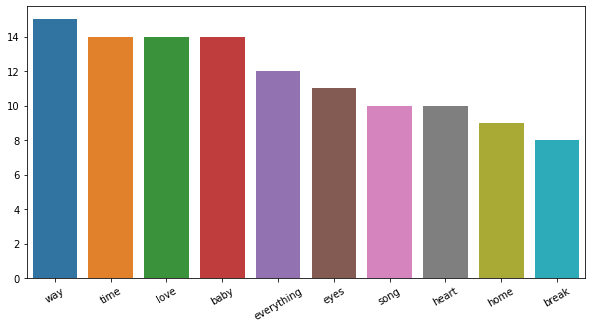

In [48]:
nouns_t = FreqDist(t_nouns).most_common(10)
nouns_t = pd.Series(dict(nouns_t))
fig, ax = plt.subplots(figsize=(10,5))
t_plotnoun = sns.barplot(x=nouns_t.index, y=nouns_t.values, ax=ax)
plt.xticks(rotation=30);

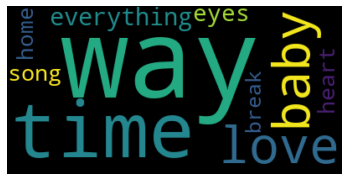

In [49]:
wcloudt = WordCloud().generate_from_frequencies(nouns_t)
# Plotting the wordcloud
plt.imshow(wcloudt, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Words are romantic: "Love", "baby" and "heart. This love could be due to a breakup ("break") or could be family love ("home"). This makes sense considering her first album was a country album where themes of love and family are common. 

#### Fearless

In [50]:
f_nouns = []
for sentence in flist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            f_nouns.append(word)

In [51]:
ffreq = FreqDist(f_nouns)
for i in sorted(ffreq, key=ffreq.get, reverse=True)[:10]:
    print(i,ffreq[i])

time 25
way 23
baby 21
night 18
fall 17
help 16
jump 15
feel 15
everything 14
things 13


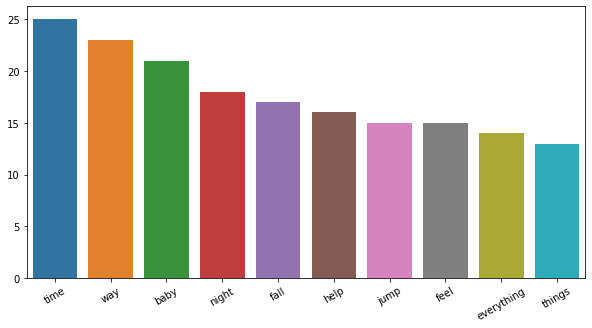

In [52]:
nouns_f = FreqDist(f_nouns).most_common(10)
nouns_f = pd.Series(dict(nouns_f))
fig, ax = plt.subplots(figsize=(10,5))
f_plotnoun = sns.barplot(x=nouns_f.index, y=nouns_f.values, ax=ax)
plt.xticks(rotation=30);

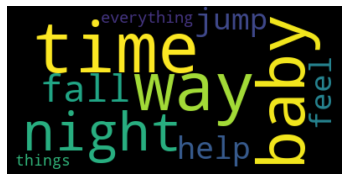

In [53]:
wcloudf = WordCloud().generate_from_frequencies(nouns_f)
# Plotting the wordcloud
plt.imshow(wcloudf, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Interesting that "love" isn't on this list. "Time" and "way" remain at the top of the list. Hard to identify an actual shift. 

#### Speak Now 

In [54]:
s_nouns = []
for sentence in slist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            s_nouns.append(word)

sfreq = FreqDist(s_nouns)
for i in sorted(sfreq, key=sfreq.get, reverse=True)[:10]:
    print(i,sfreq[i])

time 29
mind 20
something 15
things 14
eyes 14
nothing 14
day 14
life 13
night 13
way 12


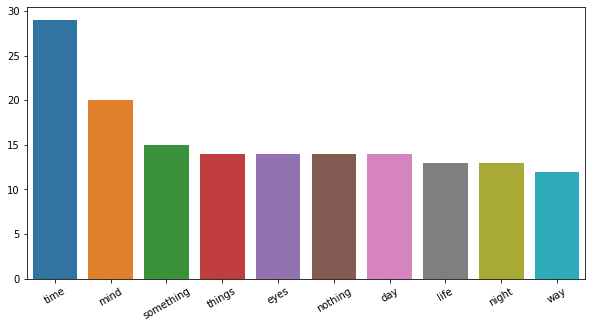

In [55]:
nouns_s = FreqDist(s_nouns).most_common(10)
nouns_s = pd.Series(dict(nouns_s))
fig, ax = plt.subplots(figsize=(10,5))
s_plotnoun = sns.barplot(x=nouns_s.index, y=nouns_s.values, ax=ax)
plt.xticks(rotation=30);

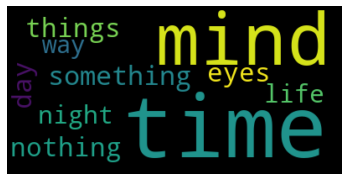

In [56]:
wclouds = WordCloud().generate_from_frequencies(nouns_s)
# Plotting the wordcloud
plt.imshow(wclouds, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

"Time" is the most used word followed by "mind". "Night" is also a recurring word here. 

#### Red

In [57]:
r_nouns = []
for sentence in rlist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            r_nouns.append(word)

rfreq = FreqDist(r_nouns)
for i in sorted(rfreq, key=rfreq.get, reverse=True)[:10]:
    print(i,rfreq[i])

time 66
trouble 32
everybody 25
home 22
everything 19
night 17
starlight 16
love 15
name 14
look 14


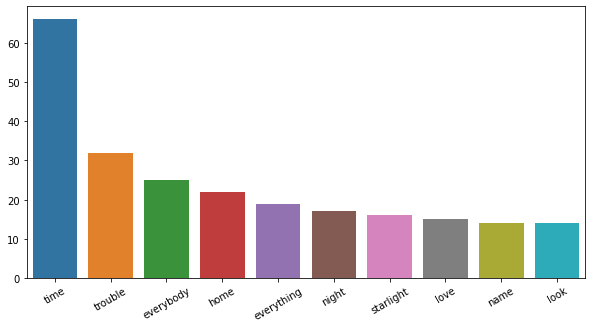

In [58]:
nouns_r = FreqDist(r_nouns).most_common(10)
nouns_r = pd.Series(dict(nouns_r))
fig, ax = plt.subplots(figsize=(10,5))
r_plotnoun = sns.barplot(x=nouns_r.index, y=nouns_r.values, ax=ax)
plt.xticks(rotation=30);

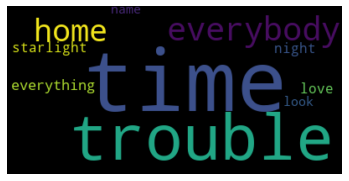

In [59]:
wcloudr = WordCloud().generate_from_frequencies(nouns_r)
# Plotting the wordcloud
plt.imshow(wcloudr, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

"Time" is the most used word by a landslide followed up by "trouble" which I would consider a shift since Taylor up until this point strayed from negative words. 

#### 1989

In [60]:
n_nouns = []
for sentence in ninelist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            n_nouns.append(word)

nfreq = FreqDist(n_nouns)
for i in sorted(nfreq, key=nfreq.get, reverse=True)[:10]:
    print(i,nfreq[i])

love 65
baby 35
york 30
shake 24
woods 20
wonderland 19
blood 16
hey 15
places 14
girl 13


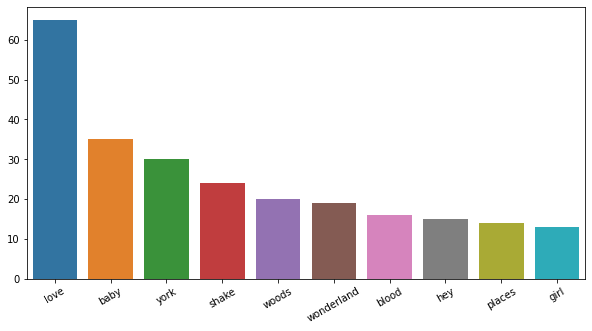

In [61]:
nouns_n = FreqDist(n_nouns).most_common(10)
nouns_n = pd.Series(dict(nouns_n))
fig, ax = plt.subplots(figsize=(10,5))
n_plotnoun = sns.barplot(x=nouns_n.index, y=nouns_n.values, ax=ax)
plt.xticks(rotation=30);

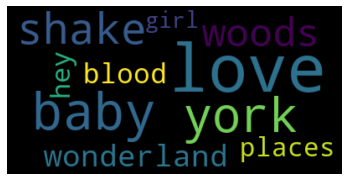

In [62]:
wcloudn = WordCloud().generate_from_frequencies(nouns_n)
# Plotting the wordcloud
plt.imshow(wcloudn, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

1989 is unexpected. While the album is known for being more upbeat and fun since it's her first officially released pop album,  the use of the word "blood" was unexpected since the word itself is quite gory. Furthermore, words like "wonderland" and "woods" give a whimsical appearance. The fact that "time" (which appears to be Taylor's favorite noun) does not appear in this album seems signifcant.  

#### Reputation

In [63]:
re_nouns = []
for sentence in replist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            re_nouns.append(word)

refreq = FreqDist(re_nouns)
for i in sorted(refreq, key=refreq.get, reverse=True)[:10]:
    print(i,refreq[i])

look 41
time 34
baby 26
call 25
things 23
hands 21
car 21
getaway 19
endgame 14
nothing 13


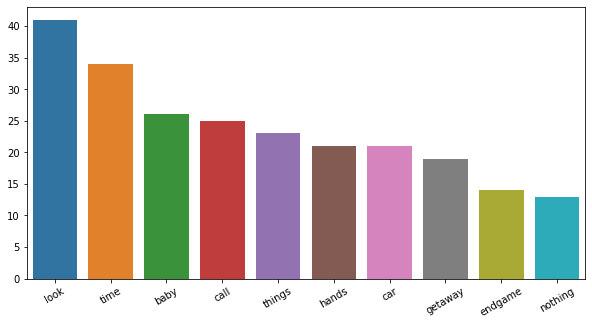

In [64]:
nouns_re = FreqDist(re_nouns).most_common(10)
nouns_re = pd.Series(dict(nouns_re))
fig, ax = plt.subplots(figsize=(10,5))
re_plotnoun = sns.barplot(x=nouns_re.index, y=nouns_re.values, ax=ax)
plt.xticks(rotation=30);

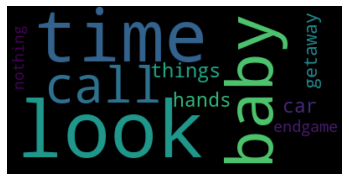

In [65]:
wcloudre = WordCloud().generate_from_frequencies(nouns_re)
# Plotting the wordcloud
plt.imshow(wcloudre, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Reputation is an important album since it was her comeback album after being "cancelled" in the media after her rift with Kim Kardahsian and Kanye West. Therefore, I was anticipating a noticeable change in her lyrics. Yet, "time" and "baby". There is nothing here that really indicates a shift other than words like "endgame" and "car". "Endgame" does feel calculated. 

#### Lover

In [66]:
l_nouns = []
for sentence in llist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            l_nouns.append(word)

lfreq = FreqDist(l_nouns)
for i in sorted(lfreq, key=lfreq.get, reverse=True)[:10]:
    print(i,lfreq[i])

man 27
daylight 25
street 22
baby 21
night 17
home 16
boy 13
things 13
love 10
nobody 10


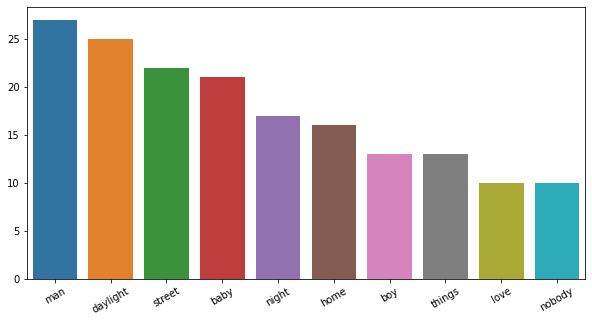

In [67]:
nouns_l = FreqDist(l_nouns).most_common(10)
nouns_l = pd.Series(dict(nouns_l))
fig, ax = plt.subplots(figsize=(10,5))
l_plotnoun = sns.barplot(x=nouns_l.index, y=nouns_l.values, ax=ax)
plt.xticks(rotation=30);

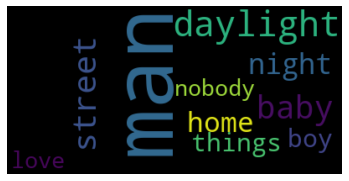

In [68]:
wcloudl = WordCloud().generate_from_frequencies(nouns_l)
# Plotting the wordcloud
plt.imshow(wcloudl, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

The fact that "man" and "boy" are both in the top ten nouns used in this album is interesting, especially since is right at the top. Could in a reference to a male lover since "lover" is the title of the album. "Daylight" also contrasts the use of frequency of "night" in some of her other albums. Definite changes happening here. 

#### Folklore

In [69]:
fo_nouns = []
for sentence in folist:
    for word, pos in sentence:
        if (pos == 'NN' or pos == 'NNS'):
            fo_nouns.append(word)

In [70]:
fofreq = FreqDist(fo_nouns)
for i in sorted(fofreq, key=fofreq.get, reverse=True)[:10]:
    print(i,fofreq[i])

time 38
woman 11
everything 11
signs 10
heart 9
thing 8
nothing 8
get 8
things 8
call 8


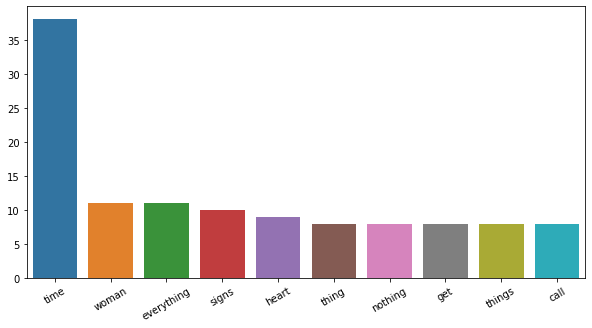

In [71]:
nouns_fo = FreqDist(fo_nouns).most_common(10)
nouns_fo = pd.Series(dict(nouns_fo))
fig, ax = plt.subplots(figsize=(10,5))
fo_plotnoun = sns.barplot(x=nouns_fo.index, y=nouns_fo.values, ax=ax)
plt.xticks(rotation=30);

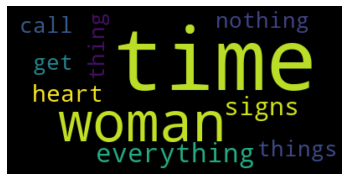

In [72]:
wcloudfo = WordCloud().generate_from_frequencies(nouns_fo)
# Plotting the wordcloud
plt.imshow(wcloudfo, interpolation="bilinear")
 
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

Folkore appears to be a return to her roots with the reappearance of "time". Also distinguishes itself from the previous album Lover with "woman" now falling into the most frequently used list to oppose "man" and "boy". 

Based on looking at noun frequency, "time" and "love" seem to be recurring words throughout her entire discography. While not obvious, there appear to be a few shifts apparent when just looking at her nouns. In fact, we can loosely split her albums into 4 "trends" : 

Younger, romantic (key nouns: "time", "way", "home", "night": Taylor Swift, Fearless, Speak Now and Red)
Whimsical, unexpected, new for Taylor (key nouns: "blood", "woods", "wonderland"): 1989 
Urban, modern, return to her roots (key nouns: "car", "street", "time", "home", "love"): Reputation, Lover, Folklore. 

While certain trends are identifiable from word frequencies and noun frequencies, as of right now, we cannot definitively say whether they are tonal differences in her albums. In an attempt to indentify a tone or "sentiment", we will conduct a sentiment analysis on each of her albums.  

### Sentiment Analysis

In [73]:
import nltk
from nltk.sentiment import vader
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
sia = vader.SentimentIntensityAnalyzer()

In [78]:
sia.polarity_scores(taylor_swift_album)

{'neg': 0.102, 'neu': 0.731, 'pos': 0.166, 'compound': 0.9999}

In [88]:
sia.polarity_scores(fearless_album)

{'neg': 0.088, 'neu': 0.751, 'pos': 0.161, 'compound': 1.0}

In [89]:
sia.polarity_scores(speak_now_album)

{'neg': 0.087, 'neu': 0.762, 'pos': 0.152, 'compound': 0.9999}

In [90]:
sia.polarity_scores(red_album)

{'neg': 0.097, 'neu': 0.719, 'pos': 0.184, 'compound': 1.0}

In [91]:
sia.polarity_scores(album_1989_album)

{'neg': 0.148, 'neu': 0.652, 'pos': 0.2, 'compound': 0.9999}

In [92]:
sia.polarity_scores(reputation_album)

{'neg': 0.098, 'neu': 0.736, 'pos': 0.166, 'compound': 0.9999}

In [93]:
sia.polarity_scores(lover_album)

{'neg': 0.131, 'neu': 0.684, 'pos': 0.184, 'compound': 0.9999}

In [94]:
sia.polarity_scores(folklore_album)

{'neg': 0.127, 'neu': 0.732, 'pos': 0.141, 'compound': 0.9989}

In [96]:
from nltk.corpus import sentiwordnet as swn
nltk.download('sentiwordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [97]:
def naiveSentiment(review):
    reviewPolarity = 0.0
    words = [w for w in word_tokenize(review.lower()) if w not in myStopWords]
    for word in words:
        sentScore = 0.0
        if len(list(swn.senti_synsets(word))) > 0:
            for i in list(swn.senti_synsets(word)):
                if i.pos_score() > i.neg_score():
                    sentScore += i.pos_score()
                else:
                    sentScore -= i.neg_score()
            reviewPolarity += sentScore / len(list(swn.senti_synsets(word)))
    
    return reviewPolarity

In [102]:
naiveSentiment(folklore_album) #does not feel accurate at all

7.135706852699895

In [99]:
naiveSentiment(lover_album)

10.328034389880676

In [101]:
naiveSentiment(album_1989_album)

12.023879587219763